In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import xgboost as xgb

In [2]:
dfTrain = pd.read_csv('train.csv')

In [3]:
dfTest = pd.read_csv('test_x.csv')

In [4]:
dfTest.head()

index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0      0    Erkek     51-60         Evli  Yüksek Lisans Mezunu   
1      1    Erkek     41-50        Bekar           Lise Mezunu   
2      2    Kadın       >60         Evli             Eğitimsiz   
3      3    Kadın     51-60         Evli         Doktora Ötesi   
4      4    Erkek     18-30         Evli  Yüksek Lisans Mezunu   

                  İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0  Düzenli ve Ücretli Bir İşi Var          365331.930346  Köy veya Kasaba   
1  İşsiz veya Düzenli Bir İşi Yok          414899.236174      Büyük Şehir   
2  İşsiz veya Düzenli Bir İşi Yok          152825.872271      Küçük Şehir   
3  Düzenli ve Ücretli Bir İşi Var          489052.908472  Köy veya Kasaba   
4             Kendi İşinin Sahibi          323635.711534      Küçük Şehir   

  En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0                         Giyim                         5566.587664   
1              Spor Malzemeleri                         6756.766203   
2                         Giyim                         4493.915682   
3                      Kozmetik                        42670.646595   
4                         Giyim                         5959.266948   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                   15.442635                   Etmiyor   
1                                   14.957246                   Etmiyor   
2                                   10.907930                   Etmiyor   
3                                   32.333021                   Etmiyor   
4                                    4.519968                   Etmiyor   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  
0                                 19.646460  
1                                 19.675863  
2                                 46.904518  
3                                 48.083609  
4                                 12.752491

In [5]:
dfTrain[dfTrain["index"] == 1059]

index Cinsiyet Yaş Grubu Medeni Durum      Eğitim Düzeyi  \
1059   1059    Erkek     31-40         Evli  Üniversite Mezunu   

                     İstihdam Durumu  Yıllık Ortalama Gelir Yaşadığı Şehir  \
1059  Düzenli ve Ücretli Bir İşi Var          335805.518469    Küçük Şehir   

         En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
1059  Elektronik ve Teknolojik Ürünler                        27478.680172   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
1059                                    17.23527                   Etmiyor   

     Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
1059    obek_4                                 95.450918

In [6]:
df2 = dfTrain[dfTrain["Öbek İsmi"] == "obek_4"]

In [7]:
df3 = dfTrain[dfTrain["Öbek İsmi"] == "obek_7"]

In [8]:
def ValueCounts(col_name, df):
    print(df[col_name].value_counts())
    
for i in col_list_cat:
    print(i + "  ->  ") 
    ValueCounts(i, dfTrain)
    print("\n\n")

NameError: name 'col_list_cat' is not defined

In [ ]:
def ValueCounts(col_name, df):
    print(df[col_name].value_counts())
    
for i in col_list_cat:
    print(i + "  ->  ") 
    ValueCounts(i, df3)
    print("\n\n")

In [9]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   index                                       5460 non-null   int64  
 1   Cinsiyet                                    5460 non-null   object 
 2   Yaş Grubu                                   5460 non-null   object 
 3   Medeni Durum                                5460 non-null   object 
 4   Eğitim Düzeyi                               5460 non-null   object 
 5   İstihdam Durumu                             5460 non-null   object 
 6   Yıllık Ortalama Gelir                       5460 non-null   float64
 7   Yaşadığı Şehir                              5460 non-null   object 
 8   En Çok İlgilendiği Ürün Grubu               5460 non-null   object 
 9   Yıllık Ortalama Satın Alım Miktarı          5460 non-null   float64
 10  Yıllık Ortal

In [10]:
dfTrain2 = dfTrain[["Eğitime Devam Etme Durumu", "En Çok İlgilendiği Ürün Grubu", "Yaşadığı Şehir", "İstihdam Durumu", "Medeni Durum", "Eğitim Düzeyi"]]

In [11]:


cat_df = dfTrain.select_dtypes(include=["object"])
cat_df.head()

Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0    Kadın     31-40        Bekar  Yüksek Lisans Mezunu   
1    Erkek       >60         Evli           Lise Mezunu   
2    Erkek     18-30        Bekar           Lise Mezunu   
3    Erkek     51-60         Evli           Lise Mezunu   
4    Erkek     31-40         Evli       Ortaokul Mezunu   

                  İstihdam Durumu Yaşadığı Şehir  \
0  Düzenli ve Ücretli Bir İşi Var    Büyük Şehir   
1             Kendi İşinin Sahibi    Küçük Şehir   
2  Düzenli ve Ücretli Bir İşi Var    Küçük Şehir   
3             Kendi İşinin Sahibi         Kırsal   
4  İşsiz veya Düzenli Bir İşi Yok    Büyük Şehir   

      En Çok İlgilendiği Ürün Grubu Eğitime Devam Etme Durumu Öbek İsmi  
0  Elektronik ve Teknolojik Ürünler                   Etmiyor    obek_4  
1                  Spor Malzemeleri                   Etmiyor    obek_5  
2                             Giyim                    Ediyor    obek_8  
3                             Giyim                   Etmiyor    obek_3  
4                             Giyim                   Etmiyor    obek_3

In [12]:
num_df = dfTrain.select_dtypes(include=["float64", "int64"])
num_df.head()

index  Yıllık Ortalama Gelir  Yıllık Ortalama Satın Alım Miktarı  \
0      0          748266.440879                        32010.900881   
1      1          246298.609605                         4145.729891   
2      2          268582.732360                         9924.379414   
3      3          327721.837865                         6417.780714   
4      4          397431.626948                         7886.663061   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
0                                   37.310644   
1                                   11.554851   
2                                   55.353236   
3                                   15.417239   
4                                   14.689837   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  
0                                102.936904  
1                                 82.176053  
2                                141.661426  
3                                 17.097397  
4                                 20.470459

In [13]:
col_list_cat = list(cat_df.columns)
col_list_num = list(num_df.columns)

In [14]:
def ValueCounts(col_name, df):
    print(df[col_name].value_counts())

In [15]:
for i in col_list_cat:
    print(i + "  ->  ") 
    ValueCounts(i, cat_df)
    print("\n\n")

Cinsiyet  ->  
Erkek    2964
Kadın    2496
Name: Cinsiyet, dtype: int64



Yaş Grubu  ->  
18-30    1841
31-40    1477
51-60     861
41-50     727
>60       554
Name: Yaş Grubu, dtype: int64



Medeni Durum  ->  
Evli     2834
Bekar    2626
Name: Medeni Durum, dtype: int64



Eğitim Düzeyi  ->  
Lise Mezunu             1388
Üniversite Mezunu       1257
Yüksekokul Mezunu        588
Yüksek Lisans Mezunu     545
İlkokul Mezunu           417
Ortaokul Mezunu          412
Eğitimsiz                381
Doktora Mezunu           263
Doktora Ötesi            209
Name: Eğitim Düzeyi, dtype: int64



İstihdam Durumu  ->  
Düzenli ve Ücretli Bir İşi Var    2768
İşsiz veya Düzenli Bir İşi Yok    1349
Kendi İşinin Sahibi                879
Emekli                             464
Name: İstihdam Durumu, dtype: int64



Yaşadığı Şehir  ->  
Büyük Şehir        1959
Küçük Şehir        1842
Köy veya Kasaba    1092
Kırsal              567
Name: Yaşadığı Şehir, dtype: int64



En Çok İlgilendiği Ürün Grubu  ->

In [16]:
def PlotBar(variable, n=5):
    data_ = dfTrain[variable]
    data_counts = data_.value_counts()
    data_counts = data_counts[:n]
    
    plt.figure()
    plt.bar(data_counts.index, data_counts, color="red")
    plt.xlabel(variable)
    plt.xticks(rotation=50)
    plt.ylabel("Frequency")
    plt.title("Data Frequency - {}" .format(variable))
    plt.show()

In [17]:
def PlotHistogram(variable):
    plt.figure()
    plt.hist(dfTrain[variable], bins=100, color="blue")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("Data Frequency - {}" .format(variable))
    plt.show()

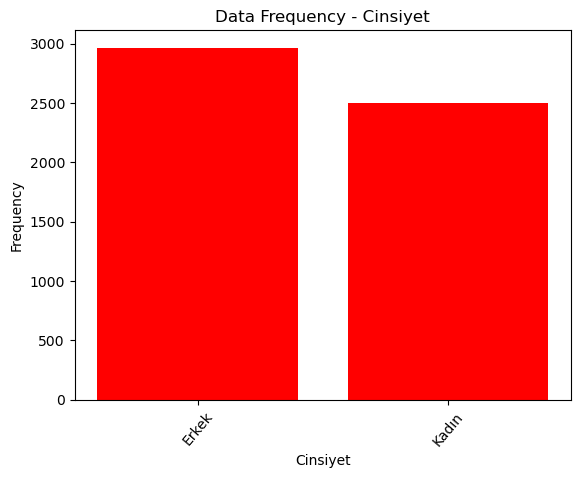

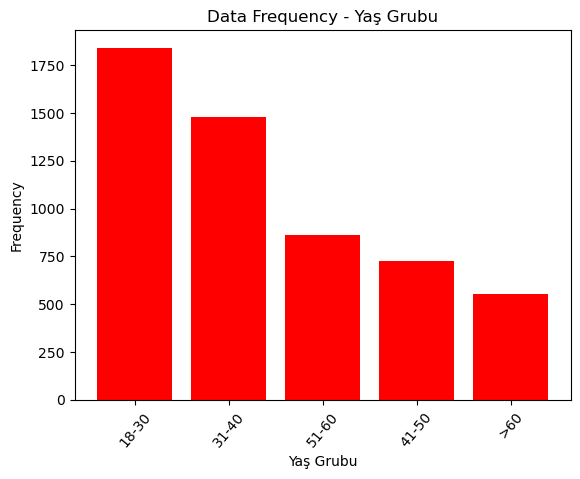

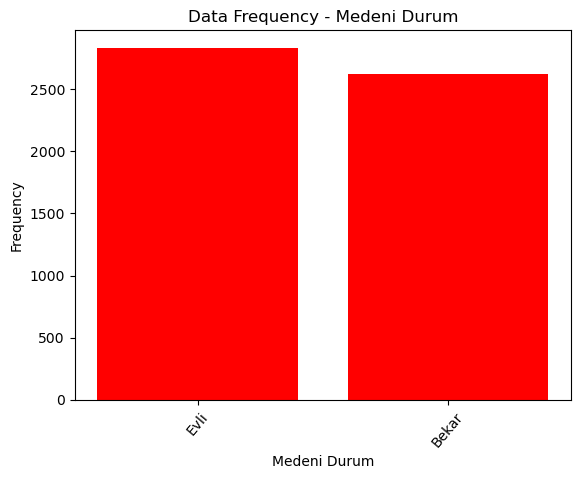

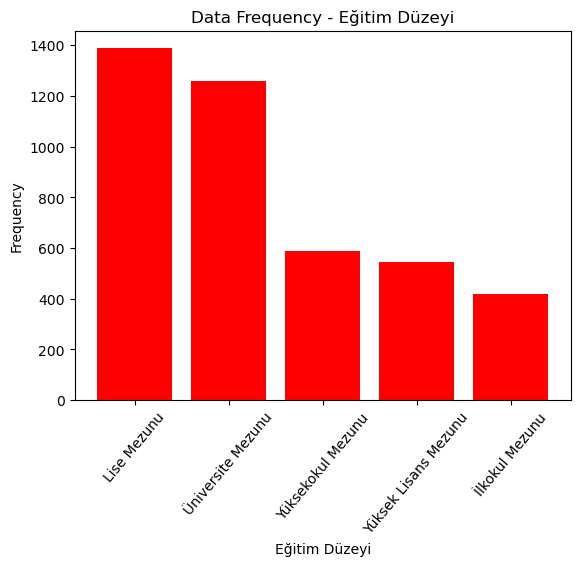

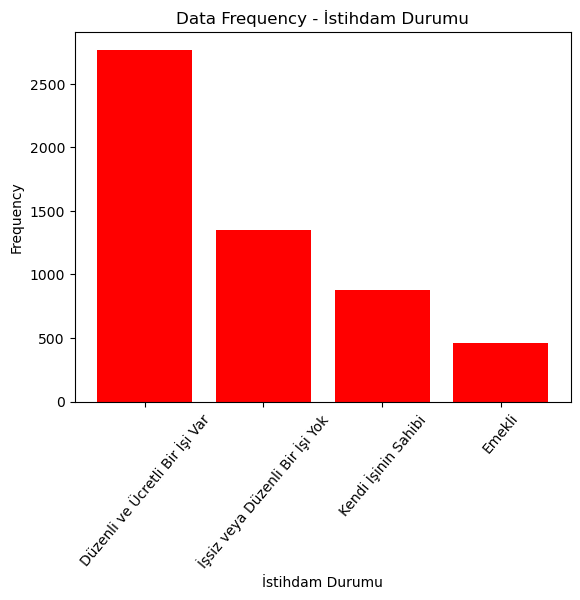

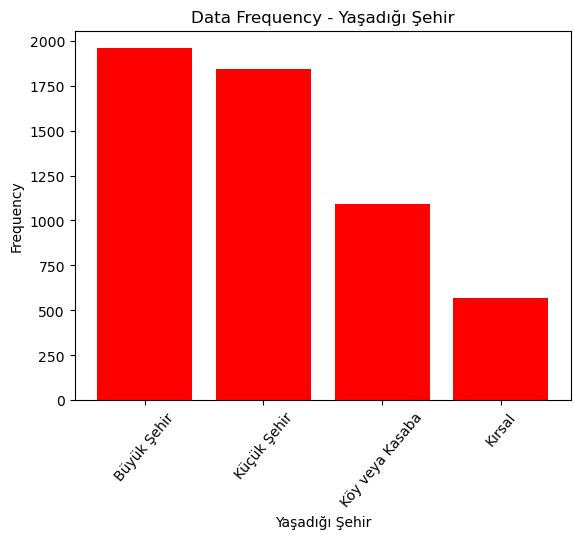

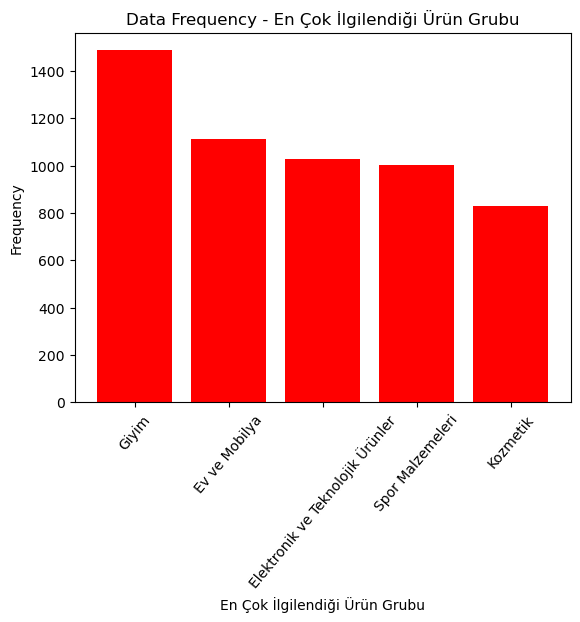

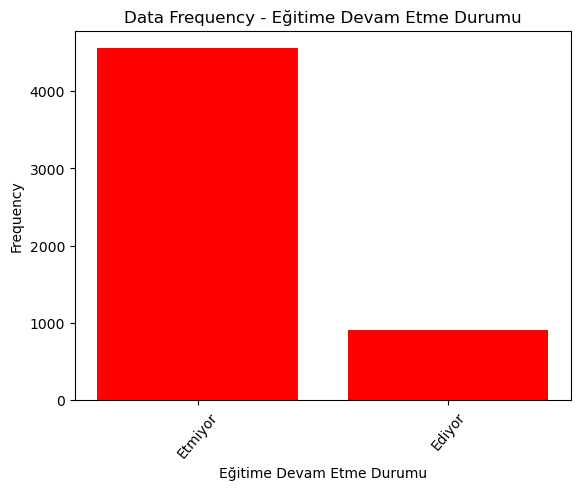

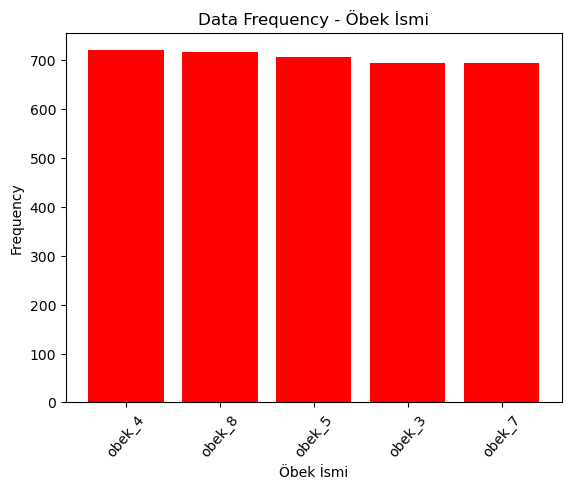

In [18]:
for i in col_list_cat:
    PlotBar(i)

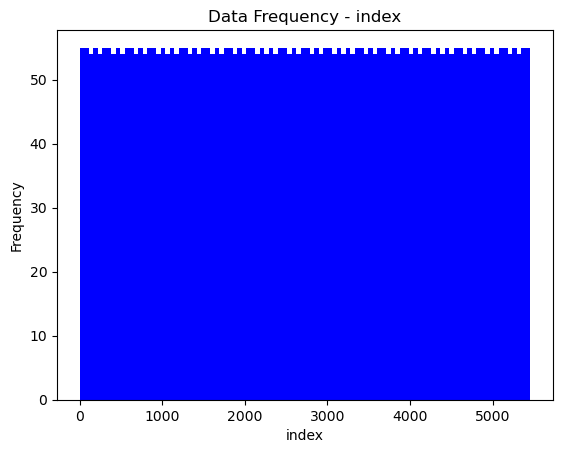

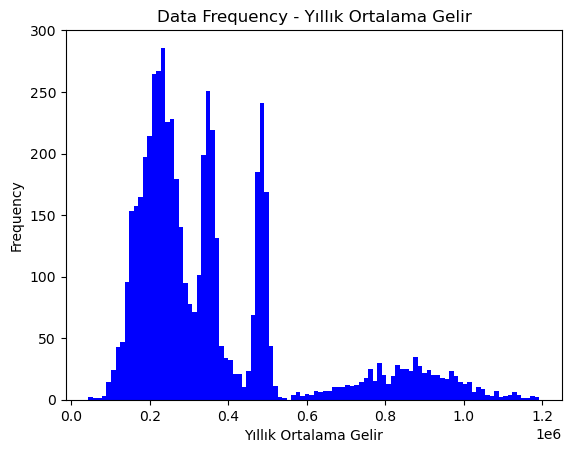

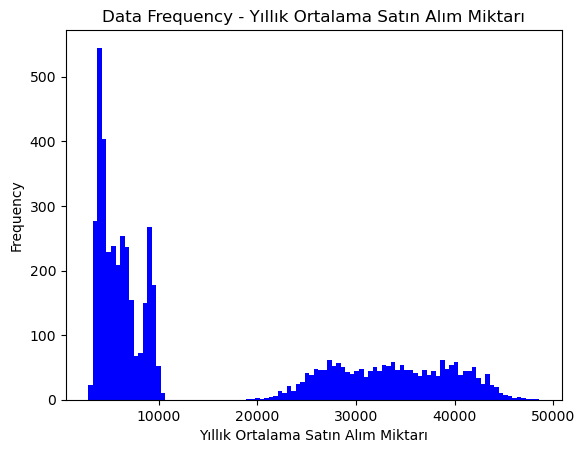

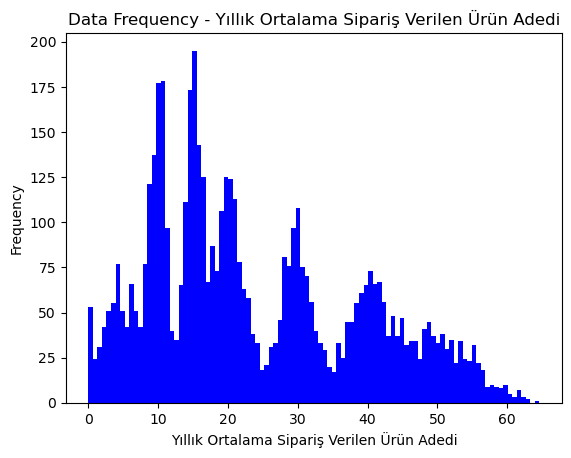

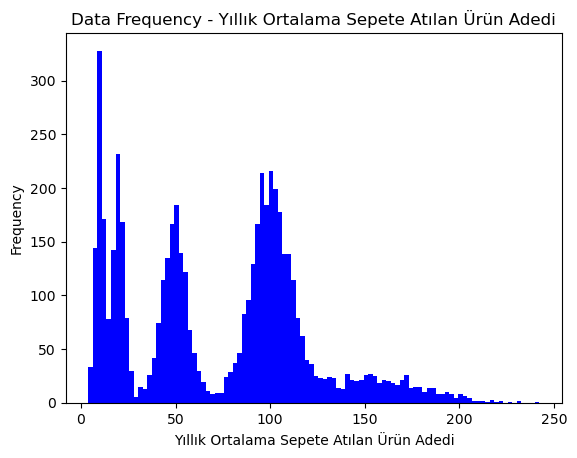

In [19]:
for i in col_list_num:
    PlotHistogram(i)

<AxesSubplot:>

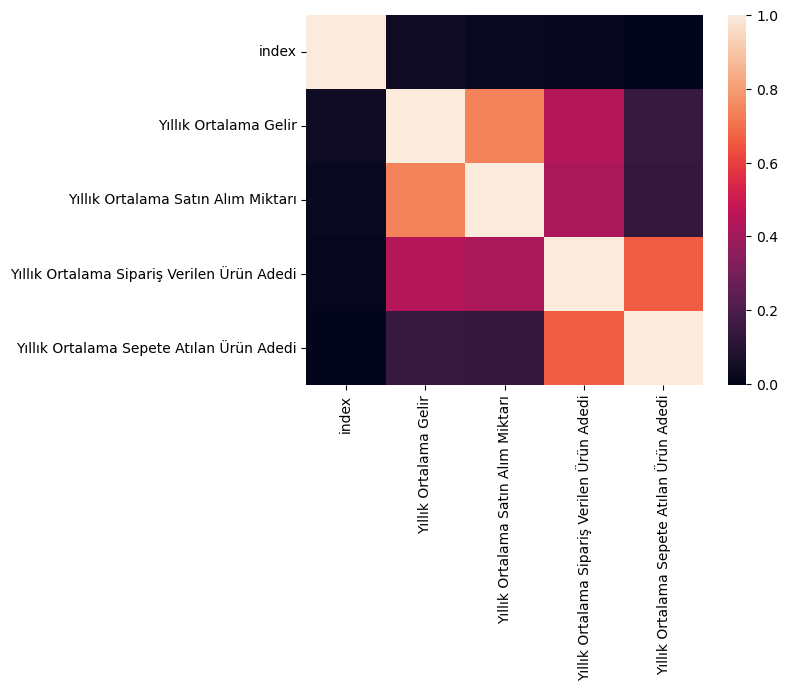

In [20]:
sns.heatmap(dfTrain.corr())

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot(df, features, satisfaction):
    
    "Function for visualization of categorical variables."
    
    variable = df[features]
    values=variable.value_counts()
    
    f, ax = plt.subplots(figsize = (8,8))
    sns.countplot(x = features, hue = satisfaction, data = df)
    
    plt.show()
    
    print("{}:\n{}".format(features, values))

In [22]:
columnsAsCategorical = ["Cinsiyet", "Yaş Grubu", "Medeni Durum", "Eğitim Düzeyi", "İstihdam Durumu", "Yaşadığı Şehir", 
                        "En Çok İlgilendiği Ürün Grubu", "Eğitime Devam Etme Durumu"]

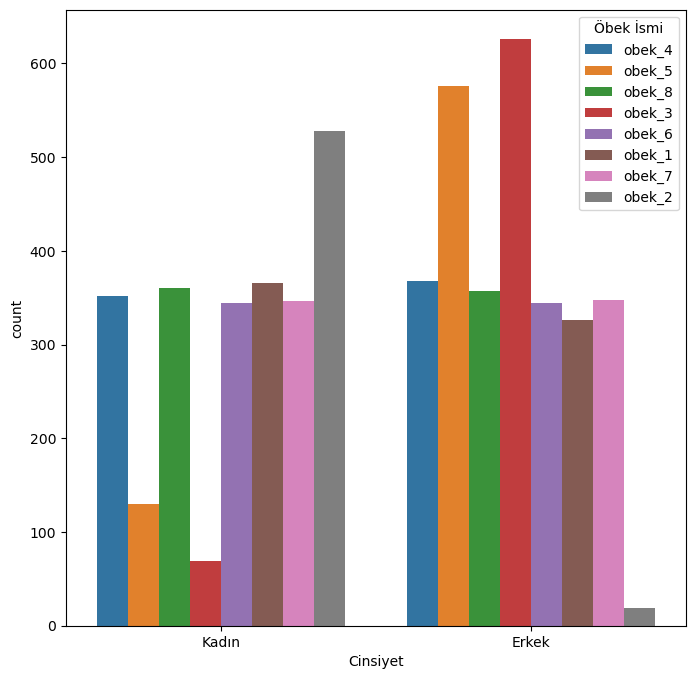

Cinsiyet:
Erkek    2964
Kadın    2496
Name: Cinsiyet, dtype: int64


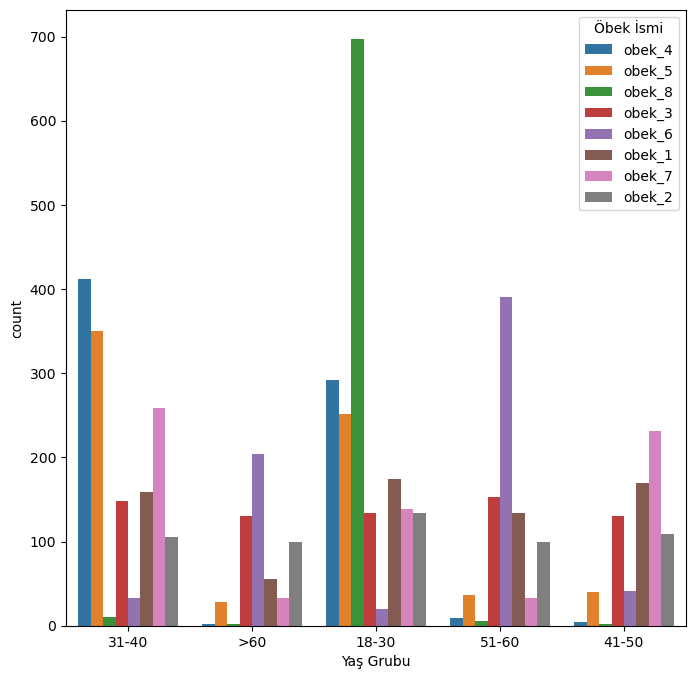

Yaş Grubu:
18-30    1841
31-40    1477
51-60     861
41-50     727
>60       554
Name: Yaş Grubu, dtype: int64


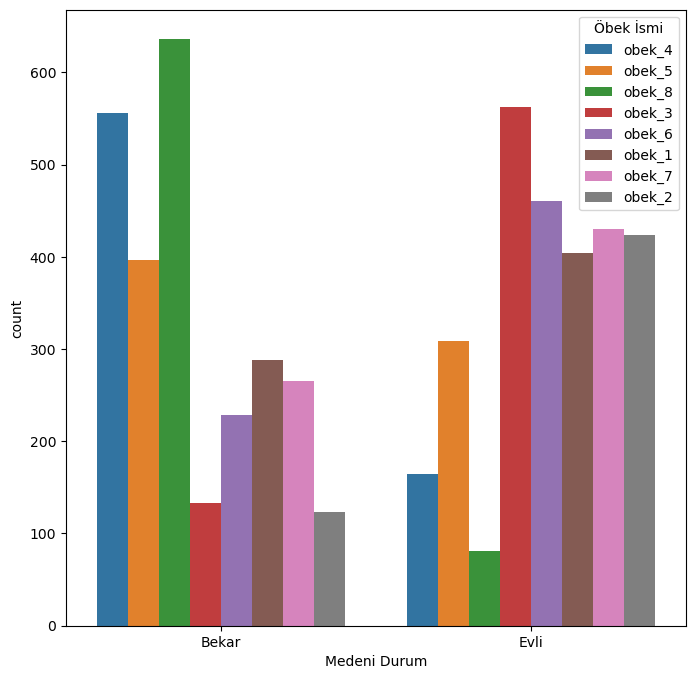

Medeni Durum:
Evli     2834
Bekar    2626
Name: Medeni Durum, dtype: int64


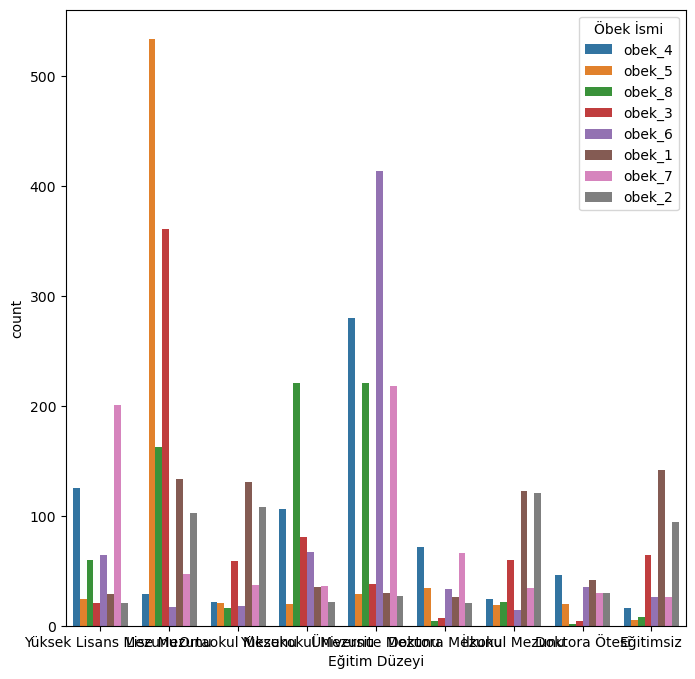

Eğitim Düzeyi:
Lise Mezunu             1388
Üniversite Mezunu       1257
Yüksekokul Mezunu        588
Yüksek Lisans Mezunu     545
İlkokul Mezunu           417
Ortaokul Mezunu          412
Eğitimsiz                381
Doktora Mezunu           263
Doktora Ötesi            209
Name: Eğitim Düzeyi, dtype: int64


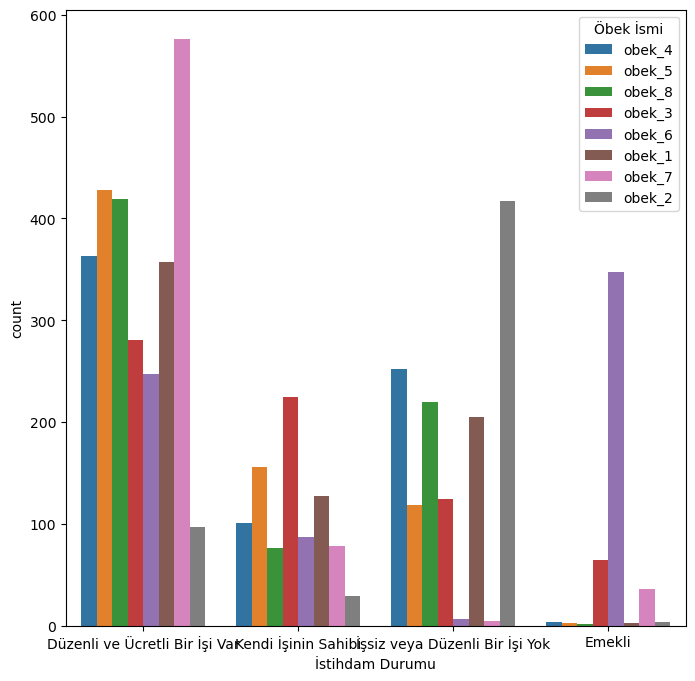

İstihdam Durumu:
Düzenli ve Ücretli Bir İşi Var    2768
İşsiz veya Düzenli Bir İşi Yok    1349
Kendi İşinin Sahibi                879
Emekli                             464
Name: İstihdam Durumu, dtype: int64


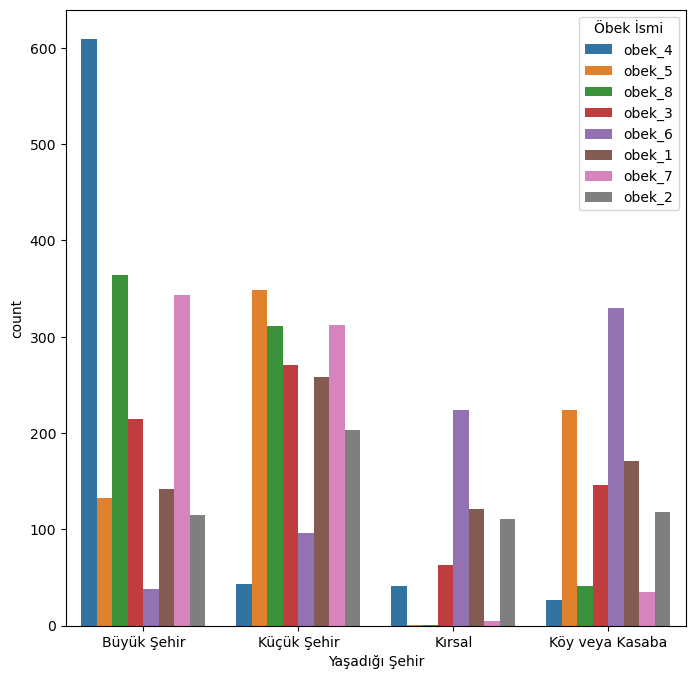

Yaşadığı Şehir:
Büyük Şehir        1959
Küçük Şehir        1842
Köy veya Kasaba    1092
Kırsal              567
Name: Yaşadığı Şehir, dtype: int64


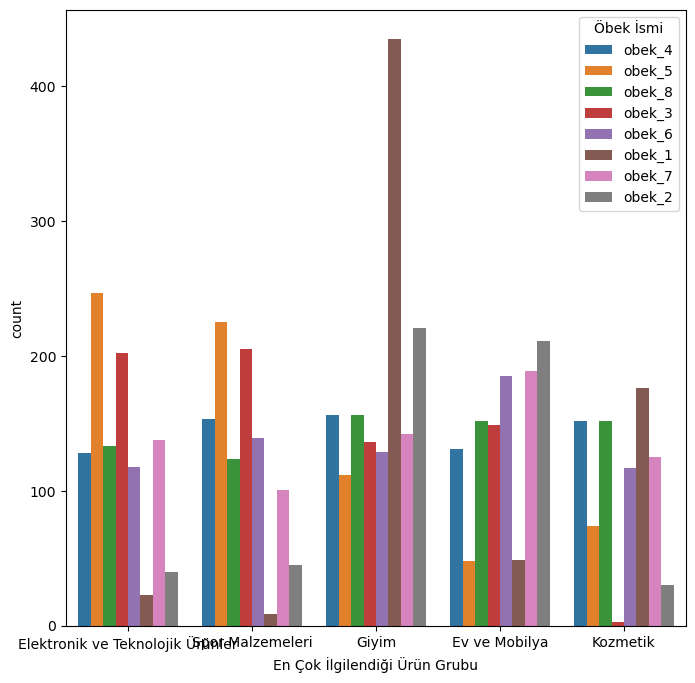

En Çok İlgilendiği Ürün Grubu:
Giyim                               1487
Ev ve Mobilya                       1114
Elektronik ve Teknolojik Ürünler    1029
Spor Malzemeleri                    1001
Kozmetik                             829
Name: En Çok İlgilendiği Ürün Grubu, dtype: int64


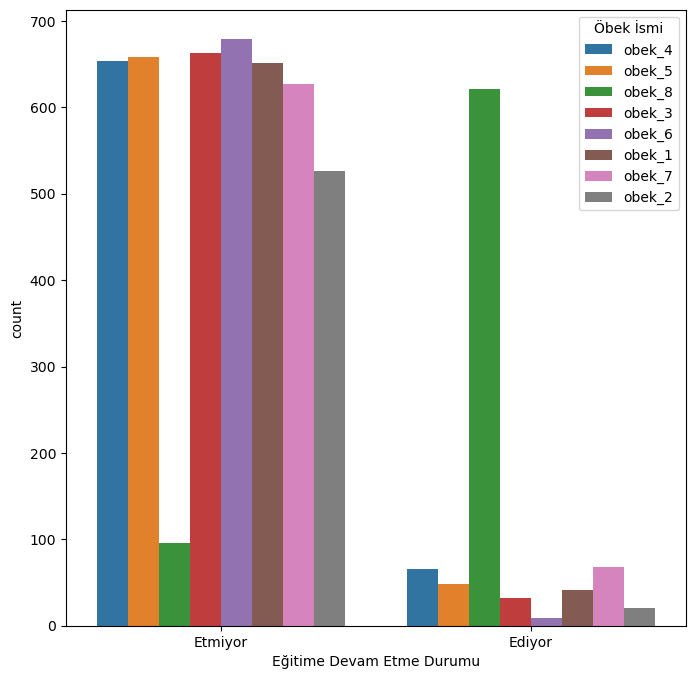

Eğitime Devam Etme Durumu:
Etmiyor    4554
Ediyor      906
Name: Eğitime Devam Etme Durumu, dtype: int64


In [23]:
for i in columnsAsCategorical:
    plot(dfTrain, i, "Öbek İsmi")

In [24]:
def BoxPlot(variable):
    plt.boxplot(dfTrain[variable])
    plt.xlabel(variable)
    plt.ylabel("Value")
    plt.title("Boxplot for " + variable + " variable")
    plt.show()

In [25]:
outlier_col = ["Yıllık Ortalama Gelir", "Yıllık Ortalama Satın Alım Miktarı", "Yıllık Ortalama Sipariş Verilen Ürün Adedi", "Yıllık Ortalama Sepete Atılan Ürün Adedi"]

In [26]:
def BoxPlotMethod(col_name, df):
    df_variable = df[col_name]
    Q1 = df_variable.quantile(0.25)
    Q3 = df_variable.quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    low_outlier_df = (df_variable < lower_limit)
    up_outlier_df = (df_variable > upper_limit)
    print(((low_outlier_df.shape[0] + up_outlier_df.shape[0]) / df_variable.shape[0]))
    #df_variable[low_outlier_df] = lower_limit
    #df_variable[up_outlier_df] = upper_limit
    #print(df.shape)
    df = df[(df[col_name] < upper_limit) & (df[col_name] > lower_limit)]
    print(df.shape)
    return df

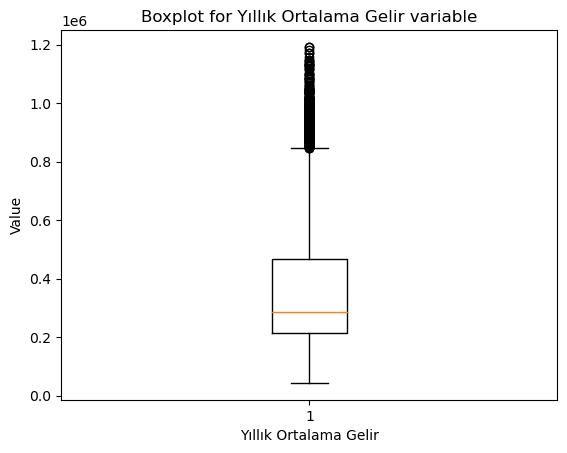

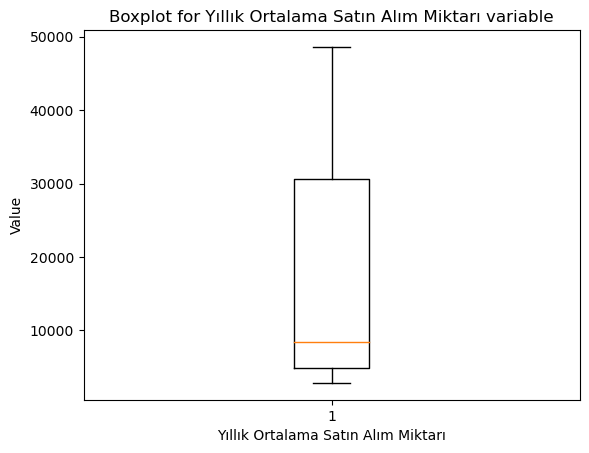

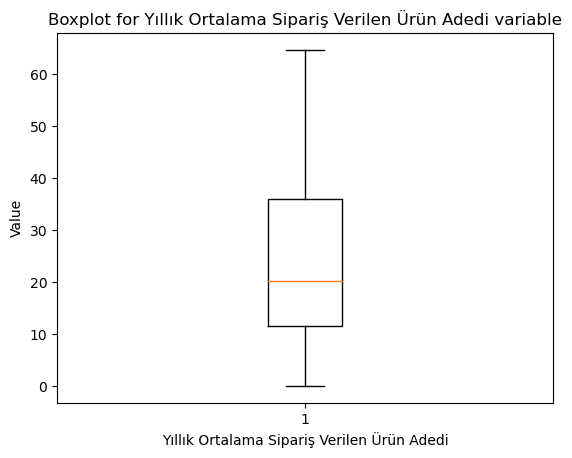

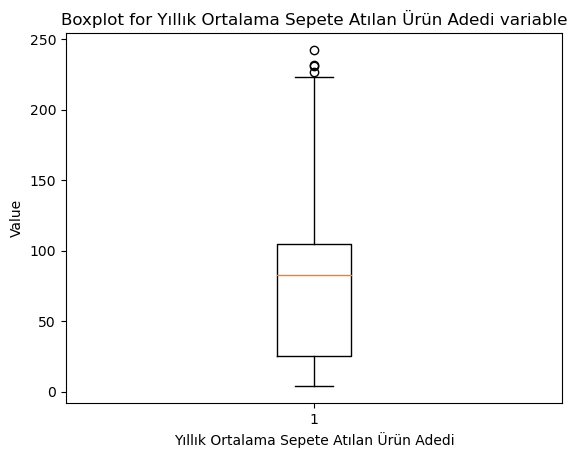

In [27]:
for i in outlier_col: 
    BoxPlot(i)

In [28]:
for i in outlier_col:
    dfTrain = BoxPlotMethod(i, dfTrain)

2.0
(5080, 14)
2.0
(5080, 14)
2.0
(5066, 14)
2.0
(5062, 14)


In [29]:
print(dfTest.shape)

(2340, 13)


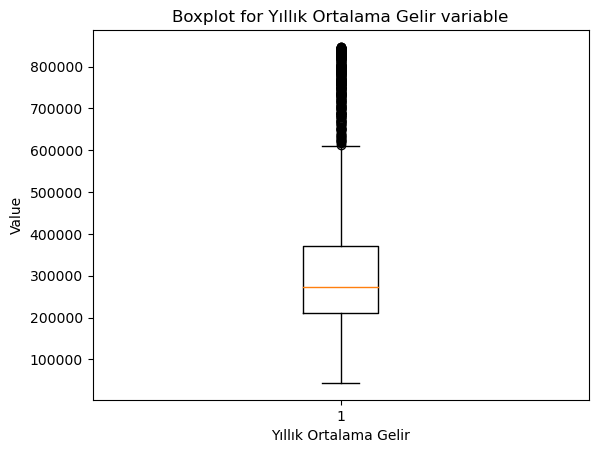

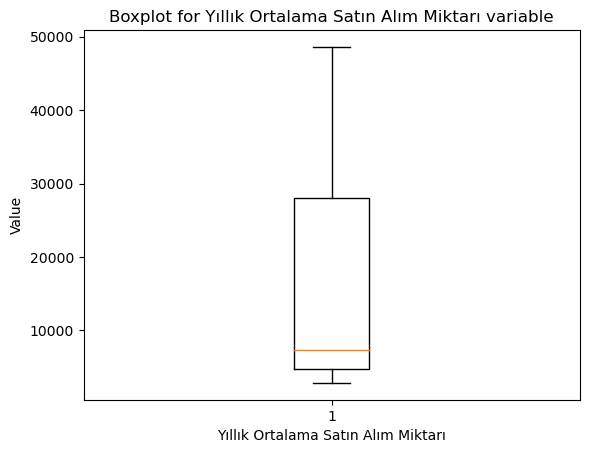

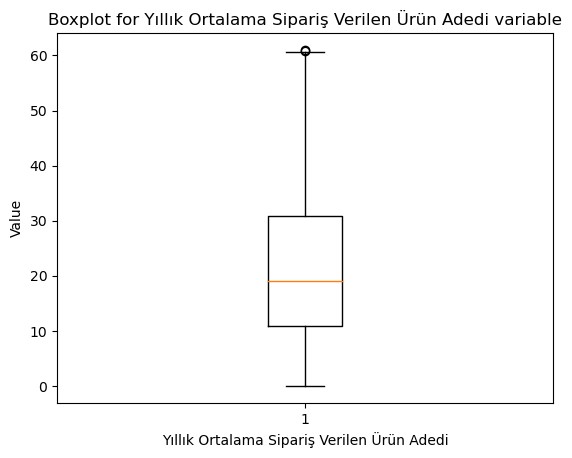

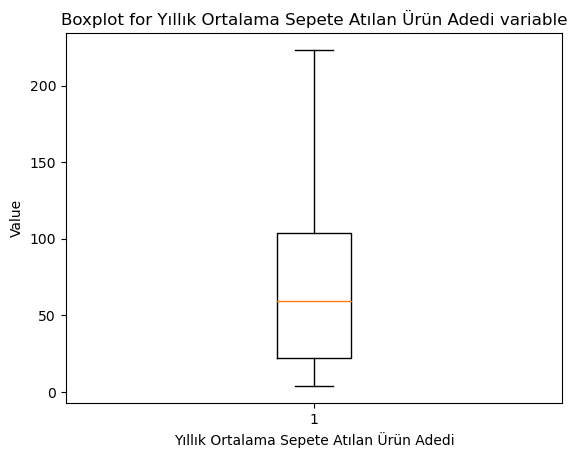

In [30]:
for i in outlier_col: 
    BoxPlot(i)

In [31]:
#for i in  range(dfTrain.shape[0]):
#    if ((dfTrain["Eğitim Düzeyi"][i] == "Doktora Ötesi") | (dfTrain["Eğitim Düzeyi"][i] == "Doktora Mezunu")):
#        dfTrain["Eğitim Düzeyi"][i] = "Doktora"
#for i in  range(dfTest.shape[0]):
#    if ((dfTest["Eğitim Düzeyi"][i] == "Doktora Ötesi") | (dfTest["Eğitim Düzeyi"][i] == "Doktora Mezunu")):
#        dfTest["Eğitim Düzeyi"][i] = "Doktora"        

Cinsiyet  ->  
Erkek    368
Kadın    352
Name: Cinsiyet, dtype: int64



Yaş Grubu  ->  
31-40    412
18-30    292
51-60      9
41-50      5
>60        2
Name: Yaş Grubu, dtype: int64



Medeni Durum  ->  
Bekar    556
Evli     164
Name: Medeni Durum, dtype: int64



Eğitim Düzeyi  ->  
Üniversite Mezunu       280
Yüksek Lisans Mezunu    125
Doktora                 118
Yüksekokul Mezunu       106
Lise Mezunu              29
İlkokul Mezunu           24
Ortaokul Mezunu          22
Eğitimsiz                16
Name: Eğitim Düzeyi, dtype: int64



İstihdam Durumu  ->  
Düzenli ve Ücretli Bir İşi Var    363
İşsiz veya Düzenli Bir İşi Yok    252
Kendi İşinin Sahibi               101
Emekli                              4
Name: İstihdam Durumu, dtype: int64



Yaşadığı Şehir  ->  
Büyük Şehir        609
Küçük Şehir         43
Kırsal              41
Köy veya Kasaba     27
Name: Yaşadığı Şehir, dtype: int64



En Çok İlgilendiği Ürün Grubu  ->  
Giyim                               156
Spor Malzemeleri                    153
Kozmetik                            152
Ev ve Mobilya                       131
Elektronik ve Teknolojik Ürünler    128
Name: En Çok İlgilendiği Ürün Grubu, dtype: int64



Eğitime Devam Etme Durumu  ->  
Etmiyor    654
Ediyor      66
Name: Eğitime Devam Etme Durumu, dtype: int64



Öbek İsmi  ->  
obek_4    720
Name: Öbek İsmi, dtype: int64

In [32]:
#for i in  range(dfTrain.shape[0]):
#    if ((dfTrain["Yaş Grubu"][i] == "31-40") & (dfTrain["Medeni Durum"][i] == "Evli") & 
#        (dfTrain["Eğitim Düzeyi"][i] == "Üniversite Mezunu") & (dfTrain["İstihdam Durumu"][i] == "Düzenli ve Ücretli Bir İşi Var") &
#       (dfTrain["Yaşadığı Şehir"][i] == "Küçük Şehir")):
#        dfTrain["Medeni Durum"][i] = "Bekar"
#        dfTrain["Yaşadığı Şehir"][i] = "Büyük Şehir"

In [33]:
#for i in  range(dfTrain.shape[0]):
#    if ((dfTrain["Yaş Grubu"][i] == "51-60") | (dfTrain["Yaş Grubu"][i] == ">60")):
#        dfTrain["Yaş Grubu"][i] = "51-60"

In [34]:
dfTrain['Yaş Grubu'] = dfTrain['Yaş Grubu'].replace(['51-60', '>60'], '>51')

In [35]:
dfTest['Yaş Grubu'] = dfTest['Yaş Grubu'].replace(['51-60', '>60'], '>51')

In [36]:
dfTrain['Yaş Grubu'] = dfTrain['Yaş Grubu'].replace(['31-40', '41-50'], '31-50')
dfTest['Yaş Grubu'] = dfTest['Yaş Grubu'].replace(['31-40', '41-50'], '31-50')

In [37]:
dfTest.head()

index Cinsiyet Yaş Grubu Medeni Durum         Eğitim Düzeyi  \
0      0    Erkek       >51         Evli  Yüksek Lisans Mezunu   
1      1    Erkek     31-50        Bekar           Lise Mezunu   
2      2    Kadın       >51         Evli             Eğitimsiz   
3      3    Kadın       >51         Evli         Doktora Ötesi   
4      4    Erkek     18-30         Evli  Yüksek Lisans Mezunu   

                  İstihdam Durumu  Yıllık Ortalama Gelir   Yaşadığı Şehir  \
0  Düzenli ve Ücretli Bir İşi Var          365331.930346  Köy veya Kasaba   
1  İşsiz veya Düzenli Bir İşi Yok          414899.236174      Büyük Şehir   
2  İşsiz veya Düzenli Bir İşi Yok          152825.872271      Küçük Şehir   
3  Düzenli ve Ücretli Bir İşi Var          489052.908472  Köy veya Kasaba   
4             Kendi İşinin Sahibi          323635.711534      Küçük Şehir   

  En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
0                         Giyim                         5566.587664   
1              Spor Malzemeleri                         6756.766203   
2                         Giyim                         4493.915682   
3                      Kozmetik                        42670.646595   
4                         Giyim                         5959.266948   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
0                                   15.442635                   Etmiyor   
1                                   14.957246                   Etmiyor   
2                                   10.907930                   Etmiyor   
3                                   32.333021                   Etmiyor   
4                                    4.519968                   Etmiyor   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  
0                                 19.646460  
1                                 19.675863  
2                                 46.904518  
3                                 48.083609  
4                                 12.752491

In [38]:
dfTrain['Eğitim Düzeyi'] = dfTrain['Eğitim Düzeyi'].replace(['Doktora Mezunu', 'Doktora Ötesi', "Yüksek Lisans Mezunu"], 'YL/DR')
dfTest['Eğitim Düzeyi'] = dfTest['Eğitim Düzeyi'].replace(['Doktora Mezunu', 'Doktora Ötesi', "Yüksek Lisans Mezunu"], 'YL/DR')

In [39]:
dfTrain['Eğitim Düzeyi'] = dfTrain['Eğitim Düzeyi'].replace(['İlkokul Mezunu', 'Ortaokul Mezunu'], 'TemelEgitim')
dfTest['Eğitim Düzeyi'] = dfTest['Eğitim Düzeyi'].replace(['İlkokul Mezunu', 'Ortaokul Mezunu'], 'TemelEgitim')

In [40]:
dfTrain['Yaşadığı Şehir'] = dfTrain['Yaşadığı Şehir'].replace(['Köy veya Kasaba', 'Kırsal'], 'şehirDışı')
dfTest['Yaşadığı Şehir'] = dfTest['Yaşadığı Şehir'].replace(['Köy veya Kasaba', 'Kırsal'], 'şehirDışı')

In [41]:
def ValueCounts(col_name, df):
    print(df[col_name].value_counts())
    
for i in col_list_cat:
    print(i + "  ->  ") 
    ValueCounts(i, dfTest)
    print("\n\n")

Cinsiyet  ->  
Erkek    1250
Kadın    1090
Name: Cinsiyet, dtype: int64



Yaş Grubu  ->  
31-50    964
18-30    710
>51      666
Name: Yaş Grubu, dtype: int64



Medeni Durum  ->  
Evli     1248
Bekar    1092
Name: Medeni Durum, dtype: int64



Eğitim Düzeyi  ->  
Lise Mezunu          582
Üniversite Mezunu    506
YL/DR                457
TemelEgitim          385
Yüksekokul Mezunu    233
Eğitimsiz            177
Name: Eğitim Düzeyi, dtype: int64



İstihdam Durumu  ->  
Düzenli ve Ücretli Bir İşi Var    1193
İşsiz veya Düzenli Bir İşi Yok     606
Kendi İşinin Sahibi                355
Emekli                             186
Name: İstihdam Durumu, dtype: int64



Yaşadığı Şehir  ->  
Büyük Şehir    854
Küçük Şehir    800
şehirDışı      686
Name: Yaşadığı Şehir, dtype: int64



En Çok İlgilendiği Ürün Grubu  ->  
Giyim                               636
Ev ve Mobilya                       520
Spor Malzemeleri                    433
Elektronik ve Teknolojik Ürünler    425
Kozmetik          

KeyError: 'Öbek İsmi'

In [42]:
dfTrain[dfTrain["index"] == 1059]

index Cinsiyet Yaş Grubu Medeni Durum      Eğitim Düzeyi  \
1059   1059    Erkek     31-50         Evli  Üniversite Mezunu   

                     İstihdam Durumu  Yıllık Ortalama Gelir Yaşadığı Şehir  \
1059  Düzenli ve Ücretli Bir İşi Var          335805.518469    Küçük Şehir   

         En Çok İlgilendiği Ürün Grubu  Yıllık Ortalama Satın Alım Miktarı  \
1059  Elektronik ve Teknolojik Ürünler                        27478.680172   

      Yıllık Ortalama Sipariş Verilen Ürün Adedi Eğitime Devam Etme Durumu  \
1059                                    17.23527                   Etmiyor   

     Öbek İsmi  Yıllık Ortalama Sepete Atılan Ürün Adedi  
1059    obek_4                                 95.450918

In [43]:
dfTrain.shape

(5062, 14)

In [44]:
dfTest.shape

(2340, 13)

In [45]:
X = dfTrain.drop(["Öbek İsmi", "index"], axis=1)
y = dfTrain["Öbek İsmi"]

In [46]:
dfTest = dfTest.drop("index", axis = 1)

In [47]:
X = pd.get_dummies(X)

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5062 entries, 0 to 5459
Data columns (total 31 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Yıllık Ortalama Gelir                                           5062 non-null   float64
 1   Yıllık Ortalama Satın Alım Miktarı                              5062 non-null   float64
 2   Yıllık Ortalama Sipariş Verilen Ürün Adedi                      5062 non-null   float64
 3   Yıllık Ortalama Sepete Atılan Ürün Adedi                        5062 non-null   float64
 4   Cinsiyet_Erkek                                                  5062 non-null   uint8  
 5   Cinsiyet_Kadın                                                  5062 non-null   uint8  
 6   Yaş Grubu_18-30                                                 5062 non-null   uint8  
 7   Yaş Grubu_31-50                                    

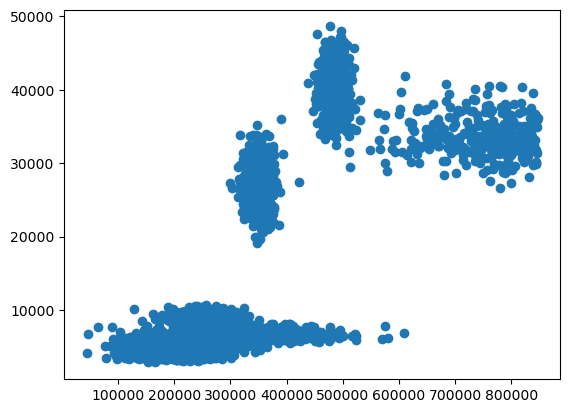

In [49]:
plt.scatter(X["Yıllık Ortalama Gelir"], X["Yıllık Ortalama Satın Alım Miktarı"])

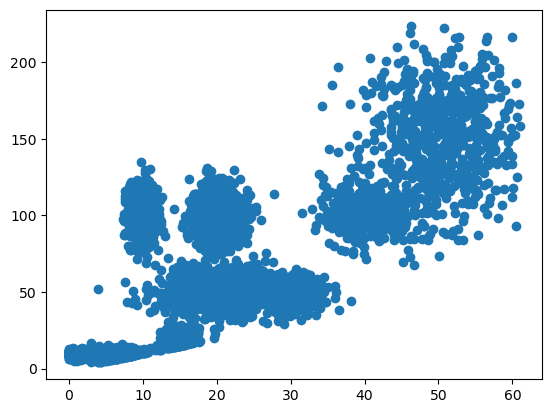

In [50]:
plt.scatter(X["Yıllık Ortalama Sipariş Verilen Ürün Adedi"], X["Yıllık Ortalama Sepete Atılan Ürün Adedi"])

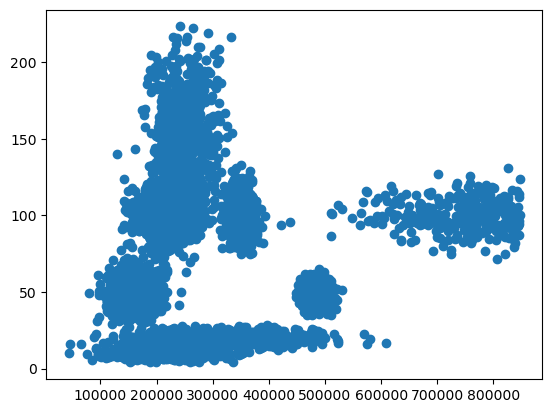

In [51]:
plt.scatter(X["Yıllık Ortalama Gelir"], X["Yıllık Ortalama Sepete Atılan Ürün Adedi"])

In [52]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Cinsiyet                                    2340 non-null   object 
 1   Yaş Grubu                                   2340 non-null   object 
 2   Medeni Durum                                2340 non-null   object 
 3   Eğitim Düzeyi                               2340 non-null   object 
 4   İstihdam Durumu                             2340 non-null   object 
 5   Yıllık Ortalama Gelir                       2340 non-null   float64
 6   Yaşadığı Şehir                              2340 non-null   object 
 7   En Çok İlgilendiği Ürün Grubu               2340 non-null   object 
 8   Yıllık Ortalama Satın Alım Miktarı          2340 non-null   float64
 9   Yıllık Ortalama Sipariş Verilen Ürün Adedi  2340 non-null   float64
 10  Eğitime Deva

In [53]:
X.head()

Yıllık Ortalama Gelir  Yıllık Ortalama Satın Alım Miktarı  \
0          748266.440879                        32010.900881   
1          246298.609605                         4145.729891   
2          268582.732360                         9924.379414   
3          327721.837865                         6417.780714   
4          397431.626948                         7886.663061   

   Yıllık Ortalama Sipariş Verilen Ürün Adedi  \
0                                   37.310644   
1                                   11.554851   
2                                   55.353236   
3                                   15.417239   
4                                   14.689837   

   Yıllık Ortalama Sepete Atılan Ürün Adedi  Cinsiyet_Erkek  Cinsiyet_Kadın  \
0                                102.936904               0               1   
1                                 82.176053               1               0   
2                                141.661426               1               0   
3                                 17.097397               1               0   
4                                 20.470459               1               0   

   Yaş Grubu_18-30  Yaş Grubu_31-50  Yaş Grubu_>51  Medeni Durum_Bekar  ...  \
0                0                1              0                   1  ...   
1                0                0              1                   0  ...   
2                1                0              0                   1  ...   
3                0                0              1                   0  ...   
4                0                1              0                   0  ...   

   Yaşadığı Şehir_Büyük Şehir  Yaşadığı Şehir_Küçük Şehir  \
0                           1                           0   
1                           0                           1   
2                           0                           1   
3                           0                           0   
4                           1                           0   

   Yaşadığı Şehir_şehirDışı  \
0                         0   
1                         0   
2                         0   
3                         1   
4                         0   

   En Çok İlgilendiği Ürün Grubu_Elektronik ve Teknolojik Ürünler  \
0                                                  1                
1                                                  0                
2                                                  0                
3                                                  0                
4                                                  0                

   En Çok İlgilendiği Ürün Grubu_Ev ve Mobilya  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   En Çok İlgilendiği Ürün Grubu_Giyim  \
0                                    0   
1                                    0   
2                                    1   
3                                    1   
4                                    1   

   En Çok İlgilendiği Ürün Grubu_Kozmetik  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   En Çok İlgilendiği Ürün Grubu_Spor Malzemeleri  \
0                                               0   
1                                               1   
2                                               0   
3                                               0   
4                                               0   

   Eğitime Devam Etme Durumu_Ediyor  Eğitime Devam Etme Durumu_Etmiyor  
0                                 0                                  1  
1                                 0                                  1  
2                                 1      

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [55]:
dfTest = pd.get_dummies(dfTest)
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 31 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Yıllık Ortalama Gelir                                           2340 non-null   float64
 1   Yıllık Ortalama Satın Alım Miktarı                              2340 non-null   float64
 2   Yıllık Ortalama Sipariş Verilen Ürün Adedi                      2340 non-null   float64
 3   Yıllık Ortalama Sepete Atılan Ürün Adedi                        2340 non-null   float64
 4   Cinsiyet_Erkek                                                  2340 non-null   uint8  
 5   Cinsiyet_Kadın                                                  2340 non-null   uint8  
 6   Yaş Grubu_18-30                                                 2340 non-null   uint8  
 7   Yaş Grubu_31-50                                    

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfTest = scaler.fit_transform(dfTest)

In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
le = LabelEncoder()

In [59]:
y = le.fit_transform(y)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
from sklearn.decomposition import PCA

In [62]:
#model = PCA(n_components=2)

In [63]:
#pca_X = model.fit_transform(scaled_X)

In [64]:
#scaled_X = np.insert(scaled_X, 1, pca_X[:, 0], axis = 1)
#scaled_X = np.insert(scaled_X, 1, pca_X[:, 1], axis = 1)

In [65]:
#pca_y = model.transform(dfTest)

In [66]:
#dfTest = np.insert(dfTest, 1, pca_y[:, 0], axis = 1)
#dfTest = np.insert(dfTest, 1, pca_y[:, 1], axis = 1)

In [67]:
dfTest.shape

(2340, 31)

In [68]:
scaled_X.shape

(5062, 31)

In [69]:
X_train, X_valid, y_train, y_valid = train_test_split(scaled_X, y, test_size=0.2, random_state=101)

In [2052]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train, y_train)
Y_pred_ran_for = ran_for.predict(X_valid)

In [2053]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, Y_pred_ran_for))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       130
           1       0.95      0.93      0.94        96
           2       0.91      0.97      0.94       142
           3       0.95      0.83      0.89        76
           4       0.96      0.96      0.96       142
           5       0.95      0.98      0.96       142
           6       0.96      0.94      0.95       144
           7       0.98      0.97      0.98       141

    accuracy                           0.95      1013
   macro avg       0.95      0.94      0.95      1013
weighted avg       0.95      0.95      0.95      1013



              precision    recall  f1-score   support

           0       0.97      0.95      0.96       137
           1       0.99      0.98      0.99       110
           2       0.95      0.95      0.95       141
           3       0.95      0.86      0.91        73
           4       0.95      0.99      0.97       142
           5       0.94      0.96      0.95       133
           6       0.94      0.93      0.94       135
           7       0.95      0.97      0.96       142

    accuracy                           0.95      1013
   macro avg       0.96      0.95      0.95      1013
weighted avg       0.95      0.95      0.95      1013

In [2054]:
from sklearn.metrics import classification_report
print(classification_report(y_train, Y_pred_ran_for2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       558
           1       1.00      1.00      1.00       450
           2       1.00      1.00      1.00       553
           3       1.00      1.00      1.00       281
           4       1.00      1.00      1.00       561
           5       1.00      1.00      1.00       544
           6       1.00      1.00      1.00       548
           7       1.00      1.00      1.00       554

    accuracy                           1.00      4049
   macro avg       1.00      1.00      1.00      4049
weighted avg       1.00      1.00      1.00      4049



In [2055]:
a = []
b = []
c = []
for i in range(len(y_valid)):
    if y_valid[i] != Y_pred_ran_for[i]:
        print(y_valid[i], " ", Y_pred_ran_for[i], " ", i)
        a.append(y_valid[i])
        b.append( Y_pred_ran_for[i])
        c.append(i)

0   2   14
3   2   66
3   4   77
3   1   94
4   5   151
1   5   188
3   5   191
6   2   214
0   3   286
1   6   293
0   2   331
7   1   343
7   0   345
6   3   363
1   7   375
1   4   387
1   0   392
5   1   456
5   6   471
6   2   492
4   5   496
6   2   502
2   5   509
1   2   517
2   5   526
6   1   553
6   7   566
3   4   645
2   0   650
3   0   658
0   6   664
3   2   677
3   6   686
3   4   729
3   0   753
4   2   762
7   2   763
3   5   771
4   5   776
2   7   799
4   6   803
1   2   804
3   4   832
6   1   833
7   2   863
3   4   876
5   3   900
6   0   959
4   2   1012


6   0   71  
6   3   117  
2   5   118  
0   2   126  
7   4   132  
1   4   139  
1   5   174  
6   3   238  
3   7   242  
3   7   288  
6   0   300  
3   0   339  
3   7   368  
2   6   383  
3   5   388  
6   5   390  
7   1   417  
6   1   454  
4   7   468  
3   2   617  
0   3   621  
0   1   626  
1   5   629  
6   7   660  
0   6   691  
1   4   695  
0   6   703  
0   4   709  
1   0   728  
6   4   733  
3   5   753  
6   2   790  
7   4   807  
5   6   811  

In [2056]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_valid, Y_pred_ran_for)
print(cm)

[[126   0   2   1   0   0   1   0]
 [  1  89   2   0   1   1   1   1]
 [  1   0 138   0   0   2   0   1]
 [  2   1   2  63   5   2   1   0]
 [  0   0   2   0 136   3   1   0]
 [  0   1   0   1   0 139   1   0]
 [  1   2   3   1   0   0 136   1]
 [  1   1   2   0   0   0   0 137]]


In [2057]:

from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=10, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]
cv = [int(x) for x in np.linspace(3, 8, num=1)]
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}
rf_tuned = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150]},
                   random_state=42)

In [2058]:
rf_cv.best_score_

0.9555427368035527

0.9555427368035527

In [2059]:
rf_cv.best_params_

{'n_estimators': 50, 'max_depth': 134}

In [2060]:
Y_pred_ran_for = rf_cv.predict(X_valid)
Y_pred_ran_for2 = rf_cv.predict(X_train)

In [2061]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, Y_pred_ran_for))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       130
           1       0.95      0.93      0.94        96
           2       0.91      0.97      0.94       142
           3       0.95      0.83      0.89        76
           4       0.96      0.96      0.96       142
           5       0.95      0.98      0.96       142
           6       0.96      0.94      0.95       144
           7       0.98      0.97      0.98       141

    accuracy                           0.95      1013
   macro avg       0.95      0.94      0.95      1013
weighted avg       0.95      0.95      0.95      1013



In [2062]:
print(classification_report(y_train, Y_pred_ran_for2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       558
           1       1.00      1.00      1.00       450
           2       1.00      1.00      1.00       553
           3       1.00      1.00      1.00       281
           4       1.00      1.00      1.00       561
           5       1.00      1.00      1.00       544
           6       1.00      1.00      1.00       548
           7       1.00      1.00      1.00       554

    accuracy                           1.00      4049
   macro avg       1.00      1.00      1.00      4049
weighted avg       1.00      1.00      1.00      4049



In [2063]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(scaled_X, y)
Y_pred_ran_for = ran_for.predict(scaled_X)

In [2064]:
Y_pred_ran_for2 = rf_cv.predict(scaled_X)

In [2065]:
for i in range(len(Y_pred_ran_for)):
    if(Y_pred_ran_for[i] != y[i]):
        print(Y_pred_ran_for2[i], " " , y[i])

In [2066]:
for i in range(len(Y_pred_ran_for)):
    if(Y_pred_ran_for[i] != y[i]):
        print(Y_pred_ran_for[i], " " , y[i], " ",i)

In [2067]:
from sklearn.metrics import classification_report
print(classification_report(scaled_X, Y_pred_ran_for))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [ ]:
predSubmit = ran_for.predict(dfTest)

In [ ]:
predSubmit = rf_cv.predict(dfTest)

In [ ]:
predSubmit = rf_cv.predict(dfTest)
predSubmit
predSubmit = le.inverse_transform(predSubmit)
predSubmit = pd.DataFrame(predSubmit, columns=["Öbek İsmi"])
predSubmit

In [ ]:
predSubmit = le.inverse_transform(predSubmit)

In [ ]:
predSubmit = pd.DataFrame(predSubmit, columns=["Öbek İsmi"])
predSubmit

In [ ]:
predSubmit["id"] = predSubmit.index
predSubmit = predSubmit[["id", "Öbek İsmi"]]
predSubmit.to_csv("rfc3.csv", index=False)

In [ ]:
scaled_X

In [2068]:
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.metrics import mean_squared_error as mse
M = 0
dist_manhattan = []
def manhattan():
    for M in range(40):
        M = M+1
        model2 = KNN(n_neighbors = M, metric= 'manhattan')
        model2.fit(X_train, y_train)
        pred=model2.predict(X_valid)
        error = mse(y_valid,pred)
        dist_manhattan.append(error)
        print('Manhattan distance for k= ' , M , 'is:', dist_manhattan[M - 1])

In [2069]:
manhattan()

Manhattan distance for k=  1 is: 2.016781836130306
Manhattan distance for k=  2 is: 1.3605626850937809
Manhattan distance for k=  3 is: 1.2210156849840954
Manhattan distance for k=  4 is: 1.1507280355380058
Manhattan distance for k=  5 is: 1.097690029615005
Manhattan distance for k=  6 is: 1.0887079083031699
Manhattan distance for k=  7 is: 1.0543747607631404
Manhattan distance for k=  8 is: 1.0293990621915103
Manhattan distance for k=  9 is: 1.0215470488586644
Manhattan distance for k=  10 is: 1.0152418558736427
Manhattan distance for k=  11 is: 1.0123681398024036
Manhattan distance for k=  12 is: 0.9894839311176923
Manhattan distance for k=  13 is: 1.0021145230348665
Manhattan distance for k=  14 is: 1.001556298728771
Manhattan distance for k=  15 is: 1.0013162224415928
Manhattan distance for k=  16 is: 0.9943932008884502
Manhattan distance for k=  17 is: 0.9835563282859163
Manhattan distance for k=  18 is: 0.9883733684325984
Manhattan distance for k=  19 is: 0.9959966419920535
Manha

In [2070]:
model2 = KNN(n_neighbors = 7, metric= 'manhattan')
model2.fit(X_train, y_train)
pred=model2.predict(X_valid)

In [2071]:
print(classification_report(y_valid, pred))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
df7 = pd.read_csv('Lyndon_Quadros_Submission.csv')

In [2072]:
predSubmit = df7["Öbek İsmi"].to_numpy()

In [2073]:
predSubmit

array([2, 7, 7, ..., 2, 7, 7], dtype=int64)

In [2074]:
predSubmit = le.inverse_transform(predSubmit)

In [2075]:
predSubmit = pd.DataFrame(predSubmit, columns=["Öbek İsmi"])
predSubmit

Öbek İsmi
0       obek_3
1       obek_8
2       obek_8
3       obek_8
4       obek_8
...        ...
2335    obek_8
2336    obek_3
2337    obek_3
2338    obek_8
2339    obek_8

[2340 rows x 1 columns]

In [2076]:
predSubmit["id"] = predSubmit.index
predSubmit = predSubmit[["id", "Öbek İsmi"]]
predSubmit.to_csv("PCA.csv", index=False)

In [2077]:
from sklearn.metrics import classification_report
print(classification_report(y, predSubmit))

ValueError: Found input variables with inconsistent numbers of samples: [5062, 2340]

In [2078]:
#Create a svm Classifier
clf = SVC(kernel='linear', gamma="auto") # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_valid)

In [2079]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.9486673247778875


In [2085]:
model = xgb.XGBClassifier() 
#Train the model using the training sets
model.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_valid)

In [2086]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_valid, y_pred))

Accuracy: 0.9506416584402764


In [2087]:
from sklearn.model_selection import cross_val_score, KFold


# - cross validataion
scores = cross_val_score(model, X_train, y_train, cv=5)
print("Mean cross-validation score: %.4f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(model, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.4f" % kf_cv_scores.mean())

Mean cross-validation score: 0.9526
K-fold CV average score: 0.9536


In [2088]:
predSubmit = model.predict(dfTest)
predSubmit
predSubmit = le.inverse_transform(predSubmit)
predSubmit = pd.DataFrame(predSubmit, columns=["Öbek İsmi"])
predSubmit

Öbek İsmi
0       obek_3
1       obek_3
2       obek_2
3       obek_6
4       obek_1
...        ...
2335    obek_8
2336    obek_2
2337    obek_7
2338    obek_5
2339    obek_6

[2340 rows x 1 columns]

In [2089]:
predSubmit["id"] = predSubmit.index
predSubmit = predSubmit[["id", "Öbek İsmi"]]
predSubmit.to_csv("xbc.csv", index=False)

In [71]:
pip install catboost

     ------------------------------------- 101.0/101.0 MB 15.6 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB ? eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [74]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier()
clf.fit(X_train, y_train,
       eval_set = (X_valid, y_valid),
       verbose= False)

In [75]:

pred = clf.predict(X_valid)

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_valid, pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       130
           1       0.95      0.93      0.94        96
           2       0.91      0.97      0.94       142
           3       0.95      0.83      0.89        76
           4       0.96      0.96      0.96       142
           5       0.95      0.98      0.96       142
           6       0.96      0.94      0.95       144
           7       0.98      0.97      0.98       141

    accuracy                           0.95      1013
   macro avg       0.95      0.94      0.95      1013
weighted avg       0.95      0.95      0.95      1013



In [77]:
clf.score(X_train, y_train)

0.9552976043467523

In [80]:
pred2 = clf.predict(X_train)

In [81]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       558
           1       0.97      0.95      0.96       450
           2       0.95      0.96      0.96       553
           3       0.96      0.88      0.92       281
           4       0.96      0.97      0.97       561
           5       0.95      0.96      0.96       544
           6       0.95      0.96      0.95       548
           7       0.95      0.97      0.96       554

    accuracy                           0.96      4049
   macro avg       0.96      0.95      0.95      4049
weighted avg       0.96      0.96      0.96      4049



In [82]:
from sklearn.model_selection import GridSearchCV

In [84]:
parameters = {'n_estimators':[100, 200,500], 'learning_rate':[0.01, 0.05, 0.1, 0.2,0.5,1], 'depth': [3, 6, 10]}
gclf = GridSearchCV(clf, parameters)
gclf.fit(X_train, y_train)

0:	learn: 2.0407216	total: 28.6ms	remaining: 2.83s
1:	learn: 2.0075420	total: 31ms	remaining: 1.52s
2:	learn: 1.9773017	total: 32.7ms	remaining: 1.06s
3:	learn: 1.9485382	total: 34.7ms	remaining: 834ms
4:	learn: 1.9196656	total: 36.6ms	remaining: 695ms
5:	learn: 1.8847727	total: 38.4ms	remaining: 602ms
6:	learn: 1.8581876	total: 40.8ms	remaining: 543ms
7:	learn: 1.8296535	total: 42.9ms	remaining: 493ms
8:	learn: 1.7985681	total: 44.8ms	remaining: 453ms
9:	learn: 1.7789595	total: 46.6ms	remaining: 419ms
10:	learn: 1.7584563	total: 48.6ms	remaining: 393ms
11:	learn: 1.7334061	total: 50.4ms	remaining: 370ms
12:	learn: 1.7060963	total: 52.3ms	remaining: 350ms
13:	learn: 1.6842351	total: 54.2ms	remaining: 333ms
14:	learn: 1.6622721	total: 56ms	remaining: 317ms
15:	learn: 1.6406745	total: 57.9ms	remaining: 304ms
16:	learn: 1.6215139	total: 59.7ms	remaining: 291ms
17:	learn: 1.6019714	total: 61.5ms	remaining: 280ms
18:	learn: 1.5832957	total: 63.3ms	remaining: 270ms
19:	learn: 1.5620217	total

0:	learn: 2.0406740	total: 1.96ms	remaining: 195ms
1:	learn: 2.0080491	total: 3.88ms	remaining: 190ms
2:	learn: 1.9777813	total: 5.81ms	remaining: 188ms
3:	learn: 1.9463308	total: 7.71ms	remaining: 185ms
4:	learn: 1.9191958	total: 9.57ms	remaining: 182ms
5:	learn: 1.8848530	total: 11.4ms	remaining: 179ms
6:	learn: 1.8595690	total: 13.3ms	remaining: 176ms
7:	learn: 1.8311828	total: 15.1ms	remaining: 174ms
8:	learn: 1.7999438	total: 17.2ms	remaining: 174ms
9:	learn: 1.7804517	total: 19ms	remaining: 171ms
10:	learn: 1.7599482	total: 20.9ms	remaining: 169ms
11:	learn: 1.7298266	total: 22.8ms	remaining: 167ms
12:	learn: 1.7082411	total: 24.7ms	remaining: 165ms
13:	learn: 1.6865717	total: 26.5ms	remaining: 163ms
14:	learn: 1.6653495	total: 28.4ms	remaining: 161ms
15:	learn: 1.6407508	total: 30.2ms	remaining: 159ms
16:	learn: 1.6208455	total: 32.1ms	remaining: 157ms
17:	learn: 1.6013297	total: 34.1ms	remaining: 155ms
18:	learn: 1.5819394	total: 36ms	remaining: 153ms
19:	learn: 1.5639761	total

0:	learn: 2.0408904	total: 2.48ms	remaining: 245ms
1:	learn: 2.0090707	total: 4.86ms	remaining: 238ms
2:	learn: 1.9677750	total: 7.2ms	remaining: 233ms
3:	learn: 1.9363856	total: 9.32ms	remaining: 224ms
4:	learn: 1.9093298	total: 11.6ms	remaining: 220ms
5:	learn: 1.8748390	total: 14.1ms	remaining: 221ms
6:	learn: 1.8495240	total: 16.2ms	remaining: 215ms
7:	learn: 1.8210700	total: 18.4ms	remaining: 211ms
8:	learn: 1.7898859	total: 20.7ms	remaining: 209ms
9:	learn: 1.7701287	total: 22.9ms	remaining: 206ms
10:	learn: 1.7495961	total: 25.1ms	remaining: 203ms
11:	learn: 1.7200874	total: 27.4ms	remaining: 201ms
12:	learn: 1.6932687	total: 29.7ms	remaining: 199ms
13:	learn: 1.6709441	total: 31.9ms	remaining: 196ms
14:	learn: 1.6503801	total: 34.1ms	remaining: 193ms
15:	learn: 1.6260359	total: 36.3ms	remaining: 191ms
16:	learn: 1.6056401	total: 38.6ms	remaining: 188ms
17:	learn: 1.5859798	total: 40.7ms	remaining: 186ms
18:	learn: 1.5663796	total: 42.9ms	remaining: 183ms
19:	learn: 1.5475524	to

147:	learn: 0.5824946	total: 295ms	remaining: 104ms
148:	learn: 0.5794539	total: 298ms	remaining: 102ms
149:	learn: 0.5769684	total: 300ms	remaining: 100ms
150:	learn: 0.5741142	total: 303ms	remaining: 98.3ms
151:	learn: 0.5718782	total: 305ms	remaining: 96.4ms
152:	learn: 0.5694835	total: 308ms	remaining: 94.5ms
153:	learn: 0.5668606	total: 310ms	remaining: 92.7ms
154:	learn: 0.5649909	total: 313ms	remaining: 90.7ms
155:	learn: 0.5624959	total: 315ms	remaining: 88.8ms
156:	learn: 0.5595856	total: 317ms	remaining: 86.9ms
157:	learn: 0.5569539	total: 320ms	remaining: 85.1ms
158:	learn: 0.5544575	total: 323ms	remaining: 83.2ms
159:	learn: 0.5520580	total: 325ms	remaining: 81.2ms
160:	learn: 0.5495822	total: 328ms	remaining: 79.3ms
161:	learn: 0.5471944	total: 330ms	remaining: 77.3ms
162:	learn: 0.5444987	total: 332ms	remaining: 75.4ms
163:	learn: 0.5421906	total: 334ms	remaining: 73.3ms
164:	learn: 0.5399431	total: 336ms	remaining: 71.3ms
165:	learn: 0.5376729	total: 338ms	remaining: 69.

0:	learn: 2.0406740	total: 2.29ms	remaining: 455ms
1:	learn: 2.0080491	total: 4.46ms	remaining: 441ms
2:	learn: 1.9777813	total: 6.28ms	remaining: 413ms
3:	learn: 1.9463308	total: 8.53ms	remaining: 418ms
4:	learn: 1.9191958	total: 10.3ms	remaining: 404ms
5:	learn: 1.8848530	total: 12.2ms	remaining: 396ms
6:	learn: 1.8595690	total: 14.1ms	remaining: 390ms
7:	learn: 1.8311828	total: 16.4ms	remaining: 393ms
8:	learn: 1.7999438	total: 18.2ms	remaining: 386ms
9:	learn: 1.7804517	total: 20.1ms	remaining: 382ms
10:	learn: 1.7599482	total: 21.9ms	remaining: 376ms
11:	learn: 1.7298266	total: 23.8ms	remaining: 374ms
12:	learn: 1.7082411	total: 25.7ms	remaining: 370ms
13:	learn: 1.6865717	total: 27.5ms	remaining: 366ms
14:	learn: 1.6653495	total: 29.4ms	remaining: 362ms
15:	learn: 1.6407508	total: 31.3ms	remaining: 360ms
16:	learn: 1.6208455	total: 33.1ms	remaining: 357ms
17:	learn: 1.6013297	total: 35ms	remaining: 354ms
18:	learn: 1.5819394	total: 36.8ms	remaining: 350ms
19:	learn: 1.5639761	tot

192:	learn: 0.4806877	total: 406ms	remaining: 14.7ms
193:	learn: 0.4788484	total: 408ms	remaining: 12.6ms
194:	learn: 0.4772736	total: 410ms	remaining: 10.5ms
195:	learn: 0.4757177	total: 412ms	remaining: 8.4ms
196:	learn: 0.4742522	total: 414ms	remaining: 6.3ms
197:	learn: 0.4721921	total: 416ms	remaining: 4.2ms
198:	learn: 0.4702448	total: 418ms	remaining: 2.1ms
199:	learn: 0.4687790	total: 420ms	remaining: 0us
0:	learn: 2.0408263	total: 2.13ms	remaining: 424ms
1:	learn: 2.0078236	total: 4.15ms	remaining: 411ms
2:	learn: 1.9772740	total: 6.7ms	remaining: 440ms
3:	learn: 1.9457747	total: 8.68ms	remaining: 425ms
4:	learn: 1.9171936	total: 10.6ms	remaining: 412ms
5:	learn: 1.8824925	total: 12.6ms	remaining: 408ms
6:	learn: 1.8572055	total: 14.5ms	remaining: 399ms
7:	learn: 1.8286274	total: 16.5ms	remaining: 396ms
8:	learn: 1.7974817	total: 18.3ms	remaining: 389ms
9:	learn: 1.7779879	total: 20.4ms	remaining: 388ms
10:	learn: 1.7571381	total: 22.3ms	remaining: 384ms
11:	learn: 1.7299285	t

166:	learn: 0.5291890	total: 328ms	remaining: 64.8ms
167:	learn: 0.5269308	total: 330ms	remaining: 62.9ms
168:	learn: 0.5250377	total: 332ms	remaining: 60.9ms
169:	learn: 0.5223736	total: 334ms	remaining: 59ms
170:	learn: 0.5198628	total: 336ms	remaining: 57ms
171:	learn: 0.5179448	total: 338ms	remaining: 55ms
172:	learn: 0.5156160	total: 340ms	remaining: 53.1ms
173:	learn: 0.5130056	total: 343ms	remaining: 51.3ms
174:	learn: 0.5104031	total: 346ms	remaining: 49.4ms
175:	learn: 0.5079690	total: 348ms	remaining: 47.4ms
176:	learn: 0.5057416	total: 350ms	remaining: 45.4ms
177:	learn: 0.5041407	total: 352ms	remaining: 43.4ms
178:	learn: 0.5019811	total: 353ms	remaining: 41.5ms
179:	learn: 0.5003252	total: 355ms	remaining: 39.5ms
180:	learn: 0.4982719	total: 357ms	remaining: 37.5ms
181:	learn: 0.4958335	total: 359ms	remaining: 35.5ms
182:	learn: 0.4939459	total: 361ms	remaining: 33.5ms
183:	learn: 0.4922622	total: 363ms	remaining: 31.6ms
184:	learn: 0.4903430	total: 365ms	remaining: 29.6ms

139:	learn: 0.5927833	total: 276ms	remaining: 118ms
140:	learn: 0.5898581	total: 279ms	remaining: 117ms
141:	learn: 0.5865215	total: 281ms	remaining: 115ms
142:	learn: 0.5839180	total: 283ms	remaining: 113ms
143:	learn: 0.5812651	total: 285ms	remaining: 111ms
144:	learn: 0.5779435	total: 287ms	remaining: 109ms
145:	learn: 0.5749873	total: 289ms	remaining: 107ms
146:	learn: 0.5716720	total: 291ms	remaining: 105ms
147:	learn: 0.5688104	total: 294ms	remaining: 103ms
148:	learn: 0.5654052	total: 295ms	remaining: 101ms
149:	learn: 0.5626722	total: 297ms	remaining: 99.1ms
150:	learn: 0.5603810	total: 299ms	remaining: 97.1ms
151:	learn: 0.5576414	total: 301ms	remaining: 95.2ms
152:	learn: 0.5552396	total: 303ms	remaining: 93.2ms
153:	learn: 0.5526211	total: 305ms	remaining: 91.1ms
154:	learn: 0.5506007	total: 307ms	remaining: 89.2ms
155:	learn: 0.5478337	total: 309ms	remaining: 87.2ms
156:	learn: 0.5449360	total: 311ms	remaining: 85.2ms
157:	learn: 0.5423078	total: 313ms	remaining: 83.2ms
158

109:	learn: 0.7157197	total: 215ms	remaining: 764ms
110:	learn: 0.7117242	total: 218ms	remaining: 763ms
111:	learn: 0.7075748	total: 220ms	remaining: 761ms
112:	learn: 0.7032309	total: 222ms	remaining: 760ms
113:	learn: 0.6988028	total: 224ms	remaining: 758ms
114:	learn: 0.6950025	total: 226ms	remaining: 756ms
115:	learn: 0.6911539	total: 228ms	remaining: 755ms
116:	learn: 0.6867235	total: 230ms	remaining: 754ms
117:	learn: 0.6832352	total: 232ms	remaining: 752ms
118:	learn: 0.6800351	total: 234ms	remaining: 750ms
119:	learn: 0.6761848	total: 236ms	remaining: 747ms
120:	learn: 0.6724893	total: 238ms	remaining: 746ms
121:	learn: 0.6690331	total: 240ms	remaining: 744ms
122:	learn: 0.6654638	total: 242ms	remaining: 741ms
123:	learn: 0.6615340	total: 244ms	remaining: 739ms
124:	learn: 0.6576212	total: 246ms	remaining: 737ms
125:	learn: 0.6542789	total: 248ms	remaining: 735ms
126:	learn: 0.6505488	total: 249ms	remaining: 733ms
127:	learn: 0.6471601	total: 251ms	remaining: 730ms
128:	learn: 

318:	learn: 0.3497768	total: 616ms	remaining: 350ms
319:	learn: 0.3492125	total: 618ms	remaining: 348ms
320:	learn: 0.3487858	total: 620ms	remaining: 346ms
321:	learn: 0.3480844	total: 622ms	remaining: 344ms
322:	learn: 0.3476091	total: 624ms	remaining: 342ms
323:	learn: 0.3470016	total: 626ms	remaining: 340ms
324:	learn: 0.3464244	total: 628ms	remaining: 338ms
325:	learn: 0.3457569	total: 631ms	remaining: 337ms
326:	learn: 0.3451895	total: 633ms	remaining: 335ms
327:	learn: 0.3446972	total: 635ms	remaining: 333ms
328:	learn: 0.3443128	total: 637ms	remaining: 331ms
329:	learn: 0.3438616	total: 639ms	remaining: 329ms
330:	learn: 0.3434260	total: 641ms	remaining: 327ms
331:	learn: 0.3428779	total: 643ms	remaining: 325ms
332:	learn: 0.3425677	total: 645ms	remaining: 323ms
333:	learn: 0.3420593	total: 647ms	remaining: 322ms
334:	learn: 0.3415814	total: 649ms	remaining: 320ms
335:	learn: 0.3411084	total: 651ms	remaining: 318ms
336:	learn: 0.3406991	total: 653ms	remaining: 316ms
337:	learn: 

0:	learn: 2.0406496	total: 2.2ms	remaining: 1.1s
1:	learn: 2.0090486	total: 4.25ms	remaining: 1.06s
2:	learn: 1.9784493	total: 6.18ms	remaining: 1.02s
3:	learn: 1.9470852	total: 8.17ms	remaining: 1.01s
4:	learn: 1.9200969	total: 10ms	remaining: 995ms
5:	learn: 1.8852750	total: 12.2ms	remaining: 1s
6:	learn: 1.8589660	total: 14.1ms	remaining: 992ms
7:	learn: 1.8302908	total: 15.9ms	remaining: 981ms
8:	learn: 1.7987303	total: 17.8ms	remaining: 972ms
9:	learn: 1.7792291	total: 19.7ms	remaining: 968ms
10:	learn: 1.7588758	total: 21.7ms	remaining: 964ms
11:	learn: 1.7285783	total: 24ms	remaining: 975ms
12:	learn: 1.7012823	total: 26.6ms	remaining: 995ms
13:	learn: 1.6796602	total: 28.8ms	remaining: 1s
14:	learn: 1.6582216	total: 31.1ms	remaining: 1s
15:	learn: 1.6366268	total: 32.9ms	remaining: 994ms
16:	learn: 1.6168042	total: 34.8ms	remaining: 989ms
17:	learn: 1.5972329	total: 36.6ms	remaining: 981ms
18:	learn: 1.5795377	total: 38.5ms	remaining: 974ms
19:	learn: 1.5600701	total: 40.3ms	re

202:	learn: 0.4539748	total: 394ms	remaining: 577ms
203:	learn: 0.4520893	total: 396ms	remaining: 575ms
204:	learn: 0.4507171	total: 399ms	remaining: 574ms
205:	learn: 0.4494690	total: 401ms	remaining: 572ms
206:	learn: 0.4476985	total: 403ms	remaining: 571ms
207:	learn: 0.4459783	total: 406ms	remaining: 570ms
208:	learn: 0.4442188	total: 408ms	remaining: 568ms
209:	learn: 0.4425091	total: 410ms	remaining: 566ms
210:	learn: 0.4408073	total: 412ms	remaining: 565ms
211:	learn: 0.4393564	total: 415ms	remaining: 563ms
212:	learn: 0.4378739	total: 417ms	remaining: 561ms
213:	learn: 0.4364855	total: 419ms	remaining: 560ms
214:	learn: 0.4353262	total: 421ms	remaining: 558ms
215:	learn: 0.4339440	total: 423ms	remaining: 556ms
216:	learn: 0.4324829	total: 425ms	remaining: 554ms
217:	learn: 0.4314660	total: 427ms	remaining: 552ms
218:	learn: 0.4303022	total: 428ms	remaining: 550ms
219:	learn: 0.4288768	total: 431ms	remaining: 548ms
220:	learn: 0.4272584	total: 433ms	remaining: 546ms
221:	learn: 

373:	learn: 0.3123741	total: 787ms	remaining: 265ms
374:	learn: 0.3119212	total: 790ms	remaining: 263ms
375:	learn: 0.3114981	total: 793ms	remaining: 261ms
376:	learn: 0.3111413	total: 795ms	remaining: 260ms
377:	learn: 0.3108650	total: 799ms	remaining: 258ms
378:	learn: 0.3106623	total: 801ms	remaining: 256ms
379:	learn: 0.3103195	total: 804ms	remaining: 254ms
380:	learn: 0.3099800	total: 806ms	remaining: 252ms
381:	learn: 0.3096228	total: 808ms	remaining: 250ms
382:	learn: 0.3092273	total: 811ms	remaining: 248ms
383:	learn: 0.3089979	total: 813ms	remaining: 246ms
384:	learn: 0.3086213	total: 816ms	remaining: 244ms
385:	learn: 0.3082930	total: 818ms	remaining: 242ms
386:	learn: 0.3079511	total: 821ms	remaining: 240ms
387:	learn: 0.3076657	total: 823ms	remaining: 238ms
388:	learn: 0.3073288	total: 825ms	remaining: 235ms
389:	learn: 0.3069216	total: 827ms	remaining: 233ms
390:	learn: 0.3066367	total: 830ms	remaining: 231ms
391:	learn: 0.3064185	total: 832ms	remaining: 229ms
392:	learn: 

129:	learn: 0.6357440	total: 252ms	remaining: 717ms
130:	learn: 0.6323955	total: 254ms	remaining: 716ms
131:	learn: 0.6295778	total: 256ms	remaining: 714ms
132:	learn: 0.6263371	total: 258ms	remaining: 712ms
133:	learn: 0.6231452	total: 260ms	remaining: 710ms
134:	learn: 0.6199968	total: 262ms	remaining: 709ms
135:	learn: 0.6172813	total: 264ms	remaining: 707ms
136:	learn: 0.6137123	total: 266ms	remaining: 705ms
137:	learn: 0.6102148	total: 269ms	remaining: 704ms
138:	learn: 0.6072983	total: 270ms	remaining: 702ms
139:	learn: 0.6042907	total: 273ms	remaining: 701ms
140:	learn: 0.6010014	total: 275ms	remaining: 699ms
141:	learn: 0.5976531	total: 277ms	remaining: 698ms
142:	learn: 0.5947138	total: 279ms	remaining: 697ms
143:	learn: 0.5914924	total: 281ms	remaining: 696ms
144:	learn: 0.5885001	total: 284ms	remaining: 694ms
145:	learn: 0.5863340	total: 286ms	remaining: 693ms
146:	learn: 0.5829319	total: 288ms	remaining: 690ms
147:	learn: 0.5801137	total: 289ms	remaining: 688ms
148:	learn: 

334:	learn: 0.3387678	total: 652ms	remaining: 321ms
335:	learn: 0.3382229	total: 655ms	remaining: 320ms
336:	learn: 0.3378314	total: 657ms	remaining: 318ms
337:	learn: 0.3374733	total: 659ms	remaining: 316ms
338:	learn: 0.3370764	total: 660ms	remaining: 314ms
339:	learn: 0.3366628	total: 662ms	remaining: 312ms
340:	learn: 0.3361024	total: 665ms	remaining: 310ms
341:	learn: 0.3355635	total: 667ms	remaining: 308ms
342:	learn: 0.3350616	total: 669ms	remaining: 306ms
343:	learn: 0.3345892	total: 672ms	remaining: 305ms
344:	learn: 0.3342262	total: 674ms	remaining: 303ms
345:	learn: 0.3339220	total: 677ms	remaining: 301ms
346:	learn: 0.3334314	total: 678ms	remaining: 299ms
347:	learn: 0.3330918	total: 680ms	remaining: 297ms
348:	learn: 0.3326840	total: 682ms	remaining: 295ms
349:	learn: 0.3322076	total: 684ms	remaining: 293ms
350:	learn: 0.3317720	total: 686ms	remaining: 291ms
351:	learn: 0.3313929	total: 688ms	remaining: 289ms
352:	learn: 0.3309478	total: 690ms	remaining: 287ms
353:	learn: 

7:	learn: 1.8286274	total: 16.7ms	remaining: 1.02s
8:	learn: 1.7974817	total: 19ms	remaining: 1.04s
9:	learn: 1.7779879	total: 21ms	remaining: 1.03s
10:	learn: 1.7571381	total: 23.2ms	remaining: 1.03s
11:	learn: 1.7299285	total: 25.2ms	remaining: 1.02s
12:	learn: 1.7083449	total: 27.4ms	remaining: 1.02s
13:	learn: 1.6866287	total: 29.5ms	remaining: 1.02s
14:	learn: 1.6653633	total: 31.8ms	remaining: 1.03s
15:	learn: 1.6404331	total: 34.1ms	remaining: 1.03s
16:	learn: 1.6206446	total: 36.1ms	remaining: 1.03s
17:	learn: 1.6012830	total: 38ms	remaining: 1.02s
18:	learn: 1.5767824	total: 40.2ms	remaining: 1.02s
19:	learn: 1.5587027	total: 42.2ms	remaining: 1.01s
20:	learn: 1.5401465	total: 44.1ms	remaining: 1s
21:	learn: 1.5169049	total: 46ms	remaining: 998ms
22:	learn: 1.4990881	total: 48.2ms	remaining: 999ms
23:	learn: 1.4788311	total: 50ms	remaining: 992ms
24:	learn: 1.4631017	total: 52ms	remaining: 988ms
25:	learn: 1.4444621	total: 53.8ms	remaining: 981ms
26:	learn: 1.4286116	total: 55

196:	learn: 0.4695244	total: 413ms	remaining: 634ms
197:	learn: 0.4674108	total: 415ms	remaining: 632ms
198:	learn: 0.4659367	total: 417ms	remaining: 630ms
199:	learn: 0.4644524	total: 419ms	remaining: 628ms
200:	learn: 0.4627813	total: 421ms	remaining: 626ms
201:	learn: 0.4611100	total: 423ms	remaining: 624ms
202:	learn: 0.4599363	total: 425ms	remaining: 622ms
203:	learn: 0.4580326	total: 427ms	remaining: 620ms
204:	learn: 0.4561738	total: 430ms	remaining: 618ms
205:	learn: 0.4549391	total: 432ms	remaining: 616ms
206:	learn: 0.4532874	total: 435ms	remaining: 616ms
207:	learn: 0.4514225	total: 437ms	remaining: 613ms
208:	learn: 0.4496105	total: 439ms	remaining: 611ms
209:	learn: 0.4477949	total: 442ms	remaining: 610ms
210:	learn: 0.4465573	total: 444ms	remaining: 608ms
211:	learn: 0.4450957	total: 446ms	remaining: 606ms
212:	learn: 0.4436672	total: 448ms	remaining: 604ms
213:	learn: 0.4423601	total: 450ms	remaining: 602ms
214:	learn: 0.4406679	total: 453ms	remaining: 600ms
215:	learn: 

382:	learn: 0.3138363	total: 809ms	remaining: 247ms
383:	learn: 0.3135454	total: 811ms	remaining: 245ms
384:	learn: 0.3131849	total: 813ms	remaining: 243ms
385:	learn: 0.3128650	total: 815ms	remaining: 241ms
386:	learn: 0.3125187	total: 817ms	remaining: 239ms
387:	learn: 0.3121809	total: 820ms	remaining: 237ms
388:	learn: 0.3118705	total: 822ms	remaining: 234ms
389:	learn: 0.3115048	total: 824ms	remaining: 232ms
390:	learn: 0.3111555	total: 826ms	remaining: 230ms
391:	learn: 0.3108403	total: 828ms	remaining: 228ms
392:	learn: 0.3105489	total: 831ms	remaining: 226ms
393:	learn: 0.3102441	total: 834ms	remaining: 224ms
394:	learn: 0.3099643	total: 836ms	remaining: 222ms
395:	learn: 0.3096326	total: 838ms	remaining: 220ms
396:	learn: 0.3092816	total: 841ms	remaining: 218ms
397:	learn: 0.3090017	total: 843ms	remaining: 216ms
398:	learn: 0.3086950	total: 845ms	remaining: 214ms
399:	learn: 0.3084715	total: 848ms	remaining: 212ms
400:	learn: 0.3080837	total: 850ms	remaining: 210ms
401:	learn: 

119:	learn: 0.6597036	total: 276ms	remaining: 874ms
120:	learn: 0.6567108	total: 278ms	remaining: 871ms
121:	learn: 0.6531358	total: 280ms	remaining: 868ms
122:	learn: 0.6496443	total: 282ms	remaining: 865ms
123:	learn: 0.6462713	total: 285ms	remaining: 863ms
124:	learn: 0.6424903	total: 286ms	remaining: 859ms
125:	learn: 0.6387998	total: 289ms	remaining: 856ms
126:	learn: 0.6351361	total: 290ms	remaining: 853ms
127:	learn: 0.6317862	total: 292ms	remaining: 850ms
128:	learn: 0.6286526	total: 295ms	remaining: 847ms
129:	learn: 0.6244393	total: 297ms	remaining: 845ms
130:	learn: 0.6210483	total: 299ms	remaining: 842ms
131:	learn: 0.6182019	total: 301ms	remaining: 839ms
132:	learn: 0.6149071	total: 303ms	remaining: 836ms
133:	learn: 0.6112940	total: 305ms	remaining: 832ms
134:	learn: 0.6087323	total: 307ms	remaining: 829ms
135:	learn: 0.6060078	total: 308ms	remaining: 826ms
136:	learn: 0.6024310	total: 310ms	remaining: 822ms
137:	learn: 0.5992384	total: 312ms	remaining: 819ms
138:	learn: 

311:	learn: 0.3362849	total: 673ms	remaining: 405ms
312:	learn: 0.3355810	total: 675ms	remaining: 403ms
313:	learn: 0.3350482	total: 677ms	remaining: 401ms
314:	learn: 0.3344798	total: 679ms	remaining: 399ms
315:	learn: 0.3338454	total: 681ms	remaining: 396ms
316:	learn: 0.3331685	total: 683ms	remaining: 394ms
317:	learn: 0.3324143	total: 685ms	remaining: 392ms
318:	learn: 0.3317737	total: 687ms	remaining: 390ms
319:	learn: 0.3312572	total: 689ms	remaining: 388ms
320:	learn: 0.3308271	total: 691ms	remaining: 385ms
321:	learn: 0.3303288	total: 694ms	remaining: 383ms
322:	learn: 0.3298187	total: 695ms	remaining: 381ms
323:	learn: 0.3292923	total: 697ms	remaining: 379ms
324:	learn: 0.3287730	total: 699ms	remaining: 377ms
325:	learn: 0.3282906	total: 701ms	remaining: 374ms
326:	learn: 0.3277179	total: 703ms	remaining: 372ms
327:	learn: 0.3272379	total: 705ms	remaining: 370ms
328:	learn: 0.3267699	total: 707ms	remaining: 368ms
329:	learn: 0.3262447	total: 709ms	remaining: 365ms
330:	learn: 

0:	learn: 1.8898725	total: 2.43ms	remaining: 241ms
1:	learn: 1.7766100	total: 4.48ms	remaining: 220ms
2:	learn: 1.6601835	total: 6.88ms	remaining: 223ms
3:	learn: 1.5677290	total: 8.8ms	remaining: 211ms
4:	learn: 1.4807088	total: 10.7ms	remaining: 203ms
5:	learn: 1.3856169	total: 12.5ms	remaining: 196ms
6:	learn: 1.3181126	total: 14.5ms	remaining: 193ms
7:	learn: 1.2472961	total: 16.5ms	remaining: 189ms
8:	learn: 1.1785243	total: 18.3ms	remaining: 185ms
9:	learn: 1.1253576	total: 20.1ms	remaining: 181ms
10:	learn: 1.0778107	total: 22.1ms	remaining: 178ms
11:	learn: 1.0313022	total: 23.8ms	remaining: 175ms
12:	learn: 0.9900438	total: 25.7ms	remaining: 172ms
13:	learn: 0.9538619	total: 27.6ms	remaining: 170ms
14:	learn: 0.9233093	total: 29.6ms	remaining: 168ms
15:	learn: 0.8835871	total: 31.4ms	remaining: 165ms
16:	learn: 0.8529505	total: 33.3ms	remaining: 163ms
17:	learn: 0.8274831	total: 35.1ms	remaining: 160ms
18:	learn: 0.8026714	total: 37ms	remaining: 158ms
19:	learn: 0.7796122	tota

96:	learn: 0.2846459	total: 208ms	remaining: 6.44ms
97:	learn: 0.2841597	total: 210ms	remaining: 4.29ms
98:	learn: 0.2839550	total: 212ms	remaining: 2.14ms
99:	learn: 0.2833879	total: 214ms	remaining: 0us
0:	learn: 1.8896392	total: 2.42ms	remaining: 239ms
1:	learn: 1.7770356	total: 4.19ms	remaining: 205ms
2:	learn: 1.6613186	total: 6.09ms	remaining: 197ms
3:	learn: 1.5503118	total: 8ms	remaining: 192ms
4:	learn: 1.4607348	total: 10ms	remaining: 190ms
5:	learn: 1.3818245	total: 12ms	remaining: 189ms
6:	learn: 1.3138452	total: 14.1ms	remaining: 188ms
7:	learn: 1.2429330	total: 16.2ms	remaining: 186ms
8:	learn: 1.1716278	total: 18ms	remaining: 182ms
9:	learn: 1.1192259	total: 19.8ms	remaining: 178ms
10:	learn: 1.0785760	total: 21.7ms	remaining: 176ms
11:	learn: 1.0229824	total: 23.5ms	remaining: 173ms
12:	learn: 0.9825181	total: 25.5ms	remaining: 171ms
13:	learn: 0.9427542	total: 27.3ms	remaining: 168ms
14:	learn: 0.9052862	total: 29.3ms	remaining: 166ms
15:	learn: 0.8669543	total: 31.3ms

17:	learn: 0.7997385	total: 39.9ms	remaining: 182ms
18:	learn: 0.7727333	total: 42.3ms	remaining: 180ms
19:	learn: 0.7455470	total: 44.3ms	remaining: 177ms
20:	learn: 0.7187670	total: 46.3ms	remaining: 174ms
21:	learn: 0.6922803	total: 48.3ms	remaining: 171ms
22:	learn: 0.6734635	total: 50.3ms	remaining: 168ms
23:	learn: 0.6522070	total: 52.5ms	remaining: 166ms
24:	learn: 0.6318997	total: 54.8ms	remaining: 164ms
25:	learn: 0.6125703	total: 56.8ms	remaining: 162ms
26:	learn: 0.5965638	total: 59.1ms	remaining: 160ms
27:	learn: 0.5778289	total: 61.3ms	remaining: 158ms
28:	learn: 0.5613834	total: 63.6ms	remaining: 156ms
29:	learn: 0.5468832	total: 66.2ms	remaining: 154ms
30:	learn: 0.5353121	total: 68.3ms	remaining: 152ms
31:	learn: 0.5246049	total: 70.8ms	remaining: 150ms
32:	learn: 0.5112392	total: 73ms	remaining: 148ms
33:	learn: 0.5010807	total: 75.2ms	remaining: 146ms
34:	learn: 0.4906318	total: 77.1ms	remaining: 143ms
35:	learn: 0.4798452	total: 79.9ms	remaining: 142ms
36:	learn: 0.4

108:	learn: 0.2903527	total: 206ms	remaining: 172ms
109:	learn: 0.2898157	total: 209ms	remaining: 171ms
110:	learn: 0.2892077	total: 211ms	remaining: 169ms
111:	learn: 0.2889040	total: 213ms	remaining: 167ms
112:	learn: 0.2885302	total: 215ms	remaining: 165ms
113:	learn: 0.2879742	total: 217ms	remaining: 164ms
114:	learn: 0.2877585	total: 219ms	remaining: 162ms
115:	learn: 0.2873992	total: 221ms	remaining: 160ms
116:	learn: 0.2872494	total: 223ms	remaining: 159ms
117:	learn: 0.2866444	total: 226ms	remaining: 157ms
118:	learn: 0.2861405	total: 228ms	remaining: 155ms
119:	learn: 0.2857429	total: 230ms	remaining: 153ms
120:	learn: 0.2854279	total: 232ms	remaining: 151ms
121:	learn: 0.2850400	total: 234ms	remaining: 149ms
122:	learn: 0.2846427	total: 236ms	remaining: 147ms
123:	learn: 0.2839159	total: 237ms	remaining: 146ms
124:	learn: 0.2835685	total: 239ms	remaining: 144ms
125:	learn: 0.2832747	total: 241ms	remaining: 142ms
126:	learn: 0.2830811	total: 243ms	remaining: 140ms
127:	learn: 

93:	learn: 0.2872995	total: 208ms	remaining: 234ms
94:	learn: 0.2862445	total: 210ms	remaining: 232ms
95:	learn: 0.2852752	total: 212ms	remaining: 230ms
96:	learn: 0.2846459	total: 214ms	remaining: 227ms
97:	learn: 0.2841597	total: 216ms	remaining: 225ms
98:	learn: 0.2839550	total: 219ms	remaining: 223ms
99:	learn: 0.2833879	total: 221ms	remaining: 221ms
100:	learn: 0.2829020	total: 223ms	remaining: 219ms
101:	learn: 0.2821157	total: 225ms	remaining: 217ms
102:	learn: 0.2817442	total: 228ms	remaining: 215ms
103:	learn: 0.2811087	total: 230ms	remaining: 212ms
104:	learn: 0.2806255	total: 233ms	remaining: 210ms
105:	learn: 0.2798406	total: 235ms	remaining: 209ms
106:	learn: 0.2790128	total: 238ms	remaining: 207ms
107:	learn: 0.2787524	total: 240ms	remaining: 204ms
108:	learn: 0.2784141	total: 242ms	remaining: 202ms
109:	learn: 0.2778879	total: 244ms	remaining: 200ms
110:	learn: 0.2776553	total: 246ms	remaining: 197ms
111:	learn: 0.2771377	total: 248ms	remaining: 195ms
112:	learn: 0.27680

65:	learn: 0.3384848	total: 128ms	remaining: 259ms
66:	learn: 0.3359610	total: 130ms	remaining: 257ms
67:	learn: 0.3340656	total: 132ms	remaining: 256ms
68:	learn: 0.3316798	total: 134ms	remaining: 254ms
69:	learn: 0.3297752	total: 136ms	remaining: 252ms
70:	learn: 0.3274254	total: 138ms	remaining: 251ms
71:	learn: 0.3256881	total: 140ms	remaining: 249ms
72:	learn: 0.3238783	total: 142ms	remaining: 248ms
73:	learn: 0.3221300	total: 144ms	remaining: 246ms
74:	learn: 0.3209294	total: 146ms	remaining: 244ms
75:	learn: 0.3196841	total: 148ms	remaining: 242ms
76:	learn: 0.3179343	total: 150ms	remaining: 240ms
77:	learn: 0.3171311	total: 152ms	remaining: 238ms
78:	learn: 0.3156652	total: 154ms	remaining: 236ms
79:	learn: 0.3138367	total: 156ms	remaining: 234ms
80:	learn: 0.3124527	total: 158ms	remaining: 232ms
81:	learn: 0.3107688	total: 160ms	remaining: 230ms
82:	learn: 0.3095121	total: 162ms	remaining: 228ms
83:	learn: 0.3080113	total: 164ms	remaining: 226ms
84:	learn: 0.3069070	total: 166

26:	learn: 0.6064566	total: 81ms	remaining: 519ms
27:	learn: 0.5870157	total: 83.4ms	remaining: 512ms
28:	learn: 0.5727933	total: 85.4ms	remaining: 503ms
29:	learn: 0.5573355	total: 87.3ms	remaining: 495ms
30:	learn: 0.5462036	total: 89.3ms	remaining: 487ms
31:	learn: 0.5329593	total: 91.3ms	remaining: 479ms
32:	learn: 0.5199091	total: 93.3ms	remaining: 472ms
33:	learn: 0.5094204	total: 95.2ms	remaining: 465ms
34:	learn: 0.4990411	total: 97.5ms	remaining: 460ms
35:	learn: 0.4900943	total: 99.4ms	remaining: 453ms
36:	learn: 0.4809229	total: 101ms	remaining: 446ms
37:	learn: 0.4718743	total: 103ms	remaining: 439ms
38:	learn: 0.4626578	total: 105ms	remaining: 434ms
39:	learn: 0.4551949	total: 107ms	remaining: 428ms
40:	learn: 0.4460991	total: 109ms	remaining: 422ms
41:	learn: 0.4394259	total: 111ms	remaining: 417ms
42:	learn: 0.4336037	total: 113ms	remaining: 411ms
43:	learn: 0.4279155	total: 114ms	remaining: 405ms
44:	learn: 0.4223755	total: 116ms	remaining: 400ms
45:	learn: 0.4159295	to

3:	learn: 1.5495166	total: 8.51ms	remaining: 417ms
4:	learn: 1.4640729	total: 10.8ms	remaining: 420ms
5:	learn: 1.3691332	total: 12.7ms	remaining: 412ms
6:	learn: 1.2967285	total: 14.8ms	remaining: 407ms
7:	learn: 1.2322551	total: 16.8ms	remaining: 402ms
8:	learn: 1.1688348	total: 18.8ms	remaining: 398ms
9:	learn: 1.1183855	total: 20.7ms	remaining: 394ms
10:	learn: 1.0624210	total: 23ms	remaining: 395ms
11:	learn: 1.0152665	total: 25.1ms	remaining: 394ms
12:	learn: 0.9682201	total: 27.1ms	remaining: 390ms
13:	learn: 0.9303582	total: 28.9ms	remaining: 384ms
14:	learn: 0.8921449	total: 30.9ms	remaining: 381ms
15:	learn: 0.8565262	total: 32.9ms	remaining: 378ms
16:	learn: 0.8241335	total: 34.7ms	remaining: 374ms
17:	learn: 0.7997385	total: 36.6ms	remaining: 370ms
18:	learn: 0.7727333	total: 38.4ms	remaining: 366ms
19:	learn: 0.7455470	total: 40.3ms	remaining: 363ms
20:	learn: 0.7187670	total: 42.1ms	remaining: 359ms
21:	learn: 0.6922803	total: 44ms	remaining: 356ms
22:	learn: 0.6734635	to

0:	learn: 1.8898725	total: 7.84ms	remaining: 3.91s
1:	learn: 1.7766100	total: 14.9ms	remaining: 3.71s
2:	learn: 1.6601835	total: 22.1ms	remaining: 3.66s
3:	learn: 1.5677290	total: 28.2ms	remaining: 3.5s
4:	learn: 1.4807088	total: 33.3ms	remaining: 3.29s
5:	learn: 1.3856169	total: 37.2ms	remaining: 3.06s
6:	learn: 1.3181126	total: 40.8ms	remaining: 2.87s
7:	learn: 1.2472961	total: 43.9ms	remaining: 2.7s
8:	learn: 1.1785243	total: 45.8ms	remaining: 2.5s
9:	learn: 1.1253576	total: 47.5ms	remaining: 2.33s
10:	learn: 1.0778107	total: 49.4ms	remaining: 2.19s
11:	learn: 1.0313022	total: 51.3ms	remaining: 2.08s
12:	learn: 0.9900438	total: 53.1ms	remaining: 1.99s
13:	learn: 0.9538619	total: 55ms	remaining: 1.91s
14:	learn: 0.9233093	total: 57ms	remaining: 1.84s
15:	learn: 0.8835871	total: 58.9ms	remaining: 1.78s
16:	learn: 0.8529505	total: 60.8ms	remaining: 1.73s
17:	learn: 0.8274831	total: 62.7ms	remaining: 1.68s
18:	learn: 0.8026714	total: 64.5ms	remaining: 1.63s
19:	learn: 0.7796122	total: 6

197:	learn: 0.2660511	total: 406ms	remaining: 619ms
198:	learn: 0.2659217	total: 408ms	remaining: 618ms
199:	learn: 0.2657781	total: 411ms	remaining: 616ms
200:	learn: 0.2656624	total: 413ms	remaining: 614ms
201:	learn: 0.2655082	total: 416ms	remaining: 613ms
202:	learn: 0.2653865	total: 418ms	remaining: 612ms
203:	learn: 0.2652866	total: 420ms	remaining: 610ms
204:	learn: 0.2651356	total: 422ms	remaining: 608ms
205:	learn: 0.2650319	total: 425ms	remaining: 607ms
206:	learn: 0.2648936	total: 427ms	remaining: 605ms
207:	learn: 0.2648290	total: 429ms	remaining: 602ms
208:	learn: 0.2647039	total: 431ms	remaining: 600ms
209:	learn: 0.2646265	total: 433ms	remaining: 598ms
210:	learn: 0.2644871	total: 435ms	remaining: 596ms
211:	learn: 0.2644125	total: 437ms	remaining: 593ms
212:	learn: 0.2642098	total: 439ms	remaining: 591ms
213:	learn: 0.2641223	total: 440ms	remaining: 589ms
214:	learn: 0.2640068	total: 442ms	remaining: 586ms
215:	learn: 0.2638773	total: 444ms	remaining: 584ms
216:	learn: 

402:	learn: 0.2442166	total: 799ms	remaining: 192ms
403:	learn: 0.2441012	total: 801ms	remaining: 190ms
404:	learn: 0.2440765	total: 803ms	remaining: 188ms
405:	learn: 0.2439952	total: 805ms	remaining: 186ms
406:	learn: 0.2439093	total: 807ms	remaining: 184ms
407:	learn: 0.2438137	total: 809ms	remaining: 182ms
408:	learn: 0.2437159	total: 811ms	remaining: 181ms
409:	learn: 0.2435935	total: 814ms	remaining: 179ms
410:	learn: 0.2434996	total: 816ms	remaining: 177ms
411:	learn: 0.2434158	total: 818ms	remaining: 175ms
412:	learn: 0.2433688	total: 821ms	remaining: 173ms
413:	learn: 0.2432793	total: 822ms	remaining: 171ms
414:	learn: 0.2431762	total: 825ms	remaining: 169ms
415:	learn: 0.2431279	total: 826ms	remaining: 167ms
416:	learn: 0.2430899	total: 828ms	remaining: 165ms
417:	learn: 0.2430181	total: 830ms	remaining: 163ms
418:	learn: 0.2429319	total: 832ms	remaining: 161ms
419:	learn: 0.2428886	total: 834ms	remaining: 159ms
420:	learn: 0.2428113	total: 836ms	remaining: 157ms
421:	learn: 

105:	learn: 0.2798406	total: 203ms	remaining: 754ms
106:	learn: 0.2790128	total: 205ms	remaining: 754ms
107:	learn: 0.2787524	total: 208ms	remaining: 753ms
108:	learn: 0.2784141	total: 209ms	remaining: 751ms
109:	learn: 0.2778879	total: 212ms	remaining: 750ms
110:	learn: 0.2776553	total: 214ms	remaining: 748ms
111:	learn: 0.2771377	total: 216ms	remaining: 748ms
112:	learn: 0.2768076	total: 218ms	remaining: 747ms
113:	learn: 0.2763227	total: 221ms	remaining: 747ms
114:	learn: 0.2760916	total: 231ms	remaining: 774ms
115:	learn: 0.2756667	total: 234ms	remaining: 775ms
116:	learn: 0.2754020	total: 236ms	remaining: 773ms
117:	learn: 0.2747770	total: 239ms	remaining: 775ms
118:	learn: 0.2741394	total: 242ms	remaining: 775ms
119:	learn: 0.2735612	total: 244ms	remaining: 774ms
120:	learn: 0.2730475	total: 247ms	remaining: 773ms
121:	learn: 0.2724940	total: 249ms	remaining: 770ms
122:	learn: 0.2720524	total: 250ms	remaining: 767ms
123:	learn: 0.2717204	total: 252ms	remaining: 765ms
124:	learn: 

306:	learn: 0.2424970	total: 603ms	remaining: 379ms
307:	learn: 0.2423666	total: 605ms	remaining: 377ms
308:	learn: 0.2422713	total: 607ms	remaining: 375ms
309:	learn: 0.2421448	total: 609ms	remaining: 373ms
310:	learn: 0.2420177	total: 611ms	remaining: 371ms
311:	learn: 0.2419713	total: 612ms	remaining: 369ms
312:	learn: 0.2419060	total: 615ms	remaining: 367ms
313:	learn: 0.2418433	total: 617ms	remaining: 365ms
314:	learn: 0.2417359	total: 619ms	remaining: 363ms
315:	learn: 0.2416321	total: 621ms	remaining: 362ms
316:	learn: 0.2415116	total: 623ms	remaining: 360ms
317:	learn: 0.2414441	total: 625ms	remaining: 358ms
318:	learn: 0.2413286	total: 627ms	remaining: 356ms
319:	learn: 0.2412452	total: 628ms	remaining: 354ms
320:	learn: 0.2411774	total: 630ms	remaining: 351ms
321:	learn: 0.2410318	total: 632ms	remaining: 349ms
322:	learn: 0.2410002	total: 634ms	remaining: 347ms
323:	learn: 0.2409439	total: 636ms	remaining: 345ms
324:	learn: 0.2407684	total: 638ms	remaining: 343ms
325:	learn: 

0:	learn: 1.8896392	total: 2.55ms	remaining: 1.27s
1:	learn: 1.7770356	total: 4.75ms	remaining: 1.18s
2:	learn: 1.6613186	total: 6.68ms	remaining: 1.11s
3:	learn: 1.5503118	total: 8.58ms	remaining: 1.06s
4:	learn: 1.4607348	total: 10.6ms	remaining: 1.04s
5:	learn: 1.3818245	total: 12.5ms	remaining: 1.03s
6:	learn: 1.3138452	total: 14.3ms	remaining: 1.01s
7:	learn: 1.2429330	total: 16.2ms	remaining: 998ms
8:	learn: 1.1716278	total: 18.1ms	remaining: 989ms
9:	learn: 1.1192259	total: 20ms	remaining: 981ms
10:	learn: 1.0785760	total: 21.9ms	remaining: 973ms
11:	learn: 1.0229824	total: 23.8ms	remaining: 969ms
12:	learn: 0.9825181	total: 25.8ms	remaining: 966ms
13:	learn: 0.9427542	total: 27.7ms	remaining: 960ms
14:	learn: 0.9052862	total: 29.5ms	remaining: 955ms
15:	learn: 0.8669543	total: 31.4ms	remaining: 949ms
16:	learn: 0.8438195	total: 33.2ms	remaining: 945ms
17:	learn: 0.8136752	total: 35.2ms	remaining: 944ms
18:	learn: 0.7872375	total: 37.1ms	remaining: 940ms
19:	learn: 0.7633166	tot

213:	learn: 0.2638897	total: 411ms	remaining: 549ms
214:	learn: 0.2638002	total: 413ms	remaining: 548ms
215:	learn: 0.2636739	total: 415ms	remaining: 546ms
216:	learn: 0.2635398	total: 417ms	remaining: 544ms
217:	learn: 0.2634116	total: 419ms	remaining: 542ms
218:	learn: 0.2633137	total: 422ms	remaining: 541ms
219:	learn: 0.2632349	total: 424ms	remaining: 539ms
220:	learn: 0.2630847	total: 426ms	remaining: 537ms
221:	learn: 0.2630231	total: 428ms	remaining: 536ms
222:	learn: 0.2628804	total: 430ms	remaining: 534ms
223:	learn: 0.2627778	total: 432ms	remaining: 533ms
224:	learn: 0.2626417	total: 434ms	remaining: 531ms
225:	learn: 0.2624480	total: 436ms	remaining: 529ms
226:	learn: 0.2622955	total: 438ms	remaining: 527ms
227:	learn: 0.2621880	total: 440ms	remaining: 525ms
228:	learn: 0.2619046	total: 442ms	remaining: 523ms
229:	learn: 0.2617759	total: 444ms	remaining: 521ms
230:	learn: 0.2616526	total: 446ms	remaining: 519ms
231:	learn: 0.2615631	total: 448ms	remaining: 517ms
232:	learn: 

412:	learn: 0.2440780	total: 809ms	remaining: 170ms
413:	learn: 0.2440250	total: 811ms	remaining: 169ms
414:	learn: 0.2439422	total: 813ms	remaining: 167ms
415:	learn: 0.2438880	total: 815ms	remaining: 165ms
416:	learn: 0.2437513	total: 817ms	remaining: 163ms
417:	learn: 0.2435902	total: 819ms	remaining: 161ms
418:	learn: 0.2435341	total: 822ms	remaining: 159ms
419:	learn: 0.2434538	total: 824ms	remaining: 157ms
420:	learn: 0.2433311	total: 826ms	remaining: 155ms
421:	learn: 0.2432782	total: 828ms	remaining: 153ms
422:	learn: 0.2432006	total: 830ms	remaining: 151ms
423:	learn: 0.2431617	total: 833ms	remaining: 149ms
424:	learn: 0.2431095	total: 835ms	remaining: 147ms
425:	learn: 0.2430136	total: 837ms	remaining: 145ms
426:	learn: 0.2429666	total: 839ms	remaining: 144ms
427:	learn: 0.2429031	total: 842ms	remaining: 142ms
428:	learn: 0.2428448	total: 844ms	remaining: 140ms
429:	learn: 0.2427964	total: 846ms	remaining: 138ms
430:	learn: 0.2426445	total: 849ms	remaining: 136ms
431:	learn: 

108:	learn: 0.2826062	total: 209ms	remaining: 749ms
109:	learn: 0.2820901	total: 211ms	remaining: 749ms
110:	learn: 0.2816392	total: 213ms	remaining: 748ms
111:	learn: 0.2813306	total: 215ms	remaining: 746ms
112:	learn: 0.2808956	total: 217ms	remaining: 745ms
113:	learn: 0.2802219	total: 219ms	remaining: 743ms
114:	learn: 0.2800370	total: 222ms	remaining: 742ms
115:	learn: 0.2796316	total: 224ms	remaining: 740ms
116:	learn: 0.2794435	total: 226ms	remaining: 740ms
117:	learn: 0.2791317	total: 228ms	remaining: 739ms
118:	learn: 0.2788259	total: 230ms	remaining: 737ms
119:	learn: 0.2783230	total: 232ms	remaining: 735ms
120:	learn: 0.2778169	total: 234ms	remaining: 734ms
121:	learn: 0.2774027	total: 236ms	remaining: 732ms
122:	learn: 0.2769973	total: 238ms	remaining: 729ms
123:	learn: 0.2766749	total: 240ms	remaining: 727ms
124:	learn: 0.2764440	total: 242ms	remaining: 725ms
125:	learn: 0.2760904	total: 244ms	remaining: 723ms
126:	learn: 0.2758187	total: 245ms	remaining: 721ms
127:	learn: 

300:	learn: 0.2455969	total: 607ms	remaining: 401ms
301:	learn: 0.2453442	total: 609ms	remaining: 399ms
302:	learn: 0.2451826	total: 611ms	remaining: 397ms
303:	learn: 0.2451198	total: 613ms	remaining: 395ms
304:	learn: 0.2450599	total: 616ms	remaining: 394ms
305:	learn: 0.2449402	total: 618ms	remaining: 392ms
306:	learn: 0.2448312	total: 620ms	remaining: 390ms
307:	learn: 0.2447771	total: 622ms	remaining: 388ms
308:	learn: 0.2446838	total: 625ms	remaining: 386ms
309:	learn: 0.2445399	total: 628ms	remaining: 385ms
310:	learn: 0.2444377	total: 630ms	remaining: 383ms
311:	learn: 0.2443737	total: 632ms	remaining: 381ms
312:	learn: 0.2442660	total: 635ms	remaining: 379ms
313:	learn: 0.2441896	total: 637ms	remaining: 378ms
314:	learn: 0.2440670	total: 639ms	remaining: 375ms
315:	learn: 0.2439836	total: 642ms	remaining: 374ms
316:	learn: 0.2439022	total: 644ms	remaining: 372ms
317:	learn: 0.2438085	total: 646ms	remaining: 370ms
318:	learn: 0.2436348	total: 649ms	remaining: 368ms
319:	learn: 

487:	learn: 0.2275082	total: 1s	remaining: 24.6ms
488:	learn: 0.2274700	total: 1s	remaining: 22.6ms
489:	learn: 0.2274278	total: 1s	remaining: 20.5ms
490:	learn: 0.2273527	total: 1.01s	remaining: 18.5ms
491:	learn: 0.2272700	total: 1.01s	remaining: 16.4ms
492:	learn: 0.2271166	total: 1.01s	remaining: 14.4ms
493:	learn: 0.2270440	total: 1.01s	remaining: 12.3ms
494:	learn: 0.2269958	total: 1.02s	remaining: 10.3ms
495:	learn: 0.2269143	total: 1.02s	remaining: 8.21ms
496:	learn: 0.2268267	total: 1.02s	remaining: 6.16ms
497:	learn: 0.2267205	total: 1.02s	remaining: 4.11ms
498:	learn: 0.2265870	total: 1.02s	remaining: 2.05ms
499:	learn: 0.2265169	total: 1.03s	remaining: 0us
0:	learn: 1.8906968	total: 2.41ms	remaining: 1.2s
1:	learn: 1.7773974	total: 4.31ms	remaining: 1.07s
2:	learn: 1.6607656	total: 6.51ms	remaining: 1.08s
3:	learn: 1.5495166	total: 8.39ms	remaining: 1.04s
4:	learn: 1.4640729	total: 10.4ms	remaining: 1.03s
5:	learn: 1.3691332	total: 12.4ms	remaining: 1.02s
6:	learn: 1.296728

237:	learn: 0.2460986	total: 502ms	remaining: 552ms
238:	learn: 0.2459874	total: 504ms	remaining: 551ms
239:	learn: 0.2458861	total: 507ms	remaining: 549ms
240:	learn: 0.2458118	total: 510ms	remaining: 548ms
241:	learn: 0.2457331	total: 512ms	remaining: 546ms
242:	learn: 0.2455714	total: 514ms	remaining: 544ms
243:	learn: 0.2454529	total: 517ms	remaining: 542ms
244:	learn: 0.2453340	total: 519ms	remaining: 540ms
245:	learn: 0.2452744	total: 521ms	remaining: 538ms
246:	learn: 0.2451670	total: 524ms	remaining: 536ms
247:	learn: 0.2450591	total: 526ms	remaining: 534ms
248:	learn: 0.2449965	total: 528ms	remaining: 532ms
249:	learn: 0.2449055	total: 530ms	remaining: 530ms
250:	learn: 0.2447890	total: 533ms	remaining: 529ms
251:	learn: 0.2446533	total: 536ms	remaining: 527ms
252:	learn: 0.2445849	total: 538ms	remaining: 525ms
253:	learn: 0.2444772	total: 540ms	remaining: 523ms
254:	learn: 0.2443186	total: 542ms	remaining: 521ms
255:	learn: 0.2442728	total: 544ms	remaining: 519ms
256:	learn: 

426:	learn: 0.2286441	total: 898ms	remaining: 154ms
427:	learn: 0.2286180	total: 900ms	remaining: 151ms
428:	learn: 0.2285632	total: 902ms	remaining: 149ms
429:	learn: 0.2283696	total: 904ms	remaining: 147ms
430:	learn: 0.2282444	total: 906ms	remaining: 145ms
431:	learn: 0.2281824	total: 908ms	remaining: 143ms
432:	learn: 0.2280849	total: 911ms	remaining: 141ms
433:	learn: 0.2279989	total: 912ms	remaining: 139ms
434:	learn: 0.2278075	total: 915ms	remaining: 137ms
435:	learn: 0.2276888	total: 917ms	remaining: 135ms
436:	learn: 0.2275149	total: 920ms	remaining: 133ms
437:	learn: 0.2274554	total: 922ms	remaining: 131ms
438:	learn: 0.2273748	total: 925ms	remaining: 129ms
439:	learn: 0.2272883	total: 927ms	remaining: 126ms
440:	learn: 0.2272477	total: 929ms	remaining: 124ms
441:	learn: 0.2271777	total: 931ms	remaining: 122ms
442:	learn: 0.2270448	total: 933ms	remaining: 120ms
443:	learn: 0.2270085	total: 935ms	remaining: 118ms
444:	learn: 0.2268814	total: 937ms	remaining: 116ms
445:	learn: 

99:	learn: 0.2676794	total: 212ms	remaining: 0us
0:	learn: 1.7109930	total: 2.83ms	remaining: 280ms
1:	learn: 1.5221182	total: 4.78ms	remaining: 234ms
2:	learn: 1.3503080	total: 6.94ms	remaining: 224ms
3:	learn: 1.2102540	total: 9.41ms	remaining: 226ms
4:	learn: 1.1032918	total: 11.8ms	remaining: 225ms
5:	learn: 1.0027969	total: 14ms	remaining: 219ms
6:	learn: 0.9087664	total: 16.1ms	remaining: 214ms
7:	learn: 0.8354857	total: 18.9ms	remaining: 217ms
8:	learn: 0.7738169	total: 21ms	remaining: 213ms
9:	learn: 0.7342806	total: 23ms	remaining: 207ms
10:	learn: 0.6951349	total: 25.6ms	remaining: 208ms
11:	learn: 0.6531241	total: 27.8ms	remaining: 204ms
12:	learn: 0.6104147	total: 30ms	remaining: 200ms
13:	learn: 0.5836401	total: 32.5ms	remaining: 200ms
14:	learn: 0.5546322	total: 34.9ms	remaining: 198ms
15:	learn: 0.5275668	total: 36.9ms	remaining: 194ms
16:	learn: 0.4995218	total: 39.1ms	remaining: 191ms
17:	learn: 0.4806517	total: 41.8ms	remaining: 191ms
18:	learn: 0.4658916	total: 44ms	

0:	learn: 1.7126655	total: 3.2ms	remaining: 317ms
1:	learn: 1.5233323	total: 5.69ms	remaining: 279ms
2:	learn: 1.3634671	total: 7.98ms	remaining: 258ms
3:	learn: 1.2151181	total: 10.1ms	remaining: 243ms
4:	learn: 1.1052069	total: 12.2ms	remaining: 231ms
5:	learn: 0.9995503	total: 14ms	remaining: 220ms
6:	learn: 0.9047009	total: 16ms	remaining: 212ms
7:	learn: 0.8259950	total: 18ms	remaining: 207ms
8:	learn: 0.7631888	total: 19.8ms	remaining: 200ms
9:	learn: 0.7213732	total: 21.6ms	remaining: 195ms
10:	learn: 0.6736735	total: 23.5ms	remaining: 190ms
11:	learn: 0.6349076	total: 25.3ms	remaining: 185ms
12:	learn: 0.5986136	total: 27.1ms	remaining: 182ms
13:	learn: 0.5705704	total: 29ms	remaining: 178ms
14:	learn: 0.5385594	total: 30.9ms	remaining: 175ms
15:	learn: 0.5144388	total: 32.8ms	remaining: 172ms
16:	learn: 0.4883181	total: 34.9ms	remaining: 170ms
17:	learn: 0.4700383	total: 36.9ms	remaining: 168ms
18:	learn: 0.4543832	total: 38.9ms	remaining: 166ms
19:	learn: 0.4397251	total: 40.

65:	learn: 0.2629330	total: 130ms	remaining: 67ms
66:	learn: 0.2620835	total: 132ms	remaining: 65.2ms
67:	learn: 0.2613467	total: 134ms	remaining: 63.3ms
68:	learn: 0.2612110	total: 136ms	remaining: 61.3ms
69:	learn: 0.2605423	total: 139ms	remaining: 59.4ms
70:	learn: 0.2601173	total: 141ms	remaining: 57.6ms
71:	learn: 0.2595217	total: 143ms	remaining: 55.6ms
72:	learn: 0.2590875	total: 145ms	remaining: 53.7ms
73:	learn: 0.2582664	total: 147ms	remaining: 51.8ms
74:	learn: 0.2578957	total: 150ms	remaining: 49.9ms
75:	learn: 0.2574360	total: 152ms	remaining: 47.9ms
76:	learn: 0.2567449	total: 154ms	remaining: 46.1ms
77:	learn: 0.2565374	total: 156ms	remaining: 44.1ms
78:	learn: 0.2560558	total: 158ms	remaining: 42.1ms
79:	learn: 0.2556020	total: 161ms	remaining: 40.2ms
80:	learn: 0.2553195	total: 163ms	remaining: 38.3ms
81:	learn: 0.2549206	total: 166ms	remaining: 36.4ms
82:	learn: 0.2546326	total: 168ms	remaining: 34.4ms
83:	learn: 0.2543329	total: 171ms	remaining: 32.6ms
84:	learn: 0.2

0:	learn: 1.7109930	total: 2.59ms	remaining: 515ms
1:	learn: 1.5221182	total: 4.63ms	remaining: 459ms
2:	learn: 1.3503080	total: 6.88ms	remaining: 452ms
3:	learn: 1.2102540	total: 9.11ms	remaining: 447ms
4:	learn: 1.1032918	total: 11.4ms	remaining: 446ms
5:	learn: 1.0027969	total: 13.3ms	remaining: 431ms
6:	learn: 0.9087664	total: 16ms	remaining: 440ms
7:	learn: 0.8354857	total: 18.2ms	remaining: 437ms
8:	learn: 0.7738169	total: 20.5ms	remaining: 436ms
9:	learn: 0.7342806	total: 22.7ms	remaining: 432ms
10:	learn: 0.6951349	total: 25.1ms	remaining: 431ms
11:	learn: 0.6531241	total: 27.3ms	remaining: 427ms
12:	learn: 0.6104147	total: 29.9ms	remaining: 431ms
13:	learn: 0.5836401	total: 32.6ms	remaining: 434ms
14:	learn: 0.5546322	total: 35.3ms	remaining: 435ms
15:	learn: 0.5275668	total: 37.7ms	remaining: 434ms
16:	learn: 0.4995218	total: 40.5ms	remaining: 436ms
17:	learn: 0.4806517	total: 42.9ms	remaining: 433ms
18:	learn: 0.4658916	total: 45.7ms	remaining: 436ms
19:	learn: 0.4474897	tot

185:	learn: 0.2368260	total: 395ms	remaining: 29.7ms
186:	learn: 0.2367026	total: 397ms	remaining: 27.6ms
187:	learn: 0.2365784	total: 399ms	remaining: 25.5ms
188:	learn: 0.2364024	total: 401ms	remaining: 23.3ms
189:	learn: 0.2361444	total: 403ms	remaining: 21.2ms
190:	learn: 0.2357983	total: 405ms	remaining: 19.1ms
191:	learn: 0.2353786	total: 407ms	remaining: 16.9ms
192:	learn: 0.2353114	total: 409ms	remaining: 14.8ms
193:	learn: 0.2351335	total: 411ms	remaining: 12.7ms
194:	learn: 0.2350346	total: 413ms	remaining: 10.6ms
195:	learn: 0.2349294	total: 415ms	remaining: 8.48ms
196:	learn: 0.2348104	total: 417ms	remaining: 6.35ms
197:	learn: 0.2347297	total: 419ms	remaining: 4.23ms
198:	learn: 0.2345544	total: 421ms	remaining: 2.12ms
199:	learn: 0.2342498	total: 423ms	remaining: 0us
0:	learn: 1.7112274	total: 6.65ms	remaining: 1.32s
1:	learn: 1.5237477	total: 12.4ms	remaining: 1.23s
2:	learn: 1.3539582	total: 18.4ms	remaining: 1.21s
3:	learn: 1.2066876	total: 23.7ms	remaining: 1.16s
4:	l

153:	learn: 0.2546862	total: 307ms	remaining: 91.7ms
154:	learn: 0.2544260	total: 309ms	remaining: 89.8ms
155:	learn: 0.2543218	total: 311ms	remaining: 87.8ms
156:	learn: 0.2541853	total: 313ms	remaining: 85.8ms
157:	learn: 0.2539742	total: 315ms	remaining: 83.8ms
158:	learn: 0.2536998	total: 317ms	remaining: 81.8ms
159:	learn: 0.2534744	total: 319ms	remaining: 79.9ms
160:	learn: 0.2533020	total: 322ms	remaining: 77.9ms
161:	learn: 0.2529523	total: 324ms	remaining: 76ms
162:	learn: 0.2527787	total: 326ms	remaining: 74.1ms
163:	learn: 0.2526148	total: 328ms	remaining: 72ms
164:	learn: 0.2523553	total: 330ms	remaining: 70.1ms
165:	learn: 0.2521780	total: 332ms	remaining: 68ms
166:	learn: 0.2520273	total: 334ms	remaining: 66ms
167:	learn: 0.2518402	total: 336ms	remaining: 64ms
168:	learn: 0.2516322	total: 338ms	remaining: 62ms
169:	learn: 0.2515177	total: 340ms	remaining: 60ms
170:	learn: 0.2513546	total: 342ms	remaining: 58ms
171:	learn: 0.2511301	total: 344ms	remaining: 56ms
172:	learn:

121:	learn: 0.2541606	total: 249ms	remaining: 159ms
122:	learn: 0.2539980	total: 251ms	remaining: 157ms
123:	learn: 0.2537449	total: 253ms	remaining: 155ms
124:	learn: 0.2535206	total: 255ms	remaining: 153ms
125:	learn: 0.2530828	total: 257ms	remaining: 151ms
126:	learn: 0.2528376	total: 259ms	remaining: 149ms
127:	learn: 0.2525941	total: 261ms	remaining: 147ms
128:	learn: 0.2524244	total: 263ms	remaining: 145ms
129:	learn: 0.2521543	total: 265ms	remaining: 143ms
130:	learn: 0.2519960	total: 267ms	remaining: 141ms
131:	learn: 0.2516980	total: 269ms	remaining: 139ms
132:	learn: 0.2514428	total: 271ms	remaining: 136ms
133:	learn: 0.2512909	total: 273ms	remaining: 134ms
134:	learn: 0.2507922	total: 275ms	remaining: 132ms
135:	learn: 0.2503443	total: 277ms	remaining: 130ms
136:	learn: 0.2499596	total: 278ms	remaining: 128ms
137:	learn: 0.2497323	total: 280ms	remaining: 126ms
138:	learn: 0.2494247	total: 282ms	remaining: 124ms
139:	learn: 0.2491090	total: 284ms	remaining: 122ms
140:	learn: 

107:	learn: 0.2474537	total: 213ms	remaining: 182ms
108:	learn: 0.2472110	total: 215ms	remaining: 180ms
109:	learn: 0.2469001	total: 217ms	remaining: 178ms
110:	learn: 0.2468459	total: 219ms	remaining: 176ms
111:	learn: 0.2465807	total: 221ms	remaining: 174ms
112:	learn: 0.2463638	total: 223ms	remaining: 172ms
113:	learn: 0.2460259	total: 225ms	remaining: 170ms
114:	learn: 0.2458237	total: 227ms	remaining: 168ms
115:	learn: 0.2455814	total: 229ms	remaining: 166ms
116:	learn: 0.2454691	total: 231ms	remaining: 164ms
117:	learn: 0.2452797	total: 233ms	remaining: 162ms
118:	learn: 0.2449803	total: 235ms	remaining: 160ms
119:	learn: 0.2447369	total: 237ms	remaining: 158ms
120:	learn: 0.2444714	total: 239ms	remaining: 156ms
121:	learn: 0.2440955	total: 241ms	remaining: 154ms
122:	learn: 0.2439256	total: 243ms	remaining: 152ms
123:	learn: 0.2437870	total: 245ms	remaining: 150ms
124:	learn: 0.2436209	total: 247ms	remaining: 148ms
125:	learn: 0.2433112	total: 249ms	remaining: 146ms
126:	learn: 

108:	learn: 0.2650305	total: 212ms	remaining: 760ms
109:	learn: 0.2647109	total: 214ms	remaining: 759ms
110:	learn: 0.2645606	total: 216ms	remaining: 757ms
111:	learn: 0.2643569	total: 218ms	remaining: 755ms
112:	learn: 0.2640803	total: 220ms	remaining: 753ms
113:	learn: 0.2638095	total: 222ms	remaining: 751ms
114:	learn: 0.2635397	total: 224ms	remaining: 749ms
115:	learn: 0.2632619	total: 226ms	remaining: 748ms
116:	learn: 0.2628823	total: 228ms	remaining: 746ms
117:	learn: 0.2625992	total: 230ms	remaining: 746ms
118:	learn: 0.2624697	total: 232ms	remaining: 743ms
119:	learn: 0.2623297	total: 234ms	remaining: 741ms
120:	learn: 0.2620128	total: 236ms	remaining: 739ms
121:	learn: 0.2617190	total: 238ms	remaining: 737ms
122:	learn: 0.2613827	total: 240ms	remaining: 735ms
123:	learn: 0.2611750	total: 242ms	remaining: 733ms
124:	learn: 0.2609674	total: 244ms	remaining: 731ms
125:	learn: 0.2608086	total: 245ms	remaining: 728ms
126:	learn: 0.2605784	total: 247ms	remaining: 727ms
127:	learn: 

313:	learn: 0.2287250	total: 606ms	remaining: 359ms
314:	learn: 0.2286257	total: 608ms	remaining: 357ms
315:	learn: 0.2285743	total: 610ms	remaining: 355ms
316:	learn: 0.2284499	total: 612ms	remaining: 353ms
317:	learn: 0.2283467	total: 614ms	remaining: 352ms
318:	learn: 0.2282368	total: 616ms	remaining: 350ms
319:	learn: 0.2281272	total: 618ms	remaining: 348ms
320:	learn: 0.2280173	total: 620ms	remaining: 346ms
321:	learn: 0.2278967	total: 622ms	remaining: 344ms
322:	learn: 0.2277982	total: 625ms	remaining: 342ms
323:	learn: 0.2276809	total: 627ms	remaining: 341ms
324:	learn: 0.2274761	total: 630ms	remaining: 339ms
325:	learn: 0.2272670	total: 633ms	remaining: 338ms
326:	learn: 0.2271974	total: 636ms	remaining: 336ms
327:	learn: 0.2270908	total: 638ms	remaining: 334ms
328:	learn: 0.2269516	total: 640ms	remaining: 333ms
329:	learn: 0.2267797	total: 643ms	remaining: 331ms
330:	learn: 0.2266433	total: 645ms	remaining: 329ms
331:	learn: 0.2264753	total: 647ms	remaining: 327ms
332:	learn: 

0:	learn: 1.7109930	total: 2.51ms	remaining: 1.25s
1:	learn: 1.5221182	total: 4.63ms	remaining: 1.15s
2:	learn: 1.3503080	total: 6.6ms	remaining: 1.09s
3:	learn: 1.2102540	total: 8.47ms	remaining: 1.05s
4:	learn: 1.1032918	total: 10.4ms	remaining: 1.03s
5:	learn: 1.0027969	total: 12.3ms	remaining: 1.01s
6:	learn: 0.9087664	total: 14.2ms	remaining: 1s
7:	learn: 0.8354857	total: 16.2ms	remaining: 999ms
8:	learn: 0.7738169	total: 18.2ms	remaining: 995ms
9:	learn: 0.7342806	total: 20.3ms	remaining: 994ms
10:	learn: 0.6951349	total: 22.5ms	remaining: 999ms
11:	learn: 0.6531241	total: 25ms	remaining: 1.01s
12:	learn: 0.6104147	total: 27.2ms	remaining: 1.02s
13:	learn: 0.5836401	total: 29.3ms	remaining: 1.01s
14:	learn: 0.5546322	total: 31.5ms	remaining: 1.02s
15:	learn: 0.5275668	total: 33.7ms	remaining: 1.02s
16:	learn: 0.4995218	total: 35.9ms	remaining: 1.02s
17:	learn: 0.4806517	total: 38ms	remaining: 1.02s
18:	learn: 0.4658916	total: 40.4ms	remaining: 1.02s
19:	learn: 0.4474897	total: 42

206:	learn: 0.2329682	total: 409ms	remaining: 578ms
207:	learn: 0.2327446	total: 411ms	remaining: 577ms
208:	learn: 0.2325061	total: 413ms	remaining: 575ms
209:	learn: 0.2324116	total: 415ms	remaining: 574ms
210:	learn: 0.2322872	total: 418ms	remaining: 572ms
211:	learn: 0.2321527	total: 420ms	remaining: 571ms
212:	learn: 0.2319203	total: 423ms	remaining: 569ms
213:	learn: 0.2318600	total: 425ms	remaining: 568ms
214:	learn: 0.2317418	total: 427ms	remaining: 566ms
215:	learn: 0.2315663	total: 429ms	remaining: 564ms
216:	learn: 0.2314202	total: 431ms	remaining: 562ms
217:	learn: 0.2312109	total: 433ms	remaining: 560ms
218:	learn: 0.2309970	total: 435ms	remaining: 558ms
219:	learn: 0.2308146	total: 437ms	remaining: 556ms
220:	learn: 0.2306400	total: 439ms	remaining: 554ms
221:	learn: 0.2304509	total: 441ms	remaining: 552ms
222:	learn: 0.2302494	total: 443ms	remaining: 550ms
223:	learn: 0.2301334	total: 445ms	remaining: 548ms
224:	learn: 0.2300262	total: 447ms	remaining: 546ms
225:	learn: 

416:	learn: 0.2052482	total: 807ms	remaining: 161ms
417:	learn: 0.2051417	total: 809ms	remaining: 159ms
418:	learn: 0.2050977	total: 811ms	remaining: 157ms
419:	learn: 0.2050142	total: 813ms	remaining: 155ms
420:	learn: 0.2049493	total: 815ms	remaining: 153ms
421:	learn: 0.2048013	total: 818ms	remaining: 151ms
422:	learn: 0.2047033	total: 820ms	remaining: 149ms
423:	learn: 0.2046647	total: 822ms	remaining: 147ms
424:	learn: 0.2045718	total: 824ms	remaining: 145ms
425:	learn: 0.2045339	total: 827ms	remaining: 144ms
426:	learn: 0.2044375	total: 829ms	remaining: 142ms
427:	learn: 0.2043684	total: 831ms	remaining: 140ms
428:	learn: 0.2042823	total: 833ms	remaining: 138ms
429:	learn: 0.2041864	total: 835ms	remaining: 136ms
430:	learn: 0.2040005	total: 837ms	remaining: 134ms
431:	learn: 0.2039389	total: 839ms	remaining: 132ms
432:	learn: 0.2038940	total: 841ms	remaining: 130ms
433:	learn: 0.2037545	total: 843ms	remaining: 128ms
434:	learn: 0.2036879	total: 845ms	remaining: 126ms
435:	learn: 

105:	learn: 0.2651998	total: 210ms	remaining: 781ms
106:	learn: 0.2650011	total: 212ms	remaining: 780ms
107:	learn: 0.2648241	total: 214ms	remaining: 778ms
108:	learn: 0.2645849	total: 217ms	remaining: 777ms
109:	learn: 0.2642971	total: 219ms	remaining: 775ms
110:	learn: 0.2641474	total: 221ms	remaining: 773ms
111:	learn: 0.2639920	total: 223ms	remaining: 771ms
112:	learn: 0.2637593	total: 225ms	remaining: 770ms
113:	learn: 0.2633809	total: 227ms	remaining: 768ms
114:	learn: 0.2632393	total: 229ms	remaining: 767ms
115:	learn: 0.2629881	total: 231ms	remaining: 766ms
116:	learn: 0.2625877	total: 233ms	remaining: 764ms
117:	learn: 0.2623875	total: 235ms	remaining: 762ms
118:	learn: 0.2622665	total: 237ms	remaining: 759ms
119:	learn: 0.2620737	total: 239ms	remaining: 757ms
120:	learn: 0.2619299	total: 241ms	remaining: 754ms
121:	learn: 0.2616627	total: 243ms	remaining: 752ms
122:	learn: 0.2613297	total: 245ms	remaining: 750ms
123:	learn: 0.2610873	total: 247ms	remaining: 748ms
124:	learn: 

312:	learn: 0.2292144	total: 609ms	remaining: 364ms
313:	learn: 0.2290799	total: 612ms	remaining: 362ms
314:	learn: 0.2290111	total: 613ms	remaining: 360ms
315:	learn: 0.2288321	total: 615ms	remaining: 358ms
316:	learn: 0.2287444	total: 617ms	remaining: 356ms
317:	learn: 0.2286021	total: 619ms	remaining: 354ms
318:	learn: 0.2284810	total: 621ms	remaining: 353ms
319:	learn: 0.2283010	total: 623ms	remaining: 351ms
320:	learn: 0.2282352	total: 625ms	remaining: 349ms
321:	learn: 0.2280242	total: 628ms	remaining: 347ms
322:	learn: 0.2279402	total: 630ms	remaining: 345ms
323:	learn: 0.2278768	total: 632ms	remaining: 343ms
324:	learn: 0.2277618	total: 634ms	remaining: 341ms
325:	learn: 0.2275674	total: 636ms	remaining: 339ms
326:	learn: 0.2274844	total: 638ms	remaining: 338ms
327:	learn: 0.2274105	total: 640ms	remaining: 336ms
328:	learn: 0.2272955	total: 642ms	remaining: 334ms
329:	learn: 0.2272568	total: 644ms	remaining: 332ms
330:	learn: 0.2271077	total: 646ms	remaining: 330ms
331:	learn: 

0:	learn: 1.7126655	total: 2.34ms	remaining: 1.17s
1:	learn: 1.5233323	total: 4.56ms	remaining: 1.13s
2:	learn: 1.3634671	total: 6.48ms	remaining: 1.07s
3:	learn: 1.2151181	total: 8.41ms	remaining: 1.04s
4:	learn: 1.1052069	total: 10.3ms	remaining: 1.02s
5:	learn: 0.9995503	total: 12.3ms	remaining: 1.02s
6:	learn: 0.9047009	total: 14.3ms	remaining: 1.01s
7:	learn: 0.8259950	total: 16.3ms	remaining: 1s
8:	learn: 0.7631888	total: 18.3ms	remaining: 998ms
9:	learn: 0.7213732	total: 20.4ms	remaining: 999ms
10:	learn: 0.6736735	total: 22.5ms	remaining: 1s
11:	learn: 0.6349076	total: 24.3ms	remaining: 988ms
12:	learn: 0.5986136	total: 26.3ms	remaining: 986ms
13:	learn: 0.5705704	total: 28.4ms	remaining: 984ms
14:	learn: 0.5385594	total: 30.3ms	remaining: 980ms
15:	learn: 0.5144388	total: 32.2ms	remaining: 974ms
16:	learn: 0.4883181	total: 34.2ms	remaining: 971ms
17:	learn: 0.4700383	total: 36.3ms	remaining: 971ms
18:	learn: 0.4543832	total: 38.2ms	remaining: 966ms
19:	learn: 0.4397251	total: 

207:	learn: 0.2356096	total: 410ms	remaining: 575ms
208:	learn: 0.2353499	total: 412ms	remaining: 574ms
209:	learn: 0.2352051	total: 414ms	remaining: 572ms
210:	learn: 0.2349746	total: 416ms	remaining: 570ms
211:	learn: 0.2347466	total: 418ms	remaining: 568ms
212:	learn: 0.2346730	total: 420ms	remaining: 566ms
213:	learn: 0.2344481	total: 422ms	remaining: 565ms
214:	learn: 0.2343049	total: 425ms	remaining: 563ms
215:	learn: 0.2341825	total: 427ms	remaining: 561ms
216:	learn: 0.2340833	total: 429ms	remaining: 560ms
217:	learn: 0.2339327	total: 431ms	remaining: 558ms
218:	learn: 0.2337721	total: 433ms	remaining: 556ms
219:	learn: 0.2336362	total: 435ms	remaining: 554ms
220:	learn: 0.2334554	total: 437ms	remaining: 552ms
221:	learn: 0.2332978	total: 439ms	remaining: 550ms
222:	learn: 0.2331778	total: 441ms	remaining: 548ms
223:	learn: 0.2330528	total: 443ms	remaining: 546ms
224:	learn: 0.2329369	total: 445ms	remaining: 543ms
225:	learn: 0.2327871	total: 447ms	remaining: 541ms
226:	learn: 

414:	learn: 0.2044442	total: 806ms	remaining: 165ms
415:	learn: 0.2043278	total: 808ms	remaining: 163ms
416:	learn: 0.2042319	total: 810ms	remaining: 161ms
417:	learn: 0.2041057	total: 812ms	remaining: 159ms
418:	learn: 0.2040324	total: 814ms	remaining: 157ms
419:	learn: 0.2039561	total: 816ms	remaining: 155ms
420:	learn: 0.2038638	total: 818ms	remaining: 154ms
421:	learn: 0.2038347	total: 820ms	remaining: 152ms
422:	learn: 0.2037327	total: 822ms	remaining: 150ms
423:	learn: 0.2035877	total: 824ms	remaining: 148ms
424:	learn: 0.2034584	total: 826ms	remaining: 146ms
425:	learn: 0.2033136	total: 829ms	remaining: 144ms
426:	learn: 0.2031924	total: 830ms	remaining: 142ms
427:	learn: 0.2031309	total: 832ms	remaining: 140ms
428:	learn: 0.2029952	total: 835ms	remaining: 138ms
429:	learn: 0.2029123	total: 837ms	remaining: 136ms
430:	learn: 0.2027563	total: 840ms	remaining: 134ms
431:	learn: 0.2025797	total: 842ms	remaining: 133ms
432:	learn: 0.2024218	total: 845ms	remaining: 131ms
433:	learn: 

104:	learn: 0.2480665	total: 201ms	remaining: 755ms
105:	learn: 0.2479071	total: 203ms	remaining: 754ms
106:	learn: 0.2476610	total: 205ms	remaining: 752ms
107:	learn: 0.2474537	total: 207ms	remaining: 751ms
108:	learn: 0.2472110	total: 209ms	remaining: 750ms
109:	learn: 0.2469001	total: 211ms	remaining: 749ms
110:	learn: 0.2468459	total: 213ms	remaining: 748ms
111:	learn: 0.2465807	total: 215ms	remaining: 746ms
112:	learn: 0.2463638	total: 217ms	remaining: 745ms
113:	learn: 0.2460259	total: 220ms	remaining: 744ms
114:	learn: 0.2458237	total: 222ms	remaining: 742ms
115:	learn: 0.2455814	total: 224ms	remaining: 740ms
116:	learn: 0.2454691	total: 225ms	remaining: 738ms
117:	learn: 0.2452797	total: 227ms	remaining: 736ms
118:	learn: 0.2449803	total: 229ms	remaining: 734ms
119:	learn: 0.2447369	total: 231ms	remaining: 732ms
120:	learn: 0.2444714	total: 233ms	remaining: 730ms
121:	learn: 0.2440955	total: 235ms	remaining: 728ms
122:	learn: 0.2439256	total: 237ms	remaining: 725ms
123:	learn: 

316:	learn: 0.2133697	total: 599ms	remaining: 346ms
317:	learn: 0.2132716	total: 601ms	remaining: 344ms
318:	learn: 0.2131471	total: 603ms	remaining: 342ms
319:	learn: 0.2128977	total: 605ms	remaining: 340ms
320:	learn: 0.2128491	total: 607ms	remaining: 339ms
321:	learn: 0.2127873	total: 609ms	remaining: 337ms
322:	learn: 0.2124859	total: 611ms	remaining: 335ms
323:	learn: 0.2124251	total: 613ms	remaining: 333ms
324:	learn: 0.2120704	total: 615ms	remaining: 331ms
325:	learn: 0.2119070	total: 618ms	remaining: 330ms
326:	learn: 0.2117620	total: 620ms	remaining: 328ms
327:	learn: 0.2115929	total: 622ms	remaining: 326ms
328:	learn: 0.2115165	total: 624ms	remaining: 324ms
329:	learn: 0.2114567	total: 626ms	remaining: 322ms
330:	learn: 0.2112920	total: 627ms	remaining: 320ms
331:	learn: 0.2110452	total: 629ms	remaining: 318ms
332:	learn: 0.2108658	total: 632ms	remaining: 317ms
333:	learn: 0.2106943	total: 633ms	remaining: 315ms
334:	learn: 0.2104589	total: 635ms	remaining: 313ms
335:	learn: 

0:	learn: 1.3983605	total: 2.69ms	remaining: 266ms
1:	learn: 1.1363538	total: 4.7ms	remaining: 230ms
2:	learn: 0.9570864	total: 6.6ms	remaining: 214ms
3:	learn: 0.8191823	total: 8.52ms	remaining: 204ms
4:	learn: 0.7004170	total: 10.5ms	remaining: 200ms
5:	learn: 0.6111267	total: 12.4ms	remaining: 194ms
6:	learn: 0.5560530	total: 14.2ms	remaining: 189ms
7:	learn: 0.5104553	total: 16.1ms	remaining: 185ms
8:	learn: 0.4726261	total: 18ms	remaining: 182ms
9:	learn: 0.4430152	total: 19.8ms	remaining: 178ms
10:	learn: 0.4136568	total: 21.6ms	remaining: 175ms
11:	learn: 0.3901489	total: 23.6ms	remaining: 173ms
12:	learn: 0.3743755	total: 25.4ms	remaining: 170ms
13:	learn: 0.3611306	total: 27.3ms	remaining: 168ms
14:	learn: 0.3525444	total: 29.3ms	remaining: 166ms
15:	learn: 0.3402363	total: 31.2ms	remaining: 164ms
16:	learn: 0.3296803	total: 33.2ms	remaining: 162ms
17:	learn: 0.3222343	total: 35.1ms	remaining: 160ms
18:	learn: 0.3175297	total: 37ms	remaining: 158ms
19:	learn: 0.3112157	total: 

0:	learn: 1.3974689	total: 2.58ms	remaining: 256ms
1:	learn: 1.1397274	total: 4.39ms	remaining: 215ms
2:	learn: 0.9888339	total: 6.19ms	remaining: 200ms
3:	learn: 0.8308483	total: 8.12ms	remaining: 195ms
4:	learn: 0.7283364	total: 9.91ms	remaining: 188ms
5:	learn: 0.6462685	total: 11.8ms	remaining: 185ms
6:	learn: 0.5862971	total: 13.7ms	remaining: 182ms
7:	learn: 0.5294498	total: 15.5ms	remaining: 178ms
8:	learn: 0.4825062	total: 17.4ms	remaining: 176ms
9:	learn: 0.4501244	total: 19.4ms	remaining: 175ms
10:	learn: 0.4216594	total: 21.4ms	remaining: 173ms
11:	learn: 0.3943253	total: 23.4ms	remaining: 172ms
12:	learn: 0.3783449	total: 25.4ms	remaining: 170ms
13:	learn: 0.3640985	total: 27.2ms	remaining: 167ms
14:	learn: 0.3529159	total: 29.1ms	remaining: 165ms
15:	learn: 0.3399942	total: 30.9ms	remaining: 162ms
16:	learn: 0.3303567	total: 32.8ms	remaining: 160ms
17:	learn: 0.3237401	total: 34.7ms	remaining: 158ms
18:	learn: 0.3194343	total: 36.6ms	remaining: 156ms
19:	learn: 0.3126477	t

98:	learn: 0.2400508	total: 205ms	remaining: 2.07ms
99:	learn: 0.2397066	total: 208ms	remaining: 0us
0:	learn: 1.4010608	total: 2.2ms	remaining: 218ms
1:	learn: 1.1363560	total: 4.06ms	remaining: 199ms
2:	learn: 0.9558187	total: 5.85ms	remaining: 189ms
3:	learn: 0.8132438	total: 7.79ms	remaining: 187ms
4:	learn: 0.7108625	total: 9.73ms	remaining: 185ms
5:	learn: 0.6249152	total: 11.6ms	remaining: 182ms
6:	learn: 0.5523052	total: 13.6ms	remaining: 181ms
7:	learn: 0.4970200	total: 15.6ms	remaining: 179ms
8:	learn: 0.4548643	total: 17.5ms	remaining: 177ms
9:	learn: 0.4284386	total: 19.4ms	remaining: 174ms
10:	learn: 0.4057866	total: 21.3ms	remaining: 172ms
11:	learn: 0.3824651	total: 23.1ms	remaining: 169ms
12:	learn: 0.3663028	total: 25ms	remaining: 167ms
13:	learn: 0.3506317	total: 26.9ms	remaining: 165ms
14:	learn: 0.3343791	total: 28.8ms	remaining: 163ms
15:	learn: 0.3234926	total: 30.6ms	remaining: 161ms
16:	learn: 0.3146391	total: 32.6ms	remaining: 159ms
17:	learn: 0.3070988	total: 

124:	learn: 0.2392752	total: 241ms	remaining: 144ms
125:	learn: 0.2390761	total: 243ms	remaining: 143ms
126:	learn: 0.2387562	total: 245ms	remaining: 141ms
127:	learn: 0.2385817	total: 247ms	remaining: 139ms
128:	learn: 0.2382414	total: 249ms	remaining: 137ms
129:	learn: 0.2376259	total: 251ms	remaining: 135ms
130:	learn: 0.2373889	total: 253ms	remaining: 133ms
131:	learn: 0.2372516	total: 255ms	remaining: 131ms
132:	learn: 0.2368838	total: 257ms	remaining: 130ms
133:	learn: 0.2367692	total: 259ms	remaining: 128ms
134:	learn: 0.2365766	total: 262ms	remaining: 126ms
135:	learn: 0.2361501	total: 263ms	remaining: 124ms
136:	learn: 0.2358608	total: 265ms	remaining: 122ms
137:	learn: 0.2355556	total: 267ms	remaining: 120ms
138:	learn: 0.2353540	total: 269ms	remaining: 118ms
139:	learn: 0.2352104	total: 271ms	remaining: 116ms
140:	learn: 0.2349116	total: 273ms	remaining: 114ms
141:	learn: 0.2346554	total: 275ms	remaining: 112ms
142:	learn: 0.2342421	total: 277ms	remaining: 110ms
143:	learn: 

102:	learn: 0.2353732	total: 198ms	remaining: 187ms
103:	learn: 0.2351693	total: 201ms	remaining: 185ms
104:	learn: 0.2342749	total: 203ms	remaining: 183ms
105:	learn: 0.2340406	total: 205ms	remaining: 182ms
106:	learn: 0.2337777	total: 207ms	remaining: 180ms
107:	learn: 0.2333972	total: 209ms	remaining: 178ms
108:	learn: 0.2330056	total: 211ms	remaining: 176ms
109:	learn: 0.2327511	total: 213ms	remaining: 175ms
110:	learn: 0.2326059	total: 216ms	remaining: 173ms
111:	learn: 0.2322354	total: 218ms	remaining: 171ms
112:	learn: 0.2320344	total: 220ms	remaining: 170ms
113:	learn: 0.2315979	total: 222ms	remaining: 168ms
114:	learn: 0.2312662	total: 224ms	remaining: 166ms
115:	learn: 0.2309490	total: 226ms	remaining: 164ms
116:	learn: 0.2306145	total: 228ms	remaining: 162ms
117:	learn: 0.2304662	total: 230ms	remaining: 160ms
118:	learn: 0.2300968	total: 232ms	remaining: 158ms
119:	learn: 0.2294516	total: 234ms	remaining: 156ms
120:	learn: 0.2291818	total: 236ms	remaining: 154ms
121:	learn: 

97:	learn: 0.2469763	total: 212ms	remaining: 221ms
98:	learn: 0.2466240	total: 214ms	remaining: 219ms
99:	learn: 0.2464448	total: 216ms	remaining: 216ms
100:	learn: 0.2461106	total: 218ms	remaining: 214ms
101:	learn: 0.2458354	total: 221ms	remaining: 212ms
102:	learn: 0.2453996	total: 223ms	remaining: 210ms
103:	learn: 0.2451166	total: 225ms	remaining: 207ms
104:	learn: 0.2445957	total: 227ms	remaining: 205ms
105:	learn: 0.2441950	total: 229ms	remaining: 203ms
106:	learn: 0.2440443	total: 231ms	remaining: 201ms
107:	learn: 0.2437480	total: 233ms	remaining: 199ms
108:	learn: 0.2432263	total: 235ms	remaining: 196ms
109:	learn: 0.2429898	total: 237ms	remaining: 194ms
110:	learn: 0.2427874	total: 239ms	remaining: 192ms
111:	learn: 0.2424958	total: 241ms	remaining: 189ms
112:	learn: 0.2423219	total: 243ms	remaining: 187ms
113:	learn: 0.2418522	total: 245ms	remaining: 185ms
114:	learn: 0.2417301	total: 247ms	remaining: 183ms
115:	learn: 0.2412699	total: 249ms	remaining: 180ms
116:	learn: 0.2

103:	learn: 0.2380655	total: 207ms	remaining: 191ms
104:	learn: 0.2379084	total: 209ms	remaining: 189ms
105:	learn: 0.2374217	total: 211ms	remaining: 187ms
106:	learn: 0.2371755	total: 213ms	remaining: 185ms
107:	learn: 0.2370047	total: 215ms	remaining: 184ms
108:	learn: 0.2366790	total: 218ms	remaining: 182ms
109:	learn: 0.2363112	total: 220ms	remaining: 180ms
110:	learn: 0.2360646	total: 222ms	remaining: 178ms
111:	learn: 0.2356802	total: 224ms	remaining: 176ms
112:	learn: 0.2355182	total: 226ms	remaining: 174ms
113:	learn: 0.2347829	total: 228ms	remaining: 172ms
114:	learn: 0.2343978	total: 230ms	remaining: 170ms
115:	learn: 0.2338452	total: 232ms	remaining: 168ms
116:	learn: 0.2334498	total: 234ms	remaining: 166ms
117:	learn: 0.2332335	total: 236ms	remaining: 164ms
118:	learn: 0.2331259	total: 238ms	remaining: 162ms
119:	learn: 0.2324261	total: 240ms	remaining: 160ms
120:	learn: 0.2322234	total: 242ms	remaining: 158ms
121:	learn: 0.2318098	total: 244ms	remaining: 156ms
122:	learn: 

80:	learn: 0.2372514	total: 209ms	remaining: 307ms
81:	learn: 0.2364472	total: 211ms	remaining: 304ms
82:	learn: 0.2360068	total: 213ms	remaining: 301ms
83:	learn: 0.2355910	total: 215ms	remaining: 297ms
84:	learn: 0.2353331	total: 217ms	remaining: 294ms
85:	learn: 0.2346949	total: 219ms	remaining: 291ms
86:	learn: 0.2342951	total: 221ms	remaining: 287ms
87:	learn: 0.2338422	total: 224ms	remaining: 285ms
88:	learn: 0.2336468	total: 226ms	remaining: 282ms
89:	learn: 0.2331493	total: 228ms	remaining: 279ms
90:	learn: 0.2326601	total: 230ms	remaining: 276ms
91:	learn: 0.2322588	total: 232ms	remaining: 273ms
92:	learn: 0.2317457	total: 234ms	remaining: 269ms
93:	learn: 0.2315339	total: 236ms	remaining: 266ms
94:	learn: 0.2311393	total: 238ms	remaining: 263ms
95:	learn: 0.2308422	total: 240ms	remaining: 260ms
96:	learn: 0.2302275	total: 242ms	remaining: 257ms
97:	learn: 0.2299027	total: 244ms	remaining: 254ms
98:	learn: 0.2295395	total: 245ms	remaining: 250ms
99:	learn: 0.2291816	total: 247

53:	learn: 0.2649304	total: 110ms	remaining: 905ms
54:	learn: 0.2647439	total: 112ms	remaining: 905ms
55:	learn: 0.2643189	total: 114ms	remaining: 905ms
56:	learn: 0.2637393	total: 116ms	remaining: 903ms
57:	learn: 0.2633259	total: 118ms	remaining: 902ms
58:	learn: 0.2628538	total: 120ms	remaining: 901ms
59:	learn: 0.2623930	total: 123ms	remaining: 898ms
60:	learn: 0.2620482	total: 125ms	remaining: 899ms
61:	learn: 0.2614624	total: 127ms	remaining: 899ms
62:	learn: 0.2608161	total: 130ms	remaining: 898ms
63:	learn: 0.2602197	total: 131ms	remaining: 896ms
64:	learn: 0.2600383	total: 133ms	remaining: 892ms
65:	learn: 0.2598336	total: 135ms	remaining: 889ms
66:	learn: 0.2596188	total: 137ms	remaining: 887ms
67:	learn: 0.2591096	total: 139ms	remaining: 883ms
68:	learn: 0.2588367	total: 141ms	remaining: 880ms
69:	learn: 0.2583469	total: 143ms	remaining: 877ms
70:	learn: 0.2575974	total: 145ms	remaining: 874ms
71:	learn: 0.2572359	total: 147ms	remaining: 871ms
72:	learn: 0.2569530	total: 148

261:	learn: 0.2060100	total: 503ms	remaining: 457ms
262:	learn: 0.2057114	total: 505ms	remaining: 455ms
263:	learn: 0.2054029	total: 507ms	remaining: 453ms
264:	learn: 0.2052028	total: 509ms	remaining: 452ms
265:	learn: 0.2050702	total: 511ms	remaining: 450ms
266:	learn: 0.2049373	total: 513ms	remaining: 448ms
267:	learn: 0.2047143	total: 515ms	remaining: 446ms
268:	learn: 0.2045747	total: 517ms	remaining: 444ms
269:	learn: 0.2043114	total: 519ms	remaining: 442ms
270:	learn: 0.2039899	total: 521ms	remaining: 440ms
271:	learn: 0.2036993	total: 524ms	remaining: 439ms
272:	learn: 0.2033765	total: 526ms	remaining: 437ms
273:	learn: 0.2031948	total: 528ms	remaining: 436ms
274:	learn: 0.2029432	total: 530ms	remaining: 434ms
275:	learn: 0.2023993	total: 532ms	remaining: 432ms
276:	learn: 0.2021826	total: 534ms	remaining: 430ms
277:	learn: 0.2017965	total: 536ms	remaining: 428ms
278:	learn: 0.2016620	total: 538ms	remaining: 426ms
279:	learn: 0.2014350	total: 540ms	remaining: 424ms
280:	learn: 

444:	learn: 0.1707101	total: 898ms	remaining: 111ms
445:	learn: 0.1705707	total: 900ms	remaining: 109ms
446:	learn: 0.1702827	total: 902ms	remaining: 107ms
447:	learn: 0.1700647	total: 904ms	remaining: 105ms
448:	learn: 0.1699280	total: 907ms	remaining: 103ms
449:	learn: 0.1697038	total: 909ms	remaining: 101ms
450:	learn: 0.1692989	total: 911ms	remaining: 99ms
451:	learn: 0.1691047	total: 913ms	remaining: 97ms
452:	learn: 0.1689526	total: 916ms	remaining: 95ms
453:	learn: 0.1687183	total: 918ms	remaining: 93ms
454:	learn: 0.1686236	total: 920ms	remaining: 90.9ms
455:	learn: 0.1685364	total: 922ms	remaining: 88.9ms
456:	learn: 0.1684255	total: 923ms	remaining: 86.9ms
457:	learn: 0.1682875	total: 925ms	remaining: 84.8ms
458:	learn: 0.1681964	total: 927ms	remaining: 82.8ms
459:	learn: 0.1680388	total: 929ms	remaining: 80.8ms
460:	learn: 0.1679279	total: 931ms	remaining: 78.8ms
461:	learn: 0.1678149	total: 933ms	remaining: 76.7ms
462:	learn: 0.1675612	total: 935ms	remaining: 74.7ms
463:	le

184:	learn: 0.2119104	total: 420ms	remaining: 715ms
185:	learn: 0.2115624	total: 422ms	remaining: 713ms
186:	learn: 0.2114397	total: 424ms	remaining: 710ms
187:	learn: 0.2112958	total: 426ms	remaining: 707ms
188:	learn: 0.2110961	total: 428ms	remaining: 705ms
189:	learn: 0.2107090	total: 430ms	remaining: 702ms
190:	learn: 0.2103096	total: 432ms	remaining: 699ms
191:	learn: 0.2097475	total: 434ms	remaining: 696ms
192:	learn: 0.2096112	total: 436ms	remaining: 694ms
193:	learn: 0.2090909	total: 439ms	remaining: 692ms
194:	learn: 0.2088830	total: 441ms	remaining: 689ms
195:	learn: 0.2087982	total: 443ms	remaining: 687ms
196:	learn: 0.2087167	total: 445ms	remaining: 684ms
197:	learn: 0.2086211	total: 447ms	remaining: 682ms
198:	learn: 0.2084286	total: 449ms	remaining: 680ms
199:	learn: 0.2078718	total: 451ms	remaining: 677ms
200:	learn: 0.2077233	total: 453ms	remaining: 674ms
201:	learn: 0.2076185	total: 455ms	remaining: 671ms
202:	learn: 0.2072573	total: 457ms	remaining: 669ms
203:	learn: 

388:	learn: 0.1700740	total: 817ms	remaining: 233ms
389:	learn: 0.1698152	total: 820ms	remaining: 231ms
390:	learn: 0.1695256	total: 822ms	remaining: 229ms
391:	learn: 0.1694281	total: 824ms	remaining: 227ms
392:	learn: 0.1693091	total: 826ms	remaining: 225ms
393:	learn: 0.1691140	total: 828ms	remaining: 223ms
394:	learn: 0.1690109	total: 831ms	remaining: 221ms
395:	learn: 0.1689342	total: 833ms	remaining: 219ms
396:	learn: 0.1688502	total: 835ms	remaining: 217ms
397:	learn: 0.1686687	total: 838ms	remaining: 215ms
398:	learn: 0.1685547	total: 841ms	remaining: 213ms
399:	learn: 0.1684002	total: 843ms	remaining: 211ms
400:	learn: 0.1682719	total: 846ms	remaining: 209ms
401:	learn: 0.1681804	total: 848ms	remaining: 207ms
402:	learn: 0.1681124	total: 851ms	remaining: 205ms
403:	learn: 0.1680389	total: 853ms	remaining: 203ms
404:	learn: 0.1678373	total: 855ms	remaining: 201ms
405:	learn: 0.1677553	total: 857ms	remaining: 198ms
406:	learn: 0.1676729	total: 860ms	remaining: 196ms
407:	learn: 

145:	learn: 0.2330481	total: 295ms	remaining: 714ms
146:	learn: 0.2328657	total: 297ms	remaining: 713ms
147:	learn: 0.2325882	total: 299ms	remaining: 711ms
148:	learn: 0.2323411	total: 301ms	remaining: 710ms
149:	learn: 0.2321502	total: 303ms	remaining: 708ms
150:	learn: 0.2317578	total: 305ms	remaining: 706ms
151:	learn: 0.2312861	total: 308ms	remaining: 704ms
152:	learn: 0.2309555	total: 310ms	remaining: 702ms
153:	learn: 0.2307271	total: 312ms	remaining: 701ms
154:	learn: 0.2304630	total: 314ms	remaining: 699ms
155:	learn: 0.2303240	total: 316ms	remaining: 697ms
156:	learn: 0.2301501	total: 318ms	remaining: 695ms
157:	learn: 0.2298637	total: 320ms	remaining: 694ms
158:	learn: 0.2295661	total: 322ms	remaining: 692ms
159:	learn: 0.2292752	total: 324ms	remaining: 689ms
160:	learn: 0.2289716	total: 326ms	remaining: 687ms
161:	learn: 0.2284028	total: 328ms	remaining: 685ms
162:	learn: 0.2281694	total: 330ms	remaining: 682ms
163:	learn: 0.2279283	total: 332ms	remaining: 680ms
164:	learn: 

330:	learn: 0.1910021	total: 690ms	remaining: 352ms
331:	learn: 0.1907937	total: 693ms	remaining: 351ms
332:	learn: 0.1906517	total: 696ms	remaining: 349ms
333:	learn: 0.1903321	total: 698ms	remaining: 347ms
334:	learn: 0.1901497	total: 701ms	remaining: 345ms
335:	learn: 0.1899642	total: 703ms	remaining: 343ms
336:	learn: 0.1896161	total: 706ms	remaining: 341ms
337:	learn: 0.1892771	total: 708ms	remaining: 339ms
338:	learn: 0.1889421	total: 711ms	remaining: 337ms
339:	learn: 0.1887929	total: 714ms	remaining: 336ms
340:	learn: 0.1886082	total: 716ms	remaining: 334ms
341:	learn: 0.1885007	total: 720ms	remaining: 333ms
342:	learn: 0.1883653	total: 723ms	remaining: 331ms
343:	learn: 0.1882199	total: 726ms	remaining: 329ms
344:	learn: 0.1880139	total: 728ms	remaining: 327ms
345:	learn: 0.1877011	total: 731ms	remaining: 325ms
346:	learn: 0.1876006	total: 733ms	remaining: 323ms
347:	learn: 0.1874769	total: 736ms	remaining: 322ms
348:	learn: 0.1871985	total: 738ms	remaining: 320ms
349:	learn: 

0:	learn: 1.4000580	total: 2.54ms	remaining: 1.27s
1:	learn: 1.1370281	total: 4.7ms	remaining: 1.17s
2:	learn: 0.9861513	total: 6.86ms	remaining: 1.14s
3:	learn: 0.8304098	total: 9.64ms	remaining: 1.2s
4:	learn: 0.7268315	total: 12.4ms	remaining: 1.23s
5:	learn: 0.6443031	total: 14.6ms	remaining: 1.2s
6:	learn: 0.5839474	total: 17.1ms	remaining: 1.21s
7:	learn: 0.5266304	total: 19.4ms	remaining: 1.2s
8:	learn: 0.4814776	total: 21.7ms	remaining: 1.18s
9:	learn: 0.4476583	total: 23.7ms	remaining: 1.16s
10:	learn: 0.4248151	total: 26.4ms	remaining: 1.17s
11:	learn: 0.3983975	total: 28.4ms	remaining: 1.16s
12:	learn: 0.3776235	total: 30.5ms	remaining: 1.14s
13:	learn: 0.3622452	total: 33ms	remaining: 1.14s
14:	learn: 0.3464803	total: 35.4ms	remaining: 1.14s
15:	learn: 0.3351053	total: 37.4ms	remaining: 1.13s
16:	learn: 0.3264497	total: 39.5ms	remaining: 1.12s
17:	learn: 0.3190241	total: 41.9ms	remaining: 1.12s
18:	learn: 0.3148641	total: 44.1ms	remaining: 1.12s
19:	learn: 0.3079011	total: 

188:	learn: 0.2128562	total: 408ms	remaining: 671ms
189:	learn: 0.2125696	total: 410ms	remaining: 669ms
190:	learn: 0.2123057	total: 412ms	remaining: 666ms
191:	learn: 0.2121080	total: 414ms	remaining: 664ms
192:	learn: 0.2119628	total: 416ms	remaining: 661ms
193:	learn: 0.2111239	total: 418ms	remaining: 659ms
194:	learn: 0.2108514	total: 420ms	remaining: 657ms
195:	learn: 0.2106383	total: 422ms	remaining: 654ms
196:	learn: 0.2103004	total: 424ms	remaining: 652ms
197:	learn: 0.2100380	total: 426ms	remaining: 649ms
198:	learn: 0.2098198	total: 428ms	remaining: 647ms
199:	learn: 0.2096852	total: 430ms	remaining: 645ms
200:	learn: 0.2094022	total: 432ms	remaining: 643ms
201:	learn: 0.2091431	total: 434ms	remaining: 641ms
202:	learn: 0.2087495	total: 436ms	remaining: 638ms
203:	learn: 0.2083854	total: 439ms	remaining: 636ms
204:	learn: 0.2082544	total: 441ms	remaining: 635ms
205:	learn: 0.2080618	total: 443ms	remaining: 632ms
206:	learn: 0.2075755	total: 445ms	remaining: 630ms
207:	learn: 

378:	learn: 0.1728902	total: 804ms	remaining: 257ms
379:	learn: 0.1727161	total: 806ms	remaining: 255ms
380:	learn: 0.1722187	total: 808ms	remaining: 252ms
381:	learn: 0.1720784	total: 810ms	remaining: 250ms
382:	learn: 0.1718120	total: 812ms	remaining: 248ms
383:	learn: 0.1714702	total: 814ms	remaining: 246ms
384:	learn: 0.1713521	total: 816ms	remaining: 244ms
385:	learn: 0.1711548	total: 818ms	remaining: 242ms
386:	learn: 0.1710481	total: 820ms	remaining: 239ms
387:	learn: 0.1708251	total: 822ms	remaining: 237ms
388:	learn: 0.1706970	total: 824ms	remaining: 235ms
389:	learn: 0.1705549	total: 827ms	remaining: 233ms
390:	learn: 0.1702752	total: 828ms	remaining: 231ms
391:	learn: 0.1701549	total: 830ms	remaining: 229ms
392:	learn: 0.1699922	total: 832ms	remaining: 227ms
393:	learn: 0.1696332	total: 834ms	remaining: 224ms
394:	learn: 0.1694102	total: 836ms	remaining: 222ms
395:	learn: 0.1693415	total: 838ms	remaining: 220ms
396:	learn: 0.1690941	total: 840ms	remaining: 218ms
397:	learn: 

38:	learn: 0.2562473	total: 74.8ms	remaining: 884ms
39:	learn: 0.2555952	total: 77ms	remaining: 885ms
40:	learn: 0.2542966	total: 79ms	remaining: 885ms
41:	learn: 0.2534182	total: 81ms	remaining: 883ms
42:	learn: 0.2528501	total: 83ms	remaining: 883ms
43:	learn: 0.2523411	total: 85ms	remaining: 881ms
44:	learn: 0.2521241	total: 87ms	remaining: 880ms
45:	learn: 0.2518342	total: 88.9ms	remaining: 878ms
46:	learn: 0.2513638	total: 91ms	remaining: 877ms
47:	learn: 0.2511224	total: 93.1ms	remaining: 877ms
48:	learn: 0.2507166	total: 95.3ms	remaining: 877ms
49:	learn: 0.2501368	total: 97.7ms	remaining: 879ms
50:	learn: 0.2495599	total: 99.6ms	remaining: 876ms
51:	learn: 0.2492949	total: 102ms	remaining: 875ms
52:	learn: 0.2490776	total: 103ms	remaining: 872ms
53:	learn: 0.2487257	total: 105ms	remaining: 869ms
54:	learn: 0.2485452	total: 108ms	remaining: 870ms
55:	learn: 0.2481089	total: 110ms	remaining: 870ms
56:	learn: 0.2475128	total: 112ms	remaining: 868ms
57:	learn: 0.2470360	total: 114m

228:	learn: 0.1956914	total: 469ms	remaining: 555ms
229:	learn: 0.1955158	total: 471ms	remaining: 553ms
230:	learn: 0.1953639	total: 473ms	remaining: 551ms
231:	learn: 0.1950325	total: 475ms	remaining: 549ms
232:	learn: 0.1948664	total: 478ms	remaining: 547ms
233:	learn: 0.1946017	total: 480ms	remaining: 545ms
234:	learn: 0.1940896	total: 482ms	remaining: 544ms
235:	learn: 0.1939510	total: 485ms	remaining: 542ms
236:	learn: 0.1935844	total: 487ms	remaining: 540ms
237:	learn: 0.1933480	total: 489ms	remaining: 538ms
238:	learn: 0.1931950	total: 491ms	remaining: 536ms
239:	learn: 0.1929507	total: 493ms	remaining: 534ms
240:	learn: 0.1925343	total: 495ms	remaining: 532ms
241:	learn: 0.1923981	total: 497ms	remaining: 530ms
242:	learn: 0.1922204	total: 499ms	remaining: 528ms
243:	learn: 0.1919139	total: 501ms	remaining: 526ms
244:	learn: 0.1917027	total: 503ms	remaining: 524ms
245:	learn: 0.1915801	total: 505ms	remaining: 522ms
246:	learn: 0.1914086	total: 507ms	remaining: 520ms
247:	learn: 

421:	learn: 0.1587264	total: 867ms	remaining: 160ms
422:	learn: 0.1586632	total: 869ms	remaining: 158ms
423:	learn: 0.1585797	total: 871ms	remaining: 156ms
424:	learn: 0.1583511	total: 873ms	remaining: 154ms
425:	learn: 0.1580691	total: 875ms	remaining: 152ms
426:	learn: 0.1579224	total: 878ms	remaining: 150ms
427:	learn: 0.1578291	total: 880ms	remaining: 148ms
428:	learn: 0.1576661	total: 882ms	remaining: 146ms
429:	learn: 0.1573404	total: 884ms	remaining: 144ms
430:	learn: 0.1570815	total: 886ms	remaining: 142ms
431:	learn: 0.1570004	total: 889ms	remaining: 140ms
432:	learn: 0.1567948	total: 891ms	remaining: 138ms
433:	learn: 0.1564695	total: 893ms	remaining: 136ms
434:	learn: 0.1561079	total: 895ms	remaining: 134ms
435:	learn: 0.1558664	total: 898ms	remaining: 132ms
436:	learn: 0.1557359	total: 900ms	remaining: 130ms
437:	learn: 0.1554428	total: 903ms	remaining: 128ms
438:	learn: 0.1553359	total: 905ms	remaining: 126ms
439:	learn: 0.1551449	total: 907ms	remaining: 124ms
440:	learn: 

98:	learn: 0.2149788	total: 203ms	remaining: 2.05ms
99:	learn: 0.2146035	total: 205ms	remaining: 0us
0:	learn: 0.8795183	total: 2.79ms	remaining: 276ms
1:	learn: 0.5829442	total: 5.09ms	remaining: 249ms
2:	learn: 0.4615811	total: 7.49ms	remaining: 242ms
3:	learn: 0.4067640	total: 9.64ms	remaining: 231ms
4:	learn: 0.3658214	total: 11.9ms	remaining: 227ms
5:	learn: 0.3450119	total: 14ms	remaining: 220ms
6:	learn: 0.3216701	total: 16ms	remaining: 213ms
7:	learn: 0.3122484	total: 18.1ms	remaining: 208ms
8:	learn: 0.3020395	total: 20ms	remaining: 202ms
9:	learn: 0.2970622	total: 21.9ms	remaining: 197ms
10:	learn: 0.2841222	total: 23.9ms	remaining: 194ms
11:	learn: 0.2796858	total: 25.9ms	remaining: 190ms
12:	learn: 0.2784036	total: 27.7ms	remaining: 186ms
13:	learn: 0.2772273	total: 29.6ms	remaining: 182ms
14:	learn: 0.2744066	total: 31.5ms	remaining: 179ms
15:	learn: 0.2726623	total: 33.4ms	remaining: 175ms
16:	learn: 0.2710782	total: 35.3ms	remaining: 172ms
17:	learn: 0.2700015	total: 37.

0:	learn: 0.8842486	total: 2.37ms	remaining: 234ms
1:	learn: 0.5932460	total: 4.24ms	remaining: 208ms
2:	learn: 0.4697089	total: 6.16ms	remaining: 199ms
3:	learn: 0.4130939	total: 7.86ms	remaining: 189ms
4:	learn: 0.3730515	total: 9.76ms	remaining: 185ms
5:	learn: 0.3502430	total: 11.7ms	remaining: 183ms
6:	learn: 0.3266516	total: 13.5ms	remaining: 180ms
7:	learn: 0.3187723	total: 15.4ms	remaining: 177ms
8:	learn: 0.3084264	total: 17.3ms	remaining: 175ms
9:	learn: 0.3046320	total: 19.2ms	remaining: 172ms
10:	learn: 0.3029669	total: 21.1ms	remaining: 171ms
11:	learn: 0.2965465	total: 23ms	remaining: 169ms
12:	learn: 0.2929266	total: 25ms	remaining: 167ms
13:	learn: 0.2886329	total: 26.9ms	remaining: 165ms
14:	learn: 0.2855773	total: 29.1ms	remaining: 165ms
15:	learn: 0.2821515	total: 31.3ms	remaining: 164ms
16:	learn: 0.2797116	total: 33.7ms	remaining: 165ms
17:	learn: 0.2778496	total: 35.6ms	remaining: 162ms
18:	learn: 0.2769124	total: 37.9ms	remaining: 161ms
19:	learn: 0.2737109	total

4:	learn: 0.3677147	total: 10.3ms	remaining: 401ms
5:	learn: 0.3478526	total: 12.7ms	remaining: 412ms
6:	learn: 0.3293007	total: 14.9ms	remaining: 410ms
7:	learn: 0.3196212	total: 17ms	remaining: 408ms
8:	learn: 0.3101081	total: 19.4ms	remaining: 411ms
9:	learn: 0.3066925	total: 21.6ms	remaining: 410ms
10:	learn: 0.3032903	total: 23.9ms	remaining: 411ms
11:	learn: 0.2954579	total: 26.2ms	remaining: 411ms
12:	learn: 0.2936273	total: 28.7ms	remaining: 413ms
13:	learn: 0.2912658	total: 31.1ms	remaining: 413ms
14:	learn: 0.2871057	total: 33.5ms	remaining: 413ms
15:	learn: 0.2834619	total: 36.3ms	remaining: 418ms
16:	learn: 0.2818611	total: 38.4ms	remaining: 414ms
17:	learn: 0.2811921	total: 40.5ms	remaining: 410ms
18:	learn: 0.2797217	total: 42.8ms	remaining: 408ms
19:	learn: 0.2782075	total: 45.5ms	remaining: 409ms
20:	learn: 0.2771221	total: 47.7ms	remaining: 406ms
21:	learn: 0.2758051	total: 49.8ms	remaining: 403ms
22:	learn: 0.2747151	total: 51.8ms	remaining: 399ms
23:	learn: 0.2732848

189:	learn: 0.1670338	total: 403ms	remaining: 21.2ms
190:	learn: 0.1668152	total: 406ms	remaining: 19.1ms
191:	learn: 0.1666148	total: 408ms	remaining: 17ms
192:	learn: 0.1655681	total: 410ms	remaining: 14.9ms
193:	learn: 0.1653903	total: 412ms	remaining: 12.8ms
194:	learn: 0.1646823	total: 414ms	remaining: 10.6ms
195:	learn: 0.1645228	total: 417ms	remaining: 8.5ms
196:	learn: 0.1639171	total: 419ms	remaining: 6.38ms
197:	learn: 0.1632422	total: 421ms	remaining: 4.25ms
198:	learn: 0.1631057	total: 423ms	remaining: 2.13ms
199:	learn: 0.1621686	total: 425ms	remaining: 0us
0:	learn: 0.8795183	total: 2.5ms	remaining: 497ms
1:	learn: 0.5829442	total: 4.59ms	remaining: 455ms
2:	learn: 0.4615811	total: 6.97ms	remaining: 458ms
3:	learn: 0.4067640	total: 8.97ms	remaining: 440ms
4:	learn: 0.3658214	total: 11ms	remaining: 430ms
5:	learn: 0.3450119	total: 13.3ms	remaining: 431ms
6:	learn: 0.3216701	total: 15.5ms	remaining: 427ms
7:	learn: 0.3122484	total: 17.7ms	remaining: 425ms
8:	learn: 0.302039

155:	learn: 0.1744497	total: 315ms	remaining: 88.9ms
156:	learn: 0.1740736	total: 318ms	remaining: 87ms
157:	learn: 0.1738214	total: 320ms	remaining: 85ms
158:	learn: 0.1732761	total: 322ms	remaining: 83ms
159:	learn: 0.1729534	total: 324ms	remaining: 81.1ms
160:	learn: 0.1726745	total: 326ms	remaining: 79ms
161:	learn: 0.1724169	total: 328ms	remaining: 77ms
162:	learn: 0.1715413	total: 330ms	remaining: 74.9ms
163:	learn: 0.1707255	total: 332ms	remaining: 72.9ms
164:	learn: 0.1699687	total: 335ms	remaining: 71ms
165:	learn: 0.1697635	total: 337ms	remaining: 69ms
166:	learn: 0.1693297	total: 339ms	remaining: 67.1ms
167:	learn: 0.1691154	total: 342ms	remaining: 65.1ms
168:	learn: 0.1686826	total: 345ms	remaining: 63.2ms
169:	learn: 0.1685223	total: 347ms	remaining: 61.2ms
170:	learn: 0.1683689	total: 349ms	remaining: 59.1ms
171:	learn: 0.1680264	total: 351ms	remaining: 57.2ms
172:	learn: 0.1678496	total: 353ms	remaining: 55.1ms
173:	learn: 0.1676348	total: 355ms	remaining: 53.1ms
174:	le

125:	learn: 0.2022707	total: 241ms	remaining: 141ms
126:	learn: 0.2017255	total: 243ms	remaining: 139ms
127:	learn: 0.2010712	total: 245ms	remaining: 138ms
128:	learn: 0.2005415	total: 247ms	remaining: 136ms
129:	learn: 0.2002833	total: 249ms	remaining: 134ms
130:	learn: 0.2001032	total: 251ms	remaining: 132ms
131:	learn: 0.1996129	total: 253ms	remaining: 130ms
132:	learn: 0.1991155	total: 255ms	remaining: 128ms
133:	learn: 0.1986858	total: 257ms	remaining: 126ms
134:	learn: 0.1981958	total: 259ms	remaining: 125ms
135:	learn: 0.1978716	total: 261ms	remaining: 123ms
136:	learn: 0.1972873	total: 263ms	remaining: 121ms
137:	learn: 0.1967259	total: 265ms	remaining: 119ms
138:	learn: 0.1965721	total: 267ms	remaining: 117ms
139:	learn: 0.1962528	total: 269ms	remaining: 115ms
140:	learn: 0.1956309	total: 271ms	remaining: 113ms
141:	learn: 0.1953653	total: 273ms	remaining: 111ms
142:	learn: 0.1940408	total: 274ms	remaining: 109ms
143:	learn: 0.1937055	total: 276ms	remaining: 107ms
144:	learn: 

103:	learn: 0.2030584	total: 209ms	remaining: 193ms
104:	learn: 0.2028434	total: 211ms	remaining: 191ms
105:	learn: 0.2021857	total: 214ms	remaining: 189ms
106:	learn: 0.2018893	total: 216ms	remaining: 187ms
107:	learn: 0.2015301	total: 218ms	remaining: 186ms
108:	learn: 0.2008028	total: 220ms	remaining: 184ms
109:	learn: 0.2004825	total: 222ms	remaining: 182ms
110:	learn: 0.1999906	total: 224ms	remaining: 180ms
111:	learn: 0.1994191	total: 227ms	remaining: 178ms
112:	learn: 0.1992300	total: 229ms	remaining: 176ms
113:	learn: 0.1976411	total: 231ms	remaining: 174ms
114:	learn: 0.1970750	total: 233ms	remaining: 172ms
115:	learn: 0.1959239	total: 236ms	remaining: 171ms
116:	learn: 0.1953252	total: 238ms	remaining: 169ms
117:	learn: 0.1950004	total: 240ms	remaining: 167ms
118:	learn: 0.1946162	total: 243ms	remaining: 166ms
119:	learn: 0.1933736	total: 245ms	remaining: 164ms
120:	learn: 0.1931265	total: 248ms	remaining: 162ms
121:	learn: 0.1925104	total: 250ms	remaining: 160ms
122:	learn: 

106:	learn: 0.1909649	total: 254ms	remaining: 221ms
107:	learn: 0.1906685	total: 256ms	remaining: 218ms
108:	learn: 0.1902337	total: 259ms	remaining: 216ms
109:	learn: 0.1898416	total: 261ms	remaining: 213ms
110:	learn: 0.1893462	total: 263ms	remaining: 211ms
111:	learn: 0.1888578	total: 265ms	remaining: 208ms
112:	learn: 0.1885329	total: 267ms	remaining: 206ms
113:	learn: 0.1879637	total: 269ms	remaining: 203ms
114:	learn: 0.1876272	total: 272ms	remaining: 201ms
115:	learn: 0.1870273	total: 274ms	remaining: 199ms
116:	learn: 0.1866040	total: 277ms	remaining: 196ms
117:	learn: 0.1863116	total: 279ms	remaining: 194ms
118:	learn: 0.1860347	total: 282ms	remaining: 192ms
119:	learn: 0.1854219	total: 285ms	remaining: 190ms
120:	learn: 0.1841351	total: 288ms	remaining: 188ms
121:	learn: 0.1837141	total: 291ms	remaining: 186ms
122:	learn: 0.1833665	total: 293ms	remaining: 183ms
123:	learn: 0.1831394	total: 295ms	remaining: 181ms
124:	learn: 0.1826424	total: 298ms	remaining: 179ms
125:	learn: 

127:	learn: 0.1982810	total: 304ms	remaining: 885ms
128:	learn: 0.1979196	total: 307ms	remaining: 884ms
129:	learn: 0.1975160	total: 310ms	remaining: 882ms
130:	learn: 0.1971452	total: 312ms	remaining: 879ms
131:	learn: 0.1966957	total: 314ms	remaining: 875ms
132:	learn: 0.1960406	total: 316ms	remaining: 873ms
133:	learn: 0.1955809	total: 319ms	remaining: 871ms
134:	learn: 0.1951913	total: 321ms	remaining: 869ms
135:	learn: 0.1942856	total: 324ms	remaining: 867ms
136:	learn: 0.1938106	total: 326ms	remaining: 864ms
137:	learn: 0.1932863	total: 328ms	remaining: 862ms
138:	learn: 0.1928721	total: 331ms	remaining: 860ms
139:	learn: 0.1926803	total: 333ms	remaining: 857ms
140:	learn: 0.1919931	total: 336ms	remaining: 856ms
141:	learn: 0.1916395	total: 339ms	remaining: 854ms
142:	learn: 0.1908360	total: 341ms	remaining: 851ms
143:	learn: 0.1903167	total: 343ms	remaining: 847ms
144:	learn: 0.1899703	total: 345ms	remaining: 844ms
145:	learn: 0.1894517	total: 347ms	remaining: 842ms
146:	learn: 

307:	learn: 0.1255373	total: 700ms	remaining: 436ms
308:	learn: 0.1253803	total: 702ms	remaining: 434ms
309:	learn: 0.1252126	total: 704ms	remaining: 431ms
310:	learn: 0.1248202	total: 706ms	remaining: 429ms
311:	learn: 0.1245748	total: 708ms	remaining: 427ms
312:	learn: 0.1241463	total: 710ms	remaining: 424ms
313:	learn: 0.1236680	total: 712ms	remaining: 422ms
314:	learn: 0.1235159	total: 715ms	remaining: 420ms
315:	learn: 0.1230071	total: 717ms	remaining: 417ms
316:	learn: 0.1225725	total: 719ms	remaining: 415ms
317:	learn: 0.1223272	total: 721ms	remaining: 413ms
318:	learn: 0.1217041	total: 723ms	remaining: 410ms
319:	learn: 0.1213731	total: 725ms	remaining: 408ms
320:	learn: 0.1211356	total: 727ms	remaining: 405ms
321:	learn: 0.1209350	total: 729ms	remaining: 403ms
322:	learn: 0.1205938	total: 731ms	remaining: 401ms
323:	learn: 0.1205222	total: 733ms	remaining: 398ms
324:	learn: 0.1202345	total: 735ms	remaining: 396ms
325:	learn: 0.1196255	total: 737ms	remaining: 393ms
326:	learn: 

0:	learn: 0.8795183	total: 2.64ms	remaining: 1.32s
1:	learn: 0.5829442	total: 5.04ms	remaining: 1.25s
2:	learn: 0.4615811	total: 7.21ms	remaining: 1.19s
3:	learn: 0.4067640	total: 9.27ms	remaining: 1.15s
4:	learn: 0.3658214	total: 11.8ms	remaining: 1.17s
5:	learn: 0.3450119	total: 14.5ms	remaining: 1.19s
6:	learn: 0.3216701	total: 16.8ms	remaining: 1.18s
7:	learn: 0.3122484	total: 19.2ms	remaining: 1.18s
8:	learn: 0.3020395	total: 22.1ms	remaining: 1.21s
9:	learn: 0.2970622	total: 24.3ms	remaining: 1.19s
10:	learn: 0.2841222	total: 26.7ms	remaining: 1.19s
11:	learn: 0.2796858	total: 29.1ms	remaining: 1.18s
12:	learn: 0.2784036	total: 31.2ms	remaining: 1.17s
13:	learn: 0.2772273	total: 33.2ms	remaining: 1.15s
14:	learn: 0.2744066	total: 35.3ms	remaining: 1.14s
15:	learn: 0.2726623	total: 37.5ms	remaining: 1.14s
16:	learn: 0.2710782	total: 39.4ms	remaining: 1.12s
17:	learn: 0.2700015	total: 41.3ms	remaining: 1.1s
18:	learn: 0.2664594	total: 43.4ms	remaining: 1.1s
19:	learn: 0.2658312	tot

210:	learn: 0.1500793	total: 410ms	remaining: 562ms
211:	learn: 0.1498542	total: 412ms	remaining: 560ms
212:	learn: 0.1492973	total: 414ms	remaining: 558ms
213:	learn: 0.1491661	total: 416ms	remaining: 556ms
214:	learn: 0.1487121	total: 418ms	remaining: 554ms
215:	learn: 0.1476216	total: 420ms	remaining: 552ms
216:	learn: 0.1472362	total: 422ms	remaining: 550ms
217:	learn: 0.1468838	total: 424ms	remaining: 549ms
218:	learn: 0.1463371	total: 426ms	remaining: 547ms
219:	learn: 0.1459000	total: 428ms	remaining: 545ms
220:	learn: 0.1457699	total: 431ms	remaining: 544ms
221:	learn: 0.1453217	total: 433ms	remaining: 542ms
222:	learn: 0.1451824	total: 435ms	remaining: 540ms
223:	learn: 0.1444866	total: 437ms	remaining: 538ms
224:	learn: 0.1441964	total: 438ms	remaining: 536ms
225:	learn: 0.1438926	total: 440ms	remaining: 534ms
226:	learn: 0.1434523	total: 442ms	remaining: 532ms
227:	learn: 0.1433223	total: 444ms	remaining: 530ms
228:	learn: 0.1424094	total: 446ms	remaining: 528ms
229:	learn: 

402:	learn: 0.0913872	total: 807ms	remaining: 194ms
403:	learn: 0.0911180	total: 809ms	remaining: 192ms
404:	learn: 0.0910061	total: 811ms	remaining: 190ms
405:	learn: 0.0908948	total: 813ms	remaining: 188ms
406:	learn: 0.0908332	total: 816ms	remaining: 186ms
407:	learn: 0.0905739	total: 818ms	remaining: 184ms
408:	learn: 0.0902037	total: 820ms	remaining: 182ms
409:	learn: 0.0900040	total: 822ms	remaining: 180ms
410:	learn: 0.0898693	total: 824ms	remaining: 179ms
411:	learn: 0.0894777	total: 827ms	remaining: 177ms
412:	learn: 0.0892114	total: 829ms	remaining: 175ms
413:	learn: 0.0891614	total: 831ms	remaining: 173ms
414:	learn: 0.0889958	total: 833ms	remaining: 171ms
415:	learn: 0.0889333	total: 835ms	remaining: 169ms
416:	learn: 0.0886294	total: 837ms	remaining: 167ms
417:	learn: 0.0884410	total: 839ms	remaining: 165ms
418:	learn: 0.0883923	total: 841ms	remaining: 163ms
419:	learn: 0.0881751	total: 843ms	remaining: 161ms
420:	learn: 0.0880850	total: 845ms	remaining: 158ms
421:	learn: 

106:	learn: 0.2113613	total: 203ms	remaining: 745ms
107:	learn: 0.2106845	total: 206ms	remaining: 746ms
108:	learn: 0.2102023	total: 208ms	remaining: 746ms
109:	learn: 0.2099140	total: 210ms	remaining: 745ms
110:	learn: 0.2090415	total: 213ms	remaining: 746ms
111:	learn: 0.2084623	total: 215ms	remaining: 746ms
112:	learn: 0.2080592	total: 218ms	remaining: 745ms
113:	learn: 0.2076406	total: 220ms	remaining: 744ms
114:	learn: 0.2075107	total: 222ms	remaining: 743ms
115:	learn: 0.2067504	total: 224ms	remaining: 742ms
116:	learn: 0.2065042	total: 226ms	remaining: 741ms
117:	learn: 0.2058783	total: 229ms	remaining: 741ms
118:	learn: 0.2057267	total: 231ms	remaining: 740ms
119:	learn: 0.2052389	total: 234ms	remaining: 740ms
120:	learn: 0.2046387	total: 236ms	remaining: 739ms
121:	learn: 0.2039883	total: 238ms	remaining: 738ms
122:	learn: 0.2034096	total: 240ms	remaining: 736ms
123:	learn: 0.2030554	total: 242ms	remaining: 734ms
124:	learn: 0.2025073	total: 245ms	remaining: 734ms
125:	learn: 

310:	learn: 0.1255892	total: 601ms	remaining: 365ms
311:	learn: 0.1250927	total: 603ms	remaining: 364ms
312:	learn: 0.1249894	total: 606ms	remaining: 362ms
313:	learn: 0.1247797	total: 607ms	remaining: 360ms
314:	learn: 0.1246053	total: 610ms	remaining: 358ms
315:	learn: 0.1243329	total: 612ms	remaining: 356ms
316:	learn: 0.1240667	total: 613ms	remaining: 354ms
317:	learn: 0.1238027	total: 615ms	remaining: 352ms
318:	learn: 0.1231946	total: 617ms	remaining: 350ms
319:	learn: 0.1230603	total: 619ms	remaining: 348ms
320:	learn: 0.1226904	total: 621ms	remaining: 347ms
321:	learn: 0.1220410	total: 623ms	remaining: 345ms
322:	learn: 0.1219209	total: 625ms	remaining: 343ms
323:	learn: 0.1218457	total: 627ms	remaining: 341ms
324:	learn: 0.1214324	total: 629ms	remaining: 339ms
325:	learn: 0.1213015	total: 631ms	remaining: 337ms
326:	learn: 0.1208073	total: 633ms	remaining: 335ms
327:	learn: 0.1202330	total: 635ms	remaining: 333ms
328:	learn: 0.1200673	total: 637ms	remaining: 331ms
329:	learn: 

0:	learn: 0.8842486	total: 7.31ms	remaining: 3.65s
1:	learn: 0.5932460	total: 14ms	remaining: 3.49s
2:	learn: 0.4697089	total: 20.3ms	remaining: 3.36s
3:	learn: 0.4130939	total: 26.6ms	remaining: 3.3s
4:	learn: 0.3730515	total: 32.8ms	remaining: 3.25s
5:	learn: 0.3502430	total: 37.3ms	remaining: 3.07s
6:	learn: 0.3266516	total: 41.5ms	remaining: 2.92s
7:	learn: 0.3187723	total: 45.1ms	remaining: 2.77s
8:	learn: 0.3084264	total: 48.3ms	remaining: 2.63s
9:	learn: 0.3046320	total: 51.2ms	remaining: 2.51s
10:	learn: 0.3029669	total: 53.4ms	remaining: 2.38s
11:	learn: 0.2965465	total: 55.5ms	remaining: 2.26s
12:	learn: 0.2929266	total: 57.5ms	remaining: 2.15s
13:	learn: 0.2886329	total: 59.5ms	remaining: 2.06s
14:	learn: 0.2855773	total: 61.3ms	remaining: 1.98s
15:	learn: 0.2821515	total: 63.2ms	remaining: 1.91s
16:	learn: 0.2797116	total: 65ms	remaining: 1.85s
17:	learn: 0.2778496	total: 67ms	remaining: 1.79s
18:	learn: 0.2769124	total: 68.8ms	remaining: 1.74s
19:	learn: 0.2737109	total: 7

198:	learn: 0.1549512	total: 409ms	remaining: 619ms
199:	learn: 0.1545060	total: 411ms	remaining: 617ms
200:	learn: 0.1542652	total: 413ms	remaining: 615ms
201:	learn: 0.1537873	total: 415ms	remaining: 612ms
202:	learn: 0.1532026	total: 417ms	remaining: 610ms
203:	learn: 0.1529570	total: 419ms	remaining: 608ms
204:	learn: 0.1527832	total: 421ms	remaining: 606ms
205:	learn: 0.1526603	total: 424ms	remaining: 604ms
206:	learn: 0.1522020	total: 426ms	remaining: 603ms
207:	learn: 0.1518949	total: 428ms	remaining: 600ms
208:	learn: 0.1515093	total: 430ms	remaining: 599ms
209:	learn: 0.1511328	total: 432ms	remaining: 597ms
210:	learn: 0.1509066	total: 434ms	remaining: 595ms
211:	learn: 0.1504280	total: 436ms	remaining: 592ms
212:	learn: 0.1499721	total: 438ms	remaining: 590ms
213:	learn: 0.1493999	total: 440ms	remaining: 588ms
214:	learn: 0.1490425	total: 442ms	remaining: 586ms
215:	learn: 0.1487477	total: 444ms	remaining: 583ms
216:	learn: 0.1484480	total: 446ms	remaining: 581ms
217:	learn: 

405:	learn: 0.0884740	total: 809ms	remaining: 187ms
406:	learn: 0.0882794	total: 812ms	remaining: 186ms
407:	learn: 0.0880976	total: 815ms	remaining: 184ms
408:	learn: 0.0878464	total: 817ms	remaining: 182ms
409:	learn: 0.0877555	total: 819ms	remaining: 180ms
410:	learn: 0.0874358	total: 822ms	remaining: 178ms
411:	learn: 0.0870215	total: 825ms	remaining: 176ms
412:	learn: 0.0868398	total: 827ms	remaining: 174ms
413:	learn: 0.0865597	total: 829ms	remaining: 172ms
414:	learn: 0.0863769	total: 831ms	remaining: 170ms
415:	learn: 0.0861725	total: 834ms	remaining: 168ms
416:	learn: 0.0859369	total: 836ms	remaining: 166ms
417:	learn: 0.0855984	total: 838ms	remaining: 164ms
418:	learn: 0.0855308	total: 840ms	remaining: 162ms
419:	learn: 0.0854520	total: 842ms	remaining: 160ms
420:	learn: 0.0853758	total: 844ms	remaining: 158ms
421:	learn: 0.0852167	total: 845ms	remaining: 156ms
422:	learn: 0.0846952	total: 847ms	remaining: 154ms
423:	learn: 0.0845192	total: 849ms	remaining: 152ms
424:	learn: 

104:	learn: 0.1920319	total: 202ms	remaining: 759ms
105:	learn: 0.1914069	total: 204ms	remaining: 759ms
106:	learn: 0.1909649	total: 206ms	remaining: 758ms
107:	learn: 0.1906685	total: 209ms	remaining: 757ms
108:	learn: 0.1902337	total: 211ms	remaining: 756ms
109:	learn: 0.1898416	total: 213ms	remaining: 754ms
110:	learn: 0.1893462	total: 215ms	remaining: 752ms
111:	learn: 0.1888578	total: 217ms	remaining: 750ms
112:	learn: 0.1885329	total: 219ms	remaining: 749ms
113:	learn: 0.1879637	total: 221ms	remaining: 747ms
114:	learn: 0.1876272	total: 223ms	remaining: 746ms
115:	learn: 0.1870273	total: 225ms	remaining: 745ms
116:	learn: 0.1866040	total: 227ms	remaining: 742ms
117:	learn: 0.1863116	total: 229ms	remaining: 740ms
118:	learn: 0.1860347	total: 231ms	remaining: 738ms
119:	learn: 0.1854219	total: 232ms	remaining: 736ms
120:	learn: 0.1841351	total: 234ms	remaining: 734ms
121:	learn: 0.1837141	total: 236ms	remaining: 733ms
122:	learn: 0.1833665	total: 238ms	remaining: 730ms
123:	learn: 

312:	learn: 0.1117684	total: 599ms	remaining: 358ms
313:	learn: 0.1116230	total: 602ms	remaining: 356ms
314:	learn: 0.1114962	total: 604ms	remaining: 355ms
315:	learn: 0.1113010	total: 606ms	remaining: 353ms
316:	learn: 0.1111623	total: 608ms	remaining: 351ms
317:	learn: 0.1109308	total: 610ms	remaining: 349ms
318:	learn: 0.1106677	total: 612ms	remaining: 347ms
319:	learn: 0.1104513	total: 614ms	remaining: 346ms
320:	learn: 0.1100105	total: 616ms	remaining: 344ms
321:	learn: 0.1094485	total: 618ms	remaining: 342ms
322:	learn: 0.1092173	total: 621ms	remaining: 340ms
323:	learn: 0.1088563	total: 623ms	remaining: 338ms
324:	learn: 0.1082131	total: 625ms	remaining: 336ms
325:	learn: 0.1077973	total: 627ms	remaining: 335ms
326:	learn: 0.1073943	total: 629ms	remaining: 333ms
327:	learn: 0.1070237	total: 631ms	remaining: 331ms
328:	learn: 0.1068868	total: 633ms	remaining: 329ms
329:	learn: 0.1068224	total: 635ms	remaining: 327ms
330:	learn: 0.1063351	total: 637ms	remaining: 325ms
331:	learn: 

0:	learn: 0.8806009	total: 2.57ms	remaining: 255ms
1:	learn: 0.6862033	total: 4.9ms	remaining: 240ms
2:	learn: 0.5011749	total: 7.04ms	remaining: 228ms
3:	learn: 0.4059217	total: 9.03ms	remaining: 217ms
4:	learn: 0.3793719	total: 10.9ms	remaining: 207ms
5:	learn: 0.3678122	total: 12.8ms	remaining: 200ms
6:	learn: 0.3499543	total: 14.9ms	remaining: 198ms
7:	learn: 0.3424468	total: 16.8ms	remaining: 193ms
8:	learn: 0.3391845	total: 18.6ms	remaining: 188ms
9:	learn: 0.3336062	total: 20.5ms	remaining: 185ms
10:	learn: 0.3291542	total: 22.3ms	remaining: 181ms
11:	learn: 0.3266697	total: 24.3ms	remaining: 178ms
12:	learn: 0.3238396	total: 26.1ms	remaining: 175ms
13:	learn: 0.3211211	total: 27.9ms	remaining: 171ms
14:	learn: 0.3189679	total: 29.8ms	remaining: 169ms
15:	learn: 0.3182990	total: 31.6ms	remaining: 166ms
16:	learn: 0.3164818	total: 33.6ms	remaining: 164ms
17:	learn: 0.3135189	total: 35.4ms	remaining: 161ms
18:	learn: 0.3108286	total: 37.4ms	remaining: 159ms
19:	learn: 0.3060615	to

0:	learn: 0.8782993	total: 2.08ms	remaining: 206ms
1:	learn: 0.7034274	total: 4.5ms	remaining: 220ms
2:	learn: 0.5265496	total: 6.74ms	remaining: 218ms
3:	learn: 0.4067481	total: 8.81ms	remaining: 211ms
4:	learn: 0.3716214	total: 10.7ms	remaining: 204ms
5:	learn: 0.3547686	total: 12.7ms	remaining: 198ms
6:	learn: 0.3352280	total: 14.6ms	remaining: 195ms
7:	learn: 0.3281651	total: 16.5ms	remaining: 190ms
8:	learn: 0.3183756	total: 18.5ms	remaining: 187ms
9:	learn: 0.3143635	total: 20.4ms	remaining: 184ms
10:	learn: 0.3120285	total: 22.3ms	remaining: 181ms
11:	learn: 0.3099928	total: 24.1ms	remaining: 177ms
12:	learn: 0.3089301	total: 25.9ms	remaining: 174ms
13:	learn: 0.3073920	total: 27.8ms	remaining: 171ms
14:	learn: 0.3062573	total: 29.7ms	remaining: 168ms
15:	learn: 0.3048346	total: 31.5ms	remaining: 166ms
16:	learn: 0.3002642	total: 33.4ms	remaining: 163ms
17:	learn: 0.2981752	total: 35.2ms	remaining: 160ms
18:	learn: 0.2972753	total: 37.2ms	remaining: 158ms
19:	learn: 0.2937205	to

0:	learn: 0.8808313	total: 5.85ms	remaining: 580ms
1:	learn: 0.6925075	total: 7.7ms	remaining: 377ms
2:	learn: 0.4888506	total: 9.72ms	remaining: 314ms
3:	learn: 0.3945062	total: 11.6ms	remaining: 278ms
4:	learn: 0.3760939	total: 13.4ms	remaining: 255ms
5:	learn: 0.3554110	total: 15.3ms	remaining: 240ms
6:	learn: 0.3522519	total: 17.1ms	remaining: 227ms
7:	learn: 0.3501036	total: 19.1ms	remaining: 219ms
8:	learn: 0.3223148	total: 21.1ms	remaining: 213ms
9:	learn: 0.3125793	total: 23.1ms	remaining: 208ms
10:	learn: 0.3097209	total: 25.2ms	remaining: 204ms
11:	learn: 0.3070151	total: 27.2ms	remaining: 199ms
12:	learn: 0.3004953	total: 29.2ms	remaining: 195ms
13:	learn: 0.2961177	total: 31.1ms	remaining: 191ms
14:	learn: 0.2919057	total: 33ms	remaining: 187ms
15:	learn: 0.2905766	total: 35.2ms	remaining: 185ms
16:	learn: 0.2877618	total: 37.1ms	remaining: 181ms
17:	learn: 0.2866586	total: 38.9ms	remaining: 177ms
18:	learn: 0.2857963	total: 40.6ms	remaining: 173ms
19:	learn: 0.2829488	tota

83:	learn: 0.1992834	total: 211ms	remaining: 291ms
84:	learn: 0.1982759	total: 213ms	remaining: 288ms
85:	learn: 0.1977099	total: 215ms	remaining: 284ms
86:	learn: 0.1972467	total: 217ms	remaining: 281ms
87:	learn: 0.1956303	total: 219ms	remaining: 278ms
88:	learn: 0.1944930	total: 221ms	remaining: 275ms
89:	learn: 0.1925118	total: 223ms	remaining: 272ms
90:	learn: 0.1919104	total: 225ms	remaining: 269ms
91:	learn: 0.1905546	total: 227ms	remaining: 266ms
92:	learn: 0.1893916	total: 229ms	remaining: 263ms
93:	learn: 0.1888657	total: 231ms	remaining: 260ms
94:	learn: 0.1881431	total: 233ms	remaining: 257ms
95:	learn: 0.1878471	total: 235ms	remaining: 255ms
96:	learn: 0.1873384	total: 237ms	remaining: 252ms
97:	learn: 0.1859614	total: 239ms	remaining: 249ms
98:	learn: 0.1852716	total: 241ms	remaining: 246ms
99:	learn: 0.1842819	total: 243ms	remaining: 243ms
100:	learn: 0.1836356	total: 245ms	remaining: 240ms
101:	learn: 0.1832925	total: 247ms	remaining: 237ms
102:	learn: 0.1829373	total: 

135:	learn: 0.1425688	total: 267ms	remaining: 126ms
136:	learn: 0.1417403	total: 270ms	remaining: 124ms
137:	learn: 0.1408913	total: 272ms	remaining: 122ms
138:	learn: 0.1406684	total: 274ms	remaining: 120ms
139:	learn: 0.1401867	total: 276ms	remaining: 118ms
140:	learn: 0.1399074	total: 278ms	remaining: 116ms
141:	learn: 0.1382897	total: 280ms	remaining: 114ms
142:	learn: 0.1378927	total: 282ms	remaining: 113ms
143:	learn: 0.1377245	total: 284ms	remaining: 111ms
144:	learn: 0.1371196	total: 286ms	remaining: 109ms
145:	learn: 0.1362309	total: 288ms	remaining: 107ms
146:	learn: 0.1352444	total: 291ms	remaining: 105ms
147:	learn: 0.1345736	total: 293ms	remaining: 103ms
148:	learn: 0.1338025	total: 295ms	remaining: 101ms
149:	learn: 0.1331666	total: 297ms	remaining: 99ms
150:	learn: 0.1323981	total: 299ms	remaining: 96.9ms
151:	learn: 0.1318112	total: 301ms	remaining: 94.9ms
152:	learn: 0.1312393	total: 303ms	remaining: 93.2ms
153:	learn: 0.1309405	total: 305ms	remaining: 91.2ms
154:	lear

102:	learn: 0.1913113	total: 212ms	remaining: 200ms
103:	learn: 0.1904093	total: 215ms	remaining: 198ms
104:	learn: 0.1889478	total: 217ms	remaining: 197ms
105:	learn: 0.1878711	total: 220ms	remaining: 195ms
106:	learn: 0.1873660	total: 222ms	remaining: 193ms
107:	learn: 0.1865224	total: 224ms	remaining: 191ms
108:	learn: 0.1860196	total: 226ms	remaining: 189ms
109:	learn: 0.1856189	total: 228ms	remaining: 187ms
110:	learn: 0.1843325	total: 230ms	remaining: 185ms
111:	learn: 0.1837973	total: 232ms	remaining: 183ms
112:	learn: 0.1810606	total: 235ms	remaining: 181ms
113:	learn: 0.1802052	total: 237ms	remaining: 178ms
114:	learn: 0.1794842	total: 239ms	remaining: 176ms
115:	learn: 0.1789405	total: 241ms	remaining: 174ms
116:	learn: 0.1784020	total: 243ms	remaining: 172ms
117:	learn: 0.1774978	total: 245ms	remaining: 170ms
118:	learn: 0.1771270	total: 247ms	remaining: 168ms
119:	learn: 0.1761442	total: 249ms	remaining: 166ms
120:	learn: 0.1752532	total: 251ms	remaining: 164ms
121:	learn: 

70:	learn: 0.2104035	total: 136ms	remaining: 248ms
71:	learn: 0.2075805	total: 138ms	remaining: 246ms
72:	learn: 0.2067789	total: 140ms	remaining: 244ms
73:	learn: 0.2053149	total: 142ms	remaining: 242ms
74:	learn: 0.2038551	total: 144ms	remaining: 241ms
75:	learn: 0.2029874	total: 146ms	remaining: 239ms
76:	learn: 0.2009827	total: 149ms	remaining: 237ms
77:	learn: 0.2008205	total: 151ms	remaining: 236ms
78:	learn: 0.2001308	total: 153ms	remaining: 234ms
79:	learn: 0.1992640	total: 155ms	remaining: 232ms
80:	learn: 0.1980610	total: 157ms	remaining: 231ms
81:	learn: 0.1976027	total: 159ms	remaining: 229ms
82:	learn: 0.1962714	total: 161ms	remaining: 228ms
83:	learn: 0.1959671	total: 163ms	remaining: 225ms
84:	learn: 0.1945047	total: 165ms	remaining: 223ms
85:	learn: 0.1917845	total: 167ms	remaining: 221ms
86:	learn: 0.1904055	total: 169ms	remaining: 220ms
87:	learn: 0.1887047	total: 171ms	remaining: 217ms
88:	learn: 0.1883179	total: 173ms	remaining: 215ms
89:	learn: 0.1870474	total: 175

38:	learn: 0.2372969	total: 86.2ms	remaining: 356ms
39:	learn: 0.2364039	total: 88.5ms	remaining: 354ms
40:	learn: 0.2337724	total: 90.8ms	remaining: 352ms
41:	learn: 0.2327830	total: 93ms	remaining: 350ms
42:	learn: 0.2319480	total: 95.2ms	remaining: 347ms
43:	learn: 0.2304975	total: 97.3ms	remaining: 345ms
44:	learn: 0.2299694	total: 99.6ms	remaining: 343ms
45:	learn: 0.2273760	total: 102ms	remaining: 341ms
46:	learn: 0.2262535	total: 104ms	remaining: 338ms
47:	learn: 0.2241566	total: 106ms	remaining: 335ms
48:	learn: 0.2221615	total: 108ms	remaining: 333ms
49:	learn: 0.2215073	total: 110ms	remaining: 330ms
50:	learn: 0.2200009	total: 112ms	remaining: 327ms
51:	learn: 0.2197329	total: 114ms	remaining: 323ms
52:	learn: 0.2190704	total: 116ms	remaining: 320ms
53:	learn: 0.2185219	total: 117ms	remaining: 317ms
54:	learn: 0.2167984	total: 119ms	remaining: 314ms
55:	learn: 0.2157397	total: 121ms	remaining: 311ms
56:	learn: 0.2142893	total: 123ms	remaining: 308ms
57:	learn: 0.2137094	total

2:	learn: 0.5011749	total: 19.3ms	remaining: 3.19s
3:	learn: 0.4059217	total: 25.6ms	remaining: 3.18s
4:	learn: 0.3793719	total: 32.2ms	remaining: 3.18s
5:	learn: 0.3678122	total: 39ms	remaining: 3.21s
6:	learn: 0.3499543	total: 44.6ms	remaining: 3.14s
7:	learn: 0.3424468	total: 49.3ms	remaining: 3.03s
8:	learn: 0.3391845	total: 53.2ms	remaining: 2.9s
9:	learn: 0.3336062	total: 56.6ms	remaining: 2.77s
10:	learn: 0.3291542	total: 59ms	remaining: 2.62s
11:	learn: 0.3266697	total: 61.2ms	remaining: 2.49s
12:	learn: 0.3238396	total: 63.3ms	remaining: 2.37s
13:	learn: 0.3211211	total: 65ms	remaining: 2.26s
14:	learn: 0.3189679	total: 66.9ms	remaining: 2.16s
15:	learn: 0.3182990	total: 68.7ms	remaining: 2.08s
16:	learn: 0.3164818	total: 70.7ms	remaining: 2.01s
17:	learn: 0.3135189	total: 72.5ms	remaining: 1.94s
18:	learn: 0.3108286	total: 74.6ms	remaining: 1.89s
19:	learn: 0.3060615	total: 76.4ms	remaining: 1.83s
20:	learn: 0.3030408	total: 78.3ms	remaining: 1.78s
21:	learn: 0.2940618	total:

187:	learn: 0.1151975	total: 416ms	remaining: 691ms
188:	learn: 0.1148391	total: 418ms	remaining: 689ms
189:	learn: 0.1143207	total: 420ms	remaining: 686ms
190:	learn: 0.1140885	total: 422ms	remaining: 683ms
191:	learn: 0.1138297	total: 424ms	remaining: 680ms
192:	learn: 0.1136409	total: 426ms	remaining: 678ms
193:	learn: 0.1134825	total: 428ms	remaining: 675ms
194:	learn: 0.1126954	total: 430ms	remaining: 672ms
195:	learn: 0.1123006	total: 432ms	remaining: 670ms
196:	learn: 0.1116316	total: 434ms	remaining: 668ms
197:	learn: 0.1102227	total: 436ms	remaining: 665ms
198:	learn: 0.1099073	total: 438ms	remaining: 663ms
199:	learn: 0.1096485	total: 441ms	remaining: 661ms
200:	learn: 0.1093493	total: 443ms	remaining: 659ms
201:	learn: 0.1088613	total: 445ms	remaining: 657ms
202:	learn: 0.1085132	total: 447ms	remaining: 654ms
203:	learn: 0.1076373	total: 449ms	remaining: 652ms
204:	learn: 0.1070424	total: 451ms	remaining: 649ms
205:	learn: 0.1066045	total: 453ms	remaining: 646ms
206:	learn: 

388:	learn: 0.0420311	total: 813ms	remaining: 232ms
389:	learn: 0.0419559	total: 815ms	remaining: 230ms
390:	learn: 0.0417566	total: 817ms	remaining: 228ms
391:	learn: 0.0413236	total: 819ms	remaining: 226ms
392:	learn: 0.0411703	total: 822ms	remaining: 224ms
393:	learn: 0.0409064	total: 824ms	remaining: 222ms
394:	learn: 0.0407680	total: 826ms	remaining: 220ms
395:	learn: 0.0407025	total: 828ms	remaining: 217ms
396:	learn: 0.0406316	total: 830ms	remaining: 215ms
397:	learn: 0.0405643	total: 832ms	remaining: 213ms
398:	learn: 0.0402738	total: 834ms	remaining: 211ms
399:	learn: 0.0399820	total: 836ms	remaining: 209ms
400:	learn: 0.0397552	total: 839ms	remaining: 207ms
401:	learn: 0.0397236	total: 841ms	remaining: 205ms
402:	learn: 0.0395890	total: 843ms	remaining: 203ms
403:	learn: 0.0393859	total: 845ms	remaining: 201ms
404:	learn: 0.0391455	total: 847ms	remaining: 199ms
405:	learn: 0.0389928	total: 849ms	remaining: 196ms
406:	learn: 0.0389209	total: 850ms	remaining: 194ms
407:	learn: 

54:	learn: 0.2251994	total: 108ms	remaining: 876ms
55:	learn: 0.2240275	total: 111ms	remaining: 877ms
56:	learn: 0.2234701	total: 113ms	remaining: 876ms
57:	learn: 0.2201764	total: 115ms	remaining: 876ms
58:	learn: 0.2189915	total: 117ms	remaining: 874ms
59:	learn: 0.2174489	total: 119ms	remaining: 875ms
60:	learn: 0.2146643	total: 121ms	remaining: 874ms
61:	learn: 0.2139624	total: 124ms	remaining: 873ms
62:	learn: 0.2125159	total: 126ms	remaining: 872ms
63:	learn: 0.2115067	total: 128ms	remaining: 871ms
64:	learn: 0.2108006	total: 130ms	remaining: 870ms
65:	learn: 0.2101780	total: 132ms	remaining: 869ms
66:	learn: 0.2086829	total: 134ms	remaining: 868ms
67:	learn: 0.2061169	total: 136ms	remaining: 867ms
68:	learn: 0.2030455	total: 138ms	remaining: 864ms
69:	learn: 0.2021313	total: 140ms	remaining: 860ms
70:	learn: 0.1998348	total: 142ms	remaining: 859ms
71:	learn: 0.1988045	total: 144ms	remaining: 856ms
72:	learn: 0.1977417	total: 146ms	remaining: 853ms
73:	learn: 0.1973248	total: 148

249:	learn: 0.0778347	total: 504ms	remaining: 504ms
250:	learn: 0.0775932	total: 507ms	remaining: 503ms
251:	learn: 0.0770554	total: 510ms	remaining: 502ms
252:	learn: 0.0761362	total: 512ms	remaining: 500ms
253:	learn: 0.0758232	total: 514ms	remaining: 498ms
254:	learn: 0.0754343	total: 516ms	remaining: 496ms
255:	learn: 0.0752253	total: 519ms	remaining: 494ms
256:	learn: 0.0747544	total: 521ms	remaining: 493ms
257:	learn: 0.0744989	total: 523ms	remaining: 491ms
258:	learn: 0.0742093	total: 525ms	remaining: 489ms
259:	learn: 0.0737281	total: 528ms	remaining: 487ms
260:	learn: 0.0733060	total: 530ms	remaining: 485ms
261:	learn: 0.0726549	total: 532ms	remaining: 484ms
262:	learn: 0.0723410	total: 535ms	remaining: 482ms
263:	learn: 0.0720677	total: 538ms	remaining: 481ms
264:	learn: 0.0716721	total: 541ms	remaining: 480ms
265:	learn: 0.0710636	total: 544ms	remaining: 478ms
266:	learn: 0.0705688	total: 546ms	remaining: 477ms
267:	learn: 0.0703079	total: 549ms	remaining: 475ms
268:	learn: 

431:	learn: 0.0358690	total: 901ms	remaining: 142ms
432:	learn: 0.0358079	total: 903ms	remaining: 140ms
433:	learn: 0.0356406	total: 905ms	remaining: 138ms
434:	learn: 0.0355573	total: 908ms	remaining: 136ms
435:	learn: 0.0354754	total: 910ms	remaining: 134ms
436:	learn: 0.0353660	total: 912ms	remaining: 131ms
437:	learn: 0.0353230	total: 914ms	remaining: 129ms
438:	learn: 0.0351953	total: 916ms	remaining: 127ms
439:	learn: 0.0349353	total: 918ms	remaining: 125ms
440:	learn: 0.0349079	total: 920ms	remaining: 123ms
441:	learn: 0.0347017	total: 922ms	remaining: 121ms
442:	learn: 0.0345094	total: 925ms	remaining: 119ms
443:	learn: 0.0344427	total: 927ms	remaining: 117ms
444:	learn: 0.0343786	total: 929ms	remaining: 115ms
445:	learn: 0.0343224	total: 932ms	remaining: 113ms
446:	learn: 0.0342403	total: 934ms	remaining: 111ms
447:	learn: 0.0339366	total: 937ms	remaining: 109ms
448:	learn: 0.0337055	total: 939ms	remaining: 107ms
449:	learn: 0.0336635	total: 941ms	remaining: 105ms
450:	learn: 

109:	learn: 0.1856189	total: 210ms	remaining: 745ms
110:	learn: 0.1843325	total: 213ms	remaining: 746ms
111:	learn: 0.1837973	total: 215ms	remaining: 745ms
112:	learn: 0.1810606	total: 217ms	remaining: 745ms
113:	learn: 0.1802052	total: 220ms	remaining: 744ms
114:	learn: 0.1794842	total: 222ms	remaining: 742ms
115:	learn: 0.1789405	total: 224ms	remaining: 740ms
116:	learn: 0.1784020	total: 226ms	remaining: 738ms
117:	learn: 0.1774978	total: 228ms	remaining: 737ms
118:	learn: 0.1771270	total: 230ms	remaining: 735ms
119:	learn: 0.1761442	total: 232ms	remaining: 734ms
120:	learn: 0.1752532	total: 234ms	remaining: 733ms
121:	learn: 0.1746822	total: 236ms	remaining: 732ms
122:	learn: 0.1739099	total: 238ms	remaining: 730ms
123:	learn: 0.1734185	total: 240ms	remaining: 728ms
124:	learn: 0.1725688	total: 242ms	remaining: 726ms
125:	learn: 0.1724131	total: 244ms	remaining: 724ms
126:	learn: 0.1717107	total: 246ms	remaining: 722ms
127:	learn: 0.1705215	total: 248ms	remaining: 720ms
128:	learn: 

312:	learn: 0.0633360	total: 606ms	remaining: 362ms
313:	learn: 0.0626837	total: 608ms	remaining: 360ms
314:	learn: 0.0622532	total: 611ms	remaining: 359ms
315:	learn: 0.0618239	total: 613ms	remaining: 357ms
316:	learn: 0.0616759	total: 615ms	remaining: 355ms
317:	learn: 0.0615771	total: 618ms	remaining: 354ms
318:	learn: 0.0613564	total: 621ms	remaining: 352ms
319:	learn: 0.0606325	total: 623ms	remaining: 351ms
320:	learn: 0.0604560	total: 626ms	remaining: 349ms
321:	learn: 0.0600091	total: 628ms	remaining: 347ms
322:	learn: 0.0598896	total: 631ms	remaining: 346ms
323:	learn: 0.0597957	total: 633ms	remaining: 344ms
324:	learn: 0.0593930	total: 636ms	remaining: 342ms
325:	learn: 0.0592231	total: 639ms	remaining: 341ms
326:	learn: 0.0590749	total: 641ms	remaining: 339ms
327:	learn: 0.0589448	total: 643ms	remaining: 337ms
328:	learn: 0.0587682	total: 646ms	remaining: 336ms
329:	learn: 0.0586686	total: 648ms	remaining: 334ms
330:	learn: 0.0583006	total: 650ms	remaining: 332ms
331:	learn: 

0:	learn: 0.8760645	total: 2.5ms	remaining: 1.25s
1:	learn: 0.6403047	total: 4.57ms	remaining: 1.14s
2:	learn: 0.4978640	total: 7ms	remaining: 1.16s
3:	learn: 0.4025982	total: 9.2ms	remaining: 1.14s
4:	learn: 0.3783503	total: 11.2ms	remaining: 1.11s
5:	learn: 0.3742749	total: 13.3ms	remaining: 1.09s
6:	learn: 0.3601424	total: 15.5ms	remaining: 1.09s
7:	learn: 0.3545802	total: 17.7ms	remaining: 1.09s
8:	learn: 0.3468654	total: 19.7ms	remaining: 1.08s
9:	learn: 0.3280637	total: 22.3ms	remaining: 1.09s
10:	learn: 0.3224061	total: 25ms	remaining: 1.11s
11:	learn: 0.3185460	total: 27.2ms	remaining: 1.11s
12:	learn: 0.3133272	total: 29.6ms	remaining: 1.11s
13:	learn: 0.3099804	total: 32ms	remaining: 1.11s
14:	learn: 0.3073429	total: 34.4ms	remaining: 1.11s
15:	learn: 0.3047438	total: 36.7ms	remaining: 1.11s
16:	learn: 0.3020950	total: 39.1ms	remaining: 1.11s
17:	learn: 0.3009940	total: 41.5ms	remaining: 1.11s
18:	learn: 0.2997835	total: 43.6ms	remaining: 1.1s
19:	learn: 0.2917289	total: 45.8

205:	learn: 0.0937971	total: 401ms	remaining: 572ms
206:	learn: 0.0927936	total: 403ms	remaining: 570ms
207:	learn: 0.0924091	total: 405ms	remaining: 569ms
208:	learn: 0.0917847	total: 407ms	remaining: 567ms
209:	learn: 0.0914205	total: 409ms	remaining: 565ms
210:	learn: 0.0911947	total: 411ms	remaining: 563ms
211:	learn: 0.0908697	total: 413ms	remaining: 561ms
212:	learn: 0.0905007	total: 415ms	remaining: 559ms
213:	learn: 0.0898337	total: 417ms	remaining: 557ms
214:	learn: 0.0895501	total: 419ms	remaining: 556ms
215:	learn: 0.0893310	total: 421ms	remaining: 554ms
216:	learn: 0.0890246	total: 423ms	remaining: 552ms
217:	learn: 0.0885200	total: 425ms	remaining: 550ms
218:	learn: 0.0878950	total: 427ms	remaining: 548ms
219:	learn: 0.0872036	total: 429ms	remaining: 546ms
220:	learn: 0.0866314	total: 431ms	remaining: 544ms
221:	learn: 0.0860682	total: 433ms	remaining: 542ms
222:	learn: 0.0854551	total: 435ms	remaining: 540ms
223:	learn: 0.0845860	total: 437ms	remaining: 538ms
224:	learn: 

398:	learn: 0.0371135	total: 798ms	remaining: 202ms
399:	learn: 0.0370430	total: 801ms	remaining: 200ms
400:	learn: 0.0368396	total: 804ms	remaining: 198ms
401:	learn: 0.0367577	total: 806ms	remaining: 196ms
402:	learn: 0.0366470	total: 808ms	remaining: 194ms
403:	learn: 0.0363942	total: 810ms	remaining: 192ms
404:	learn: 0.0362801	total: 812ms	remaining: 191ms
405:	learn: 0.0361152	total: 814ms	remaining: 189ms
406:	learn: 0.0358360	total: 817ms	remaining: 187ms
407:	learn: 0.0356772	total: 819ms	remaining: 185ms
408:	learn: 0.0355374	total: 821ms	remaining: 183ms
409:	learn: 0.0354460	total: 823ms	remaining: 181ms
410:	learn: 0.0353017	total: 826ms	remaining: 179ms
411:	learn: 0.0351015	total: 828ms	remaining: 177ms
412:	learn: 0.0349669	total: 831ms	remaining: 175ms
413:	learn: 0.0347980	total: 834ms	remaining: 173ms
414:	learn: 0.0346643	total: 836ms	remaining: 171ms
415:	learn: 0.0346263	total: 838ms	remaining: 169ms
416:	learn: 0.0344558	total: 841ms	remaining: 167ms
417:	learn: 

73:	learn: 0.1964468	total: 139ms	remaining: 800ms
74:	learn: 0.1958519	total: 141ms	remaining: 799ms
75:	learn: 0.1955785	total: 143ms	remaining: 797ms
76:	learn: 0.1948178	total: 145ms	remaining: 797ms
77:	learn: 0.1944845	total: 147ms	remaining: 795ms
78:	learn: 0.1940590	total: 149ms	remaining: 793ms
79:	learn: 0.1929084	total: 151ms	remaining: 792ms
80:	learn: 0.1923883	total: 153ms	remaining: 792ms
81:	learn: 0.1902933	total: 155ms	remaining: 791ms
82:	learn: 0.1894872	total: 157ms	remaining: 790ms
83:	learn: 0.1891170	total: 159ms	remaining: 790ms
84:	learn: 0.1884237	total: 162ms	remaining: 791ms
85:	learn: 0.1865808	total: 164ms	remaining: 790ms
86:	learn: 0.1852087	total: 166ms	remaining: 790ms
87:	learn: 0.1836942	total: 169ms	remaining: 790ms
88:	learn: 0.1831853	total: 171ms	remaining: 791ms
89:	learn: 0.1817332	total: 173ms	remaining: 789ms
90:	learn: 0.1808328	total: 175ms	remaining: 787ms
91:	learn: 0.1799902	total: 177ms	remaining: 785ms
92:	learn: 0.1780687	total: 179

274:	learn: 0.0673650	total: 537ms	remaining: 440ms
275:	learn: 0.0672624	total: 539ms	remaining: 438ms
276:	learn: 0.0668678	total: 542ms	remaining: 436ms
277:	learn: 0.0665123	total: 544ms	remaining: 434ms
278:	learn: 0.0661963	total: 546ms	remaining: 432ms
279:	learn: 0.0656630	total: 548ms	remaining: 430ms
280:	learn: 0.0654194	total: 550ms	remaining: 428ms
281:	learn: 0.0651296	total: 552ms	remaining: 426ms
282:	learn: 0.0649449	total: 554ms	remaining: 425ms
283:	learn: 0.0647172	total: 556ms	remaining: 423ms
284:	learn: 0.0639167	total: 558ms	remaining: 421ms
285:	learn: 0.0635999	total: 560ms	remaining: 419ms
286:	learn: 0.0632348	total: 563ms	remaining: 418ms
287:	learn: 0.0630670	total: 565ms	remaining: 416ms
288:	learn: 0.0628704	total: 567ms	remaining: 414ms
289:	learn: 0.0626272	total: 569ms	remaining: 412ms
290:	learn: 0.0625662	total: 571ms	remaining: 410ms
291:	learn: 0.0623022	total: 573ms	remaining: 408ms
292:	learn: 0.0621092	total: 575ms	remaining: 406ms
293:	learn: 

481:	learn: 0.0256146	total: 934ms	remaining: 34.9ms
482:	learn: 0.0255084	total: 937ms	remaining: 33ms
483:	learn: 0.0254570	total: 939ms	remaining: 31ms
484:	learn: 0.0253717	total: 941ms	remaining: 29.1ms
485:	learn: 0.0253033	total: 943ms	remaining: 27.2ms
486:	learn: 0.0251975	total: 944ms	remaining: 25.2ms
487:	learn: 0.0250840	total: 946ms	remaining: 23.3ms
488:	learn: 0.0250045	total: 948ms	remaining: 21.3ms
489:	learn: 0.0249291	total: 951ms	remaining: 19.4ms
490:	learn: 0.0248552	total: 953ms	remaining: 17.5ms
491:	learn: 0.0248100	total: 955ms	remaining: 15.5ms
492:	learn: 0.0247515	total: 957ms	remaining: 13.6ms
493:	learn: 0.0245927	total: 959ms	remaining: 11.6ms
494:	learn: 0.0245337	total: 961ms	remaining: 9.71ms
495:	learn: 0.0244172	total: 963ms	remaining: 7.76ms
496:	learn: 0.0243537	total: 965ms	remaining: 5.83ms
497:	learn: 0.0243215	total: 967ms	remaining: 3.88ms
498:	learn: 0.0242198	total: 969ms	remaining: 1.94ms
499:	learn: 0.0241412	total: 971ms	remaining: 0us


65:	learn: 0.7845625	total: 428ms	remaining: 220ms
66:	learn: 0.7768734	total: 435ms	remaining: 214ms
67:	learn: 0.7692331	total: 442ms	remaining: 208ms
68:	learn: 0.7620257	total: 449ms	remaining: 202ms
69:	learn: 0.7548113	total: 457ms	remaining: 196ms
70:	learn: 0.7475547	total: 463ms	remaining: 189ms
71:	learn: 0.7405669	total: 469ms	remaining: 183ms
72:	learn: 0.7336496	total: 476ms	remaining: 176ms
73:	learn: 0.7269470	total: 482ms	remaining: 169ms
74:	learn: 0.7202540	total: 489ms	remaining: 163ms
75:	learn: 0.7135306	total: 494ms	remaining: 156ms
76:	learn: 0.7070600	total: 501ms	remaining: 150ms
77:	learn: 0.7007858	total: 507ms	remaining: 143ms
78:	learn: 0.6946995	total: 514ms	remaining: 137ms
79:	learn: 0.6886573	total: 520ms	remaining: 130ms
80:	learn: 0.6829996	total: 526ms	remaining: 123ms
81:	learn: 0.6771236	total: 532ms	remaining: 117ms
82:	learn: 0.6712831	total: 539ms	remaining: 110ms
83:	learn: 0.6655424	total: 545ms	remaining: 104ms
84:	learn: 0.6600460	total: 551

28:	learn: 1.2103497	total: 224ms	remaining: 548ms
29:	learn: 1.1937381	total: 230ms	remaining: 538ms
30:	learn: 1.1775558	total: 237ms	remaining: 527ms
31:	learn: 1.1615034	total: 244ms	remaining: 518ms
32:	learn: 1.1466692	total: 251ms	remaining: 509ms
33:	learn: 1.1313962	total: 257ms	remaining: 499ms
34:	learn: 1.1164553	total: 263ms	remaining: 488ms
35:	learn: 1.1027713	total: 269ms	remaining: 478ms
36:	learn: 1.0887818	total: 275ms	remaining: 469ms
37:	learn: 1.0749471	total: 281ms	remaining: 459ms
38:	learn: 1.0609710	total: 289ms	remaining: 452ms
39:	learn: 1.0474509	total: 296ms	remaining: 444ms
40:	learn: 1.0344743	total: 304ms	remaining: 437ms
41:	learn: 1.0221861	total: 311ms	remaining: 430ms
42:	learn: 1.0096240	total: 319ms	remaining: 423ms
43:	learn: 0.9978078	total: 327ms	remaining: 416ms
44:	learn: 0.9862990	total: 334ms	remaining: 408ms
45:	learn: 0.9751349	total: 342ms	remaining: 401ms
46:	learn: 0.9642809	total: 350ms	remaining: 394ms
47:	learn: 0.9532080	total: 357

7:	learn: 1.7333590	total: 61.6ms	remaining: 1.48s
8:	learn: 1.6971938	total: 68.2ms	remaining: 1.45s
9:	learn: 1.6638142	total: 75ms	remaining: 1.42s
10:	learn: 1.6302440	total: 82.4ms	remaining: 1.42s
11:	learn: 1.5989381	total: 90.6ms	remaining: 1.42s
12:	learn: 1.5689524	total: 98ms	remaining: 1.41s
13:	learn: 1.5421010	total: 106ms	remaining: 1.41s
14:	learn: 1.5164823	total: 114ms	remaining: 1.4s
15:	learn: 1.4888562	total: 122ms	remaining: 1.4s
16:	learn: 1.4629109	total: 130ms	remaining: 1.4s
17:	learn: 1.4376796	total: 137ms	remaining: 1.39s
18:	learn: 1.4133128	total: 144ms	remaining: 1.37s
19:	learn: 1.3908795	total: 151ms	remaining: 1.36s
20:	learn: 1.3688648	total: 157ms	remaining: 1.34s
21:	learn: 1.3488710	total: 163ms	remaining: 1.32s
22:	learn: 1.3271852	total: 169ms	remaining: 1.3s
23:	learn: 1.3072559	total: 175ms	remaining: 1.28s
24:	learn: 1.2875079	total: 181ms	remaining: 1.26s
25:	learn: 1.2681234	total: 188ms	remaining: 1.26s
26:	learn: 1.2496744	total: 195ms	re

189:	learn: 0.3747905	total: 1.32s	remaining: 69.3ms
190:	learn: 0.3734843	total: 1.32s	remaining: 62.4ms
191:	learn: 0.3723484	total: 1.33s	remaining: 55.5ms
192:	learn: 0.3711051	total: 1.34s	remaining: 48.5ms
193:	learn: 0.3700021	total: 1.34s	remaining: 41.6ms
194:	learn: 0.3688005	total: 1.35s	remaining: 34.7ms
195:	learn: 0.3675709	total: 1.36s	remaining: 27.8ms
196:	learn: 0.3663396	total: 1.37s	remaining: 20.8ms
197:	learn: 0.3651784	total: 1.38s	remaining: 13.9ms
198:	learn: 0.3639785	total: 1.38s	remaining: 6.95ms
199:	learn: 0.3628167	total: 1.39s	remaining: 0us
0:	learn: 2.0257150	total: 6.96ms	remaining: 1.39s
1:	learn: 1.9750992	total: 13ms	remaining: 1.29s
2:	learn: 1.9255184	total: 18.7ms	remaining: 1.23s
3:	learn: 1.8812754	total: 24.8ms	remaining: 1.21s
4:	learn: 1.8424016	total: 30.5ms	remaining: 1.19s
5:	learn: 1.8024831	total: 37ms	remaining: 1.2s
6:	learn: 1.7636188	total: 43.5ms	remaining: 1.2s
7:	learn: 1.7269914	total: 50ms	remaining: 1.2s
8:	learn: 1.6900816	t

159:	learn: 0.4106966	total: 1.11s	remaining: 277ms
160:	learn: 0.4089898	total: 1.11s	remaining: 270ms
161:	learn: 0.4071172	total: 1.12s	remaining: 263ms
162:	learn: 0.4053269	total: 1.13s	remaining: 256ms
163:	learn: 0.4035215	total: 1.13s	remaining: 249ms
164:	learn: 0.4018129	total: 1.14s	remaining: 242ms
165:	learn: 0.4000536	total: 1.15s	remaining: 235ms
166:	learn: 0.3983602	total: 1.15s	remaining: 228ms
167:	learn: 0.3965689	total: 1.16s	remaining: 221ms
168:	learn: 0.3948931	total: 1.17s	remaining: 214ms
169:	learn: 0.3933115	total: 1.17s	remaining: 207ms
170:	learn: 0.3916414	total: 1.18s	remaining: 200ms
171:	learn: 0.3901123	total: 1.18s	remaining: 193ms
172:	learn: 0.3884518	total: 1.19s	remaining: 186ms
173:	learn: 0.3867559	total: 1.2s	remaining: 179ms
174:	learn: 0.3851512	total: 1.2s	remaining: 172ms
175:	learn: 0.3836734	total: 1.21s	remaining: 165ms
176:	learn: 0.3821554	total: 1.21s	remaining: 158ms
177:	learn: 0.3806485	total: 1.22s	remaining: 151ms
178:	learn: 0.

132:	learn: 0.4795876	total: 889ms	remaining: 448ms
133:	learn: 0.4768055	total: 895ms	remaining: 441ms
134:	learn: 0.4741335	total: 902ms	remaining: 434ms
135:	learn: 0.4714099	total: 909ms	remaining: 428ms
136:	learn: 0.4688649	total: 917ms	remaining: 422ms
137:	learn: 0.4663945	total: 925ms	remaining: 416ms
138:	learn: 0.4639147	total: 933ms	remaining: 409ms
139:	learn: 0.4614912	total: 940ms	remaining: 403ms
140:	learn: 0.4589469	total: 948ms	remaining: 397ms
141:	learn: 0.4565400	total: 956ms	remaining: 390ms
142:	learn: 0.4541314	total: 962ms	remaining: 384ms
143:	learn: 0.4518686	total: 969ms	remaining: 377ms
144:	learn: 0.4496240	total: 977ms	remaining: 371ms
145:	learn: 0.4473071	total: 984ms	remaining: 364ms
146:	learn: 0.4449529	total: 992ms	remaining: 358ms
147:	learn: 0.4428402	total: 1000ms	remaining: 351ms
148:	learn: 0.4406109	total: 1.01s	remaining: 345ms
149:	learn: 0.4385927	total: 1.01s	remaining: 338ms
150:	learn: 0.4364874	total: 1.02s	remaining: 332ms
151:	learn:

107:	learn: 0.5581788	total: 699ms	remaining: 596ms
108:	learn: 0.5543341	total: 706ms	remaining: 589ms
109:	learn: 0.5507366	total: 712ms	remaining: 583ms
110:	learn: 0.5469807	total: 719ms	remaining: 577ms
111:	learn: 0.5434169	total: 725ms	remaining: 570ms
112:	learn: 0.5398659	total: 732ms	remaining: 563ms
113:	learn: 0.5362834	total: 738ms	remaining: 556ms
114:	learn: 0.5325937	total: 743ms	remaining: 549ms
115:	learn: 0.5291829	total: 749ms	remaining: 543ms
116:	learn: 0.5256094	total: 755ms	remaining: 536ms
117:	learn: 0.5222937	total: 762ms	remaining: 529ms
118:	learn: 0.5188783	total: 767ms	remaining: 522ms
119:	learn: 0.5155690	total: 773ms	remaining: 516ms
120:	learn: 0.5124507	total: 779ms	remaining: 509ms
121:	learn: 0.5091820	total: 786ms	remaining: 502ms
122:	learn: 0.5059029	total: 792ms	remaining: 496ms
123:	learn: 0.5029511	total: 798ms	remaining: 489ms
124:	learn: 0.4999159	total: 804ms	remaining: 482ms
125:	learn: 0.4969720	total: 810ms	remaining: 475ms
126:	learn: 

87:	learn: 0.6429461	total: 638ms	remaining: 812ms
88:	learn: 0.6378781	total: 645ms	remaining: 804ms
89:	learn: 0.6326151	total: 652ms	remaining: 796ms
90:	learn: 0.6274116	total: 659ms	remaining: 789ms
91:	learn: 0.6224812	total: 666ms	remaining: 782ms
92:	learn: 0.6175506	total: 672ms	remaining: 773ms
93:	learn: 0.6124894	total: 679ms	remaining: 765ms
94:	learn: 0.6076609	total: 685ms	remaining: 757ms
95:	learn: 0.6028095	total: 691ms	remaining: 749ms
96:	learn: 0.5979968	total: 698ms	remaining: 741ms
97:	learn: 0.5935304	total: 704ms	remaining: 733ms
98:	learn: 0.5890042	total: 711ms	remaining: 725ms
99:	learn: 0.5846729	total: 717ms	remaining: 717ms
100:	learn: 0.5803217	total: 723ms	remaining: 708ms
101:	learn: 0.5759004	total: 728ms	remaining: 700ms
102:	learn: 0.5719293	total: 734ms	remaining: 692ms
103:	learn: 0.5676624	total: 741ms	remaining: 684ms
104:	learn: 0.5636867	total: 747ms	remaining: 676ms
105:	learn: 0.5597333	total: 753ms	remaining: 668ms
106:	learn: 0.5558961	tot

66:	learn: 0.7854403	total: 432ms	remaining: 2.79s
67:	learn: 0.7779534	total: 439ms	remaining: 2.79s
68:	learn: 0.7706571	total: 445ms	remaining: 2.78s
69:	learn: 0.7633724	total: 452ms	remaining: 2.77s
70:	learn: 0.7563541	total: 459ms	remaining: 2.77s
71:	learn: 0.7493706	total: 465ms	remaining: 2.76s
72:	learn: 0.7425226	total: 472ms	remaining: 2.76s
73:	learn: 0.7359125	total: 479ms	remaining: 2.75s
74:	learn: 0.7292486	total: 485ms	remaining: 2.75s
75:	learn: 0.7225295	total: 491ms	remaining: 2.74s
76:	learn: 0.7161452	total: 498ms	remaining: 2.73s
77:	learn: 0.7098079	total: 505ms	remaining: 2.73s
78:	learn: 0.7037124	total: 512ms	remaining: 2.73s
79:	learn: 0.6976144	total: 520ms	remaining: 2.73s
80:	learn: 0.6915783	total: 529ms	remaining: 2.73s
81:	learn: 0.6857553	total: 537ms	remaining: 2.74s
82:	learn: 0.6802383	total: 545ms	remaining: 2.74s
83:	learn: 0.6748187	total: 553ms	remaining: 2.74s
84:	learn: 0.6693646	total: 561ms	remaining: 2.74s
85:	learn: 0.6641986	total: 570

251:	learn: 0.3190514	total: 1.68s	remaining: 1.65s
252:	learn: 0.3183779	total: 1.68s	remaining: 1.64s
253:	learn: 0.3177840	total: 1.69s	remaining: 1.64s
254:	learn: 0.3172779	total: 1.7s	remaining: 1.63s
255:	learn: 0.3167018	total: 1.7s	remaining: 1.62s
256:	learn: 0.3160798	total: 1.71s	remaining: 1.62s
257:	learn: 0.3155155	total: 1.72s	remaining: 1.61s
258:	learn: 0.3149915	total: 1.72s	remaining: 1.6s
259:	learn: 0.3144331	total: 1.73s	remaining: 1.6s
260:	learn: 0.3139097	total: 1.74s	remaining: 1.59s
261:	learn: 0.3133667	total: 1.74s	remaining: 1.58s
262:	learn: 0.3128222	total: 1.75s	remaining: 1.57s
263:	learn: 0.3122262	total: 1.75s	remaining: 1.57s
264:	learn: 0.3116756	total: 1.76s	remaining: 1.56s
265:	learn: 0.3111257	total: 1.76s	remaining: 1.55s
266:	learn: 0.3106128	total: 1.77s	remaining: 1.54s
267:	learn: 0.3100692	total: 1.78s	remaining: 1.54s
268:	learn: 0.3095396	total: 1.78s	remaining: 1.53s
269:	learn: 0.3089938	total: 1.79s	remaining: 1.52s
270:	learn: 0.30

414:	learn: 0.2692675	total: 2.72s	remaining: 557ms
415:	learn: 0.2691143	total: 2.72s	remaining: 550ms
416:	learn: 0.2689735	total: 2.73s	remaining: 544ms
417:	learn: 0.2688035	total: 2.74s	remaining: 537ms
418:	learn: 0.2686488	total: 2.75s	remaining: 531ms
419:	learn: 0.2684889	total: 2.75s	remaining: 524ms
420:	learn: 0.2682983	total: 2.76s	remaining: 518ms
421:	learn: 0.2681398	total: 2.77s	remaining: 511ms
422:	learn: 0.2680137	total: 2.77s	remaining: 505ms
423:	learn: 0.2678495	total: 2.78s	remaining: 498ms
424:	learn: 0.2676799	total: 2.78s	remaining: 491ms
425:	learn: 0.2675000	total: 2.79s	remaining: 485ms
426:	learn: 0.2673638	total: 2.8s	remaining: 478ms
427:	learn: 0.2671933	total: 2.8s	remaining: 471ms
428:	learn: 0.2670570	total: 2.81s	remaining: 465ms
429:	learn: 0.2669586	total: 2.81s	remaining: 458ms
430:	learn: 0.2668026	total: 2.82s	remaining: 451ms
431:	learn: 0.2666746	total: 2.83s	remaining: 445ms
432:	learn: 0.2665378	total: 2.83s	remaining: 438ms
433:	learn: 0.

96:	learn: 0.5992806	total: 622ms	remaining: 2.58s
97:	learn: 0.5948651	total: 628ms	remaining: 2.58s
98:	learn: 0.5903099	total: 635ms	remaining: 2.57s
99:	learn: 0.5859208	total: 642ms	remaining: 2.57s
100:	learn: 0.5815873	total: 649ms	remaining: 2.56s
101:	learn: 0.5771935	total: 655ms	remaining: 2.56s
102:	learn: 0.5728654	total: 662ms	remaining: 2.55s
103:	learn: 0.5687787	total: 668ms	remaining: 2.54s
104:	learn: 0.5647021	total: 674ms	remaining: 2.54s
105:	learn: 0.5606999	total: 680ms	remaining: 2.53s
106:	learn: 0.5568634	total: 686ms	remaining: 2.52s
107:	learn: 0.5528377	total: 692ms	remaining: 2.51s
108:	learn: 0.5489909	total: 699ms	remaining: 2.51s
109:	learn: 0.5451638	total: 705ms	remaining: 2.5s
110:	learn: 0.5414301	total: 711ms	remaining: 2.49s
111:	learn: 0.5377349	total: 717ms	remaining: 2.48s
112:	learn: 0.5342140	total: 723ms	remaining: 2.48s
113:	learn: 0.5306347	total: 729ms	remaining: 2.47s
114:	learn: 0.5270756	total: 735ms	remaining: 2.46s
115:	learn: 0.523

261:	learn: 0.3024510	total: 1.66s	remaining: 1.51s
262:	learn: 0.3019318	total: 1.67s	remaining: 1.5s
263:	learn: 0.3013531	total: 1.68s	remaining: 1.5s
264:	learn: 0.3008069	total: 1.68s	remaining: 1.49s
265:	learn: 0.3002850	total: 1.69s	remaining: 1.49s
266:	learn: 0.2997823	total: 1.7s	remaining: 1.48s
267:	learn: 0.2992686	total: 1.7s	remaining: 1.47s
268:	learn: 0.2987692	total: 1.71s	remaining: 1.47s
269:	learn: 0.2983401	total: 1.72s	remaining: 1.46s
270:	learn: 0.2978411	total: 1.72s	remaining: 1.46s
271:	learn: 0.2973172	total: 1.73s	remaining: 1.45s
272:	learn: 0.2968856	total: 1.73s	remaining: 1.44s
273:	learn: 0.2964711	total: 1.74s	remaining: 1.44s
274:	learn: 0.2959553	total: 1.75s	remaining: 1.43s
275:	learn: 0.2955409	total: 1.75s	remaining: 1.42s
276:	learn: 0.2950385	total: 1.76s	remaining: 1.42s
277:	learn: 0.2946321	total: 1.76s	remaining: 1.41s
278:	learn: 0.2941446	total: 1.77s	remaining: 1.4s
279:	learn: 0.2937100	total: 1.78s	remaining: 1.4s
280:	learn: 0.2932

444:	learn: 0.2546498	total: 2.89s	remaining: 357ms
445:	learn: 0.2545210	total: 2.9s	remaining: 351ms
446:	learn: 0.2544114	total: 2.9s	remaining: 344ms
447:	learn: 0.2542792	total: 2.91s	remaining: 338ms
448:	learn: 0.2541460	total: 2.92s	remaining: 331ms
449:	learn: 0.2540209	total: 2.92s	remaining: 325ms
450:	learn: 0.2539176	total: 2.93s	remaining: 319ms
451:	learn: 0.2537575	total: 2.94s	remaining: 312ms
452:	learn: 0.2536141	total: 2.95s	remaining: 306ms
453:	learn: 0.2534981	total: 2.95s	remaining: 299ms
454:	learn: 0.2533761	total: 2.96s	remaining: 293ms
455:	learn: 0.2532773	total: 2.96s	remaining: 286ms
456:	learn: 0.2531544	total: 2.97s	remaining: 280ms
457:	learn: 0.2530169	total: 2.98s	remaining: 273ms
458:	learn: 0.2529097	total: 2.98s	remaining: 266ms
459:	learn: 0.2528146	total: 2.99s	remaining: 260ms
460:	learn: 0.2526956	total: 2.99s	remaining: 253ms
461:	learn: 0.2525879	total: 3s	remaining: 247ms
462:	learn: 0.2525100	total: 3.01s	remaining: 240ms
463:	learn: 0.252

121:	learn: 0.5112705	total: 838ms	remaining: 2.6s
122:	learn: 0.5082006	total: 846ms	remaining: 2.59s
123:	learn: 0.5052435	total: 853ms	remaining: 2.58s
124:	learn: 0.5022089	total: 859ms	remaining: 2.58s
125:	learn: 0.4992924	total: 866ms	remaining: 2.57s
126:	learn: 0.4962976	total: 875ms	remaining: 2.57s
127:	learn: 0.4933960	total: 882ms	remaining: 2.56s
128:	learn: 0.4904022	total: 890ms	remaining: 2.56s
129:	learn: 0.4875837	total: 898ms	remaining: 2.55s
130:	learn: 0.4849229	total: 905ms	remaining: 2.55s
131:	learn: 0.4822563	total: 913ms	remaining: 2.54s
132:	learn: 0.4795876	total: 922ms	remaining: 2.54s
133:	learn: 0.4768055	total: 930ms	remaining: 2.54s
134:	learn: 0.4741335	total: 938ms	remaining: 2.54s
135:	learn: 0.4714099	total: 946ms	remaining: 2.53s
136:	learn: 0.4688649	total: 955ms	remaining: 2.53s
137:	learn: 0.4663945	total: 962ms	remaining: 2.52s
138:	learn: 0.4639147	total: 970ms	remaining: 2.52s
139:	learn: 0.4614912	total: 977ms	remaining: 2.51s
140:	learn: 0

305:	learn: 0.2927468	total: 2.08s	remaining: 1.32s
306:	learn: 0.2924329	total: 2.09s	remaining: 1.31s
307:	learn: 0.2921224	total: 2.09s	remaining: 1.3s
308:	learn: 0.2917634	total: 2.1s	remaining: 1.3s
309:	learn: 0.2914397	total: 2.11s	remaining: 1.29s
310:	learn: 0.2910921	total: 2.11s	remaining: 1.28s
311:	learn: 0.2907997	total: 2.12s	remaining: 1.28s
312:	learn: 0.2904823	total: 2.13s	remaining: 1.27s
313:	learn: 0.2901642	total: 2.13s	remaining: 1.26s
314:	learn: 0.2898273	total: 2.14s	remaining: 1.25s
315:	learn: 0.2894885	total: 2.14s	remaining: 1.25s
316:	learn: 0.2891400	total: 2.15s	remaining: 1.24s
317:	learn: 0.2888419	total: 2.16s	remaining: 1.23s
318:	learn: 0.2884934	total: 2.16s	remaining: 1.23s
319:	learn: 0.2882439	total: 2.17s	remaining: 1.22s
320:	learn: 0.2879691	total: 2.17s	remaining: 1.21s
321:	learn: 0.2877069	total: 2.18s	remaining: 1.21s
322:	learn: 0.2874010	total: 2.19s	remaining: 1.2s
323:	learn: 0.2871105	total: 2.19s	remaining: 1.19s
324:	learn: 0.28

469:	learn: 0.2614061	total: 3.09s	remaining: 197ms
470:	learn: 0.2612938	total: 3.1s	remaining: 191ms
471:	learn: 0.2611758	total: 3.1s	remaining: 184ms
472:	learn: 0.2610850	total: 3.11s	remaining: 178ms
473:	learn: 0.2609526	total: 3.12s	remaining: 171ms
474:	learn: 0.2608172	total: 3.12s	remaining: 164ms
475:	learn: 0.2607442	total: 3.13s	remaining: 158ms
476:	learn: 0.2606315	total: 3.13s	remaining: 151ms
477:	learn: 0.2605189	total: 3.14s	remaining: 145ms
478:	learn: 0.2603946	total: 3.15s	remaining: 138ms
479:	learn: 0.2602862	total: 3.15s	remaining: 131ms
480:	learn: 0.2601857	total: 3.16s	remaining: 125ms
481:	learn: 0.2600427	total: 3.17s	remaining: 118ms
482:	learn: 0.2599125	total: 3.18s	remaining: 112ms
483:	learn: 0.2598016	total: 3.18s	remaining: 105ms
484:	learn: 0.2597023	total: 3.19s	remaining: 98.7ms
485:	learn: 0.2595775	total: 3.19s	remaining: 92.1ms
486:	learn: 0.2594914	total: 3.2s	remaining: 85.5ms
487:	learn: 0.2593835	total: 3.21s	remaining: 78.9ms
488:	learn:

130:	learn: 0.4824816	total: 818ms	remaining: 2.3s
131:	learn: 0.4798179	total: 824ms	remaining: 2.3s
132:	learn: 0.4771874	total: 831ms	remaining: 2.29s
133:	learn: 0.4744059	total: 838ms	remaining: 2.29s
134:	learn: 0.4718669	total: 845ms	remaining: 2.28s
135:	learn: 0.4691371	total: 851ms	remaining: 2.28s
136:	learn: 0.4666906	total: 857ms	remaining: 2.27s
137:	learn: 0.4641289	total: 863ms	remaining: 2.26s
138:	learn: 0.4616049	total: 869ms	remaining: 2.26s
139:	learn: 0.4591432	total: 876ms	remaining: 2.25s
140:	learn: 0.4565792	total: 882ms	remaining: 2.25s
141:	learn: 0.4541880	total: 889ms	remaining: 2.24s
142:	learn: 0.4518245	total: 896ms	remaining: 2.24s
143:	learn: 0.4494918	total: 903ms	remaining: 2.23s
144:	learn: 0.4471992	total: 910ms	remaining: 2.23s
145:	learn: 0.4448589	total: 916ms	remaining: 2.22s
146:	learn: 0.4425989	total: 922ms	remaining: 2.21s
147:	learn: 0.4404700	total: 928ms	remaining: 2.21s
148:	learn: 0.4381933	total: 934ms	remaining: 2.2s
149:	learn: 0.4

295:	learn: 0.2912982	total: 1.84s	remaining: 1.27s
296:	learn: 0.2909129	total: 1.85s	remaining: 1.26s
297:	learn: 0.2905765	total: 1.85s	remaining: 1.26s
298:	learn: 0.2902035	total: 1.86s	remaining: 1.25s
299:	learn: 0.2897991	total: 1.87s	remaining: 1.25s
300:	learn: 0.2894804	total: 1.88s	remaining: 1.24s
301:	learn: 0.2890876	total: 1.88s	remaining: 1.23s
302:	learn: 0.2887647	total: 1.89s	remaining: 1.23s
303:	learn: 0.2883703	total: 1.89s	remaining: 1.22s
304:	learn: 0.2880507	total: 1.9s	remaining: 1.21s
305:	learn: 0.2876855	total: 1.91s	remaining: 1.21s
306:	learn: 0.2873421	total: 1.91s	remaining: 1.2s
307:	learn: 0.2869899	total: 1.92s	remaining: 1.2s
308:	learn: 0.2866668	total: 1.93s	remaining: 1.19s
309:	learn: 0.2862939	total: 1.94s	remaining: 1.19s
310:	learn: 0.2859168	total: 1.94s	remaining: 1.18s
311:	learn: 0.2856163	total: 1.95s	remaining: 1.17s
312:	learn: 0.2852729	total: 1.96s	remaining: 1.17s
313:	learn: 0.2849636	total: 1.96s	remaining: 1.16s
314:	learn: 0.2

476:	learn: 0.2536790	total: 3.06s	remaining: 148ms
477:	learn: 0.2535705	total: 3.07s	remaining: 141ms
478:	learn: 0.2534316	total: 3.08s	remaining: 135ms
479:	learn: 0.2533493	total: 3.08s	remaining: 129ms
480:	learn: 0.2532291	total: 3.09s	remaining: 122ms
481:	learn: 0.2531247	total: 3.1s	remaining: 116ms
482:	learn: 0.2530304	total: 3.11s	remaining: 109ms
483:	learn: 0.2528752	total: 3.12s	remaining: 103ms
484:	learn: 0.2527233	total: 3.12s	remaining: 96.6ms
485:	learn: 0.2525750	total: 3.13s	remaining: 90.2ms
486:	learn: 0.2524608	total: 3.14s	remaining: 83.8ms
487:	learn: 0.2523551	total: 3.15s	remaining: 77.4ms
488:	learn: 0.2522229	total: 3.15s	remaining: 70.9ms
489:	learn: 0.2521489	total: 3.16s	remaining: 64.5ms
490:	learn: 0.2519840	total: 3.17s	remaining: 58.1ms
491:	learn: 0.2518645	total: 3.17s	remaining: 51.6ms
492:	learn: 0.2517251	total: 3.18s	remaining: 45.2ms
493:	learn: 0.2516027	total: 3.19s	remaining: 38.7ms
494:	learn: 0.2514882	total: 3.2s	remaining: 32.3ms
495

154:	learn: 0.4178893	total: 1.05s	remaining: 2.33s
155:	learn: 0.4157895	total: 1.05s	remaining: 2.33s
156:	learn: 0.4138837	total: 1.06s	remaining: 2.32s
157:	learn: 0.4118870	total: 1.07s	remaining: 2.31s
158:	learn: 0.4099336	total: 1.08s	remaining: 2.31s
159:	learn: 0.4080060	total: 1.08s	remaining: 2.31s
160:	learn: 0.4061781	total: 1.09s	remaining: 2.3s
161:	learn: 0.4043073	total: 1.1s	remaining: 2.29s
162:	learn: 0.4024781	total: 1.11s	remaining: 2.29s
163:	learn: 0.4007615	total: 1.12s	remaining: 2.29s
164:	learn: 0.3991044	total: 1.12s	remaining: 2.28s
165:	learn: 0.3974262	total: 1.13s	remaining: 2.28s
166:	learn: 0.3957121	total: 1.14s	remaining: 2.27s
167:	learn: 0.3939010	total: 1.15s	remaining: 2.27s
168:	learn: 0.3922179	total: 1.16s	remaining: 2.26s
169:	learn: 0.3906570	total: 1.16s	remaining: 2.25s
170:	learn: 0.3889725	total: 1.17s	remaining: 2.24s
171:	learn: 0.3873880	total: 1.17s	remaining: 2.23s
172:	learn: 0.3857235	total: 1.18s	remaining: 2.23s
173:	learn: 0.

318:	learn: 0.2754556	total: 2.09s	remaining: 1.19s
319:	learn: 0.2751516	total: 2.1s	remaining: 1.18s
320:	learn: 0.2749667	total: 2.1s	remaining: 1.17s
321:	learn: 0.2746891	total: 2.11s	remaining: 1.17s
322:	learn: 0.2744104	total: 2.12s	remaining: 1.16s
323:	learn: 0.2740842	total: 2.12s	remaining: 1.15s
324:	learn: 0.2737781	total: 2.13s	remaining: 1.15s
325:	learn: 0.2735259	total: 2.13s	remaining: 1.14s
326:	learn: 0.2732178	total: 2.14s	remaining: 1.13s
327:	learn: 0.2728886	total: 2.15s	remaining: 1.13s
328:	learn: 0.2725766	total: 2.15s	remaining: 1.12s
329:	learn: 0.2722712	total: 2.16s	remaining: 1.11s
330:	learn: 0.2719555	total: 2.17s	remaining: 1.1s
331:	learn: 0.2717156	total: 2.17s	remaining: 1.1s
332:	learn: 0.2714237	total: 2.18s	remaining: 1.09s
333:	learn: 0.2711254	total: 2.18s	remaining: 1.08s
334:	learn: 0.2708875	total: 2.19s	remaining: 1.08s
335:	learn: 0.2706673	total: 2.2s	remaining: 1.07s
336:	learn: 0.2704255	total: 2.2s	remaining: 1.06s
337:	learn: 0.2701

485:	learn: 0.2449534	total: 3.12s	remaining: 89.8ms
486:	learn: 0.2448619	total: 3.13s	remaining: 83.4ms
487:	learn: 0.2447465	total: 3.13s	remaining: 77ms
488:	learn: 0.2446357	total: 3.14s	remaining: 70.6ms
489:	learn: 0.2444916	total: 3.14s	remaining: 64.2ms
490:	learn: 0.2443651	total: 3.15s	remaining: 57.8ms
491:	learn: 0.2442675	total: 3.16s	remaining: 51.3ms
492:	learn: 0.2441802	total: 3.16s	remaining: 44.9ms
493:	learn: 0.2440648	total: 3.17s	remaining: 38.5ms
494:	learn: 0.2439442	total: 3.17s	remaining: 32.1ms
495:	learn: 0.2438167	total: 3.18s	remaining: 25.6ms
496:	learn: 0.2436888	total: 3.19s	remaining: 19.2ms
497:	learn: 0.2435321	total: 3.19s	remaining: 12.8ms
498:	learn: 0.2434320	total: 3.2s	remaining: 6.41ms
499:	learn: 0.2433433	total: 3.2s	remaining: 0us
0:	learn: 1.8176026	total: 12ms	remaining: 1.19s
1:	learn: 1.6260404	total: 19.6ms	remaining: 962ms
2:	learn: 1.4716513	total: 26.4ms	remaining: 855ms
3:	learn: 1.3510511	total: 32.8ms	remaining: 786ms
4:	learn: 

65:	learn: 0.2764116	total: 422ms	remaining: 217ms
66:	learn: 0.2751811	total: 428ms	remaining: 211ms
67:	learn: 0.2737843	total: 435ms	remaining: 205ms
68:	learn: 0.2725522	total: 443ms	remaining: 199ms
69:	learn: 0.2713593	total: 449ms	remaining: 192ms
70:	learn: 0.2701494	total: 455ms	remaining: 186ms
71:	learn: 0.2690067	total: 462ms	remaining: 180ms
72:	learn: 0.2679986	total: 468ms	remaining: 173ms
73:	learn: 0.2669996	total: 474ms	remaining: 167ms
74:	learn: 0.2662718	total: 481ms	remaining: 160ms
75:	learn: 0.2652498	total: 489ms	remaining: 154ms
76:	learn: 0.2643710	total: 497ms	remaining: 148ms
77:	learn: 0.2635605	total: 504ms	remaining: 142ms
78:	learn: 0.2627957	total: 512ms	remaining: 136ms
79:	learn: 0.2623853	total: 518ms	remaining: 129ms
80:	learn: 0.2614988	total: 527ms	remaining: 124ms
81:	learn: 0.2608403	total: 536ms	remaining: 118ms
82:	learn: 0.2600773	total: 544ms	remaining: 111ms
83:	learn: 0.2592472	total: 552ms	remaining: 105ms
84:	learn: 0.2584992	total: 561

31:	learn: 0.4098169	total: 216ms	remaining: 459ms
32:	learn: 0.4011634	total: 224ms	remaining: 455ms
33:	learn: 0.3933142	total: 230ms	remaining: 447ms
34:	learn: 0.3852014	total: 237ms	remaining: 441ms
35:	learn: 0.3778221	total: 246ms	remaining: 438ms
36:	learn: 0.3709403	total: 254ms	remaining: 433ms
37:	learn: 0.3642556	total: 262ms	remaining: 428ms
38:	learn: 0.3579848	total: 270ms	remaining: 422ms
39:	learn: 0.3521686	total: 278ms	remaining: 417ms
40:	learn: 0.3468969	total: 285ms	remaining: 411ms
41:	learn: 0.3419100	total: 293ms	remaining: 404ms
42:	learn: 0.3369819	total: 300ms	remaining: 398ms
43:	learn: 0.3325509	total: 308ms	remaining: 392ms
44:	learn: 0.3284231	total: 315ms	remaining: 385ms
45:	learn: 0.3244952	total: 322ms	remaining: 378ms
46:	learn: 0.3212096	total: 330ms	remaining: 372ms
47:	learn: 0.3182006	total: 337ms	remaining: 366ms
48:	learn: 0.3149534	total: 345ms	remaining: 359ms
49:	learn: 0.3118373	total: 353ms	remaining: 353ms
50:	learn: 0.3086503	total: 360

3:	learn: 1.3510511	total: 31.4ms	remaining: 1.54s
4:	learn: 1.2556912	total: 39.4ms	remaining: 1.54s
5:	learn: 1.1672821	total: 46.7ms	remaining: 1.51s
6:	learn: 1.0900681	total: 53.6ms	remaining: 1.48s
7:	learn: 1.0218597	total: 60.7ms	remaining: 1.46s
8:	learn: 0.9607838	total: 68.6ms	remaining: 1.46s
9:	learn: 0.9076084	total: 74.9ms	remaining: 1.42s
10:	learn: 0.8577567	total: 81.6ms	remaining: 1.4s
11:	learn: 0.8141945	total: 88ms	remaining: 1.38s
12:	learn: 0.7748525	total: 94.1ms	remaining: 1.35s
13:	learn: 0.7406890	total: 99.9ms	remaining: 1.33s
14:	learn: 0.7096179	total: 106ms	remaining: 1.31s
15:	learn: 0.6791248	total: 112ms	remaining: 1.29s
16:	learn: 0.6515752	total: 118ms	remaining: 1.27s
17:	learn: 0.6263890	total: 124ms	remaining: 1.25s
18:	learn: 0.6035325	total: 129ms	remaining: 1.23s
19:	learn: 0.5821979	total: 135ms	remaining: 1.22s
20:	learn: 0.5624304	total: 141ms	remaining: 1.2s
21:	learn: 0.5442724	total: 147ms	remaining: 1.19s
22:	learn: 0.5262484	total: 153

180:	learn: 0.2254131	total: 1.25s	remaining: 131ms
181:	learn: 0.2251453	total: 1.26s	remaining: 124ms
182:	learn: 0.2247942	total: 1.26s	remaining: 117ms
183:	learn: 0.2244967	total: 1.27s	remaining: 110ms
184:	learn: 0.2242354	total: 1.28s	remaining: 103ms
185:	learn: 0.2237304	total: 1.28s	remaining: 96.5ms
186:	learn: 0.2234014	total: 1.29s	remaining: 89.6ms
187:	learn: 0.2231828	total: 1.29s	remaining: 82.6ms
188:	learn: 0.2230303	total: 1.3s	remaining: 75.7ms
189:	learn: 0.2226731	total: 1.31s	remaining: 68.8ms
190:	learn: 0.2224631	total: 1.31s	remaining: 61.9ms
191:	learn: 0.2221779	total: 1.32s	remaining: 54.9ms
192:	learn: 0.2219829	total: 1.32s	remaining: 48.1ms
193:	learn: 0.2217233	total: 1.33s	remaining: 41.2ms
194:	learn: 0.2213540	total: 1.34s	remaining: 34.3ms
195:	learn: 0.2210885	total: 1.34s	remaining: 27.4ms
196:	learn: 0.2208110	total: 1.35s	remaining: 20.5ms
197:	learn: 0.2205052	total: 1.35s	remaining: 13.7ms
198:	learn: 0.2203085	total: 1.36s	remaining: 6.84ms

146:	learn: 0.2281817	total: 1.04s	remaining: 374ms
147:	learn: 0.2276055	total: 1.04s	remaining: 367ms
148:	learn: 0.2272449	total: 1.05s	remaining: 360ms
149:	learn: 0.2268124	total: 1.06s	remaining: 353ms
150:	learn: 0.2262425	total: 1.07s	remaining: 346ms
151:	learn: 0.2258483	total: 1.07s	remaining: 339ms
152:	learn: 0.2255135	total: 1.08s	remaining: 331ms
153:	learn: 0.2252323	total: 1.08s	remaining: 324ms
154:	learn: 0.2249905	total: 1.09s	remaining: 317ms
155:	learn: 0.2247289	total: 1.1s	remaining: 309ms
156:	learn: 0.2243645	total: 1.1s	remaining: 302ms
157:	learn: 0.2241796	total: 1.11s	remaining: 295ms
158:	learn: 0.2238699	total: 1.11s	remaining: 287ms
159:	learn: 0.2235081	total: 1.12s	remaining: 280ms
160:	learn: 0.2231522	total: 1.13s	remaining: 273ms
161:	learn: 0.2228496	total: 1.13s	remaining: 266ms
162:	learn: 0.2224640	total: 1.14s	remaining: 258ms
163:	learn: 0.2221385	total: 1.14s	remaining: 251ms
164:	learn: 0.2218367	total: 1.15s	remaining: 244ms
165:	learn: 0.

117:	learn: 0.2477307	total: 830ms	remaining: 577ms
118:	learn: 0.2473508	total: 836ms	remaining: 569ms
119:	learn: 0.2469475	total: 843ms	remaining: 562ms
120:	learn: 0.2465172	total: 850ms	remaining: 555ms
121:	learn: 0.2460234	total: 858ms	remaining: 548ms
122:	learn: 0.2455530	total: 864ms	remaining: 541ms
123:	learn: 0.2452432	total: 870ms	remaining: 533ms
124:	learn: 0.2447343	total: 876ms	remaining: 526ms
125:	learn: 0.2442481	total: 882ms	remaining: 518ms
126:	learn: 0.2440004	total: 888ms	remaining: 510ms
127:	learn: 0.2436703	total: 895ms	remaining: 503ms
128:	learn: 0.2431389	total: 902ms	remaining: 496ms
129:	learn: 0.2428387	total: 908ms	remaining: 489ms
130:	learn: 0.2423531	total: 915ms	remaining: 482ms
131:	learn: 0.2418684	total: 921ms	remaining: 474ms
132:	learn: 0.2413754	total: 927ms	remaining: 467ms
133:	learn: 0.2409244	total: 933ms	remaining: 459ms
134:	learn: 0.2405663	total: 939ms	remaining: 452ms
135:	learn: 0.2402052	total: 945ms	remaining: 445ms
136:	learn: 

91:	learn: 0.2558988	total: 648ms	remaining: 761ms
92:	learn: 0.2553417	total: 655ms	remaining: 753ms
93:	learn: 0.2546036	total: 661ms	remaining: 746ms
94:	learn: 0.2540511	total: 668ms	remaining: 738ms
95:	learn: 0.2535857	total: 674ms	remaining: 730ms
96:	learn: 0.2530884	total: 680ms	remaining: 722ms
97:	learn: 0.2524203	total: 686ms	remaining: 714ms
98:	learn: 0.2519049	total: 692ms	remaining: 706ms
99:	learn: 0.2512587	total: 698ms	remaining: 698ms
100:	learn: 0.2506250	total: 704ms	remaining: 690ms
101:	learn: 0.2498682	total: 710ms	remaining: 682ms
102:	learn: 0.2492232	total: 716ms	remaining: 674ms
103:	learn: 0.2487920	total: 722ms	remaining: 666ms
104:	learn: 0.2482111	total: 728ms	remaining: 658ms
105:	learn: 0.2474030	total: 734ms	remaining: 651ms
106:	learn: 0.2468273	total: 740ms	remaining: 643ms
107:	learn: 0.2462799	total: 746ms	remaining: 636ms
108:	learn: 0.2457216	total: 752ms	remaining: 628ms
109:	learn: 0.2453097	total: 758ms	remaining: 620ms
110:	learn: 0.2447767

68:	learn: 0.2687826	total: 446ms	remaining: 846ms
69:	learn: 0.2675442	total: 452ms	remaining: 840ms
70:	learn: 0.2661526	total: 459ms	remaining: 835ms
71:	learn: 0.2649890	total: 466ms	remaining: 829ms
72:	learn: 0.2639040	total: 474ms	remaining: 824ms
73:	learn: 0.2628650	total: 480ms	remaining: 817ms
74:	learn: 0.2617255	total: 486ms	remaining: 810ms
75:	learn: 0.2607063	total: 493ms	remaining: 804ms
76:	learn: 0.2598981	total: 499ms	remaining: 797ms
77:	learn: 0.2590196	total: 505ms	remaining: 790ms
78:	learn: 0.2581607	total: 511ms	remaining: 783ms
79:	learn: 0.2574285	total: 518ms	remaining: 776ms
80:	learn: 0.2565416	total: 524ms	remaining: 770ms
81:	learn: 0.2556502	total: 531ms	remaining: 763ms
82:	learn: 0.2548556	total: 537ms	remaining: 757ms
83:	learn: 0.2541175	total: 544ms	remaining: 752ms
84:	learn: 0.2534926	total: 552ms	remaining: 747ms
85:	learn: 0.2527983	total: 558ms	remaining: 740ms
86:	learn: 0.2519937	total: 566ms	remaining: 735ms
87:	learn: 0.2511915	total: 573

35:	learn: 0.3828412	total: 244ms	remaining: 3.14s
36:	learn: 0.3762424	total: 251ms	remaining: 3.14s
37:	learn: 0.3698848	total: 258ms	remaining: 3.13s
38:	learn: 0.3642534	total: 265ms	remaining: 3.13s
39:	learn: 0.3584632	total: 273ms	remaining: 3.14s
40:	learn: 0.3532532	total: 282ms	remaining: 3.15s
41:	learn: 0.3486895	total: 290ms	remaining: 3.16s
42:	learn: 0.3438043	total: 298ms	remaining: 3.17s
43:	learn: 0.3398388	total: 306ms	remaining: 3.17s
44:	learn: 0.3359284	total: 315ms	remaining: 3.18s
45:	learn: 0.3321368	total: 323ms	remaining: 3.19s
46:	learn: 0.3285841	total: 331ms	remaining: 3.19s
47:	learn: 0.3254857	total: 339ms	remaining: 3.19s
48:	learn: 0.3220229	total: 346ms	remaining: 3.19s
49:	learn: 0.3191627	total: 355ms	remaining: 3.19s
50:	learn: 0.3160775	total: 363ms	remaining: 3.19s
51:	learn: 0.3134038	total: 369ms	remaining: 3.18s
52:	learn: 0.3108268	total: 375ms	remaining: 3.16s
53:	learn: 0.3085973	total: 382ms	remaining: 3.15s
54:	learn: 0.3062105	total: 389

209:	learn: 0.2174418	total: 1.48s	remaining: 2.04s
210:	learn: 0.2172119	total: 1.49s	remaining: 2.04s
211:	learn: 0.2168701	total: 1.5s	remaining: 2.04s
212:	learn: 0.2165468	total: 1.51s	remaining: 2.03s
213:	learn: 0.2163233	total: 1.51s	remaining: 2.02s
214:	learn: 0.2161186	total: 1.52s	remaining: 2.02s
215:	learn: 0.2159214	total: 1.53s	remaining: 2.01s
216:	learn: 0.2156601	total: 1.54s	remaining: 2s
217:	learn: 0.2154428	total: 1.54s	remaining: 2s
218:	learn: 0.2151632	total: 1.55s	remaining: 1.99s
219:	learn: 0.2149940	total: 1.56s	remaining: 1.99s
220:	learn: 0.2148246	total: 1.57s	remaining: 1.98s
221:	learn: 0.2144755	total: 1.57s	remaining: 1.97s
222:	learn: 0.2142960	total: 1.58s	remaining: 1.97s
223:	learn: 0.2141628	total: 1.59s	remaining: 1.96s
224:	learn: 0.2139248	total: 1.6s	remaining: 1.95s
225:	learn: 0.2136968	total: 1.6s	remaining: 1.94s
226:	learn: 0.2135302	total: 1.61s	remaining: 1.93s
227:	learn: 0.2133345	total: 1.61s	remaining: 1.93s
228:	learn: 0.2131935

398:	learn: 0.1757252	total: 2.7s	remaining: 683ms
399:	learn: 0.1755737	total: 2.7s	remaining: 676ms
400:	learn: 0.1754265	total: 2.71s	remaining: 669ms
401:	learn: 0.1752765	total: 2.72s	remaining: 662ms
402:	learn: 0.1751242	total: 2.72s	remaining: 656ms
403:	learn: 0.1748944	total: 2.73s	remaining: 649ms
404:	learn: 0.1747781	total: 2.74s	remaining: 642ms
405:	learn: 0.1744810	total: 2.75s	remaining: 636ms
406:	learn: 0.1743513	total: 2.75s	remaining: 629ms
407:	learn: 0.1742173	total: 2.76s	remaining: 622ms
408:	learn: 0.1739538	total: 2.77s	remaining: 616ms
409:	learn: 0.1738095	total: 2.77s	remaining: 609ms
410:	learn: 0.1736293	total: 2.78s	remaining: 602ms
411:	learn: 0.1735028	total: 2.79s	remaining: 595ms
412:	learn: 0.1733540	total: 2.79s	remaining: 588ms
413:	learn: 0.1730893	total: 2.8s	remaining: 582ms
414:	learn: 0.1729048	total: 2.81s	remaining: 575ms
415:	learn: 0.1727690	total: 2.82s	remaining: 569ms
416:	learn: 0.1726138	total: 2.82s	remaining: 562ms
417:	learn: 0.1

78:	learn: 0.2627957	total: 535ms	remaining: 2.85s
79:	learn: 0.2623853	total: 539ms	remaining: 2.83s
80:	learn: 0.2614988	total: 545ms	remaining: 2.82s
81:	learn: 0.2608403	total: 552ms	remaining: 2.81s
82:	learn: 0.2600773	total: 558ms	remaining: 2.81s
83:	learn: 0.2592472	total: 564ms	remaining: 2.79s
84:	learn: 0.2584992	total: 571ms	remaining: 2.79s
85:	learn: 0.2577954	total: 577ms	remaining: 2.78s
86:	learn: 0.2570517	total: 583ms	remaining: 2.77s
87:	learn: 0.2565676	total: 589ms	remaining: 2.76s
88:	learn: 0.2557628	total: 596ms	remaining: 2.75s
89:	learn: 0.2551325	total: 602ms	remaining: 2.74s
90:	learn: 0.2546891	total: 606ms	remaining: 2.73s
91:	learn: 0.2541326	total: 614ms	remaining: 2.72s
92:	learn: 0.2535767	total: 621ms	remaining: 2.72s
93:	learn: 0.2528955	total: 629ms	remaining: 2.71s
94:	learn: 0.2522325	total: 636ms	remaining: 2.71s
95:	learn: 0.2516546	total: 643ms	remaining: 2.7s
96:	learn: 0.2510409	total: 648ms	remaining: 2.69s
97:	learn: 0.2505065	total: 655m

243:	learn: 0.1998733	total: 1.56s	remaining: 1.64s
244:	learn: 0.1996275	total: 1.56s	remaining: 1.63s
245:	learn: 0.1993883	total: 1.57s	remaining: 1.62s
246:	learn: 0.1992321	total: 1.58s	remaining: 1.62s
247:	learn: 0.1990331	total: 1.59s	remaining: 1.61s
248:	learn: 0.1988681	total: 1.59s	remaining: 1.61s
249:	learn: 0.1987208	total: 1.6s	remaining: 1.6s
250:	learn: 0.1985340	total: 1.61s	remaining: 1.6s
251:	learn: 0.1983278	total: 1.62s	remaining: 1.59s
252:	learn: 0.1980879	total: 1.62s	remaining: 1.58s
253:	learn: 0.1978157	total: 1.63s	remaining: 1.58s
254:	learn: 0.1975382	total: 1.64s	remaining: 1.57s
255:	learn: 0.1973348	total: 1.64s	remaining: 1.56s
256:	learn: 0.1972160	total: 1.65s	remaining: 1.56s
257:	learn: 0.1970608	total: 1.65s	remaining: 1.55s
258:	learn: 0.1968934	total: 1.66s	remaining: 1.54s
259:	learn: 0.1965750	total: 1.67s	remaining: 1.54s
260:	learn: 0.1963918	total: 1.67s	remaining: 1.53s
261:	learn: 0.1962008	total: 1.68s	remaining: 1.52s
262:	learn: 0.1

410:	learn: 0.1668292	total: 2.59s	remaining: 562ms
411:	learn: 0.1666676	total: 2.6s	remaining: 556ms
412:	learn: 0.1665677	total: 2.61s	remaining: 550ms
413:	learn: 0.1663892	total: 2.62s	remaining: 544ms
414:	learn: 0.1661960	total: 2.62s	remaining: 537ms
415:	learn: 0.1660911	total: 2.63s	remaining: 531ms
416:	learn: 0.1658374	total: 2.64s	remaining: 525ms
417:	learn: 0.1657254	total: 2.64s	remaining: 519ms
418:	learn: 0.1655703	total: 2.65s	remaining: 512ms
419:	learn: 0.1653881	total: 2.66s	remaining: 506ms
420:	learn: 0.1652784	total: 2.66s	remaining: 500ms
421:	learn: 0.1650505	total: 2.67s	remaining: 493ms
422:	learn: 0.1649465	total: 2.67s	remaining: 487ms
423:	learn: 0.1647274	total: 2.68s	remaining: 481ms
424:	learn: 0.1644771	total: 2.69s	remaining: 474ms
425:	learn: 0.1643878	total: 2.69s	remaining: 468ms
426:	learn: 0.1641496	total: 2.7s	remaining: 461ms
427:	learn: 0.1639960	total: 2.7s	remaining: 455ms
428:	learn: 0.1637596	total: 2.71s	remaining: 449ms
429:	learn: 0.1

95:	learn: 0.2588383	total: 650ms	remaining: 2.74s
96:	learn: 0.2581836	total: 657ms	remaining: 2.73s
97:	learn: 0.2574760	total: 663ms	remaining: 2.72s
98:	learn: 0.2569987	total: 670ms	remaining: 2.71s
99:	learn: 0.2563567	total: 677ms	remaining: 2.71s
100:	learn: 0.2558215	total: 683ms	remaining: 2.7s
101:	learn: 0.2553421	total: 689ms	remaining: 2.69s
102:	learn: 0.2550796	total: 695ms	remaining: 2.68s
103:	learn: 0.2545199	total: 702ms	remaining: 2.67s
104:	learn: 0.2539763	total: 708ms	remaining: 2.66s
105:	learn: 0.2534051	total: 714ms	remaining: 2.65s
106:	learn: 0.2529075	total: 721ms	remaining: 2.65s
107:	learn: 0.2524347	total: 728ms	remaining: 2.64s
108:	learn: 0.2519335	total: 735ms	remaining: 2.63s
109:	learn: 0.2514486	total: 741ms	remaining: 2.63s
110:	learn: 0.2509528	total: 747ms	remaining: 2.62s
111:	learn: 0.2505478	total: 753ms	remaining: 2.61s
112:	learn: 0.2501343	total: 760ms	remaining: 2.6s
113:	learn: 0.2495971	total: 766ms	remaining: 2.59s
114:	learn: 0.24912

257:	learn: 0.2057280	total: 1.66s	remaining: 1.56s
258:	learn: 0.2054557	total: 1.67s	remaining: 1.55s
259:	learn: 0.2052621	total: 1.68s	remaining: 1.55s
260:	learn: 0.2050105	total: 1.68s	remaining: 1.54s
261:	learn: 0.2047524	total: 1.69s	remaining: 1.53s
262:	learn: 0.2045814	total: 1.7s	remaining: 1.53s
263:	learn: 0.2042830	total: 1.7s	remaining: 1.52s
264:	learn: 0.2041409	total: 1.71s	remaining: 1.51s
265:	learn: 0.2039490	total: 1.71s	remaining: 1.51s
266:	learn: 0.2037290	total: 1.72s	remaining: 1.5s
267:	learn: 0.2033961	total: 1.73s	remaining: 1.5s
268:	learn: 0.2031049	total: 1.73s	remaining: 1.49s
269:	learn: 0.2027772	total: 1.74s	remaining: 1.48s
270:	learn: 0.2024727	total: 1.75s	remaining: 1.48s
271:	learn: 0.2022226	total: 1.75s	remaining: 1.47s
272:	learn: 0.2019703	total: 1.76s	remaining: 1.46s
273:	learn: 0.2017376	total: 1.76s	remaining: 1.46s
274:	learn: 0.2015383	total: 1.77s	remaining: 1.45s
275:	learn: 0.2013599	total: 1.78s	remaining: 1.44s
276:	learn: 0.20

418:	learn: 0.1718129	total: 2.69s	remaining: 520ms
419:	learn: 0.1715463	total: 2.69s	remaining: 513ms
420:	learn: 0.1713862	total: 2.7s	remaining: 507ms
421:	learn: 0.1711353	total: 2.71s	remaining: 501ms
422:	learn: 0.1709160	total: 2.71s	remaining: 494ms
423:	learn: 0.1706789	total: 2.72s	remaining: 488ms
424:	learn: 0.1704858	total: 2.73s	remaining: 481ms
425:	learn: 0.1702610	total: 2.73s	remaining: 475ms
426:	learn: 0.1699830	total: 2.74s	remaining: 468ms
427:	learn: 0.1697850	total: 2.75s	remaining: 462ms
428:	learn: 0.1696721	total: 2.75s	remaining: 455ms
429:	learn: 0.1695803	total: 2.76s	remaining: 449ms
430:	learn: 0.1694203	total: 2.76s	remaining: 442ms
431:	learn: 0.1692677	total: 2.77s	remaining: 436ms
432:	learn: 0.1690206	total: 2.77s	remaining: 429ms
433:	learn: 0.1688568	total: 2.78s	remaining: 423ms
434:	learn: 0.1687563	total: 2.79s	remaining: 417ms
435:	learn: 0.1683753	total: 2.79s	remaining: 410ms
436:	learn: 0.1681933	total: 2.8s	remaining: 404ms
437:	learn: 0.

102:	learn: 0.2492232	total: 670ms	remaining: 2.58s
103:	learn: 0.2487920	total: 677ms	remaining: 2.58s
104:	learn: 0.2482111	total: 683ms	remaining: 2.57s
105:	learn: 0.2474030	total: 690ms	remaining: 2.56s
106:	learn: 0.2468273	total: 697ms	remaining: 2.56s
107:	learn: 0.2462799	total: 703ms	remaining: 2.55s
108:	learn: 0.2457216	total: 709ms	remaining: 2.54s
109:	learn: 0.2453097	total: 715ms	remaining: 2.54s
110:	learn: 0.2447767	total: 722ms	remaining: 2.53s
111:	learn: 0.2442819	total: 728ms	remaining: 2.52s
112:	learn: 0.2438268	total: 734ms	remaining: 2.51s
113:	learn: 0.2432995	total: 740ms	remaining: 2.5s
114:	learn: 0.2426915	total: 747ms	remaining: 2.5s
115:	learn: 0.2422209	total: 753ms	remaining: 2.49s
116:	learn: 0.2418253	total: 759ms	remaining: 2.48s
117:	learn: 0.2415646	total: 766ms	remaining: 2.48s
118:	learn: 0.2409496	total: 772ms	remaining: 2.47s
119:	learn: 0.2405967	total: 779ms	remaining: 2.46s
120:	learn: 0.2401079	total: 785ms	remaining: 2.46s
121:	learn: 0.

261:	learn: 0.1966551	total: 1.71s	remaining: 1.55s
262:	learn: 0.1963999	total: 1.72s	remaining: 1.55s
263:	learn: 0.1959720	total: 1.72s	remaining: 1.54s
264:	learn: 0.1957961	total: 1.73s	remaining: 1.53s
265:	learn: 0.1954788	total: 1.74s	remaining: 1.53s
266:	learn: 0.1951742	total: 1.74s	remaining: 1.52s
267:	learn: 0.1948167	total: 1.75s	remaining: 1.51s
268:	learn: 0.1946536	total: 1.76s	remaining: 1.51s
269:	learn: 0.1944256	total: 1.76s	remaining: 1.5s
270:	learn: 0.1942645	total: 1.77s	remaining: 1.49s
271:	learn: 0.1940037	total: 1.77s	remaining: 1.49s
272:	learn: 0.1936435	total: 1.78s	remaining: 1.48s
273:	learn: 0.1933751	total: 1.79s	remaining: 1.47s
274:	learn: 0.1932165	total: 1.79s	remaining: 1.47s
275:	learn: 0.1930132	total: 1.8s	remaining: 1.46s
276:	learn: 0.1928270	total: 1.8s	remaining: 1.45s
277:	learn: 0.1926131	total: 1.81s	remaining: 1.45s
278:	learn: 0.1924603	total: 1.81s	remaining: 1.44s
279:	learn: 0.1921362	total: 1.82s	remaining: 1.43s
280:	learn: 0.1

422:	learn: 0.1631095	total: 2.75s	remaining: 500ms
423:	learn: 0.1629509	total: 2.75s	remaining: 494ms
424:	learn: 0.1627617	total: 2.76s	remaining: 487ms
425:	learn: 0.1625976	total: 2.77s	remaining: 481ms
426:	learn: 0.1624721	total: 2.77s	remaining: 474ms
427:	learn: 0.1622885	total: 2.78s	remaining: 468ms
428:	learn: 0.1621243	total: 2.79s	remaining: 461ms
429:	learn: 0.1619763	total: 2.79s	remaining: 455ms
430:	learn: 0.1619054	total: 2.8s	remaining: 448ms
431:	learn: 0.1617854	total: 2.81s	remaining: 442ms
432:	learn: 0.1617010	total: 2.81s	remaining: 435ms
433:	learn: 0.1615233	total: 2.82s	remaining: 428ms
434:	learn: 0.1613288	total: 2.82s	remaining: 422ms
435:	learn: 0.1611811	total: 2.83s	remaining: 415ms
436:	learn: 0.1609981	total: 2.83s	remaining: 409ms
437:	learn: 0.1607949	total: 2.84s	remaining: 402ms
438:	learn: 0.1605038	total: 2.85s	remaining: 396ms
439:	learn: 0.1603173	total: 2.85s	remaining: 389ms
440:	learn: 0.1601141	total: 2.86s	remaining: 382ms
441:	learn: 0

89:	learn: 0.2499288	total: 680ms	remaining: 3.1s
90:	learn: 0.2491770	total: 687ms	remaining: 3.09s
91:	learn: 0.2485421	total: 694ms	remaining: 3.08s
92:	learn: 0.2478284	total: 701ms	remaining: 3.07s
93:	learn: 0.2470014	total: 709ms	remaining: 3.06s
94:	learn: 0.2464520	total: 716ms	remaining: 3.05s
95:	learn: 0.2458154	total: 722ms	remaining: 3.04s
96:	learn: 0.2453458	total: 728ms	remaining: 3.02s
97:	learn: 0.2447472	total: 734ms	remaining: 3.01s
98:	learn: 0.2441839	total: 741ms	remaining: 3s
99:	learn: 0.2435602	total: 747ms	remaining: 2.99s
100:	learn: 0.2431806	total: 754ms	remaining: 2.98s
101:	learn: 0.2425251	total: 760ms	remaining: 2.96s
102:	learn: 0.2419696	total: 766ms	remaining: 2.95s
103:	learn: 0.2414466	total: 774ms	remaining: 2.94s
104:	learn: 0.2408517	total: 781ms	remaining: 2.94s
105:	learn: 0.2404066	total: 788ms	remaining: 2.93s
106:	learn: 0.2398847	total: 795ms	remaining: 2.92s
107:	learn: 0.2392422	total: 801ms	remaining: 2.91s
108:	learn: 0.2388896	total

273:	learn: 0.1885546	total: 1.91s	remaining: 1.57s
274:	learn: 0.1883259	total: 1.92s	remaining: 1.57s
275:	learn: 0.1881280	total: 1.92s	remaining: 1.56s
276:	learn: 0.1879306	total: 1.93s	remaining: 1.55s
277:	learn: 0.1878198	total: 1.94s	remaining: 1.54s
278:	learn: 0.1876389	total: 1.94s	remaining: 1.54s
279:	learn: 0.1872859	total: 1.95s	remaining: 1.53s
280:	learn: 0.1869563	total: 1.95s	remaining: 1.52s
281:	learn: 0.1867094	total: 1.96s	remaining: 1.51s
282:	learn: 0.1865900	total: 1.97s	remaining: 1.51s
283:	learn: 0.1865052	total: 1.97s	remaining: 1.5s
284:	learn: 0.1861858	total: 1.98s	remaining: 1.49s
285:	learn: 0.1858570	total: 1.98s	remaining: 1.48s
286:	learn: 0.1856383	total: 1.99s	remaining: 1.48s
287:	learn: 0.1854667	total: 2s	remaining: 1.47s
288:	learn: 0.1852824	total: 2s	remaining: 1.46s
289:	learn: 0.1849389	total: 2.01s	remaining: 1.45s
290:	learn: 0.1847175	total: 2.01s	remaining: 1.45s
291:	learn: 0.1845257	total: 2.02s	remaining: 1.44s
292:	learn: 0.18423

464:	learn: 0.1515305	total: 3.13s	remaining: 236ms
465:	learn: 0.1513582	total: 3.14s	remaining: 229ms
466:	learn: 0.1512220	total: 3.14s	remaining: 222ms
467:	learn: 0.1510699	total: 3.15s	remaining: 215ms
468:	learn: 0.1508621	total: 3.16s	remaining: 209ms
469:	learn: 0.1505934	total: 3.16s	remaining: 202ms
470:	learn: 0.1504843	total: 3.17s	remaining: 195ms
471:	learn: 0.1503672	total: 3.17s	remaining: 188ms
472:	learn: 0.1501799	total: 3.18s	remaining: 182ms
473:	learn: 0.1500208	total: 3.19s	remaining: 175ms
474:	learn: 0.1498520	total: 3.19s	remaining: 168ms
475:	learn: 0.1497930	total: 3.2s	remaining: 161ms
476:	learn: 0.1496184	total: 3.21s	remaining: 155ms
477:	learn: 0.1494311	total: 3.21s	remaining: 148ms
478:	learn: 0.1492527	total: 3.22s	remaining: 141ms
479:	learn: 0.1491145	total: 3.22s	remaining: 134ms
480:	learn: 0.1488583	total: 3.23s	remaining: 128ms
481:	learn: 0.1487025	total: 3.23s	remaining: 121ms
482:	learn: 0.1486364	total: 3.24s	remaining: 114ms
483:	learn: 0

31:	learn: 0.2783342	total: 235ms	remaining: 500ms
32:	learn: 0.2759265	total: 242ms	remaining: 492ms
33:	learn: 0.2736401	total: 249ms	remaining: 483ms
34:	learn: 0.2712589	total: 256ms	remaining: 475ms
35:	learn: 0.2696184	total: 263ms	remaining: 467ms
36:	learn: 0.2672124	total: 269ms	remaining: 457ms
37:	learn: 0.2656720	total: 275ms	remaining: 448ms
38:	learn: 0.2640936	total: 281ms	remaining: 440ms
39:	learn: 0.2620403	total: 287ms	remaining: 431ms
40:	learn: 0.2603594	total: 293ms	remaining: 422ms
41:	learn: 0.2589395	total: 299ms	remaining: 413ms
42:	learn: 0.2574784	total: 305ms	remaining: 405ms
43:	learn: 0.2558882	total: 311ms	remaining: 396ms
44:	learn: 0.2544400	total: 318ms	remaining: 389ms
45:	learn: 0.2530244	total: 326ms	remaining: 382ms
46:	learn: 0.2514798	total: 332ms	remaining: 375ms
47:	learn: 0.2504530	total: 339ms	remaining: 368ms
48:	learn: 0.2493448	total: 346ms	remaining: 361ms
49:	learn: 0.2486990	total: 353ms	remaining: 353ms
50:	learn: 0.2474424	total: 359

0:	learn: 1.5732936	total: 17.3ms	remaining: 1.71s
1:	learn: 1.2969786	total: 27.6ms	remaining: 1.35s
2:	learn: 1.1097465	total: 36ms	remaining: 1.16s
3:	learn: 0.9812435	total: 43.1ms	remaining: 1.03s
4:	learn: 0.8766108	total: 49.2ms	remaining: 934ms
5:	learn: 0.7918621	total: 55.1ms	remaining: 863ms
6:	learn: 0.7181425	total: 61ms	remaining: 810ms
7:	learn: 0.6611799	total: 67.1ms	remaining: 772ms
8:	learn: 0.6086134	total: 73.2ms	remaining: 740ms
9:	learn: 0.5641016	total: 79.2ms	remaining: 712ms
10:	learn: 0.5253365	total: 85.1ms	remaining: 689ms
11:	learn: 0.4921221	total: 91.7ms	remaining: 673ms
12:	learn: 0.4642849	total: 98.3ms	remaining: 658ms
13:	learn: 0.4403649	total: 105ms	remaining: 643ms
14:	learn: 0.4188820	total: 110ms	remaining: 625ms
15:	learn: 0.3994959	total: 117ms	remaining: 613ms
16:	learn: 0.3837099	total: 123ms	remaining: 600ms
17:	learn: 0.3701341	total: 129ms	remaining: 588ms
18:	learn: 0.3580412	total: 135ms	remaining: 577ms
19:	learn: 0.3465814	total: 141m

64:	learn: 0.2312842	total: 411ms	remaining: 221ms
65:	learn: 0.2304474	total: 418ms	remaining: 215ms
66:	learn: 0.2297447	total: 424ms	remaining: 209ms
67:	learn: 0.2289017	total: 431ms	remaining: 203ms
68:	learn: 0.2277024	total: 437ms	remaining: 196ms
69:	learn: 0.2269838	total: 443ms	remaining: 190ms
70:	learn: 0.2260098	total: 449ms	remaining: 183ms
71:	learn: 0.2249869	total: 455ms	remaining: 177ms
72:	learn: 0.2244629	total: 461ms	remaining: 171ms
73:	learn: 0.2237587	total: 467ms	remaining: 164ms
74:	learn: 0.2230820	total: 473ms	remaining: 158ms
75:	learn: 0.2223461	total: 479ms	remaining: 151ms
76:	learn: 0.2216142	total: 486ms	remaining: 145ms
77:	learn: 0.2210309	total: 492ms	remaining: 139ms
78:	learn: 0.2204890	total: 498ms	remaining: 132ms
79:	learn: 0.2195380	total: 504ms	remaining: 126ms
80:	learn: 0.2191243	total: 509ms	remaining: 119ms
81:	learn: 0.2185871	total: 516ms	remaining: 113ms
82:	learn: 0.2176796	total: 522ms	remaining: 107ms
83:	learn: 0.2168146	total: 527

150:	learn: 0.1952848	total: 952ms	remaining: 309ms
151:	learn: 0.1949740	total: 958ms	remaining: 303ms
152:	learn: 0.1947085	total: 965ms	remaining: 296ms
153:	learn: 0.1943517	total: 971ms	remaining: 290ms
154:	learn: 0.1940344	total: 978ms	remaining: 284ms
155:	learn: 0.1937691	total: 984ms	remaining: 277ms
156:	learn: 0.1932558	total: 990ms	remaining: 271ms
157:	learn: 0.1928379	total: 996ms	remaining: 265ms
158:	learn: 0.1925354	total: 1s	remaining: 258ms
159:	learn: 0.1921543	total: 1.01s	remaining: 252ms
160:	learn: 0.1915292	total: 1.01s	remaining: 246ms
161:	learn: 0.1910158	total: 1.02s	remaining: 239ms
162:	learn: 0.1903410	total: 1.03s	remaining: 233ms
163:	learn: 0.1897942	total: 1.03s	remaining: 227ms
164:	learn: 0.1894302	total: 1.04s	remaining: 220ms
165:	learn: 0.1891405	total: 1.04s	remaining: 214ms
166:	learn: 0.1886889	total: 1.05s	remaining: 207ms
167:	learn: 0.1882502	total: 1.06s	remaining: 201ms
168:	learn: 0.1880134	total: 1.06s	remaining: 195ms
169:	learn: 0.1

133:	learn: 0.1965942	total: 849ms	remaining: 418ms
134:	learn: 0.1959688	total: 856ms	remaining: 412ms
135:	learn: 0.1957288	total: 863ms	remaining: 406ms
136:	learn: 0.1952170	total: 870ms	remaining: 400ms
137:	learn: 0.1947255	total: 876ms	remaining: 393ms
138:	learn: 0.1944391	total: 882ms	remaining: 387ms
139:	learn: 0.1940194	total: 888ms	remaining: 380ms
140:	learn: 0.1934902	total: 894ms	remaining: 374ms
141:	learn: 0.1929215	total: 901ms	remaining: 368ms
142:	learn: 0.1924656	total: 907ms	remaining: 361ms
143:	learn: 0.1916424	total: 912ms	remaining: 355ms
144:	learn: 0.1907734	total: 918ms	remaining: 348ms
145:	learn: 0.1901432	total: 924ms	remaining: 342ms
146:	learn: 0.1898557	total: 930ms	remaining: 335ms
147:	learn: 0.1895029	total: 936ms	remaining: 329ms
148:	learn: 0.1893433	total: 942ms	remaining: 322ms
149:	learn: 0.1888792	total: 948ms	remaining: 316ms
150:	learn: 0.1884158	total: 954ms	remaining: 310ms
151:	learn: 0.1880820	total: 960ms	remaining: 303ms
152:	learn: 

119:	learn: 0.2138693	total: 750ms	remaining: 500ms
120:	learn: 0.2129852	total: 757ms	remaining: 494ms
121:	learn: 0.2125564	total: 764ms	remaining: 488ms
122:	learn: 0.2121128	total: 771ms	remaining: 482ms
123:	learn: 0.2117498	total: 777ms	remaining: 477ms
124:	learn: 0.2114473	total: 784ms	remaining: 470ms
125:	learn: 0.2110349	total: 790ms	remaining: 464ms
126:	learn: 0.2106912	total: 797ms	remaining: 458ms
127:	learn: 0.2104000	total: 803ms	remaining: 452ms
128:	learn: 0.2099854	total: 809ms	remaining: 445ms
129:	learn: 0.2096983	total: 815ms	remaining: 439ms
130:	learn: 0.2092411	total: 821ms	remaining: 432ms
131:	learn: 0.2089015	total: 827ms	remaining: 426ms
132:	learn: 0.2082351	total: 834ms	remaining: 420ms
133:	learn: 0.2075993	total: 840ms	remaining: 414ms
134:	learn: 0.2072041	total: 846ms	remaining: 407ms
135:	learn: 0.2069248	total: 851ms	remaining: 401ms
136:	learn: 0.2064110	total: 857ms	remaining: 394ms
137:	learn: 0.2060208	total: 864ms	remaining: 388ms
138:	learn: 

104:	learn: 0.2128448	total: 654ms	remaining: 591ms
105:	learn: 0.2122990	total: 660ms	remaining: 586ms
106:	learn: 0.2120166	total: 667ms	remaining: 580ms
107:	learn: 0.2114894	total: 674ms	remaining: 574ms
108:	learn: 0.2108242	total: 680ms	remaining: 568ms
109:	learn: 0.2102776	total: 686ms	remaining: 562ms
110:	learn: 0.2099547	total: 693ms	remaining: 556ms
111:	learn: 0.2093216	total: 700ms	remaining: 550ms
112:	learn: 0.2089447	total: 706ms	remaining: 544ms
113:	learn: 0.2081237	total: 712ms	remaining: 537ms
114:	learn: 0.2074051	total: 718ms	remaining: 531ms
115:	learn: 0.2068026	total: 725ms	remaining: 525ms
116:	learn: 0.2062369	total: 730ms	remaining: 518ms
117:	learn: 0.2058594	total: 736ms	remaining: 512ms
118:	learn: 0.2053743	total: 742ms	remaining: 505ms
119:	learn: 0.2048681	total: 748ms	remaining: 499ms
120:	learn: 0.2043019	total: 754ms	remaining: 492ms
121:	learn: 0.2038254	total: 760ms	remaining: 486ms
122:	learn: 0.2032514	total: 766ms	remaining: 480ms
123:	learn: 

65:	learn: 0.2304474	total: 421ms	remaining: 855ms
66:	learn: 0.2297447	total: 428ms	remaining: 849ms
67:	learn: 0.2289017	total: 434ms	remaining: 843ms
68:	learn: 0.2277024	total: 441ms	remaining: 837ms
69:	learn: 0.2269838	total: 448ms	remaining: 832ms
70:	learn: 0.2260098	total: 454ms	remaining: 825ms
71:	learn: 0.2249869	total: 461ms	remaining: 819ms
72:	learn: 0.2244629	total: 466ms	remaining: 811ms
73:	learn: 0.2237587	total: 472ms	remaining: 804ms
74:	learn: 0.2230820	total: 478ms	remaining: 797ms
75:	learn: 0.2223461	total: 484ms	remaining: 790ms
76:	learn: 0.2216142	total: 490ms	remaining: 783ms
77:	learn: 0.2210309	total: 497ms	remaining: 777ms
78:	learn: 0.2204890	total: 503ms	remaining: 770ms
79:	learn: 0.2195380	total: 509ms	remaining: 763ms
80:	learn: 0.2191243	total: 515ms	remaining: 756ms
81:	learn: 0.2185871	total: 521ms	remaining: 749ms
82:	learn: 0.2176796	total: 527ms	remaining: 742ms
83:	learn: 0.2168146	total: 533ms	remaining: 735ms
84:	learn: 0.2162791	total: 538

51:	learn: 0.2575951	total: 340ms	remaining: 2.93s
52:	learn: 0.2561248	total: 347ms	remaining: 2.93s
53:	learn: 0.2549221	total: 355ms	remaining: 2.93s
54:	learn: 0.2541370	total: 362ms	remaining: 2.93s
55:	learn: 0.2528013	total: 370ms	remaining: 2.93s
56:	learn: 0.2516157	total: 376ms	remaining: 2.92s
57:	learn: 0.2507996	total: 383ms	remaining: 2.92s
58:	learn: 0.2497227	total: 390ms	remaining: 2.91s
59:	learn: 0.2487130	total: 396ms	remaining: 2.9s
60:	learn: 0.2476929	total: 403ms	remaining: 2.9s
61:	learn: 0.2467654	total: 410ms	remaining: 2.89s
62:	learn: 0.2459357	total: 416ms	remaining: 2.89s
63:	learn: 0.2450375	total: 423ms	remaining: 2.88s
64:	learn: 0.2441721	total: 429ms	remaining: 2.87s
65:	learn: 0.2435093	total: 436ms	remaining: 2.87s
66:	learn: 0.2425673	total: 443ms	remaining: 2.86s
67:	learn: 0.2414354	total: 450ms	remaining: 2.86s
68:	learn: 0.2402987	total: 456ms	remaining: 2.85s
69:	learn: 0.2395061	total: 463ms	remaining: 2.84s
70:	learn: 0.2390624	total: 469ms

233:	learn: 0.1627774	total: 1.58s	remaining: 1.8s
234:	learn: 0.1624494	total: 1.59s	remaining: 1.79s
235:	learn: 0.1621043	total: 1.59s	remaining: 1.78s
236:	learn: 0.1619149	total: 1.6s	remaining: 1.78s
237:	learn: 0.1614037	total: 1.61s	remaining: 1.77s
238:	learn: 0.1609907	total: 1.62s	remaining: 1.76s
239:	learn: 0.1607678	total: 1.62s	remaining: 1.76s
240:	learn: 0.1604426	total: 1.63s	remaining: 1.75s
241:	learn: 0.1599746	total: 1.64s	remaining: 1.74s
242:	learn: 0.1594853	total: 1.64s	remaining: 1.74s
243:	learn: 0.1592879	total: 1.65s	remaining: 1.73s
244:	learn: 0.1589904	total: 1.66s	remaining: 1.73s
245:	learn: 0.1587990	total: 1.66s	remaining: 1.72s
246:	learn: 0.1585306	total: 1.67s	remaining: 1.71s
247:	learn: 0.1582843	total: 1.68s	remaining: 1.71s
248:	learn: 0.1580939	total: 1.69s	remaining: 1.7s
249:	learn: 0.1576648	total: 1.69s	remaining: 1.69s
250:	learn: 0.1572512	total: 1.7s	remaining: 1.68s
251:	learn: 0.1570450	total: 1.7s	remaining: 1.68s
252:	learn: 0.156

413:	learn: 0.1131055	total: 2.83s	remaining: 587ms
414:	learn: 0.1127434	total: 2.83s	remaining: 580ms
415:	learn: 0.1124691	total: 2.84s	remaining: 573ms
416:	learn: 0.1120973	total: 2.85s	remaining: 566ms
417:	learn: 0.1119669	total: 2.85s	remaining: 560ms
418:	learn: 0.1117269	total: 2.86s	remaining: 553ms
419:	learn: 0.1114828	total: 2.87s	remaining: 546ms
420:	learn: 0.1112538	total: 2.87s	remaining: 539ms
421:	learn: 0.1111669	total: 2.88s	remaining: 532ms
422:	learn: 0.1110270	total: 2.88s	remaining: 525ms
423:	learn: 0.1106896	total: 2.89s	remaining: 518ms
424:	learn: 0.1104936	total: 2.9s	remaining: 511ms
425:	learn: 0.1102824	total: 2.9s	remaining: 504ms
426:	learn: 0.1100926	total: 2.91s	remaining: 497ms
427:	learn: 0.1098775	total: 2.91s	remaining: 490ms
428:	learn: 0.1096966	total: 2.92s	remaining: 483ms
429:	learn: 0.1095759	total: 2.92s	remaining: 476ms
430:	learn: 0.1094998	total: 2.93s	remaining: 469ms
431:	learn: 0.1093144	total: 2.94s	remaining: 462ms
432:	learn: 0.

89:	learn: 0.2190489	total: 640ms	remaining: 2.91s
90:	learn: 0.2184973	total: 647ms	remaining: 2.91s
91:	learn: 0.2181799	total: 654ms	remaining: 2.9s
92:	learn: 0.2175367	total: 661ms	remaining: 2.89s
93:	learn: 0.2169945	total: 669ms	remaining: 2.89s
94:	learn: 0.2166328	total: 676ms	remaining: 2.88s
95:	learn: 0.2160171	total: 684ms	remaining: 2.88s
96:	learn: 0.2149889	total: 691ms	remaining: 2.87s
97:	learn: 0.2143764	total: 699ms	remaining: 2.87s
98:	learn: 0.2139117	total: 706ms	remaining: 2.86s
99:	learn: 0.2133426	total: 715ms	remaining: 2.86s
100:	learn: 0.2128991	total: 722ms	remaining: 2.85s
101:	learn: 0.2123991	total: 729ms	remaining: 2.85s
102:	learn: 0.2117009	total: 736ms	remaining: 2.84s
103:	learn: 0.2108756	total: 745ms	remaining: 2.84s
104:	learn: 0.2104451	total: 752ms	remaining: 2.83s
105:	learn: 0.2100465	total: 760ms	remaining: 2.82s
106:	learn: 0.2096458	total: 767ms	remaining: 2.81s
107:	learn: 0.2091972	total: 774ms	remaining: 2.81s
108:	learn: 0.2084526	to

248:	learn: 0.1515418	total: 1.68s	remaining: 1.69s
249:	learn: 0.1513460	total: 1.69s	remaining: 1.69s
250:	learn: 0.1510178	total: 1.69s	remaining: 1.68s
251:	learn: 0.1506988	total: 1.7s	remaining: 1.67s
252:	learn: 0.1503921	total: 1.71s	remaining: 1.67s
253:	learn: 0.1500346	total: 1.72s	remaining: 1.66s
254:	learn: 0.1498251	total: 1.72s	remaining: 1.65s
255:	learn: 0.1494948	total: 1.73s	remaining: 1.65s
256:	learn: 0.1493530	total: 1.74s	remaining: 1.64s
257:	learn: 0.1490898	total: 1.74s	remaining: 1.63s
258:	learn: 0.1489081	total: 1.75s	remaining: 1.63s
259:	learn: 0.1485030	total: 1.75s	remaining: 1.62s
260:	learn: 0.1482939	total: 1.76s	remaining: 1.61s
261:	learn: 0.1480934	total: 1.76s	remaining: 1.6s
262:	learn: 0.1477753	total: 1.77s	remaining: 1.6s
263:	learn: 0.1475043	total: 1.78s	remaining: 1.59s
264:	learn: 0.1469636	total: 1.78s	remaining: 1.58s
265:	learn: 0.1468120	total: 1.79s	remaining: 1.57s
266:	learn: 0.1465936	total: 1.79s	remaining: 1.57s
267:	learn: 0.1

412:	learn: 0.1075563	total: 2.69s	remaining: 568ms
413:	learn: 0.1073241	total: 2.7s	remaining: 561ms
414:	learn: 0.1071643	total: 2.71s	remaining: 555ms
415:	learn: 0.1069774	total: 2.71s	remaining: 548ms
416:	learn: 0.1067069	total: 2.72s	remaining: 542ms
417:	learn: 0.1066001	total: 2.73s	remaining: 535ms
418:	learn: 0.1062730	total: 2.73s	remaining: 529ms
419:	learn: 0.1061276	total: 2.74s	remaining: 522ms
420:	learn: 0.1059829	total: 2.75s	remaining: 515ms
421:	learn: 0.1055497	total: 2.75s	remaining: 509ms
422:	learn: 0.1053565	total: 2.76s	remaining: 502ms
423:	learn: 0.1051386	total: 2.76s	remaining: 496ms
424:	learn: 0.1048920	total: 2.77s	remaining: 489ms
425:	learn: 0.1046255	total: 2.78s	remaining: 482ms
426:	learn: 0.1042573	total: 2.78s	remaining: 476ms
427:	learn: 0.1040995	total: 2.79s	remaining: 469ms
428:	learn: 0.1038023	total: 2.79s	remaining: 462ms
429:	learn: 0.1036665	total: 2.8s	remaining: 456ms
430:	learn: 0.1035230	total: 2.81s	remaining: 449ms
431:	learn: 0.

99:	learn: 0.2241469	total: 620ms	remaining: 2.48s
100:	learn: 0.2236048	total: 627ms	remaining: 2.48s
101:	learn: 0.2232178	total: 634ms	remaining: 2.47s
102:	learn: 0.2227702	total: 641ms	remaining: 2.47s
103:	learn: 0.2223284	total: 647ms	remaining: 2.46s
104:	learn: 0.2219103	total: 653ms	remaining: 2.46s
105:	learn: 0.2213843	total: 659ms	remaining: 2.45s
106:	learn: 0.2207159	total: 665ms	remaining: 2.44s
107:	learn: 0.2202907	total: 671ms	remaining: 2.44s
108:	learn: 0.2199549	total: 677ms	remaining: 2.43s
109:	learn: 0.2194486	total: 683ms	remaining: 2.42s
110:	learn: 0.2187932	total: 689ms	remaining: 2.41s
111:	learn: 0.2183391	total: 694ms	remaining: 2.4s
112:	learn: 0.2177888	total: 700ms	remaining: 2.4s
113:	learn: 0.2171795	total: 706ms	remaining: 2.39s
114:	learn: 0.2167089	total: 712ms	remaining: 2.38s
115:	learn: 0.2161615	total: 718ms	remaining: 2.38s
116:	learn: 0.2154740	total: 724ms	remaining: 2.37s
117:	learn: 0.2149976	total: 730ms	remaining: 2.36s
118:	learn: 0.2

266:	learn: 0.1573346	total: 1.65s	remaining: 1.44s
267:	learn: 0.1570682	total: 1.66s	remaining: 1.44s
268:	learn: 0.1568074	total: 1.67s	remaining: 1.43s
269:	learn: 0.1563512	total: 1.67s	remaining: 1.43s
270:	learn: 0.1561784	total: 1.68s	remaining: 1.42s
271:	learn: 0.1559746	total: 1.69s	remaining: 1.41s
272:	learn: 0.1552402	total: 1.69s	remaining: 1.41s
273:	learn: 0.1550504	total: 1.7s	remaining: 1.4s
274:	learn: 0.1547231	total: 1.71s	remaining: 1.4s
275:	learn: 0.1543544	total: 1.72s	remaining: 1.39s
276:	learn: 0.1541452	total: 1.75s	remaining: 1.41s
277:	learn: 0.1539052	total: 1.76s	remaining: 1.4s
278:	learn: 0.1535354	total: 1.77s	remaining: 1.4s
279:	learn: 0.1534034	total: 1.77s	remaining: 1.39s
280:	learn: 0.1532045	total: 1.78s	remaining: 1.39s
281:	learn: 0.1529716	total: 1.79s	remaining: 1.38s
282:	learn: 0.1525457	total: 1.8s	remaining: 1.38s
283:	learn: 0.1522284	total: 1.8s	remaining: 1.37s
284:	learn: 0.1519789	total: 1.81s	remaining: 1.36s
285:	learn: 0.15170

455:	learn: 0.1082944	total: 2.88s	remaining: 278ms
456:	learn: 0.1081426	total: 2.88s	remaining: 271ms
457:	learn: 0.1079100	total: 2.89s	remaining: 265ms
458:	learn: 0.1076339	total: 2.9s	remaining: 259ms
459:	learn: 0.1073837	total: 2.9s	remaining: 253ms
460:	learn: 0.1071895	total: 2.91s	remaining: 246ms
461:	learn: 0.1069737	total: 2.92s	remaining: 240ms
462:	learn: 0.1068370	total: 2.92s	remaining: 234ms
463:	learn: 0.1065873	total: 2.93s	remaining: 227ms
464:	learn: 0.1064275	total: 2.94s	remaining: 221ms
465:	learn: 0.1062521	total: 2.94s	remaining: 215ms
466:	learn: 0.1060311	total: 2.95s	remaining: 208ms
467:	learn: 0.1058824	total: 2.96s	remaining: 202ms
468:	learn: 0.1057444	total: 2.96s	remaining: 196ms
469:	learn: 0.1055325	total: 2.97s	remaining: 189ms
470:	learn: 0.1053441	total: 2.97s	remaining: 183ms
471:	learn: 0.1051416	total: 2.98s	remaining: 177ms
472:	learn: 0.1049381	total: 2.99s	remaining: 170ms
473:	learn: 0.1047913	total: 2.99s	remaining: 164ms
474:	learn: 0.

136:	learn: 0.1957442	total: 864ms	remaining: 2.29s
137:	learn: 0.1952356	total: 872ms	remaining: 2.29s
138:	learn: 0.1947805	total: 879ms	remaining: 2.28s
139:	learn: 0.1942537	total: 886ms	remaining: 2.28s
140:	learn: 0.1938925	total: 893ms	remaining: 2.27s
141:	learn: 0.1933668	total: 899ms	remaining: 2.27s
142:	learn: 0.1929460	total: 905ms	remaining: 2.26s
143:	learn: 0.1927820	total: 911ms	remaining: 2.25s
144:	learn: 0.1923523	total: 917ms	remaining: 2.24s
145:	learn: 0.1918979	total: 923ms	remaining: 2.24s
146:	learn: 0.1913900	total: 930ms	remaining: 2.23s
147:	learn: 0.1908129	total: 937ms	remaining: 2.23s
148:	learn: 0.1903116	total: 943ms	remaining: 2.22s
149:	learn: 0.1898746	total: 950ms	remaining: 2.21s
150:	learn: 0.1894629	total: 955ms	remaining: 2.21s
151:	learn: 0.1889817	total: 961ms	remaining: 2.2s
152:	learn: 0.1887849	total: 967ms	remaining: 2.19s
153:	learn: 0.1883228	total: 974ms	remaining: 2.19s
154:	learn: 0.1880188	total: 980ms	remaining: 2.18s
155:	learn: 0

300:	learn: 0.1369281	total: 1.88s	remaining: 1.24s
301:	learn: 0.1368171	total: 1.89s	remaining: 1.24s
302:	learn: 0.1365048	total: 1.89s	remaining: 1.23s
303:	learn: 0.1361949	total: 1.9s	remaining: 1.23s
304:	learn: 0.1360470	total: 1.91s	remaining: 1.22s
305:	learn: 0.1358182	total: 1.91s	remaining: 1.21s
306:	learn: 0.1355523	total: 1.92s	remaining: 1.21s
307:	learn: 0.1352711	total: 1.93s	remaining: 1.2s
308:	learn: 0.1350444	total: 1.93s	remaining: 1.19s
309:	learn: 0.1346120	total: 1.94s	remaining: 1.19s
310:	learn: 0.1343909	total: 1.94s	remaining: 1.18s
311:	learn: 0.1342289	total: 1.95s	remaining: 1.18s
312:	learn: 0.1339797	total: 1.96s	remaining: 1.17s
313:	learn: 0.1335918	total: 1.96s	remaining: 1.16s
314:	learn: 0.1331947	total: 1.97s	remaining: 1.16s
315:	learn: 0.1329671	total: 1.97s	remaining: 1.15s
316:	learn: 0.1326590	total: 1.98s	remaining: 1.14s
317:	learn: 0.1323619	total: 1.99s	remaining: 1.14s
318:	learn: 0.1321265	total: 1.99s	remaining: 1.13s
319:	learn: 0.

467:	learn: 0.0979786	total: 2.91s	remaining: 199ms
468:	learn: 0.0976461	total: 2.92s	remaining: 193ms
469:	learn: 0.0974854	total: 2.92s	remaining: 187ms
470:	learn: 0.0973738	total: 2.93s	remaining: 180ms
471:	learn: 0.0972190	total: 2.94s	remaining: 174ms
472:	learn: 0.0968573	total: 2.94s	remaining: 168ms
473:	learn: 0.0967789	total: 2.95s	remaining: 162ms
474:	learn: 0.0966761	total: 2.95s	remaining: 156ms
475:	learn: 0.0965546	total: 2.96s	remaining: 149ms
476:	learn: 0.0962419	total: 2.97s	remaining: 143ms
477:	learn: 0.0960007	total: 2.97s	remaining: 137ms
478:	learn: 0.0958440	total: 2.98s	remaining: 131ms
479:	learn: 0.0957522	total: 2.98s	remaining: 124ms
480:	learn: 0.0955713	total: 2.99s	remaining: 118ms
481:	learn: 0.0954802	total: 3s	remaining: 112ms
482:	learn: 0.0952514	total: 3s	remaining: 106ms
483:	learn: 0.0951103	total: 3.01s	remaining: 99.5ms
484:	learn: 0.0949720	total: 3.02s	remaining: 93.3ms
485:	learn: 0.0948305	total: 3.02s	remaining: 87.1ms
486:	learn: 0.0

154:	learn: 0.1823265	total: 963ms	remaining: 2.14s
155:	learn: 0.1818221	total: 970ms	remaining: 2.14s
156:	learn: 0.1814487	total: 976ms	remaining: 2.13s
157:	learn: 0.1810554	total: 983ms	remaining: 2.13s
158:	learn: 0.1808013	total: 990ms	remaining: 2.12s
159:	learn: 0.1804417	total: 996ms	remaining: 2.12s
160:	learn: 0.1801673	total: 1s	remaining: 2.11s
161:	learn: 0.1795009	total: 1.01s	remaining: 2.1s
162:	learn: 0.1789573	total: 1.01s	remaining: 2.1s
163:	learn: 0.1786145	total: 1.02s	remaining: 2.09s
164:	learn: 0.1783800	total: 1.03s	remaining: 2.08s
165:	learn: 0.1776101	total: 1.03s	remaining: 2.08s
166:	learn: 0.1772880	total: 1.04s	remaining: 2.07s
167:	learn: 0.1767797	total: 1.04s	remaining: 2.06s
168:	learn: 0.1764177	total: 1.05s	remaining: 2.06s
169:	learn: 0.1762005	total: 1.06s	remaining: 2.05s
170:	learn: 0.1755189	total: 1.06s	remaining: 2.04s
171:	learn: 0.1748765	total: 1.07s	remaining: 2.04s
172:	learn: 0.1744271	total: 1.07s	remaining: 2.03s
173:	learn: 0.174

316:	learn: 0.1273692	total: 1.97s	remaining: 1.14s
317:	learn: 0.1270851	total: 1.98s	remaining: 1.13s
318:	learn: 0.1267074	total: 1.99s	remaining: 1.13s
319:	learn: 0.1262229	total: 1.99s	remaining: 1.12s
320:	learn: 0.1257889	total: 2s	remaining: 1.11s
321:	learn: 0.1254493	total: 2.01s	remaining: 1.11s
322:	learn: 0.1250846	total: 2.01s	remaining: 1.1s
323:	learn: 0.1248161	total: 2.02s	remaining: 1.1s
324:	learn: 0.1243330	total: 2.02s	remaining: 1.09s
325:	learn: 0.1241453	total: 2.03s	remaining: 1.08s
326:	learn: 0.1238977	total: 2.04s	remaining: 1.08s
327:	learn: 0.1236296	total: 2.04s	remaining: 1.07s
328:	learn: 0.1231869	total: 2.05s	remaining: 1.06s
329:	learn: 0.1230461	total: 2.05s	remaining: 1.06s
330:	learn: 0.1227740	total: 2.06s	remaining: 1.05s
331:	learn: 0.1224980	total: 2.07s	remaining: 1.04s
332:	learn: 0.1223063	total: 2.07s	remaining: 1.04s
333:	learn: 0.1220850	total: 2.08s	remaining: 1.03s
334:	learn: 0.1219688	total: 2.08s	remaining: 1.03s
335:	learn: 0.121

483:	learn: 0.0900960	total: 3s	remaining: 99ms
484:	learn: 0.0898855	total: 3s	remaining: 92.9ms
485:	learn: 0.0898063	total: 3.01s	remaining: 86.7ms
486:	learn: 0.0897425	total: 3.02s	remaining: 80.5ms
487:	learn: 0.0895034	total: 3.02s	remaining: 74.3ms
488:	learn: 0.0892457	total: 3.03s	remaining: 68.1ms
489:	learn: 0.0891466	total: 3.04s	remaining: 61.9ms
490:	learn: 0.0890687	total: 3.04s	remaining: 55.7ms
491:	learn: 0.0888915	total: 3.05s	remaining: 49.6ms
492:	learn: 0.0886368	total: 3.05s	remaining: 43.4ms
493:	learn: 0.0884876	total: 3.06s	remaining: 37.2ms
494:	learn: 0.0883627	total: 3.06s	remaining: 31ms
495:	learn: 0.0880864	total: 3.07s	remaining: 24.8ms
496:	learn: 0.0879066	total: 3.08s	remaining: 18.6ms
497:	learn: 0.0877950	total: 3.08s	remaining: 12.4ms
498:	learn: 0.0876567	total: 3.09s	remaining: 6.19ms
499:	learn: 0.0875543	total: 3.09s	remaining: 0us
0:	learn: 1.1411933	total: 17.8ms	remaining: 1.76s
1:	learn: 0.8730231	total: 27.8ms	remaining: 1.36s
2:	learn: 

63:	learn: 0.2005650	total: 418ms	remaining: 235ms
64:	learn: 0.1995812	total: 424ms	remaining: 229ms
65:	learn: 0.1985963	total: 431ms	remaining: 222ms
66:	learn: 0.1977067	total: 438ms	remaining: 216ms
67:	learn: 0.1970521	total: 445ms	remaining: 209ms
68:	learn: 0.1957016	total: 451ms	remaining: 203ms
69:	learn: 0.1950221	total: 458ms	remaining: 196ms
70:	learn: 0.1940827	total: 464ms	remaining: 190ms
71:	learn: 0.1934950	total: 470ms	remaining: 183ms
72:	learn: 0.1924757	total: 476ms	remaining: 176ms
73:	learn: 0.1909900	total: 482ms	remaining: 169ms
74:	learn: 0.1900007	total: 488ms	remaining: 163ms
75:	learn: 0.1891820	total: 494ms	remaining: 156ms
76:	learn: 0.1883588	total: 500ms	remaining: 149ms
77:	learn: 0.1872584	total: 506ms	remaining: 143ms
78:	learn: 0.1856367	total: 512ms	remaining: 136ms
79:	learn: 0.1848855	total: 518ms	remaining: 130ms
80:	learn: 0.1840971	total: 524ms	remaining: 123ms
81:	learn: 0.1831112	total: 530ms	remaining: 116ms
82:	learn: 0.1823844	total: 536

39:	learn: 0.2261603	total: 257ms	remaining: 385ms
40:	learn: 0.2240078	total: 266ms	remaining: 383ms
41:	learn: 0.2224120	total: 274ms	remaining: 378ms
42:	learn: 0.2209699	total: 281ms	remaining: 373ms
43:	learn: 0.2199423	total: 289ms	remaining: 368ms
44:	learn: 0.2190445	total: 295ms	remaining: 361ms
45:	learn: 0.2181452	total: 302ms	remaining: 354ms
46:	learn: 0.2172125	total: 308ms	remaining: 347ms
47:	learn: 0.2155881	total: 314ms	remaining: 340ms
48:	learn: 0.2137975	total: 320ms	remaining: 333ms
49:	learn: 0.2128815	total: 327ms	remaining: 327ms
50:	learn: 0.2121590	total: 335ms	remaining: 322ms
51:	learn: 0.2116275	total: 342ms	remaining: 316ms
52:	learn: 0.2109347	total: 349ms	remaining: 310ms
53:	learn: 0.2102224	total: 357ms	remaining: 304ms
54:	learn: 0.2087176	total: 364ms	remaining: 298ms
55:	learn: 0.2079857	total: 370ms	remaining: 291ms
56:	learn: 0.2065328	total: 376ms	remaining: 284ms
57:	learn: 0.2054827	total: 384ms	remaining: 278ms
58:	learn: 0.2049082	total: 390

18:	learn: 0.2770928	total: 149ms	remaining: 1.42s
19:	learn: 0.2742029	total: 156ms	remaining: 1.4s
20:	learn: 0.2709445	total: 164ms	remaining: 1.4s
21:	learn: 0.2683727	total: 171ms	remaining: 1.38s
22:	learn: 0.2658220	total: 178ms	remaining: 1.37s
23:	learn: 0.2637359	total: 185ms	remaining: 1.35s
24:	learn: 0.2624411	total: 191ms	remaining: 1.33s
25:	learn: 0.2602881	total: 197ms	remaining: 1.31s
26:	learn: 0.2583083	total: 203ms	remaining: 1.3s
27:	learn: 0.2554258	total: 208ms	remaining: 1.28s
28:	learn: 0.2540743	total: 215ms	remaining: 1.27s
29:	learn: 0.2517703	total: 221ms	remaining: 1.25s
30:	learn: 0.2495730	total: 227ms	remaining: 1.24s
31:	learn: 0.2476055	total: 233ms	remaining: 1.23s
32:	learn: 0.2446825	total: 240ms	remaining: 1.21s
33:	learn: 0.2429292	total: 246ms	remaining: 1.2s
34:	learn: 0.2407784	total: 252ms	remaining: 1.19s
35:	learn: 0.2390035	total: 258ms	remaining: 1.17s
36:	learn: 0.2376357	total: 264ms	remaining: 1.16s
37:	learn: 0.2361474	total: 270ms	r

186:	learn: 0.1210312	total: 1.2s	remaining: 83.6ms
187:	learn: 0.1202779	total: 1.21s	remaining: 77.2ms
188:	learn: 0.1197030	total: 1.22s	remaining: 70.8ms
189:	learn: 0.1193690	total: 1.22s	remaining: 64.3ms
190:	learn: 0.1188419	total: 1.23s	remaining: 57.9ms
191:	learn: 0.1185747	total: 1.24s	remaining: 51.5ms
192:	learn: 0.1183780	total: 1.24s	remaining: 45ms
193:	learn: 0.1179622	total: 1.25s	remaining: 38.6ms
194:	learn: 0.1173556	total: 1.25s	remaining: 32.1ms
195:	learn: 0.1168297	total: 1.26s	remaining: 25.7ms
196:	learn: 0.1164489	total: 1.27s	remaining: 19.3ms
197:	learn: 0.1160455	total: 1.27s	remaining: 12.9ms
198:	learn: 0.1156925	total: 1.28s	remaining: 6.42ms
199:	learn: 0.1152983	total: 1.28s	remaining: 0us
0:	learn: 1.1367246	total: 7.33ms	remaining: 1.46s
1:	learn: 0.8666764	total: 14.2ms	remaining: 1.41s
2:	learn: 0.7051270	total: 21.2ms	remaining: 1.39s
3:	learn: 0.5946207	total: 28.4ms	remaining: 1.39s
4:	learn: 0.5150145	total: 37.2ms	remaining: 1.45s
5:	learn:

164:	learn: 0.1259385	total: 1.06s	remaining: 224ms
165:	learn: 0.1251031	total: 1.06s	remaining: 218ms
166:	learn: 0.1242974	total: 1.07s	remaining: 212ms
167:	learn: 0.1239835	total: 1.08s	remaining: 205ms
168:	learn: 0.1236325	total: 1.08s	remaining: 199ms
169:	learn: 0.1232733	total: 1.09s	remaining: 192ms
170:	learn: 0.1226613	total: 1.1s	remaining: 186ms
171:	learn: 0.1222249	total: 1.1s	remaining: 179ms
172:	learn: 0.1216636	total: 1.11s	remaining: 173ms
173:	learn: 0.1212304	total: 1.11s	remaining: 166ms
174:	learn: 0.1209061	total: 1.12s	remaining: 160ms
175:	learn: 0.1202260	total: 1.13s	remaining: 154ms
176:	learn: 0.1199261	total: 1.13s	remaining: 147ms
177:	learn: 0.1193154	total: 1.14s	remaining: 141ms
178:	learn: 0.1188850	total: 1.14s	remaining: 134ms
179:	learn: 0.1183887	total: 1.15s	remaining: 128ms
180:	learn: 0.1178333	total: 1.16s	remaining: 121ms
181:	learn: 0.1174014	total: 1.16s	remaining: 115ms
182:	learn: 0.1168436	total: 1.17s	remaining: 108ms
183:	learn: 0.

143:	learn: 0.1494562	total: 936ms	remaining: 364ms
144:	learn: 0.1489483	total: 943ms	remaining: 358ms
145:	learn: 0.1481103	total: 951ms	remaining: 352ms
146:	learn: 0.1471002	total: 958ms	remaining: 346ms
147:	learn: 0.1464012	total: 965ms	remaining: 339ms
148:	learn: 0.1461215	total: 971ms	remaining: 332ms
149:	learn: 0.1456996	total: 977ms	remaining: 326ms
150:	learn: 0.1449498	total: 983ms	remaining: 319ms
151:	learn: 0.1440693	total: 989ms	remaining: 312ms
152:	learn: 0.1436254	total: 995ms	remaining: 306ms
153:	learn: 0.1430865	total: 1s	remaining: 299ms
154:	learn: 0.1425899	total: 1.01s	remaining: 292ms
155:	learn: 0.1420981	total: 1.01s	remaining: 286ms
156:	learn: 0.1418166	total: 1.02s	remaining: 279ms
157:	learn: 0.1407795	total: 1.02s	remaining: 272ms
158:	learn: 0.1403706	total: 1.03s	remaining: 266ms
159:	learn: 0.1398403	total: 1.04s	remaining: 259ms
160:	learn: 0.1392760	total: 1.04s	remaining: 253ms
161:	learn: 0.1389990	total: 1.05s	remaining: 246ms
162:	learn: 0.1

103:	learn: 0.1653649	total: 644ms	remaining: 595ms
104:	learn: 0.1641645	total: 651ms	remaining: 589ms
105:	learn: 0.1631957	total: 658ms	remaining: 584ms
106:	learn: 0.1622943	total: 665ms	remaining: 578ms
107:	learn: 0.1614610	total: 671ms	remaining: 572ms
108:	learn: 0.1607609	total: 677ms	remaining: 565ms
109:	learn: 0.1604172	total: 684ms	remaining: 560ms
110:	learn: 0.1597924	total: 690ms	remaining: 553ms
111:	learn: 0.1594067	total: 696ms	remaining: 547ms
112:	learn: 0.1587248	total: 702ms	remaining: 540ms
113:	learn: 0.1576546	total: 708ms	remaining: 534ms
114:	learn: 0.1570052	total: 714ms	remaining: 527ms
115:	learn: 0.1564794	total: 720ms	remaining: 521ms
116:	learn: 0.1557569	total: 726ms	remaining: 515ms
117:	learn: 0.1550223	total: 732ms	remaining: 508ms
118:	learn: 0.1541018	total: 738ms	remaining: 502ms
119:	learn: 0.1536303	total: 744ms	remaining: 496ms
120:	learn: 0.1526093	total: 750ms	remaining: 490ms
121:	learn: 0.1520448	total: 756ms	remaining: 483ms
122:	learn: 

65:	learn: 0.1933419	total: 419ms	remaining: 850ms
66:	learn: 0.1923583	total: 426ms	remaining: 845ms
67:	learn: 0.1914041	total: 432ms	remaining: 839ms
68:	learn: 0.1905724	total: 440ms	remaining: 834ms
69:	learn: 0.1891655	total: 446ms	remaining: 828ms
70:	learn: 0.1881653	total: 452ms	remaining: 821ms
71:	learn: 0.1874987	total: 458ms	remaining: 814ms
72:	learn: 0.1866366	total: 464ms	remaining: 807ms
73:	learn: 0.1856216	total: 470ms	remaining: 800ms
74:	learn: 0.1847508	total: 476ms	remaining: 793ms
75:	learn: 0.1836022	total: 481ms	remaining: 785ms
76:	learn: 0.1829168	total: 487ms	remaining: 778ms
77:	learn: 0.1823717	total: 493ms	remaining: 771ms
78:	learn: 0.1816847	total: 499ms	remaining: 764ms
79:	learn: 0.1807586	total: 505ms	remaining: 757ms
80:	learn: 0.1795476	total: 511ms	remaining: 751ms
81:	learn: 0.1787969	total: 517ms	remaining: 744ms
82:	learn: 0.1778933	total: 522ms	remaining: 736ms
83:	learn: 0.1773842	total: 528ms	remaining: 730ms
84:	learn: 0.1767014	total: 534

51:	learn: 0.2189114	total: 337ms	remaining: 2.9s
52:	learn: 0.2179037	total: 344ms	remaining: 2.9s
53:	learn: 0.2165218	total: 351ms	remaining: 2.89s
54:	learn: 0.2156933	total: 358ms	remaining: 2.9s
55:	learn: 0.2152142	total: 365ms	remaining: 2.9s
56:	learn: 0.2144143	total: 371ms	remaining: 2.89s
57:	learn: 0.2129920	total: 378ms	remaining: 2.88s
58:	learn: 0.2118966	total: 384ms	remaining: 2.87s
59:	learn: 0.2107133	total: 391ms	remaining: 2.87s
60:	learn: 0.2094286	total: 397ms	remaining: 2.85s
61:	learn: 0.2084596	total: 403ms	remaining: 2.84s
62:	learn: 0.2068323	total: 409ms	remaining: 2.83s
63:	learn: 0.2056134	total: 414ms	remaining: 2.82s
64:	learn: 0.2045318	total: 421ms	remaining: 2.81s
65:	learn: 0.2036617	total: 427ms	remaining: 2.81s
66:	learn: 0.2025333	total: 433ms	remaining: 2.8s
67:	learn: 0.2002832	total: 439ms	remaining: 2.79s
68:	learn: 0.1987320	total: 445ms	remaining: 2.78s
69:	learn: 0.1980742	total: 451ms	remaining: 2.77s
70:	learn: 0.1968832	total: 457ms	re

215:	learn: 0.1083087	total: 1.37s	remaining: 1.8s
216:	learn: 0.1079299	total: 1.37s	remaining: 1.79s
217:	learn: 0.1077035	total: 1.38s	remaining: 1.78s
218:	learn: 0.1073404	total: 1.39s	remaining: 1.78s
219:	learn: 0.1068111	total: 1.39s	remaining: 1.77s
220:	learn: 0.1065876	total: 1.4s	remaining: 1.77s
221:	learn: 0.1061891	total: 1.41s	remaining: 1.76s
222:	learn: 0.1058623	total: 1.41s	remaining: 1.75s
223:	learn: 0.1055695	total: 1.42s	remaining: 1.75s
224:	learn: 0.1051066	total: 1.42s	remaining: 1.74s
225:	learn: 0.1048017	total: 1.43s	remaining: 1.73s
226:	learn: 0.1043727	total: 1.43s	remaining: 1.72s
227:	learn: 0.1040492	total: 1.44s	remaining: 1.72s
228:	learn: 0.1036793	total: 1.45s	remaining: 1.71s
229:	learn: 0.1030575	total: 1.45s	remaining: 1.7s
230:	learn: 0.1023578	total: 1.46s	remaining: 1.7s
231:	learn: 0.1020698	total: 1.46s	remaining: 1.69s
232:	learn: 0.1017989	total: 1.47s	remaining: 1.69s
233:	learn: 0.1014694	total: 1.48s	remaining: 1.68s
234:	learn: 0.10

377:	learn: 0.0611448	total: 2.42s	remaining: 781ms
378:	learn: 0.0608486	total: 2.43s	remaining: 775ms
379:	learn: 0.0606209	total: 2.43s	remaining: 769ms
380:	learn: 0.0604886	total: 2.44s	remaining: 763ms
381:	learn: 0.0602551	total: 2.45s	remaining: 757ms
382:	learn: 0.0600856	total: 2.46s	remaining: 750ms
383:	learn: 0.0599090	total: 2.46s	remaining: 744ms
384:	learn: 0.0597073	total: 2.47s	remaining: 738ms
385:	learn: 0.0595746	total: 2.48s	remaining: 731ms
386:	learn: 0.0594644	total: 2.48s	remaining: 725ms
387:	learn: 0.0590812	total: 2.49s	remaining: 719ms
388:	learn: 0.0589343	total: 2.5s	remaining: 712ms
389:	learn: 0.0588403	total: 2.5s	remaining: 706ms
390:	learn: 0.0586761	total: 2.51s	remaining: 699ms
391:	learn: 0.0584065	total: 2.51s	remaining: 693ms
392:	learn: 0.0581614	total: 2.52s	remaining: 686ms
393:	learn: 0.0579783	total: 2.52s	remaining: 680ms
394:	learn: 0.0578301	total: 2.53s	remaining: 673ms
395:	learn: 0.0576913	total: 2.54s	remaining: 667ms
396:	learn: 0.

67:	learn: 0.1970521	total: 429ms	remaining: 2.73s
68:	learn: 0.1957016	total: 435ms	remaining: 2.72s
69:	learn: 0.1950221	total: 442ms	remaining: 2.71s
70:	learn: 0.1940827	total: 449ms	remaining: 2.71s
71:	learn: 0.1934950	total: 455ms	remaining: 2.71s
72:	learn: 0.1924757	total: 463ms	remaining: 2.71s
73:	learn: 0.1909900	total: 469ms	remaining: 2.7s
74:	learn: 0.1900007	total: 475ms	remaining: 2.69s
75:	learn: 0.1891820	total: 481ms	remaining: 2.68s
76:	learn: 0.1883588	total: 487ms	remaining: 2.68s
77:	learn: 0.1872584	total: 493ms	remaining: 2.67s
78:	learn: 0.1856367	total: 499ms	remaining: 2.66s
79:	learn: 0.1848855	total: 505ms	remaining: 2.65s
80:	learn: 0.1840971	total: 511ms	remaining: 2.64s
81:	learn: 0.1831112	total: 517ms	remaining: 2.63s
82:	learn: 0.1823844	total: 523ms	remaining: 2.63s
83:	learn: 0.1813886	total: 529ms	remaining: 2.62s
84:	learn: 0.1807060	total: 535ms	remaining: 2.61s
85:	learn: 0.1801142	total: 541ms	remaining: 2.6s
86:	learn: 0.1795568	total: 547ms

230:	learn: 0.0971494	total: 1.45s	remaining: 1.68s
231:	learn: 0.0967219	total: 1.45s	remaining: 1.68s
232:	learn: 0.0963065	total: 1.46s	remaining: 1.67s
233:	learn: 0.0959093	total: 1.47s	remaining: 1.67s
234:	learn: 0.0955972	total: 1.47s	remaining: 1.66s
235:	learn: 0.0953580	total: 1.48s	remaining: 1.66s
236:	learn: 0.0951040	total: 1.49s	remaining: 1.65s
237:	learn: 0.0946030	total: 1.49s	remaining: 1.64s
238:	learn: 0.0941757	total: 1.5s	remaining: 1.64s
239:	learn: 0.0938408	total: 1.5s	remaining: 1.63s
240:	learn: 0.0934393	total: 1.51s	remaining: 1.62s
241:	learn: 0.0929247	total: 1.52s	remaining: 1.62s
242:	learn: 0.0925693	total: 1.52s	remaining: 1.61s
243:	learn: 0.0923694	total: 1.53s	remaining: 1.6s
244:	learn: 0.0920743	total: 1.53s	remaining: 1.6s
245:	learn: 0.0916268	total: 1.54s	remaining: 1.59s
246:	learn: 0.0910892	total: 1.55s	remaining: 1.58s
247:	learn: 0.0904628	total: 1.55s	remaining: 1.58s
248:	learn: 0.0901885	total: 1.56s	remaining: 1.57s
249:	learn: 0.08

394:	learn: 0.0539554	total: 2.46s	remaining: 655ms
395:	learn: 0.0538397	total: 2.47s	remaining: 649ms
396:	learn: 0.0536653	total: 2.48s	remaining: 643ms
397:	learn: 0.0534951	total: 2.48s	remaining: 637ms
398:	learn: 0.0533804	total: 2.49s	remaining: 630ms
399:	learn: 0.0532370	total: 2.5s	remaining: 624ms
400:	learn: 0.0530447	total: 2.5s	remaining: 618ms
401:	learn: 0.0527527	total: 2.51s	remaining: 612ms
402:	learn: 0.0525773	total: 2.51s	remaining: 605ms
403:	learn: 0.0523583	total: 2.52s	remaining: 599ms
404:	learn: 0.0521057	total: 2.53s	remaining: 593ms
405:	learn: 0.0520078	total: 2.53s	remaining: 587ms
406:	learn: 0.0518149	total: 2.54s	remaining: 580ms
407:	learn: 0.0515111	total: 2.54s	remaining: 574ms
408:	learn: 0.0512901	total: 2.55s	remaining: 568ms
409:	learn: 0.0511463	total: 2.56s	remaining: 561ms
410:	learn: 0.0510763	total: 2.56s	remaining: 555ms
411:	learn: 0.0508645	total: 2.57s	remaining: 549ms
412:	learn: 0.0506850	total: 2.58s	remaining: 543ms
413:	learn: 0.

82:	learn: 0.1900969	total: 520ms	remaining: 2.61s
83:	learn: 0.1890353	total: 526ms	remaining: 2.61s
84:	learn: 0.1879825	total: 533ms	remaining: 2.6s
85:	learn: 0.1875149	total: 540ms	remaining: 2.6s
86:	learn: 0.1869892	total: 547ms	remaining: 2.6s
87:	learn: 0.1863580	total: 553ms	remaining: 2.59s
88:	learn: 0.1856956	total: 559ms	remaining: 2.58s
89:	learn: 0.1848673	total: 565ms	remaining: 2.57s
90:	learn: 0.1841727	total: 571ms	remaining: 2.56s
91:	learn: 0.1833240	total: 577ms	remaining: 2.56s
92:	learn: 0.1828924	total: 583ms	remaining: 2.55s
93:	learn: 0.1816687	total: 589ms	remaining: 2.54s
94:	learn: 0.1807387	total: 595ms	remaining: 2.54s
95:	learn: 0.1802949	total: 600ms	remaining: 2.53s
96:	learn: 0.1794196	total: 606ms	remaining: 2.52s
97:	learn: 0.1787322	total: 612ms	remaining: 2.51s
98:	learn: 0.1778927	total: 618ms	remaining: 2.5s
99:	learn: 0.1772375	total: 624ms	remaining: 2.49s
100:	learn: 0.1765733	total: 630ms	remaining: 2.49s
101:	learn: 0.1759923	total: 636ms

245:	learn: 0.1010147	total: 1.53s	remaining: 1.58s
246:	learn: 0.1006341	total: 1.54s	remaining: 1.58s
247:	learn: 0.1002122	total: 1.55s	remaining: 1.57s
248:	learn: 0.0998544	total: 1.55s	remaining: 1.56s
249:	learn: 0.0993375	total: 1.56s	remaining: 1.56s
250:	learn: 0.0987459	total: 1.57s	remaining: 1.55s
251:	learn: 0.0982926	total: 1.57s	remaining: 1.55s
252:	learn: 0.0978125	total: 1.58s	remaining: 1.54s
253:	learn: 0.0975739	total: 1.58s	remaining: 1.53s
254:	learn: 0.0973285	total: 1.59s	remaining: 1.53s
255:	learn: 0.0968881	total: 1.6s	remaining: 1.52s
256:	learn: 0.0964814	total: 1.6s	remaining: 1.51s
257:	learn: 0.0958498	total: 1.61s	remaining: 1.51s
258:	learn: 0.0953035	total: 1.61s	remaining: 1.5s
259:	learn: 0.0948622	total: 1.62s	remaining: 1.5s
260:	learn: 0.0945879	total: 1.63s	remaining: 1.49s
261:	learn: 0.0943405	total: 1.63s	remaining: 1.48s
262:	learn: 0.0941055	total: 1.64s	remaining: 1.48s
263:	learn: 0.0936222	total: 1.65s	remaining: 1.47s
264:	learn: 0.09

409:	learn: 0.0555865	total: 2.56s	remaining: 562ms
410:	learn: 0.0553503	total: 2.57s	remaining: 556ms
411:	learn: 0.0551589	total: 2.57s	remaining: 550ms
412:	learn: 0.0549174	total: 2.58s	remaining: 544ms
413:	learn: 0.0548220	total: 2.59s	remaining: 537ms
414:	learn: 0.0545810	total: 2.59s	remaining: 531ms
415:	learn: 0.0543128	total: 2.6s	remaining: 525ms
416:	learn: 0.0541826	total: 2.61s	remaining: 519ms
417:	learn: 0.0539175	total: 2.61s	remaining: 512ms
418:	learn: 0.0537659	total: 2.62s	remaining: 506ms
419:	learn: 0.0535464	total: 2.62s	remaining: 500ms
420:	learn: 0.0533381	total: 2.63s	remaining: 493ms
421:	learn: 0.0531947	total: 2.64s	remaining: 487ms
422:	learn: 0.0529877	total: 2.64s	remaining: 481ms
423:	learn: 0.0528333	total: 2.65s	remaining: 475ms
424:	learn: 0.0527287	total: 2.65s	remaining: 468ms
425:	learn: 0.0525740	total: 2.66s	remaining: 462ms
426:	learn: 0.0524833	total: 2.67s	remaining: 456ms
427:	learn: 0.0523129	total: 2.67s	remaining: 449ms
428:	learn: 0

95:	learn: 0.1712001	total: 646ms	remaining: 2.72s
96:	learn: 0.1708258	total: 652ms	remaining: 2.71s
97:	learn: 0.1703868	total: 659ms	remaining: 2.7s
98:	learn: 0.1696245	total: 665ms	remaining: 2.69s
99:	learn: 0.1684283	total: 672ms	remaining: 2.69s
100:	learn: 0.1679821	total: 679ms	remaining: 2.68s
101:	learn: 0.1668987	total: 685ms	remaining: 2.67s
102:	learn: 0.1662230	total: 691ms	remaining: 2.66s
103:	learn: 0.1653649	total: 696ms	remaining: 2.65s
104:	learn: 0.1641645	total: 703ms	remaining: 2.64s
105:	learn: 0.1631957	total: 709ms	remaining: 2.63s
106:	learn: 0.1622943	total: 715ms	remaining: 2.63s
107:	learn: 0.1614610	total: 721ms	remaining: 2.62s
108:	learn: 0.1607609	total: 727ms	remaining: 2.61s
109:	learn: 0.1604172	total: 733ms	remaining: 2.6s
110:	learn: 0.1597924	total: 739ms	remaining: 2.59s
111:	learn: 0.1594067	total: 746ms	remaining: 2.59s
112:	learn: 0.1587248	total: 754ms	remaining: 2.58s
113:	learn: 0.1576546	total: 761ms	remaining: 2.58s
114:	learn: 0.15700

255:	learn: 0.0896125	total: 1.66s	remaining: 1.58s
256:	learn: 0.0893429	total: 1.66s	remaining: 1.57s
257:	learn: 0.0888523	total: 1.67s	remaining: 1.56s
258:	learn: 0.0885928	total: 1.68s	remaining: 1.56s
259:	learn: 0.0882929	total: 1.68s	remaining: 1.55s
260:	learn: 0.0881020	total: 1.69s	remaining: 1.55s
261:	learn: 0.0877658	total: 1.7s	remaining: 1.54s
262:	learn: 0.0875397	total: 1.7s	remaining: 1.53s
263:	learn: 0.0869973	total: 1.71s	remaining: 1.53s
264:	learn: 0.0866468	total: 1.71s	remaining: 1.52s
265:	learn: 0.0860835	total: 1.72s	remaining: 1.51s
266:	learn: 0.0858643	total: 1.73s	remaining: 1.51s
267:	learn: 0.0854102	total: 1.73s	remaining: 1.5s
268:	learn: 0.0849775	total: 1.74s	remaining: 1.49s
269:	learn: 0.0847319	total: 1.75s	remaining: 1.49s
270:	learn: 0.0842165	total: 1.75s	remaining: 1.48s
271:	learn: 0.0839850	total: 1.76s	remaining: 1.48s
272:	learn: 0.0836614	total: 1.77s	remaining: 1.47s
273:	learn: 0.0834763	total: 1.77s	remaining: 1.46s
274:	learn: 0.0

421:	learn: 0.0502489	total: 2.69s	remaining: 496ms
422:	learn: 0.0499832	total: 2.69s	remaining: 490ms
423:	learn: 0.0497878	total: 2.7s	remaining: 484ms
424:	learn: 0.0495746	total: 2.71s	remaining: 477ms
425:	learn: 0.0494704	total: 2.71s	remaining: 471ms
426:	learn: 0.0493597	total: 2.72s	remaining: 465ms
427:	learn: 0.0492000	total: 2.73s	remaining: 459ms
428:	learn: 0.0491348	total: 2.73s	remaining: 453ms
429:	learn: 0.0490296	total: 2.74s	remaining: 446ms
430:	learn: 0.0488670	total: 2.75s	remaining: 440ms
431:	learn: 0.0487716	total: 2.75s	remaining: 434ms
432:	learn: 0.0484806	total: 2.76s	remaining: 427ms
433:	learn: 0.0483696	total: 2.77s	remaining: 421ms
434:	learn: 0.0481567	total: 2.77s	remaining: 414ms
435:	learn: 0.0479850	total: 2.78s	remaining: 408ms
436:	learn: 0.0478401	total: 2.79s	remaining: 402ms
437:	learn: 0.0477338	total: 2.79s	remaining: 395ms
438:	learn: 0.0474750	total: 2.8s	remaining: 389ms
439:	learn: 0.0473064	total: 2.8s	remaining: 382ms
440:	learn: 0.0

100:	learn: 0.1651688	total: 675ms	remaining: 2.67s
101:	learn: 0.1647432	total: 682ms	remaining: 2.66s
102:	learn: 0.1638218	total: 689ms	remaining: 2.65s
103:	learn: 0.1626451	total: 696ms	remaining: 2.65s
104:	learn: 0.1618802	total: 702ms	remaining: 2.64s
105:	learn: 0.1612490	total: 709ms	remaining: 2.63s
106:	learn: 0.1601766	total: 715ms	remaining: 2.63s
107:	learn: 0.1589060	total: 721ms	remaining: 2.62s
108:	learn: 0.1580200	total: 727ms	remaining: 2.61s
109:	learn: 0.1577829	total: 733ms	remaining: 2.6s
110:	learn: 0.1570532	total: 739ms	remaining: 2.59s
111:	learn: 0.1560855	total: 745ms	remaining: 2.58s
112:	learn: 0.1557930	total: 751ms	remaining: 2.57s
113:	learn: 0.1551362	total: 757ms	remaining: 2.56s
114:	learn: 0.1543847	total: 763ms	remaining: 2.55s
115:	learn: 0.1541537	total: 769ms	remaining: 2.54s
116:	learn: 0.1534251	total: 775ms	remaining: 2.54s
117:	learn: 0.1524868	total: 781ms	remaining: 2.53s
118:	learn: 0.1519012	total: 787ms	remaining: 2.52s
119:	learn: 0

265:	learn: 0.0832605	total: 1.69s	remaining: 1.49s
266:	learn: 0.0829455	total: 1.7s	remaining: 1.48s
267:	learn: 0.0826473	total: 1.7s	remaining: 1.47s
268:	learn: 0.0822818	total: 1.71s	remaining: 1.47s
269:	learn: 0.0817922	total: 1.72s	remaining: 1.46s
270:	learn: 0.0814271	total: 1.72s	remaining: 1.45s
271:	learn: 0.0810518	total: 1.73s	remaining: 1.45s
272:	learn: 0.0807676	total: 1.73s	remaining: 1.44s
273:	learn: 0.0804566	total: 1.74s	remaining: 1.44s
274:	learn: 0.0801209	total: 1.75s	remaining: 1.43s
275:	learn: 0.0798059	total: 1.75s	remaining: 1.42s
276:	learn: 0.0794101	total: 1.76s	remaining: 1.41s
277:	learn: 0.0790732	total: 1.76s	remaining: 1.41s
278:	learn: 0.0787832	total: 1.77s	remaining: 1.4s
279:	learn: 0.0784243	total: 1.77s	remaining: 1.39s
280:	learn: 0.0779957	total: 1.78s	remaining: 1.39s
281:	learn: 0.0775911	total: 1.79s	remaining: 1.38s
282:	learn: 0.0770553	total: 1.79s	remaining: 1.38s
283:	learn: 0.0768183	total: 1.8s	remaining: 1.37s
284:	learn: 0.07

431:	learn: 0.0453693	total: 2.71s	remaining: 427ms
432:	learn: 0.0452146	total: 2.72s	remaining: 421ms
433:	learn: 0.0449144	total: 2.73s	remaining: 415ms
434:	learn: 0.0448363	total: 2.73s	remaining: 409ms
435:	learn: 0.0447168	total: 2.74s	remaining: 403ms
436:	learn: 0.0445347	total: 2.75s	remaining: 396ms
437:	learn: 0.0444584	total: 2.75s	remaining: 390ms
438:	learn: 0.0443351	total: 2.76s	remaining: 384ms
439:	learn: 0.0442006	total: 2.77s	remaining: 377ms
440:	learn: 0.0440913	total: 2.77s	remaining: 371ms
441:	learn: 0.0439370	total: 2.78s	remaining: 365ms
442:	learn: 0.0437586	total: 2.78s	remaining: 358ms
443:	learn: 0.0436441	total: 2.79s	remaining: 352ms
444:	learn: 0.0435140	total: 2.79s	remaining: 346ms
445:	learn: 0.0434322	total: 2.8s	remaining: 339ms
446:	learn: 0.0433655	total: 2.81s	remaining: 333ms
447:	learn: 0.0432553	total: 2.81s	remaining: 327ms
448:	learn: 0.0431150	total: 2.82s	remaining: 320ms
449:	learn: 0.0430299	total: 2.83s	remaining: 314ms
450:	learn: 0

2:	learn: 0.3402295	total: 38ms	remaining: 1.23s
3:	learn: 0.3082276	total: 44.8ms	remaining: 1.07s
4:	learn: 0.2930432	total: 51.8ms	remaining: 985ms
5:	learn: 0.2848476	total: 58.3ms	remaining: 914ms
6:	learn: 0.2757853	total: 64.8ms	remaining: 861ms
7:	learn: 0.2686883	total: 71.2ms	remaining: 818ms
8:	learn: 0.2621338	total: 77.3ms	remaining: 781ms
9:	learn: 0.2573360	total: 83.2ms	remaining: 749ms
10:	learn: 0.2525128	total: 89.2ms	remaining: 722ms
11:	learn: 0.2486836	total: 95.3ms	remaining: 699ms
12:	learn: 0.2440914	total: 101ms	remaining: 678ms
13:	learn: 0.2406973	total: 107ms	remaining: 660ms
14:	learn: 0.2376272	total: 114ms	remaining: 643ms
15:	learn: 0.2340236	total: 119ms	remaining: 627ms
16:	learn: 0.2312978	total: 126ms	remaining: 617ms
17:	learn: 0.2276115	total: 133ms	remaining: 605ms
18:	learn: 0.2222116	total: 139ms	remaining: 593ms
19:	learn: 0.2192257	total: 145ms	remaining: 580ms
20:	learn: 0.2169449	total: 151ms	remaining: 569ms
21:	learn: 0.2148130	total: 157

68:	learn: 0.1384709	total: 431ms	remaining: 194ms
69:	learn: 0.1369097	total: 438ms	remaining: 188ms
70:	learn: 0.1354664	total: 445ms	remaining: 182ms
71:	learn: 0.1345372	total: 451ms	remaining: 175ms
72:	learn: 0.1330252	total: 458ms	remaining: 169ms
73:	learn: 0.1321957	total: 466ms	remaining: 164ms
74:	learn: 0.1310402	total: 473ms	remaining: 158ms
75:	learn: 0.1304969	total: 481ms	remaining: 152ms
76:	learn: 0.1294646	total: 488ms	remaining: 146ms
77:	learn: 0.1280043	total: 495ms	remaining: 140ms
78:	learn: 0.1265190	total: 501ms	remaining: 133ms
79:	learn: 0.1242838	total: 507ms	remaining: 127ms
80:	learn: 0.1230756	total: 513ms	remaining: 120ms
81:	learn: 0.1214705	total: 520ms	remaining: 114ms
82:	learn: 0.1206332	total: 526ms	remaining: 108ms
83:	learn: 0.1193740	total: 532ms	remaining: 101ms
84:	learn: 0.1183340	total: 537ms	remaining: 94.8ms
85:	learn: 0.1172517	total: 543ms	remaining: 88.4ms
86:	learn: 0.1163768	total: 549ms	remaining: 82ms
87:	learn: 0.1154102	total: 55

54:	learn: 0.1450783	total: 341ms	remaining: 279ms
55:	learn: 0.1443421	total: 349ms	remaining: 274ms
56:	learn: 0.1430207	total: 357ms	remaining: 269ms
57:	learn: 0.1421931	total: 364ms	remaining: 263ms
58:	learn: 0.1404981	total: 371ms	remaining: 258ms
59:	learn: 0.1387432	total: 378ms	remaining: 252ms
60:	learn: 0.1377231	total: 384ms	remaining: 245ms
61:	learn: 0.1364804	total: 390ms	remaining: 239ms
62:	learn: 0.1355249	total: 396ms	remaining: 232ms
63:	learn: 0.1323478	total: 402ms	remaining: 226ms
64:	learn: 0.1314436	total: 408ms	remaining: 220ms
65:	learn: 0.1307125	total: 414ms	remaining: 213ms
66:	learn: 0.1297489	total: 420ms	remaining: 207ms
67:	learn: 0.1285144	total: 426ms	remaining: 201ms
68:	learn: 0.1277339	total: 433ms	remaining: 194ms
69:	learn: 0.1265757	total: 440ms	remaining: 188ms
70:	learn: 0.1250693	total: 446ms	remaining: 182ms
71:	learn: 0.1237951	total: 453ms	remaining: 176ms
72:	learn: 0.1227971	total: 459ms	remaining: 170ms
73:	learn: 0.1219400	total: 466

133:	learn: 0.0714088	total: 838ms	remaining: 413ms
134:	learn: 0.0708633	total: 845ms	remaining: 407ms
135:	learn: 0.0702097	total: 852ms	remaining: 401ms
136:	learn: 0.0695987	total: 859ms	remaining: 395ms
137:	learn: 0.0692946	total: 865ms	remaining: 389ms
138:	learn: 0.0688549	total: 871ms	remaining: 382ms
139:	learn: 0.0676621	total: 877ms	remaining: 376ms
140:	learn: 0.0672111	total: 883ms	remaining: 370ms
141:	learn: 0.0666247	total: 889ms	remaining: 363ms
142:	learn: 0.0661361	total: 895ms	remaining: 357ms
143:	learn: 0.0656956	total: 901ms	remaining: 350ms
144:	learn: 0.0654368	total: 907ms	remaining: 344ms
145:	learn: 0.0646383	total: 913ms	remaining: 338ms
146:	learn: 0.0642458	total: 918ms	remaining: 331ms
147:	learn: 0.0635922	total: 924ms	remaining: 325ms
148:	learn: 0.0632987	total: 930ms	remaining: 318ms
149:	learn: 0.0629294	total: 936ms	remaining: 312ms
150:	learn: 0.0627040	total: 942ms	remaining: 306ms
151:	learn: 0.0622052	total: 948ms	remaining: 299ms
152:	learn: 

100:	learn: 0.0909397	total: 635ms	remaining: 622ms
101:	learn: 0.0902839	total: 642ms	remaining: 617ms
102:	learn: 0.0898585	total: 649ms	remaining: 611ms
103:	learn: 0.0888885	total: 656ms	remaining: 606ms
104:	learn: 0.0884978	total: 663ms	remaining: 600ms
105:	learn: 0.0874118	total: 670ms	remaining: 594ms
106:	learn: 0.0864377	total: 676ms	remaining: 588ms
107:	learn: 0.0854130	total: 682ms	remaining: 581ms
108:	learn: 0.0844556	total: 688ms	remaining: 574ms
109:	learn: 0.0834117	total: 694ms	remaining: 568ms
110:	learn: 0.0825467	total: 700ms	remaining: 561ms
111:	learn: 0.0816798	total: 706ms	remaining: 555ms
112:	learn: 0.0809569	total: 712ms	remaining: 548ms
113:	learn: 0.0798459	total: 718ms	remaining: 542ms
114:	learn: 0.0789502	total: 724ms	remaining: 535ms
115:	learn: 0.0783659	total: 730ms	remaining: 529ms
116:	learn: 0.0775437	total: 736ms	remaining: 522ms
117:	learn: 0.0771460	total: 742ms	remaining: 516ms
118:	learn: 0.0765866	total: 748ms	remaining: 509ms
119:	learn: 

88:	learn: 0.1142792	total: 543ms	remaining: 678ms
89:	learn: 0.1129335	total: 550ms	remaining: 672ms
90:	learn: 0.1122875	total: 557ms	remaining: 667ms
91:	learn: 0.1112407	total: 563ms	remaining: 661ms
92:	learn: 0.1100860	total: 571ms	remaining: 657ms
93:	learn: 0.1088724	total: 577ms	remaining: 651ms
94:	learn: 0.1061995	total: 583ms	remaining: 645ms
95:	learn: 0.1056941	total: 590ms	remaining: 639ms
96:	learn: 0.1051539	total: 595ms	remaining: 632ms
97:	learn: 0.1043377	total: 601ms	remaining: 626ms
98:	learn: 0.1034943	total: 608ms	remaining: 620ms
99:	learn: 0.1023754	total: 614ms	remaining: 614ms
100:	learn: 0.1014377	total: 620ms	remaining: 607ms
101:	learn: 0.0994996	total: 626ms	remaining: 601ms
102:	learn: 0.0986010	total: 632ms	remaining: 595ms
103:	learn: 0.0974387	total: 638ms	remaining: 589ms
104:	learn: 0.0969885	total: 643ms	remaining: 582ms
105:	learn: 0.0960869	total: 649ms	remaining: 576ms
106:	learn: 0.0955984	total: 655ms	remaining: 570ms
107:	learn: 0.0949425	to

67:	learn: 0.1334881	total: 423ms	remaining: 822ms
68:	learn: 0.1321053	total: 430ms	remaining: 817ms
69:	learn: 0.1315563	total: 437ms	remaining: 812ms
70:	learn: 0.1302489	total: 445ms	remaining: 809ms
71:	learn: 0.1282375	total: 453ms	remaining: 805ms
72:	learn: 0.1270131	total: 459ms	remaining: 799ms
73:	learn: 0.1259198	total: 465ms	remaining: 792ms
74:	learn: 0.1248560	total: 471ms	remaining: 785ms
75:	learn: 0.1232405	total: 477ms	remaining: 779ms
76:	learn: 0.1219422	total: 483ms	remaining: 772ms
77:	learn: 0.1207027	total: 489ms	remaining: 765ms
78:	learn: 0.1197605	total: 495ms	remaining: 759ms
79:	learn: 0.1180678	total: 502ms	remaining: 754ms
80:	learn: 0.1166157	total: 510ms	remaining: 750ms
81:	learn: 0.1158949	total: 517ms	remaining: 743ms
82:	learn: 0.1149546	total: 524ms	remaining: 738ms
83:	learn: 0.1139270	total: 531ms	remaining: 733ms
84:	learn: 0.1131469	total: 538ms	remaining: 728ms
85:	learn: 0.1119745	total: 544ms	remaining: 721ms
86:	learn: 0.1108913	total: 550

32:	learn: 0.1866753	total: 219ms	remaining: 1.11s
33:	learn: 0.1847966	total: 226ms	remaining: 1.1s
34:	learn: 0.1833253	total: 232ms	remaining: 1.09s
35:	learn: 0.1814635	total: 239ms	remaining: 1.09s
36:	learn: 0.1781718	total: 245ms	remaining: 1.08s
37:	learn: 0.1758107	total: 251ms	remaining: 1.07s
38:	learn: 0.1742081	total: 257ms	remaining: 1.06s
39:	learn: 0.1713114	total: 264ms	remaining: 1.05s
40:	learn: 0.1688128	total: 271ms	remaining: 1.05s
41:	learn: 0.1674107	total: 277ms	remaining: 1.04s
42:	learn: 0.1648192	total: 282ms	remaining: 1.03s
43:	learn: 0.1633137	total: 288ms	remaining: 1.02s
44:	learn: 0.1618854	total: 294ms	remaining: 1.01s
45:	learn: 0.1599723	total: 301ms	remaining: 1.01s
46:	learn: 0.1583456	total: 306ms	remaining: 997ms
47:	learn: 0.1572046	total: 312ms	remaining: 989ms
48:	learn: 0.1549745	total: 318ms	remaining: 981ms
49:	learn: 0.1541784	total: 324ms	remaining: 973ms
50:	learn: 0.1524111	total: 331ms	remaining: 968ms
51:	learn: 0.1509044	total: 338m

192:	learn: 0.0429761	total: 1.23s	remaining: 44.5ms
193:	learn: 0.0425095	total: 1.23s	remaining: 38.2ms
194:	learn: 0.0420379	total: 1.24s	remaining: 31.8ms
195:	learn: 0.0418468	total: 1.25s	remaining: 25.5ms
196:	learn: 0.0414671	total: 1.25s	remaining: 19.1ms
197:	learn: 0.0411896	total: 1.26s	remaining: 12.7ms
198:	learn: 0.0409600	total: 1.27s	remaining: 6.36ms
199:	learn: 0.0406312	total: 1.27s	remaining: 0us
0:	learn: 0.4705321	total: 12.2ms	remaining: 6.08s
1:	learn: 0.3863067	total: 20.8ms	remaining: 5.17s
2:	learn: 0.3446243	total: 29.4ms	remaining: 4.88s
3:	learn: 0.3205155	total: 38.2ms	remaining: 4.74s
4:	learn: 0.3059904	total: 46.1ms	remaining: 4.56s
5:	learn: 0.2957164	total: 52.7ms	remaining: 4.34s
6:	learn: 0.2860603	total: 59.4ms	remaining: 4.18s
7:	learn: 0.2795020	total: 65.4ms	remaining: 4.02s
8:	learn: 0.2743113	total: 71.6ms	remaining: 3.91s
9:	learn: 0.2686008	total: 78.5ms	remaining: 3.84s
10:	learn: 0.2624511	total: 85.4ms	remaining: 3.8s
11:	learn: 0.25973

171:	learn: 0.0522145	total: 1.08s	remaining: 2.07s
172:	learn: 0.0519936	total: 1.09s	remaining: 2.06s
173:	learn: 0.0517200	total: 1.1s	remaining: 2.06s
174:	learn: 0.0514355	total: 1.1s	remaining: 2.05s
175:	learn: 0.0510623	total: 1.12s	remaining: 2.06s
176:	learn: 0.0506896	total: 1.13s	remaining: 2.06s
177:	learn: 0.0503070	total: 1.14s	remaining: 2.05s
178:	learn: 0.0500695	total: 1.14s	remaining: 2.05s
179:	learn: 0.0498257	total: 1.15s	remaining: 2.04s
180:	learn: 0.0495530	total: 1.16s	remaining: 2.04s
181:	learn: 0.0493072	total: 1.16s	remaining: 2.03s
182:	learn: 0.0489738	total: 1.17s	remaining: 2.02s
183:	learn: 0.0484337	total: 1.17s	remaining: 2.02s
184:	learn: 0.0481210	total: 1.18s	remaining: 2.01s
185:	learn: 0.0476888	total: 1.19s	remaining: 2s
186:	learn: 0.0474252	total: 1.19s	remaining: 2s
187:	learn: 0.0470008	total: 1.2s	remaining: 1.99s
188:	learn: 0.0465396	total: 1.2s	remaining: 1.98s
189:	learn: 0.0461795	total: 1.21s	remaining: 1.97s
190:	learn: 0.0458274	

334:	learn: 0.0201390	total: 2.11s	remaining: 1.04s
335:	learn: 0.0200762	total: 2.12s	remaining: 1.03s
336:	learn: 0.0200344	total: 2.13s	remaining: 1.03s
337:	learn: 0.0199929	total: 2.13s	remaining: 1.02s
338:	learn: 0.0199560	total: 2.14s	remaining: 1.02s
339:	learn: 0.0198900	total: 2.15s	remaining: 1.01s
340:	learn: 0.0197485	total: 2.15s	remaining: 1s
341:	learn: 0.0196868	total: 2.16s	remaining: 998ms
342:	learn: 0.0195781	total: 2.17s	remaining: 992ms
343:	learn: 0.0195063	total: 2.17s	remaining: 985ms
344:	learn: 0.0194236	total: 2.18s	remaining: 979ms
345:	learn: 0.0193588	total: 2.19s	remaining: 973ms
346:	learn: 0.0193113	total: 2.19s	remaining: 966ms
347:	learn: 0.0192044	total: 2.2s	remaining: 960ms
348:	learn: 0.0190637	total: 2.2s	remaining: 954ms
349:	learn: 0.0190018	total: 2.21s	remaining: 948ms
350:	learn: 0.0189543	total: 2.22s	remaining: 941ms
351:	learn: 0.0188978	total: 2.22s	remaining: 935ms
352:	learn: 0.0188455	total: 2.23s	remaining: 929ms
353:	learn: 0.018

0:	learn: 0.4637234	total: 7.53ms	remaining: 3.76s
1:	learn: 0.3848766	total: 14.8ms	remaining: 3.69s
2:	learn: 0.3402295	total: 21.8ms	remaining: 3.61s
3:	learn: 0.3082276	total: 29.2ms	remaining: 3.62s
4:	learn: 0.2930432	total: 35.8ms	remaining: 3.54s
5:	learn: 0.2848476	total: 41.5ms	remaining: 3.42s
6:	learn: 0.2757853	total: 48.8ms	remaining: 3.44s
7:	learn: 0.2686883	total: 54.9ms	remaining: 3.38s
8:	learn: 0.2621338	total: 61ms	remaining: 3.33s
9:	learn: 0.2573360	total: 67.1ms	remaining: 3.29s
10:	learn: 0.2525128	total: 73.1ms	remaining: 3.25s
11:	learn: 0.2486836	total: 79.1ms	remaining: 3.22s
12:	learn: 0.2440914	total: 85ms	remaining: 3.19s
13:	learn: 0.2406973	total: 91.1ms	remaining: 3.16s
14:	learn: 0.2376272	total: 97.5ms	remaining: 3.15s
15:	learn: 0.2340236	total: 103ms	remaining: 3.13s
16:	learn: 0.2312978	total: 109ms	remaining: 3.1s
17:	learn: 0.2276115	total: 115ms	remaining: 3.08s
18:	learn: 0.2222116	total: 121ms	remaining: 3.07s
19:	learn: 0.2192257	total: 127

168:	learn: 0.0493624	total: 1.05s	remaining: 2.06s
169:	learn: 0.0492085	total: 1.06s	remaining: 2.06s
170:	learn: 0.0487242	total: 1.07s	remaining: 2.06s
171:	learn: 0.0484824	total: 1.07s	remaining: 2.05s
172:	learn: 0.0480818	total: 1.08s	remaining: 2.04s
173:	learn: 0.0476152	total: 1.09s	remaining: 2.04s
174:	learn: 0.0473633	total: 1.09s	remaining: 2.03s
175:	learn: 0.0468954	total: 1.1s	remaining: 2.03s
176:	learn: 0.0465273	total: 1.11s	remaining: 2.02s
177:	learn: 0.0459941	total: 1.11s	remaining: 2.01s
178:	learn: 0.0458060	total: 1.12s	remaining: 2s
179:	learn: 0.0454877	total: 1.12s	remaining: 2s
180:	learn: 0.0453011	total: 1.13s	remaining: 1.99s
181:	learn: 0.0449962	total: 1.14s	remaining: 1.99s
182:	learn: 0.0447623	total: 1.14s	remaining: 1.98s
183:	learn: 0.0442531	total: 1.15s	remaining: 1.97s
184:	learn: 0.0438604	total: 1.15s	remaining: 1.97s
185:	learn: 0.0436178	total: 1.16s	remaining: 1.96s
186:	learn: 0.0431397	total: 1.17s	remaining: 1.95s
187:	learn: 0.04296

333:	learn: 0.0195119	total: 2.08s	remaining: 1.03s
334:	learn: 0.0193831	total: 2.09s	remaining: 1.03s
335:	learn: 0.0193518	total: 2.09s	remaining: 1.02s
336:	learn: 0.0192424	total: 2.1s	remaining: 1.02s
337:	learn: 0.0192113	total: 2.11s	remaining: 1.01s
338:	learn: 0.0191347	total: 2.12s	remaining: 1s
339:	learn: 0.0190837	total: 2.12s	remaining: 998ms
340:	learn: 0.0190374	total: 2.13s	remaining: 992ms
341:	learn: 0.0189598	total: 2.13s	remaining: 986ms
342:	learn: 0.0188917	total: 2.14s	remaining: 979ms
343:	learn: 0.0188165	total: 2.15s	remaining: 973ms
344:	learn: 0.0187546	total: 2.15s	remaining: 966ms
345:	learn: 0.0186713	total: 2.16s	remaining: 960ms
346:	learn: 0.0186063	total: 2.16s	remaining: 954ms
347:	learn: 0.0185602	total: 2.17s	remaining: 947ms
348:	learn: 0.0185148	total: 2.17s	remaining: 941ms
349:	learn: 0.0184332	total: 2.18s	remaining: 934ms
350:	learn: 0.0183487	total: 2.19s	remaining: 928ms
351:	learn: 0.0182995	total: 2.19s	remaining: 922ms
352:	learn: 0.01

2:	learn: 0.3359058	total: 56.5ms	remaining: 9.35s
3:	learn: 0.3079674	total: 69.5ms	remaining: 8.61s
4:	learn: 0.2968864	total: 79.1ms	remaining: 7.83s
5:	learn: 0.2878873	total: 87.1ms	remaining: 7.17s
6:	learn: 0.2783817	total: 93.9ms	remaining: 6.62s
7:	learn: 0.2714027	total: 101ms	remaining: 6.19s
8:	learn: 0.2672333	total: 107ms	remaining: 5.84s
9:	learn: 0.2646481	total: 114ms	remaining: 5.57s
10:	learn: 0.2611590	total: 120ms	remaining: 5.31s
11:	learn: 0.2576368	total: 125ms	remaining: 5.1s
12:	learn: 0.2531437	total: 132ms	remaining: 4.93s
13:	learn: 0.2486512	total: 138ms	remaining: 4.78s
14:	learn: 0.2456910	total: 143ms	remaining: 4.64s
15:	learn: 0.2417912	total: 150ms	remaining: 4.53s
16:	learn: 0.2385655	total: 156ms	remaining: 4.42s
17:	learn: 0.2353142	total: 162ms	remaining: 4.33s
18:	learn: 0.2310853	total: 167ms	remaining: 4.24s
19:	learn: 0.2275331	total: 173ms	remaining: 4.16s
20:	learn: 0.2258403	total: 179ms	remaining: 4.08s
21:	learn: 0.2235484	total: 185ms	r

166:	learn: 0.0565491	total: 1.08s	remaining: 2.15s
167:	learn: 0.0561793	total: 1.09s	remaining: 2.15s
168:	learn: 0.0559473	total: 1.09s	remaining: 2.14s
169:	learn: 0.0554964	total: 1.1s	remaining: 2.14s
170:	learn: 0.0550693	total: 1.11s	remaining: 2.13s
171:	learn: 0.0544696	total: 1.11s	remaining: 2.12s
172:	learn: 0.0541760	total: 1.12s	remaining: 2.12s
173:	learn: 0.0536778	total: 1.13s	remaining: 2.11s
174:	learn: 0.0534010	total: 1.13s	remaining: 2.1s
175:	learn: 0.0531383	total: 1.14s	remaining: 2.1s
176:	learn: 0.0527637	total: 1.14s	remaining: 2.09s
177:	learn: 0.0522630	total: 1.15s	remaining: 2.08s
178:	learn: 0.0517740	total: 1.16s	remaining: 2.08s
179:	learn: 0.0511903	total: 1.16s	remaining: 2.07s
180:	learn: 0.0508855	total: 1.17s	remaining: 2.06s
181:	learn: 0.0504887	total: 1.18s	remaining: 2.05s
182:	learn: 0.0500262	total: 1.18s	remaining: 2.05s
183:	learn: 0.0491097	total: 1.19s	remaining: 2.04s
184:	learn: 0.0487804	total: 1.19s	remaining: 2.03s
185:	learn: 0.0

325:	learn: 0.0212841	total: 2.1s	remaining: 1.12s
326:	learn: 0.0212262	total: 2.11s	remaining: 1.12s
327:	learn: 0.0211219	total: 2.12s	remaining: 1.11s
328:	learn: 0.0210296	total: 2.13s	remaining: 1.1s
329:	learn: 0.0209598	total: 2.13s	remaining: 1.1s
330:	learn: 0.0209093	total: 2.14s	remaining: 1.09s
331:	learn: 0.0208092	total: 2.15s	remaining: 1.09s
332:	learn: 0.0206905	total: 2.16s	remaining: 1.08s
333:	learn: 0.0206172	total: 2.17s	remaining: 1.08s
334:	learn: 0.0205538	total: 2.17s	remaining: 1.07s
335:	learn: 0.0204721	total: 2.18s	remaining: 1.06s
336:	learn: 0.0203740	total: 2.19s	remaining: 1.06s
337:	learn: 0.0203272	total: 2.2s	remaining: 1.05s
338:	learn: 0.0202342	total: 2.21s	remaining: 1.05s
339:	learn: 0.0201653	total: 2.22s	remaining: 1.04s
340:	learn: 0.0200793	total: 2.23s	remaining: 1.04s
341:	learn: 0.0199985	total: 2.24s	remaining: 1.03s
342:	learn: 0.0198840	total: 2.25s	remaining: 1.03s
343:	learn: 0.0197952	total: 2.25s	remaining: 1.02s
344:	learn: 0.01

0:	learn: 0.4814184	total: 8.58ms	remaining: 4.28s
1:	learn: 0.3887145	total: 15.5ms	remaining: 3.86s
2:	learn: 0.3395433	total: 21.4ms	remaining: 3.54s
3:	learn: 0.3139563	total: 27.4ms	remaining: 3.4s
4:	learn: 0.3007891	total: 33.8ms	remaining: 3.35s
5:	learn: 0.2890050	total: 39.8ms	remaining: 3.28s
6:	learn: 0.2793217	total: 46ms	remaining: 3.24s
7:	learn: 0.2725646	total: 52.3ms	remaining: 3.21s
8:	learn: 0.2670639	total: 58.5ms	remaining: 3.19s
9:	learn: 0.2638676	total: 64.2ms	remaining: 3.15s
10:	learn: 0.2591932	total: 70.2ms	remaining: 3.12s
11:	learn: 0.2559488	total: 76.1ms	remaining: 3.09s
12:	learn: 0.2498845	total: 82.1ms	remaining: 3.07s
13:	learn: 0.2458906	total: 87.9ms	remaining: 3.05s
14:	learn: 0.2411753	total: 93.9ms	remaining: 3.04s
15:	learn: 0.2373616	total: 99.6ms	remaining: 3.01s
16:	learn: 0.2346791	total: 106ms	remaining: 3s
17:	learn: 0.2306412	total: 113ms	remaining: 3.01s
18:	learn: 0.2281818	total: 119ms	remaining: 3s
19:	learn: 0.2241888	total: 124ms	

165:	learn: 0.0528224	total: 1.04s	remaining: 2.1s
166:	learn: 0.0523423	total: 1.05s	remaining: 2.09s
167:	learn: 0.0519580	total: 1.05s	remaining: 2.08s
168:	learn: 0.0515003	total: 1.06s	remaining: 2.08s
169:	learn: 0.0510714	total: 1.07s	remaining: 2.07s
170:	learn: 0.0503317	total: 1.07s	remaining: 2.07s
171:	learn: 0.0499781	total: 1.08s	remaining: 2.06s
172:	learn: 0.0494315	total: 1.09s	remaining: 2.05s
173:	learn: 0.0489075	total: 1.09s	remaining: 2.05s
174:	learn: 0.0485580	total: 1.1s	remaining: 2.04s
175:	learn: 0.0480761	total: 1.11s	remaining: 2.04s
176:	learn: 0.0475632	total: 1.11s	remaining: 2.03s
177:	learn: 0.0469181	total: 1.12s	remaining: 2.02s
178:	learn: 0.0465501	total: 1.12s	remaining: 2.02s
179:	learn: 0.0460087	total: 1.13s	remaining: 2.01s
180:	learn: 0.0457585	total: 1.14s	remaining: 2s
181:	learn: 0.0454817	total: 1.14s	remaining: 2s
182:	learn: 0.0450950	total: 1.15s	remaining: 1.99s
183:	learn: 0.0446868	total: 1.16s	remaining: 1.99s
184:	learn: 0.044345

329:	learn: 0.0191373	total: 2.09s	remaining: 1.08s
330:	learn: 0.0191076	total: 2.1s	remaining: 1.07s
331:	learn: 0.0189690	total: 2.1s	remaining: 1.06s
332:	learn: 0.0188834	total: 2.11s	remaining: 1.06s
333:	learn: 0.0187576	total: 2.12s	remaining: 1.05s
334:	learn: 0.0186854	total: 2.13s	remaining: 1.05s
335:	learn: 0.0185992	total: 2.13s	remaining: 1.04s
336:	learn: 0.0184900	total: 2.14s	remaining: 1.03s
337:	learn: 0.0184625	total: 2.14s	remaining: 1.03s
338:	learn: 0.0184052	total: 2.15s	remaining: 1.02s
339:	learn: 0.0183449	total: 2.15s	remaining: 1.01s
340:	learn: 0.0182757	total: 2.16s	remaining: 1.01s
341:	learn: 0.0181995	total: 2.17s	remaining: 1s
342:	learn: 0.0181150	total: 2.19s	remaining: 1s
343:	learn: 0.0180192	total: 2.21s	remaining: 1s
344:	learn: 0.0179560	total: 2.23s	remaining: 1000ms
345:	learn: 0.0179271	total: 2.24s	remaining: 996ms
346:	learn: 0.0178803	total: 2.25s	remaining: 991ms
347:	learn: 0.0177930	total: 2.25s	remaining: 984ms
348:	learn: 0.0177392	

4:	learn: 0.2936210	total: 38.1ms	remaining: 3.77s
5:	learn: 0.2830212	total: 44.9ms	remaining: 3.69s
6:	learn: 0.2754929	total: 51.8ms	remaining: 3.65s
7:	learn: 0.2693713	total: 58.6ms	remaining: 3.6s
8:	learn: 0.2589383	total: 65.4ms	remaining: 3.57s
9:	learn: 0.2557088	total: 72ms	remaining: 3.53s
10:	learn: 0.2500965	total: 78.1ms	remaining: 3.47s
11:	learn: 0.2458584	total: 84.3ms	remaining: 3.43s
12:	learn: 0.2408223	total: 90.2ms	remaining: 3.38s
13:	learn: 0.2361100	total: 95.9ms	remaining: 3.33s
14:	learn: 0.2328459	total: 102ms	remaining: 3.29s
15:	learn: 0.2283725	total: 108ms	remaining: 3.26s
16:	learn: 0.2246779	total: 114ms	remaining: 3.24s
17:	learn: 0.2219531	total: 120ms	remaining: 3.21s
18:	learn: 0.2198203	total: 126ms	remaining: 3.18s
19:	learn: 0.2160319	total: 132ms	remaining: 3.17s
20:	learn: 0.2140755	total: 138ms	remaining: 3.15s
21:	learn: 0.2113302	total: 144ms	remaining: 3.13s
22:	learn: 0.2091725	total: 150ms	remaining: 3.1s
23:	learn: 0.2080387	total: 156

170:	learn: 0.0513273	total: 1.08s	remaining: 2.08s
171:	learn: 0.0507811	total: 1.09s	remaining: 2.07s
172:	learn: 0.0498851	total: 1.09s	remaining: 2.07s
173:	learn: 0.0496382	total: 1.1s	remaining: 2.06s
174:	learn: 0.0492199	total: 1.11s	remaining: 2.06s
175:	learn: 0.0489474	total: 1.11s	remaining: 2.05s
176:	learn: 0.0486937	total: 1.12s	remaining: 2.04s
177:	learn: 0.0481409	total: 1.13s	remaining: 2.04s
178:	learn: 0.0478165	total: 1.13s	remaining: 2.03s
179:	learn: 0.0472655	total: 1.14s	remaining: 2.02s
180:	learn: 0.0469653	total: 1.15s	remaining: 2.02s
181:	learn: 0.0466571	total: 1.15s	remaining: 2.01s
182:	learn: 0.0462825	total: 1.16s	remaining: 2s
183:	learn: 0.0460093	total: 1.16s	remaining: 2s
184:	learn: 0.0456174	total: 1.17s	remaining: 1.99s
185:	learn: 0.0453696	total: 1.18s	remaining: 1.98s
186:	learn: 0.0449708	total: 1.18s	remaining: 1.98s
187:	learn: 0.0445537	total: 1.19s	remaining: 1.97s
188:	learn: 0.0438616	total: 1.19s	remaining: 1.96s
189:	learn: 0.04360

336:	learn: 0.0186521	total: 2.12s	remaining: 1.03s
337:	learn: 0.0185246	total: 2.13s	remaining: 1.02s
338:	learn: 0.0184596	total: 2.13s	remaining: 1.01s
339:	learn: 0.0184028	total: 2.14s	remaining: 1.01s
340:	learn: 0.0183146	total: 2.15s	remaining: 1s
341:	learn: 0.0181944	total: 2.15s	remaining: 996ms
342:	learn: 0.0181438	total: 2.16s	remaining: 990ms
343:	learn: 0.0180935	total: 2.17s	remaining: 983ms
344:	learn: 0.0180175	total: 2.17s	remaining: 977ms
345:	learn: 0.0179242	total: 2.18s	remaining: 970ms
346:	learn: 0.0178096	total: 2.19s	remaining: 964ms
347:	learn: 0.0176718	total: 2.19s	remaining: 957ms
348:	learn: 0.0176366	total: 2.2s	remaining: 951ms
349:	learn: 0.0175605	total: 2.2s	remaining: 945ms
350:	learn: 0.0175152	total: 2.21s	remaining: 938ms
351:	learn: 0.0174604	total: 2.21s	remaining: 932ms
352:	learn: 0.0174024	total: 2.22s	remaining: 926ms
353:	learn: 0.0173084	total: 2.23s	remaining: 920ms
354:	learn: 0.0172610	total: 2.24s	remaining: 914ms
355:	learn: 0.017

0:	learn: 0.4760759	total: 13.1ms	remaining: 1.29s
1:	learn: 0.4066342	total: 20.8ms	remaining: 1.02s
2:	learn: 0.3672848	total: 27.6ms	remaining: 892ms
3:	learn: 0.3282030	total: 34.9ms	remaining: 839ms
4:	learn: 0.2983748	total: 41.8ms	remaining: 794ms
5:	learn: 0.2894473	total: 48.2ms	remaining: 754ms
6:	learn: 0.2805193	total: 54.5ms	remaining: 724ms
7:	learn: 0.2660318	total: 60.6ms	remaining: 697ms
8:	learn: 0.2567734	total: 66.6ms	remaining: 673ms
9:	learn: 0.2497845	total: 72.5ms	remaining: 653ms
10:	learn: 0.2408047	total: 78.6ms	remaining: 636ms
11:	learn: 0.2367963	total: 84.6ms	remaining: 620ms
12:	learn: 0.2329391	total: 90.5ms	remaining: 606ms
13:	learn: 0.2250406	total: 97.5ms	remaining: 599ms
14:	learn: 0.2219894	total: 104ms	remaining: 587ms
15:	learn: 0.2167568	total: 110ms	remaining: 576ms
16:	learn: 0.2126590	total: 116ms	remaining: 565ms
17:	learn: 0.2101036	total: 121ms	remaining: 552ms
18:	learn: 0.2037373	total: 127ms	remaining: 542ms
19:	learn: 0.2000457	total:

65:	learn: 0.0787115	total: 426ms	remaining: 219ms
66:	learn: 0.0777573	total: 432ms	remaining: 213ms
67:	learn: 0.0760295	total: 439ms	remaining: 207ms
68:	learn: 0.0743131	total: 446ms	remaining: 200ms
69:	learn: 0.0712372	total: 453ms	remaining: 194ms
70:	learn: 0.0691540	total: 460ms	remaining: 188ms
71:	learn: 0.0679836	total: 465ms	remaining: 181ms
72:	learn: 0.0668165	total: 472ms	remaining: 174ms
73:	learn: 0.0647028	total: 477ms	remaining: 168ms
74:	learn: 0.0639420	total: 483ms	remaining: 161ms
75:	learn: 0.0621642	total: 489ms	remaining: 154ms
76:	learn: 0.0612398	total: 495ms	remaining: 148ms
77:	learn: 0.0604472	total: 501ms	remaining: 141ms
78:	learn: 0.0589075	total: 507ms	remaining: 135ms
79:	learn: 0.0578224	total: 513ms	remaining: 128ms
80:	learn: 0.0568769	total: 519ms	remaining: 122ms
81:	learn: 0.0560278	total: 525ms	remaining: 115ms
82:	learn: 0.0552647	total: 531ms	remaining: 109ms
83:	learn: 0.0547180	total: 538ms	remaining: 102ms
84:	learn: 0.0539343	total: 545

36:	learn: 0.1371559	total: 233ms	remaining: 397ms
37:	learn: 0.1310908	total: 240ms	remaining: 392ms
38:	learn: 0.1285605	total: 247ms	remaining: 386ms
39:	learn: 0.1259282	total: 254ms	remaining: 381ms
40:	learn: 0.1220071	total: 262ms	remaining: 376ms
41:	learn: 0.1205374	total: 267ms	remaining: 369ms
42:	learn: 0.1182964	total: 274ms	remaining: 363ms
43:	learn: 0.1168071	total: 280ms	remaining: 356ms
44:	learn: 0.1137626	total: 286ms	remaining: 350ms
45:	learn: 0.1111706	total: 293ms	remaining: 343ms
46:	learn: 0.1093780	total: 298ms	remaining: 336ms
47:	learn: 0.1079056	total: 305ms	remaining: 330ms
48:	learn: 0.1059554	total: 310ms	remaining: 323ms
49:	learn: 0.1038602	total: 316ms	remaining: 316ms
50:	learn: 0.1013611	total: 326ms	remaining: 313ms
51:	learn: 0.0985350	total: 332ms	remaining: 306ms
52:	learn: 0.0965368	total: 338ms	remaining: 300ms
53:	learn: 0.0933497	total: 344ms	remaining: 293ms
54:	learn: 0.0917940	total: 350ms	remaining: 286ms
55:	learn: 0.0905331	total: 356

0:	learn: 0.4760759	total: 8ms	remaining: 1.59s
1:	learn: 0.4066342	total: 14.6ms	remaining: 1.45s
2:	learn: 0.3672848	total: 20.8ms	remaining: 1.36s
3:	learn: 0.3282030	total: 27.1ms	remaining: 1.33s
4:	learn: 0.2983748	total: 33.6ms	remaining: 1.31s
5:	learn: 0.2894473	total: 39.7ms	remaining: 1.28s
6:	learn: 0.2805193	total: 45.7ms	remaining: 1.26s
7:	learn: 0.2660318	total: 52.1ms	remaining: 1.25s
8:	learn: 0.2567734	total: 58.1ms	remaining: 1.23s
9:	learn: 0.2497845	total: 63.8ms	remaining: 1.21s
10:	learn: 0.2408047	total: 69.8ms	remaining: 1.2s
11:	learn: 0.2367963	total: 75.7ms	remaining: 1.19s
12:	learn: 0.2329391	total: 81.6ms	remaining: 1.17s
13:	learn: 0.2250406	total: 87.7ms	remaining: 1.17s
14:	learn: 0.2219894	total: 93.5ms	remaining: 1.15s
15:	learn: 0.2167568	total: 99.6ms	remaining: 1.15s
16:	learn: 0.2126590	total: 105ms	remaining: 1.13s
17:	learn: 0.2101036	total: 111ms	remaining: 1.12s
18:	learn: 0.2037373	total: 117ms	remaining: 1.12s
19:	learn: 0.2000457	total: 1

162:	learn: 0.0219490	total: 1.01s	remaining: 229ms
163:	learn: 0.0217710	total: 1.01s	remaining: 223ms
164:	learn: 0.0216568	total: 1.02s	remaining: 217ms
165:	learn: 0.0214187	total: 1.03s	remaining: 211ms
166:	learn: 0.0212121	total: 1.04s	remaining: 205ms
167:	learn: 0.0210257	total: 1.04s	remaining: 199ms
168:	learn: 0.0208007	total: 1.05s	remaining: 192ms
169:	learn: 0.0206120	total: 1.05s	remaining: 186ms
170:	learn: 0.0205011	total: 1.06s	remaining: 180ms
171:	learn: 0.0202668	total: 1.07s	remaining: 174ms
172:	learn: 0.0200851	total: 1.07s	remaining: 167ms
173:	learn: 0.0199540	total: 1.08s	remaining: 161ms
174:	learn: 0.0198373	total: 1.08s	remaining: 155ms
175:	learn: 0.0195664	total: 1.09s	remaining: 149ms
176:	learn: 0.0194284	total: 1.1s	remaining: 143ms
177:	learn: 0.0192089	total: 1.1s	remaining: 136ms
178:	learn: 0.0190932	total: 1.11s	remaining: 130ms
179:	learn: 0.0189988	total: 1.11s	remaining: 124ms
180:	learn: 0.0189053	total: 1.12s	remaining: 118ms
181:	learn: 0.

147:	learn: 0.0228806	total: 914ms	remaining: 321ms
148:	learn: 0.0225886	total: 920ms	remaining: 315ms
149:	learn: 0.0223643	total: 928ms	remaining: 309ms
150:	learn: 0.0221771	total: 936ms	remaining: 304ms
151:	learn: 0.0219114	total: 944ms	remaining: 298ms
152:	learn: 0.0214956	total: 951ms	remaining: 292ms
153:	learn: 0.0213755	total: 959ms	remaining: 286ms
154:	learn: 0.0211658	total: 966ms	remaining: 280ms
155:	learn: 0.0207704	total: 973ms	remaining: 274ms
156:	learn: 0.0205890	total: 979ms	remaining: 268ms
157:	learn: 0.0203564	total: 986ms	remaining: 262ms
158:	learn: 0.0200777	total: 992ms	remaining: 256ms
159:	learn: 0.0199109	total: 999ms	remaining: 250ms
160:	learn: 0.0197974	total: 1s	remaining: 243ms
161:	learn: 0.0196288	total: 1.01s	remaining: 237ms
162:	learn: 0.0193361	total: 1.02s	remaining: 231ms
163:	learn: 0.0191893	total: 1.02s	remaining: 225ms
164:	learn: 0.0190017	total: 1.03s	remaining: 219ms
165:	learn: 0.0186930	total: 1.04s	remaining: 213ms
166:	learn: 0.0

134:	learn: 0.0285694	total: 840ms	remaining: 405ms
135:	learn: 0.0283249	total: 847ms	remaining: 398ms
136:	learn: 0.0278627	total: 854ms	remaining: 393ms
137:	learn: 0.0275512	total: 860ms	remaining: 387ms
138:	learn: 0.0273442	total: 867ms	remaining: 380ms
139:	learn: 0.0269700	total: 874ms	remaining: 374ms
140:	learn: 0.0263628	total: 880ms	remaining: 368ms
141:	learn: 0.0261562	total: 886ms	remaining: 362ms
142:	learn: 0.0258779	total: 892ms	remaining: 356ms
143:	learn: 0.0256257	total: 898ms	remaining: 349ms
144:	learn: 0.0253540	total: 905ms	remaining: 343ms
145:	learn: 0.0250912	total: 911ms	remaining: 337ms
146:	learn: 0.0248601	total: 917ms	remaining: 331ms
147:	learn: 0.0245668	total: 923ms	remaining: 324ms
148:	learn: 0.0242826	total: 929ms	remaining: 318ms
149:	learn: 0.0239189	total: 935ms	remaining: 312ms
150:	learn: 0.0237519	total: 941ms	remaining: 305ms
151:	learn: 0.0235584	total: 947ms	remaining: 299ms
152:	learn: 0.0234351	total: 954ms	remaining: 293ms
153:	learn: 

120:	learn: 0.0309238	total: 788ms	remaining: 515ms
121:	learn: 0.0306979	total: 795ms	remaining: 508ms
122:	learn: 0.0301802	total: 802ms	remaining: 502ms
123:	learn: 0.0297773	total: 809ms	remaining: 496ms
124:	learn: 0.0293173	total: 817ms	remaining: 490ms
125:	learn: 0.0291653	total: 823ms	remaining: 484ms
126:	learn: 0.0287114	total: 829ms	remaining: 477ms
127:	learn: 0.0281726	total: 836ms	remaining: 470ms
128:	learn: 0.0279660	total: 842ms	remaining: 463ms
129:	learn: 0.0276869	total: 848ms	remaining: 456ms
130:	learn: 0.0274643	total: 854ms	remaining: 450ms
131:	learn: 0.0271798	total: 859ms	remaining: 443ms
132:	learn: 0.0270425	total: 866ms	remaining: 436ms
133:	learn: 0.0265738	total: 872ms	remaining: 429ms
134:	learn: 0.0263529	total: 878ms	remaining: 423ms
135:	learn: 0.0260791	total: 885ms	remaining: 417ms
136:	learn: 0.0257761	total: 892ms	remaining: 410ms
137:	learn: 0.0254550	total: 899ms	remaining: 404ms
138:	learn: 0.0251168	total: 905ms	remaining: 397ms
139:	learn: 

98:	learn: 0.0445164	total: 661ms	remaining: 674ms
99:	learn: 0.0429686	total: 668ms	remaining: 668ms
100:	learn: 0.0424480	total: 674ms	remaining: 661ms
101:	learn: 0.0420167	total: 681ms	remaining: 654ms
102:	learn: 0.0410515	total: 688ms	remaining: 648ms
103:	learn: 0.0405102	total: 695ms	remaining: 642ms
104:	learn: 0.0395770	total: 701ms	remaining: 634ms
105:	learn: 0.0390275	total: 707ms	remaining: 627ms
106:	learn: 0.0381971	total: 713ms	remaining: 620ms
107:	learn: 0.0377441	total: 719ms	remaining: 613ms
108:	learn: 0.0369728	total: 725ms	remaining: 606ms
109:	learn: 0.0363317	total: 731ms	remaining: 598ms
110:	learn: 0.0358820	total: 737ms	remaining: 591ms
111:	learn: 0.0353426	total: 743ms	remaining: 584ms
112:	learn: 0.0351680	total: 749ms	remaining: 577ms
113:	learn: 0.0347918	total: 755ms	remaining: 569ms
114:	learn: 0.0344530	total: 761ms	remaining: 562ms
115:	learn: 0.0343028	total: 766ms	remaining: 555ms
116:	learn: 0.0336317	total: 772ms	remaining: 548ms
117:	learn: 0.

67:	learn: 0.0790709	total: 484ms	remaining: 3.07s
68:	learn: 0.0777848	total: 491ms	remaining: 3.06s
69:	learn: 0.0768690	total: 498ms	remaining: 3.06s
70:	learn: 0.0755172	total: 504ms	remaining: 3.05s
71:	learn: 0.0739734	total: 512ms	remaining: 3.05s
72:	learn: 0.0727649	total: 518ms	remaining: 3.03s
73:	learn: 0.0706376	total: 525ms	remaining: 3.02s
74:	learn: 0.0698812	total: 531ms	remaining: 3.01s
75:	learn: 0.0689670	total: 537ms	remaining: 2.99s
76:	learn: 0.0678806	total: 543ms	remaining: 2.98s
77:	learn: 0.0666529	total: 549ms	remaining: 2.97s
78:	learn: 0.0659720	total: 554ms	remaining: 2.95s
79:	learn: 0.0654494	total: 560ms	remaining: 2.94s
80:	learn: 0.0641047	total: 566ms	remaining: 2.93s
81:	learn: 0.0631412	total: 572ms	remaining: 2.91s
82:	learn: 0.0617353	total: 578ms	remaining: 2.9s
83:	learn: 0.0611005	total: 584ms	remaining: 2.89s
84:	learn: 0.0601667	total: 590ms	remaining: 2.88s
85:	learn: 0.0593387	total: 596ms	remaining: 2.87s
86:	learn: 0.0585816	total: 602m

256:	learn: 0.0113765	total: 1.72s	remaining: 1.62s
257:	learn: 0.0113425	total: 1.72s	remaining: 1.61s
258:	learn: 0.0112587	total: 1.73s	remaining: 1.61s
259:	learn: 0.0112220	total: 1.74s	remaining: 1.6s
260:	learn: 0.0111548	total: 1.74s	remaining: 1.59s
261:	learn: 0.0111013	total: 1.75s	remaining: 1.59s
262:	learn: 0.0110206	total: 1.75s	remaining: 1.58s
263:	learn: 0.0109721	total: 1.76s	remaining: 1.57s
264:	learn: 0.0108795	total: 1.77s	remaining: 1.57s
265:	learn: 0.0107928	total: 1.77s	remaining: 1.56s
266:	learn: 0.0107545	total: 1.78s	remaining: 1.55s
267:	learn: 0.0107050	total: 1.78s	remaining: 1.55s
268:	learn: 0.0106564	total: 1.79s	remaining: 1.54s
269:	learn: 0.0106107	total: 1.8s	remaining: 1.53s
270:	learn: 0.0105659	total: 1.8s	remaining: 1.52s
271:	learn: 0.0105304	total: 1.81s	remaining: 1.52s
272:	learn: 0.0104900	total: 1.82s	remaining: 1.51s
273:	learn: 0.0104584	total: 1.82s	remaining: 1.5s
274:	learn: 0.0104194	total: 1.83s	remaining: 1.5s
275:	learn: 0.010

419:	learn: 0.0058335	total: 2.73s	remaining: 519ms
420:	learn: 0.0058200	total: 2.73s	remaining: 513ms
421:	learn: 0.0058068	total: 2.74s	remaining: 506ms
422:	learn: 0.0057838	total: 2.75s	remaining: 500ms
423:	learn: 0.0057631	total: 2.75s	remaining: 493ms
424:	learn: 0.0057488	total: 2.76s	remaining: 487ms
425:	learn: 0.0057242	total: 2.77s	remaining: 480ms
426:	learn: 0.0057048	total: 2.77s	remaining: 474ms
427:	learn: 0.0056860	total: 2.78s	remaining: 467ms
428:	learn: 0.0056670	total: 2.78s	remaining: 461ms
429:	learn: 0.0056578	total: 2.79s	remaining: 454ms
430:	learn: 0.0056343	total: 2.79s	remaining: 447ms
431:	learn: 0.0056101	total: 2.8s	remaining: 441ms
432:	learn: 0.0055929	total: 2.81s	remaining: 434ms
433:	learn: 0.0055799	total: 2.81s	remaining: 428ms
434:	learn: 0.0055637	total: 2.82s	remaining: 421ms
435:	learn: 0.0055502	total: 2.82s	remaining: 415ms
436:	learn: 0.0055381	total: 2.83s	remaining: 408ms
437:	learn: 0.0055318	total: 2.84s	remaining: 401ms
438:	learn: 0

104:	learn: 0.0397244	total: 665ms	remaining: 2.5s
105:	learn: 0.0390716	total: 672ms	remaining: 2.5s
106:	learn: 0.0385356	total: 679ms	remaining: 2.49s
107:	learn: 0.0376968	total: 686ms	remaining: 2.49s
108:	learn: 0.0373218	total: 692ms	remaining: 2.48s
109:	learn: 0.0365149	total: 698ms	remaining: 2.48s
110:	learn: 0.0360288	total: 705ms	remaining: 2.47s
111:	learn: 0.0353034	total: 711ms	remaining: 2.46s
112:	learn: 0.0348711	total: 717ms	remaining: 2.45s
113:	learn: 0.0341853	total: 723ms	remaining: 2.45s
114:	learn: 0.0336375	total: 729ms	remaining: 2.44s
115:	learn: 0.0332326	total: 735ms	remaining: 2.43s
116:	learn: 0.0323786	total: 741ms	remaining: 2.42s
117:	learn: 0.0320341	total: 747ms	remaining: 2.42s
118:	learn: 0.0317670	total: 752ms	remaining: 2.41s
119:	learn: 0.0314247	total: 758ms	remaining: 2.4s
120:	learn: 0.0311937	total: 764ms	remaining: 2.39s
121:	learn: 0.0310382	total: 770ms	remaining: 2.39s
122:	learn: 0.0304859	total: 776ms	remaining: 2.38s
123:	learn: 0.0

265:	learn: 0.0098477	total: 1.68s	remaining: 1.48s
266:	learn: 0.0098185	total: 1.69s	remaining: 1.47s
267:	learn: 0.0097711	total: 1.69s	remaining: 1.46s
268:	learn: 0.0097310	total: 1.7s	remaining: 1.46s
269:	learn: 0.0096485	total: 1.71s	remaining: 1.45s
270:	learn: 0.0096023	total: 1.71s	remaining: 1.45s
271:	learn: 0.0095646	total: 1.72s	remaining: 1.44s
272:	learn: 0.0095334	total: 1.72s	remaining: 1.43s
273:	learn: 0.0094804	total: 1.73s	remaining: 1.43s
274:	learn: 0.0094369	total: 1.74s	remaining: 1.42s
275:	learn: 0.0094032	total: 1.74s	remaining: 1.41s
276:	learn: 0.0093475	total: 1.75s	remaining: 1.41s
277:	learn: 0.0093026	total: 1.75s	remaining: 1.4s
278:	learn: 0.0092671	total: 1.76s	remaining: 1.39s
279:	learn: 0.0092072	total: 1.76s	remaining: 1.39s
280:	learn: 0.0091766	total: 1.77s	remaining: 1.38s
281:	learn: 0.0091491	total: 1.78s	remaining: 1.37s
282:	learn: 0.0091135	total: 1.78s	remaining: 1.37s
283:	learn: 0.0090801	total: 1.79s	remaining: 1.36s
284:	learn: 0.

429:	learn: 0.0053255	total: 2.69s	remaining: 437ms
430:	learn: 0.0053111	total: 2.69s	remaining: 431ms
431:	learn: 0.0052954	total: 2.7s	remaining: 425ms
432:	learn: 0.0052679	total: 2.7s	remaining: 418ms
433:	learn: 0.0052461	total: 2.71s	remaining: 412ms
434:	learn: 0.0052326	total: 2.72s	remaining: 406ms
435:	learn: 0.0052085	total: 2.72s	remaining: 400ms
436:	learn: 0.0051957	total: 2.73s	remaining: 394ms
437:	learn: 0.0051859	total: 2.74s	remaining: 387ms
438:	learn: 0.0051751	total: 2.74s	remaining: 381ms
439:	learn: 0.0051579	total: 2.75s	remaining: 375ms
440:	learn: 0.0051514	total: 2.75s	remaining: 369ms
441:	learn: 0.0051429	total: 2.76s	remaining: 362ms
442:	learn: 0.0051329	total: 2.77s	remaining: 356ms
443:	learn: 0.0051236	total: 2.77s	remaining: 350ms
444:	learn: 0.0051132	total: 2.78s	remaining: 343ms
445:	learn: 0.0050896	total: 2.78s	remaining: 337ms
446:	learn: 0.0050754	total: 2.79s	remaining: 331ms
447:	learn: 0.0050616	total: 2.79s	remaining: 325ms
448:	learn: 0.

108:	learn: 0.0396134	total: 692ms	remaining: 2.48s
109:	learn: 0.0390228	total: 699ms	remaining: 2.48s
110:	learn: 0.0385953	total: 706ms	remaining: 2.47s
111:	learn: 0.0379330	total: 713ms	remaining: 2.47s
112:	learn: 0.0373805	total: 720ms	remaining: 2.46s
113:	learn: 0.0369472	total: 726ms	remaining: 2.46s
114:	learn: 0.0364002	total: 733ms	remaining: 2.45s
115:	learn: 0.0356748	total: 740ms	remaining: 2.45s
116:	learn: 0.0351995	total: 747ms	remaining: 2.44s
117:	learn: 0.0348591	total: 754ms	remaining: 2.44s
118:	learn: 0.0343297	total: 761ms	remaining: 2.44s
119:	learn: 0.0341736	total: 768ms	remaining: 2.43s
120:	learn: 0.0336296	total: 775ms	remaining: 2.43s
121:	learn: 0.0333902	total: 781ms	remaining: 2.42s
122:	learn: 0.0329528	total: 788ms	remaining: 2.41s
123:	learn: 0.0326926	total: 794ms	remaining: 2.41s
124:	learn: 0.0322671	total: 800ms	remaining: 2.4s
125:	learn: 0.0318753	total: 806ms	remaining: 2.39s
126:	learn: 0.0314498	total: 812ms	remaining: 2.38s
127:	learn: 0

270:	learn: 0.0103124	total: 1.72s	remaining: 1.46s
271:	learn: 0.0102694	total: 1.73s	remaining: 1.45s
272:	learn: 0.0102427	total: 1.74s	remaining: 1.45s
273:	learn: 0.0102057	total: 1.75s	remaining: 1.44s
274:	learn: 0.0101366	total: 1.75s	remaining: 1.44s
275:	learn: 0.0101124	total: 1.76s	remaining: 1.43s
276:	learn: 0.0100714	total: 1.77s	remaining: 1.42s
277:	learn: 0.0100399	total: 1.77s	remaining: 1.42s
278:	learn: 0.0099967	total: 1.78s	remaining: 1.41s
279:	learn: 0.0099500	total: 1.78s	remaining: 1.4s
280:	learn: 0.0098841	total: 1.79s	remaining: 1.4s
281:	learn: 0.0098572	total: 1.8s	remaining: 1.39s
282:	learn: 0.0098094	total: 1.8s	remaining: 1.38s
283:	learn: 0.0097749	total: 1.81s	remaining: 1.38s
284:	learn: 0.0097537	total: 1.81s	remaining: 1.37s
285:	learn: 0.0097173	total: 1.82s	remaining: 1.36s
286:	learn: 0.0096853	total: 1.83s	remaining: 1.35s
287:	learn: 0.0096617	total: 1.83s	remaining: 1.35s
288:	learn: 0.0095995	total: 1.84s	remaining: 1.34s
289:	learn: 0.00

457:	learn: 0.0051903	total: 2.95s	remaining: 271ms
458:	learn: 0.0051722	total: 2.96s	remaining: 264ms
459:	learn: 0.0051604	total: 2.97s	remaining: 258ms
460:	learn: 0.0051517	total: 2.97s	remaining: 252ms
461:	learn: 0.0051378	total: 2.98s	remaining: 245ms
462:	learn: 0.0051251	total: 2.99s	remaining: 239ms
463:	learn: 0.0051110	total: 2.99s	remaining: 232ms
464:	learn: 0.0051027	total: 3s	remaining: 226ms
465:	learn: 0.0050854	total: 3s	remaining: 219ms
466:	learn: 0.0050664	total: 3.01s	remaining: 213ms
467:	learn: 0.0050375	total: 3.02s	remaining: 206ms
468:	learn: 0.0050252	total: 3.02s	remaining: 200ms
469:	learn: 0.0050182	total: 3.03s	remaining: 193ms
470:	learn: 0.0050084	total: 3.04s	remaining: 187ms
471:	learn: 0.0049967	total: 3.04s	remaining: 180ms
472:	learn: 0.0049841	total: 3.05s	remaining: 174ms
473:	learn: 0.0049757	total: 3.05s	remaining: 167ms
474:	learn: 0.0049637	total: 3.06s	remaining: 161ms
475:	learn: 0.0049468	total: 3.06s	remaining: 155ms
476:	learn: 0.0049

135:	learn: 0.0260791	total: 861ms	remaining: 2.31s
136:	learn: 0.0257761	total: 868ms	remaining: 2.3s
137:	learn: 0.0254550	total: 875ms	remaining: 2.29s
138:	learn: 0.0251168	total: 881ms	remaining: 2.29s
139:	learn: 0.0247538	total: 888ms	remaining: 2.28s
140:	learn: 0.0244669	total: 895ms	remaining: 2.28s
141:	learn: 0.0240529	total: 902ms	remaining: 2.27s
142:	learn: 0.0238890	total: 908ms	remaining: 2.27s
143:	learn: 0.0237247	total: 914ms	remaining: 2.26s
144:	learn: 0.0235023	total: 920ms	remaining: 2.25s
145:	learn: 0.0232420	total: 926ms	remaining: 2.24s
146:	learn: 0.0229363	total: 932ms	remaining: 2.24s
147:	learn: 0.0227346	total: 938ms	remaining: 2.23s
148:	learn: 0.0224939	total: 944ms	remaining: 2.22s
149:	learn: 0.0221800	total: 950ms	remaining: 2.21s
150:	learn: 0.0220526	total: 956ms	remaining: 2.21s
151:	learn: 0.0218124	total: 961ms	remaining: 2.2s
152:	learn: 0.0216702	total: 967ms	remaining: 2.19s
153:	learn: 0.0214949	total: 973ms	remaining: 2.19s
154:	learn: 0.

301:	learn: 0.0083130	total: 1.89s	remaining: 1.24s
302:	learn: 0.0082812	total: 1.89s	remaining: 1.23s
303:	learn: 0.0082631	total: 1.9s	remaining: 1.23s
304:	learn: 0.0082258	total: 1.91s	remaining: 1.22s
305:	learn: 0.0081913	total: 1.91s	remaining: 1.21s
306:	learn: 0.0081557	total: 1.92s	remaining: 1.21s
307:	learn: 0.0081230	total: 1.93s	remaining: 1.2s
308:	learn: 0.0080861	total: 1.93s	remaining: 1.2s
309:	learn: 0.0080521	total: 1.94s	remaining: 1.19s
310:	learn: 0.0080283	total: 1.95s	remaining: 1.18s
311:	learn: 0.0079889	total: 1.95s	remaining: 1.18s
312:	learn: 0.0079374	total: 1.96s	remaining: 1.17s
313:	learn: 0.0079168	total: 1.96s	remaining: 1.16s
314:	learn: 0.0078676	total: 1.97s	remaining: 1.16s
315:	learn: 0.0078310	total: 1.98s	remaining: 1.15s
316:	learn: 0.0078073	total: 1.98s	remaining: 1.14s
317:	learn: 0.0077837	total: 1.99s	remaining: 1.14s
318:	learn: 0.0077581	total: 1.99s	remaining: 1.13s
319:	learn: 0.0077187	total: 2s	remaining: 1.12s
320:	learn: 0.0076

466:	learn: 0.0048397	total: 2.92s	remaining: 206ms
467:	learn: 0.0048155	total: 2.93s	remaining: 200ms
468:	learn: 0.0048000	total: 2.93s	remaining: 194ms
469:	learn: 0.0047864	total: 2.94s	remaining: 188ms
470:	learn: 0.0047787	total: 2.95s	remaining: 181ms
471:	learn: 0.0047707	total: 2.95s	remaining: 175ms
472:	learn: 0.0047521	total: 2.96s	remaining: 169ms
473:	learn: 0.0047419	total: 2.97s	remaining: 163ms
474:	learn: 0.0047290	total: 2.97s	remaining: 156ms
475:	learn: 0.0047177	total: 2.98s	remaining: 150ms
476:	learn: 0.0047085	total: 2.98s	remaining: 144ms
477:	learn: 0.0046900	total: 2.99s	remaining: 138ms
478:	learn: 0.0046767	total: 3s	remaining: 131ms
479:	learn: 0.0046634	total: 3s	remaining: 125ms
480:	learn: 0.0046451	total: 3.01s	remaining: 119ms
481:	learn: 0.0046319	total: 3.02s	remaining: 113ms
482:	learn: 0.0046191	total: 3.02s	remaining: 106ms
483:	learn: 0.0046128	total: 3.03s	remaining: 100ms
484:	learn: 0.0046023	total: 3.03s	remaining: 93.8ms
485:	learn: 0.004

149:	learn: 0.0232182	total: 941ms	remaining: 2.19s
150:	learn: 0.0229317	total: 947ms	remaining: 2.19s
151:	learn: 0.0227474	total: 954ms	remaining: 2.18s
152:	learn: 0.0225889	total: 961ms	remaining: 2.18s
153:	learn: 0.0221279	total: 968ms	remaining: 2.17s
154:	learn: 0.0220479	total: 974ms	remaining: 2.17s
155:	learn: 0.0218516	total: 980ms	remaining: 2.16s
156:	learn: 0.0216804	total: 986ms	remaining: 2.15s
157:	learn: 0.0214594	total: 992ms	remaining: 2.15s
158:	learn: 0.0213014	total: 998ms	remaining: 2.14s
159:	learn: 0.0211076	total: 1s	remaining: 2.13s
160:	learn: 0.0208989	total: 1.01s	remaining: 2.13s
161:	learn: 0.0207337	total: 1.01s	remaining: 2.12s
162:	learn: 0.0206702	total: 1.02s	remaining: 2.11s
163:	learn: 0.0205727	total: 1.03s	remaining: 2.11s
164:	learn: 0.0203699	total: 1.03s	remaining: 2.1s
165:	learn: 0.0201257	total: 1.04s	remaining: 2.09s
166:	learn: 0.0199273	total: 1.05s	remaining: 2.09s
167:	learn: 0.0197734	total: 1.05s	remaining: 2.08s
168:	learn: 0.01

316:	learn: 0.0080012	total: 1.98s	remaining: 1.14s
317:	learn: 0.0079793	total: 1.99s	remaining: 1.14s
318:	learn: 0.0079270	total: 1.99s	remaining: 1.13s
319:	learn: 0.0078949	total: 2s	remaining: 1.12s
320:	learn: 0.0078380	total: 2s	remaining: 1.12s
321:	learn: 0.0078151	total: 2.01s	remaining: 1.11s
322:	learn: 0.0077712	total: 2.02s	remaining: 1.11s
323:	learn: 0.0077457	total: 2.02s	remaining: 1.1s
324:	learn: 0.0076780	total: 2.03s	remaining: 1.09s
325:	learn: 0.0076638	total: 2.04s	remaining: 1.09s
326:	learn: 0.0076344	total: 2.04s	remaining: 1.08s
327:	learn: 0.0075776	total: 2.05s	remaining: 1.07s
328:	learn: 0.0075323	total: 2.06s	remaining: 1.07s
329:	learn: 0.0074968	total: 2.06s	remaining: 1.06s
330:	learn: 0.0074746	total: 2.07s	remaining: 1.05s
331:	learn: 0.0074453	total: 2.07s	remaining: 1.05s
332:	learn: 0.0074253	total: 2.08s	remaining: 1.04s
333:	learn: 0.0073853	total: 2.08s	remaining: 1.04s
334:	learn: 0.0073717	total: 2.09s	remaining: 1.03s
335:	learn: 0.00734

479:	learn: 0.0046487	total: 2.98s	remaining: 124ms
480:	learn: 0.0046399	total: 2.99s	remaining: 118ms
481:	learn: 0.0046317	total: 3s	remaining: 112ms
482:	learn: 0.0046226	total: 3s	remaining: 106ms
483:	learn: 0.0046171	total: 3.01s	remaining: 99.6ms
484:	learn: 0.0046086	total: 3.02s	remaining: 93.4ms
485:	learn: 0.0045993	total: 3.02s	remaining: 87.2ms
486:	learn: 0.0045950	total: 3.03s	remaining: 80.9ms
487:	learn: 0.0045837	total: 3.04s	remaining: 74.7ms
488:	learn: 0.0045654	total: 3.04s	remaining: 68.5ms
489:	learn: 0.0045488	total: 3.05s	remaining: 62.3ms
490:	learn: 0.0045403	total: 3.06s	remaining: 56ms
491:	learn: 0.0045321	total: 3.06s	remaining: 49.8ms
492:	learn: 0.0045192	total: 3.07s	remaining: 43.6ms
493:	learn: 0.0045053	total: 3.08s	remaining: 37.4ms
494:	learn: 0.0044958	total: 3.08s	remaining: 31.2ms
495:	learn: 0.0044780	total: 3.09s	remaining: 24.9ms
496:	learn: 0.0044678	total: 3.1s	remaining: 18.7ms
497:	learn: 0.0044567	total: 3.1s	remaining: 12.5ms
498:	le

40:	learn: 1.0854400	total: 3.75s	remaining: 5.4s
41:	learn: 1.0741220	total: 3.85s	remaining: 5.31s
42:	learn: 1.0619158	total: 3.93s	remaining: 5.21s
43:	learn: 1.0503525	total: 4.02s	remaining: 5.12s
44:	learn: 1.0384897	total: 4.11s	remaining: 5.02s
45:	learn: 1.0268841	total: 4.2s	remaining: 4.92s
46:	learn: 1.0148094	total: 4.28s	remaining: 4.83s
47:	learn: 1.0042487	total: 4.37s	remaining: 4.74s
48:	learn: 0.9935651	total: 4.47s	remaining: 4.65s
49:	learn: 0.9825626	total: 4.58s	remaining: 4.58s
50:	learn: 0.9725287	total: 4.68s	remaining: 4.5s
51:	learn: 0.9614347	total: 4.78s	remaining: 4.42s
52:	learn: 0.9526013	total: 4.88s	remaining: 4.33s
53:	learn: 0.9431433	total: 4.97s	remaining: 4.24s
54:	learn: 0.9333777	total: 5.06s	remaining: 4.14s
55:	learn: 0.9240303	total: 5.15s	remaining: 4.05s
56:	learn: 0.9145034	total: 5.24s	remaining: 3.95s
57:	learn: 0.9050261	total: 5.32s	remaining: 3.85s
58:	learn: 0.8954092	total: 5.42s	remaining: 3.77s
59:	learn: 0.8867979	total: 5.51s	

3:	learn: 1.9006560	total: 318ms	remaining: 7.63s
4:	learn: 1.8605006	total: 403ms	remaining: 7.66s
5:	learn: 1.8251151	total: 491ms	remaining: 7.69s
6:	learn: 1.7903030	total: 578ms	remaining: 7.68s
7:	learn: 1.7578001	total: 672ms	remaining: 7.72s
8:	learn: 1.7256100	total: 758ms	remaining: 7.66s
9:	learn: 1.6953274	total: 847ms	remaining: 7.62s
10:	learn: 1.6657150	total: 947ms	remaining: 7.66s
11:	learn: 1.6379894	total: 1.05s	remaining: 7.68s
12:	learn: 1.6094301	total: 1.15s	remaining: 7.7s
13:	learn: 1.5791921	total: 1.25s	remaining: 7.67s
14:	learn: 1.5536668	total: 1.34s	remaining: 7.62s
15:	learn: 1.5295484	total: 1.44s	remaining: 7.57s
16:	learn: 1.5042018	total: 1.53s	remaining: 7.49s
17:	learn: 1.4814699	total: 1.63s	remaining: 7.41s
18:	learn: 1.4600151	total: 1.72s	remaining: 7.34s
19:	learn: 1.4383435	total: 1.82s	remaining: 7.27s
20:	learn: 1.4177616	total: 1.91s	remaining: 7.19s
21:	learn: 1.3965679	total: 2.01s	remaining: 7.12s
22:	learn: 1.3749296	total: 2.11s	remai

65:	learn: 0.8309702	total: 5.65s	remaining: 2.91s
66:	learn: 0.8229169	total: 5.74s	remaining: 2.83s
67:	learn: 0.8151417	total: 5.83s	remaining: 2.74s
68:	learn: 0.8081036	total: 5.93s	remaining: 2.66s
69:	learn: 0.8010293	total: 6.03s	remaining: 2.58s
70:	learn: 0.7933897	total: 6.12s	remaining: 2.5s
71:	learn: 0.7856725	total: 6.13s	remaining: 2.38s
72:	learn: 0.7783380	total: 6.23s	remaining: 2.31s
73:	learn: 0.7710910	total: 6.33s	remaining: 2.22s
74:	learn: 0.7643038	total: 6.42s	remaining: 2.14s
75:	learn: 0.7574886	total: 6.52s	remaining: 2.06s
76:	learn: 0.7502616	total: 6.61s	remaining: 1.98s
77:	learn: 0.7434098	total: 6.71s	remaining: 1.89s
78:	learn: 0.7367470	total: 6.8s	remaining: 1.81s
79:	learn: 0.7302962	total: 6.89s	remaining: 1.72s
80:	learn: 0.7250241	total: 6.99s	remaining: 1.64s
81:	learn: 0.7193449	total: 7.08s	remaining: 1.55s
82:	learn: 0.7137289	total: 7.17s	remaining: 1.47s
83:	learn: 0.7072057	total: 7.22s	remaining: 1.37s
84:	learn: 0.7017051	total: 7.31s

128:	learn: 0.5275665	total: 11.7s	remaining: 6.42s
129:	learn: 0.5244129	total: 11.8s	remaining: 6.33s
130:	learn: 0.5213358	total: 11.8s	remaining: 6.24s
131:	learn: 0.5185500	total: 11.9s	remaining: 6.15s
132:	learn: 0.5154317	total: 12s	remaining: 6.06s
133:	learn: 0.5124046	total: 12.1s	remaining: 5.96s
134:	learn: 0.5096816	total: 12.2s	remaining: 5.88s
135:	learn: 0.5070949	total: 12.3s	remaining: 5.79s
136:	learn: 0.5042133	total: 12.4s	remaining: 5.71s
137:	learn: 0.5015211	total: 12.5s	remaining: 5.62s
138:	learn: 0.4989938	total: 12.6s	remaining: 5.53s
139:	learn: 0.4960836	total: 12.7s	remaining: 5.44s
140:	learn: 0.4935317	total: 12.8s	remaining: 5.35s
141:	learn: 0.4906459	total: 12.9s	remaining: 5.26s
142:	learn: 0.4877173	total: 13s	remaining: 5.16s
143:	learn: 0.4851856	total: 13s	remaining: 5.07s
144:	learn: 0.4827846	total: 13.1s	remaining: 4.98s
145:	learn: 0.4800883	total: 13.2s	remaining: 4.9s
146:	learn: 0.4778211	total: 13.3s	remaining: 4.81s
147:	learn: 0.47513

91:	learn: 0.6714203	total: 8.4s	remaining: 9.87s
92:	learn: 0.6664321	total: 8.49s	remaining: 9.77s
93:	learn: 0.6612803	total: 8.58s	remaining: 9.67s
94:	learn: 0.6562267	total: 8.62s	remaining: 9.53s
95:	learn: 0.6511262	total: 8.71s	remaining: 9.44s
96:	learn: 0.6461538	total: 8.81s	remaining: 9.36s
97:	learn: 0.6410650	total: 8.92s	remaining: 9.28s
98:	learn: 0.6365018	total: 9.02s	remaining: 9.2s
99:	learn: 0.6321980	total: 9.12s	remaining: 9.12s
100:	learn: 0.6273568	total: 9.22s	remaining: 9.04s
101:	learn: 0.6227093	total: 9.32s	remaining: 8.95s
102:	learn: 0.6183216	total: 9.41s	remaining: 8.86s
103:	learn: 0.6146142	total: 9.5s	remaining: 8.77s
104:	learn: 0.6101122	total: 9.58s	remaining: 8.67s
105:	learn: 0.6060930	total: 9.67s	remaining: 8.57s
106:	learn: 0.6021925	total: 9.77s	remaining: 8.49s
107:	learn: 0.5979103	total: 9.87s	remaining: 8.41s
108:	learn: 0.5938468	total: 9.97s	remaining: 8.32s
109:	learn: 0.5894433	total: 10.1s	remaining: 8.23s
110:	learn: 0.5851251	to

51:	learn: 0.9611521	total: 4.77s	remaining: 13.6s
52:	learn: 0.9524346	total: 4.87s	remaining: 13.5s
53:	learn: 0.9430381	total: 4.97s	remaining: 13.4s
54:	learn: 0.9335940	total: 5.07s	remaining: 13.4s
55:	learn: 0.9245144	total: 5.16s	remaining: 13.3s
56:	learn: 0.9156962	total: 5.25s	remaining: 13.2s
57:	learn: 0.9068381	total: 5.35s	remaining: 13.1s
58:	learn: 0.8975943	total: 5.45s	remaining: 13s
59:	learn: 0.8882982	total: 5.53s	remaining: 12.9s
60:	learn: 0.8806471	total: 5.63s	remaining: 12.8s
61:	learn: 0.8712553	total: 5.65s	remaining: 12.6s
62:	learn: 0.8636795	total: 5.74s	remaining: 12.5s
63:	learn: 0.8558911	total: 5.82s	remaining: 12.4s
64:	learn: 0.8483976	total: 5.92s	remaining: 12.3s
65:	learn: 0.8402542	total: 6s	remaining: 12.2s
66:	learn: 0.8325523	total: 6.09s	remaining: 12.1s
67:	learn: 0.8250103	total: 6.18s	remaining: 12s
68:	learn: 0.8178341	total: 6.28s	remaining: 11.9s
69:	learn: 0.8104472	total: 6.37s	remaining: 11.8s
70:	learn: 0.8030066	total: 6.47s	rema

11:	learn: 1.6379894	total: 1.1s	remaining: 17.3s
12:	learn: 1.6094301	total: 1.2s	remaining: 17.3s
13:	learn: 1.5791921	total: 1.29s	remaining: 17.2s
14:	learn: 1.5536668	total: 1.38s	remaining: 17.1s
15:	learn: 1.5295484	total: 1.47s	remaining: 16.9s
16:	learn: 1.5042018	total: 1.56s	remaining: 16.8s
17:	learn: 1.4814699	total: 1.65s	remaining: 16.7s
18:	learn: 1.4600151	total: 1.74s	remaining: 16.6s
19:	learn: 1.4383435	total: 1.84s	remaining: 16.6s
20:	learn: 1.4177616	total: 1.95s	remaining: 16.6s
21:	learn: 1.3965679	total: 2.04s	remaining: 16.5s
22:	learn: 1.3749296	total: 2.14s	remaining: 16.4s
23:	learn: 1.3546858	total: 2.24s	remaining: 16.4s
24:	learn: 1.3344696	total: 2.33s	remaining: 16.3s
25:	learn: 1.3150787	total: 2.42s	remaining: 16.2s
26:	learn: 1.2973917	total: 2.52s	remaining: 16.2s
27:	learn: 1.2792238	total: 2.62s	remaining: 16.1s
28:	learn: 1.2633393	total: 2.7s	remaining: 15.9s
29:	learn: 1.2476313	total: 2.8s	remaining: 15.9s
30:	learn: 1.2304391	total: 2.9s	re

172:	learn: 0.4140616	total: 15.7s	remaining: 2.44s
173:	learn: 0.4125580	total: 15.7s	remaining: 2.35s
174:	learn: 0.4108582	total: 15.8s	remaining: 2.26s
175:	learn: 0.4091539	total: 15.9s	remaining: 2.17s
176:	learn: 0.4073497	total: 16s	remaining: 2.08s
177:	learn: 0.4057944	total: 16.1s	remaining: 1.99s
178:	learn: 0.4043226	total: 16.2s	remaining: 1.9s
179:	learn: 0.4026903	total: 16.3s	remaining: 1.81s
180:	learn: 0.4010009	total: 16.4s	remaining: 1.72s
181:	learn: 0.3993752	total: 16.5s	remaining: 1.63s
182:	learn: 0.3977519	total: 16.6s	remaining: 1.54s
183:	learn: 0.3961622	total: 16.7s	remaining: 1.45s
184:	learn: 0.3945378	total: 16.8s	remaining: 1.36s
185:	learn: 0.3931299	total: 16.9s	remaining: 1.27s
186:	learn: 0.3915380	total: 17s	remaining: 1.18s
187:	learn: 0.3900621	total: 17.1s	remaining: 1.09s
188:	learn: 0.3886682	total: 17.2s	remaining: 999ms
189:	learn: 0.3871635	total: 17.3s	remaining: 909ms
190:	learn: 0.3856969	total: 17.4s	remaining: 818ms
191:	learn: 0.384

134:	learn: 0.4962764	total: 11.9s	remaining: 5.74s
135:	learn: 0.4936054	total: 12s	remaining: 5.65s
136:	learn: 0.4906598	total: 12.1s	remaining: 5.56s
137:	learn: 0.4882605	total: 12.2s	remaining: 5.47s
138:	learn: 0.4854987	total: 12.3s	remaining: 5.38s
139:	learn: 0.4826836	total: 12.4s	remaining: 5.29s
140:	learn: 0.4799892	total: 12.5s	remaining: 5.21s
141:	learn: 0.4772687	total: 12.6s	remaining: 5.13s
142:	learn: 0.4745384	total: 12.7s	remaining: 5.05s
143:	learn: 0.4720405	total: 12.8s	remaining: 4.96s
144:	learn: 0.4696993	total: 12.9s	remaining: 4.88s
145:	learn: 0.4672738	total: 13s	remaining: 4.8s
146:	learn: 0.4647002	total: 13.1s	remaining: 4.71s
147:	learn: 0.4621543	total: 13.2s	remaining: 4.62s
148:	learn: 0.4598891	total: 13.2s	remaining: 4.53s
149:	learn: 0.4574280	total: 13.3s	remaining: 4.44s
150:	learn: 0.4550062	total: 13.4s	remaining: 4.36s
151:	learn: 0.4525339	total: 13.5s	remaining: 4.27s
152:	learn: 0.4504396	total: 13.6s	remaining: 4.18s
153:	learn: 0.447

96:	learn: 0.6523158	total: 8.9s	remaining: 37s
97:	learn: 0.6473124	total: 9s	remaining: 36.9s
98:	learn: 0.6428261	total: 9.09s	remaining: 36.8s
99:	learn: 0.6379311	total: 9.18s	remaining: 36.7s
100:	learn: 0.6333018	total: 9.28s	remaining: 36.7s
101:	learn: 0.6287651	total: 9.38s	remaining: 36.6s
102:	learn: 0.6245182	total: 9.47s	remaining: 36.5s
103:	learn: 0.6208100	total: 9.56s	remaining: 36.4s
104:	learn: 0.6163284	total: 9.66s	remaining: 36.3s
105:	learn: 0.6123695	total: 9.75s	remaining: 36.2s
106:	learn: 0.6082249	total: 9.83s	remaining: 36.1s
107:	learn: 0.6037635	total: 9.85s	remaining: 35.7s
108:	learn: 0.5998369	total: 9.93s	remaining: 35.6s
109:	learn: 0.5956857	total: 10s	remaining: 35.5s
110:	learn: 0.5919994	total: 10.1s	remaining: 35.4s
111:	learn: 0.5878597	total: 10.1s	remaining: 35.1s
112:	learn: 0.5839315	total: 10.2s	remaining: 35.1s
113:	learn: 0.5801041	total: 10.3s	remaining: 35s
114:	learn: 0.5763338	total: 10.4s	remaining: 35s
115:	learn: 0.5725918	total:

256:	learn: 0.3246148	total: 23.6s	remaining: 22.4s
257:	learn: 0.3239406	total: 23.7s	remaining: 22.3s
258:	learn: 0.3232532	total: 23.8s	remaining: 22.2s
259:	learn: 0.3225875	total: 23.9s	remaining: 22.1s
260:	learn: 0.3218325	total: 24s	remaining: 22s
261:	learn: 0.3211585	total: 24.1s	remaining: 21.9s
262:	learn: 0.3205188	total: 24.2s	remaining: 21.8s
263:	learn: 0.3197972	total: 24.3s	remaining: 21.7s
264:	learn: 0.3190926	total: 24.4s	remaining: 21.6s
265:	learn: 0.3183847	total: 24.5s	remaining: 21.5s
266:	learn: 0.3177638	total: 24.6s	remaining: 21.5s
267:	learn: 0.3171354	total: 24.7s	remaining: 21.4s
268:	learn: 0.3164112	total: 24.8s	remaining: 21.3s
269:	learn: 0.3158593	total: 24.9s	remaining: 21.2s
270:	learn: 0.3152035	total: 25s	remaining: 21.1s
271:	learn: 0.3145280	total: 25.1s	remaining: 21s
272:	learn: 0.3138754	total: 25.2s	remaining: 20.9s
273:	learn: 0.3132148	total: 25.3s	remaining: 20.8s
274:	learn: 0.3126446	total: 25.4s	remaining: 20.7s
275:	learn: 0.311972

417:	learn: 0.2558561	total: 38.9s	remaining: 7.63s
418:	learn: 0.2556044	total: 39s	remaining: 7.53s
419:	learn: 0.2553252	total: 39s	remaining: 7.44s
420:	learn: 0.2550664	total: 39.1s	remaining: 7.34s
421:	learn: 0.2547888	total: 39.2s	remaining: 7.25s
422:	learn: 0.2545654	total: 39.3s	remaining: 7.16s
423:	learn: 0.2542882	total: 39.4s	remaining: 7.07s
424:	learn: 0.2540473	total: 39.5s	remaining: 6.98s
425:	learn: 0.2537818	total: 39.6s	remaining: 6.89s
426:	learn: 0.2535459	total: 39.8s	remaining: 6.8s
427:	learn: 0.2532672	total: 39.8s	remaining: 6.7s
428:	learn: 0.2529930	total: 39.9s	remaining: 6.61s
429:	learn: 0.2527512	total: 40s	remaining: 6.52s
430:	learn: 0.2525037	total: 40.1s	remaining: 6.42s
431:	learn: 0.2522348	total: 40.2s	remaining: 6.33s
432:	learn: 0.2520146	total: 40.3s	remaining: 6.24s
433:	learn: 0.2517715	total: 40.4s	remaining: 6.14s
434:	learn: 0.2515346	total: 40.5s	remaining: 6.05s
435:	learn: 0.2512779	total: 40.6s	remaining: 5.96s
436:	learn: 0.251033

79:	learn: 0.7390528	total: 7.39s	remaining: 38.8s
80:	learn: 0.7327749	total: 7.47s	remaining: 38.7s
81:	learn: 0.7264668	total: 7.56s	remaining: 38.5s
82:	learn: 0.7209785	total: 7.65s	remaining: 38.4s
83:	learn: 0.7157853	total: 7.74s	remaining: 38.3s
84:	learn: 0.7096802	total: 7.83s	remaining: 38.2s
85:	learn: 0.7032828	total: 7.85s	remaining: 37.8s
86:	learn: 0.6977179	total: 7.93s	remaining: 37.7s
87:	learn: 0.6924582	total: 8.02s	remaining: 37.6s
88:	learn: 0.6870961	total: 8.11s	remaining: 37.4s
89:	learn: 0.6819103	total: 8.2s	remaining: 37.3s
90:	learn: 0.6767757	total: 8.3s	remaining: 37.3s
91:	learn: 0.6714203	total: 8.4s	remaining: 37.2s
92:	learn: 0.6664321	total: 8.5s	remaining: 37.2s
93:	learn: 0.6612803	total: 8.61s	remaining: 37.2s
94:	learn: 0.6562267	total: 8.66s	remaining: 36.9s
95:	learn: 0.6511262	total: 8.76s	remaining: 36.9s
96:	learn: 0.6461538	total: 8.85s	remaining: 36.8s
97:	learn: 0.6410650	total: 8.95s	remaining: 36.7s
98:	learn: 0.6365018	total: 9.05s	r

240:	learn: 0.3285355	total: 22.4s	remaining: 24s
241:	learn: 0.3278859	total: 22.5s	remaining: 23.9s
242:	learn: 0.3270233	total: 22.6s	remaining: 23.9s
243:	learn: 0.3261911	total: 22.7s	remaining: 23.8s
244:	learn: 0.3255267	total: 22.8s	remaining: 23.7s
245:	learn: 0.3245825	total: 22.9s	remaining: 23.6s
246:	learn: 0.3236689	total: 23s	remaining: 23.5s
247:	learn: 0.3229146	total: 23.1s	remaining: 23.4s
248:	learn: 0.3221011	total: 23.2s	remaining: 23.3s
249:	learn: 0.3212667	total: 23.3s	remaining: 23.3s
250:	learn: 0.3204968	total: 23.3s	remaining: 23.2s
251:	learn: 0.3197493	total: 23.4s	remaining: 23.1s
252:	learn: 0.3189222	total: 23.5s	remaining: 23s
253:	learn: 0.3182858	total: 23.6s	remaining: 22.9s
254:	learn: 0.3175877	total: 23.7s	remaining: 22.8s
255:	learn: 0.3168122	total: 23.8s	remaining: 22.7s
256:	learn: 0.3162606	total: 23.9s	remaining: 22.6s
257:	learn: 0.3156333	total: 24s	remaining: 22.5s
258:	learn: 0.3149641	total: 24.1s	remaining: 22.4s
259:	learn: 0.314221

400:	learn: 0.2525625	total: 37.5s	remaining: 9.25s
401:	learn: 0.2522839	total: 37.6s	remaining: 9.16s
402:	learn: 0.2519968	total: 37.7s	remaining: 9.07s
403:	learn: 0.2516881	total: 37.8s	remaining: 8.98s
404:	learn: 0.2513889	total: 37.9s	remaining: 8.89s
405:	learn: 0.2511324	total: 38s	remaining: 8.79s
406:	learn: 0.2508682	total: 38.1s	remaining: 8.7s
407:	learn: 0.2506090	total: 38.2s	remaining: 8.6s
408:	learn: 0.2503489	total: 38.2s	remaining: 8.51s
409:	learn: 0.2500952	total: 38.3s	remaining: 8.42s
410:	learn: 0.2498389	total: 38.5s	remaining: 8.33s
411:	learn: 0.2496029	total: 38.5s	remaining: 8.23s
412:	learn: 0.2493182	total: 38.6s	remaining: 8.14s
413:	learn: 0.2490207	total: 38.7s	remaining: 8.04s
414:	learn: 0.2487167	total: 38.8s	remaining: 7.95s
415:	learn: 0.2484468	total: 38.9s	remaining: 7.86s
416:	learn: 0.2482206	total: 39s	remaining: 7.76s
417:	learn: 0.2479749	total: 39.1s	remaining: 7.67s
418:	learn: 0.2477110	total: 39.2s	remaining: 7.57s
419:	learn: 0.2474

60:	learn: 0.8806471	total: 5.63s	remaining: 40.5s
61:	learn: 0.8712553	total: 5.66s	remaining: 40s
62:	learn: 0.8636795	total: 5.76s	remaining: 40s
63:	learn: 0.8558911	total: 5.86s	remaining: 39.9s
64:	learn: 0.8483976	total: 5.96s	remaining: 39.9s
65:	learn: 0.8402542	total: 6.05s	remaining: 39.8s
66:	learn: 0.8325523	total: 6.14s	remaining: 39.7s
67:	learn: 0.8250103	total: 6.23s	remaining: 39.6s
68:	learn: 0.8178341	total: 6.33s	remaining: 39.5s
69:	learn: 0.8104472	total: 6.42s	remaining: 39.4s
70:	learn: 0.8030066	total: 6.51s	remaining: 39.4s
71:	learn: 0.7959055	total: 6.61s	remaining: 39.3s
72:	learn: 0.7885393	total: 6.7s	remaining: 39.2s
73:	learn: 0.7825531	total: 6.78s	remaining: 39.1s
74:	learn: 0.7751316	total: 6.88s	remaining: 39s
75:	learn: 0.7684969	total: 6.96s	remaining: 38.9s
76:	learn: 0.7617283	total: 7.05s	remaining: 38.7s
77:	learn: 0.7551328	total: 7.14s	remaining: 38.6s
78:	learn: 0.7483259	total: 7.24s	remaining: 38.6s
79:	learn: 0.7419456	total: 7.34s	rema

221:	learn: 0.3534355	total: 20.5s	remaining: 25.7s
222:	learn: 0.3524064	total: 20.6s	remaining: 25.6s
223:	learn: 0.3515095	total: 20.7s	remaining: 25.5s
224:	learn: 0.3506144	total: 20.8s	remaining: 25.5s
225:	learn: 0.3496069	total: 20.9s	remaining: 25.4s
226:	learn: 0.3485526	total: 21s	remaining: 25.3s
227:	learn: 0.3475462	total: 21.1s	remaining: 25.2s
228:	learn: 0.3464761	total: 21.2s	remaining: 25.1s
229:	learn: 0.3454858	total: 21.3s	remaining: 25s
230:	learn: 0.3445208	total: 21.4s	remaining: 24.9s
231:	learn: 0.3436298	total: 21.5s	remaining: 24.8s
232:	learn: 0.3427293	total: 21.6s	remaining: 24.7s
233:	learn: 0.3417724	total: 21.7s	remaining: 24.6s
234:	learn: 0.3407734	total: 21.8s	remaining: 24.5s
235:	learn: 0.3398369	total: 21.9s	remaining: 24.4s
236:	learn: 0.3390429	total: 22s	remaining: 24.4s
237:	learn: 0.3381711	total: 22s	remaining: 24.3s
238:	learn: 0.3372896	total: 22.1s	remaining: 24.2s
239:	learn: 0.3364302	total: 22.2s	remaining: 24.1s
240:	learn: 0.335551

382:	learn: 0.2648207	total: 35.5s	remaining: 10.9s
383:	learn: 0.2645032	total: 35.6s	remaining: 10.8s
384:	learn: 0.2642063	total: 35.7s	remaining: 10.7s
385:	learn: 0.2639215	total: 35.8s	remaining: 10.6s
386:	learn: 0.2636377	total: 35.9s	remaining: 10.5s
387:	learn: 0.2633206	total: 36s	remaining: 10.4s
388:	learn: 0.2630598	total: 36.1s	remaining: 10.3s
389:	learn: 0.2627348	total: 36.2s	remaining: 10.2s
390:	learn: 0.2625099	total: 36.3s	remaining: 10.1s
391:	learn: 0.2622311	total: 36.4s	remaining: 10s
392:	learn: 0.2619467	total: 36.5s	remaining: 9.94s
393:	learn: 0.2616638	total: 36.6s	remaining: 9.84s
394:	learn: 0.2613818	total: 36.7s	remaining: 9.75s
395:	learn: 0.2611179	total: 36.8s	remaining: 9.65s
396:	learn: 0.2608528	total: 36.8s	remaining: 9.56s
397:	learn: 0.2605959	total: 36.9s	remaining: 9.47s
398:	learn: 0.2603128	total: 37s	remaining: 9.37s
399:	learn: 0.2600633	total: 37.1s	remaining: 9.28s
400:	learn: 0.2597643	total: 37.2s	remaining: 9.19s
401:	learn: 0.2595

42:	learn: 1.0632184	total: 3.91s	remaining: 41.6s
43:	learn: 1.0495924	total: 3.92s	remaining: 40.7s
44:	learn: 1.0373050	total: 4.02s	remaining: 40.6s
45:	learn: 1.0257861	total: 4.1s	remaining: 40.5s
46:	learn: 1.0130305	total: 4.19s	remaining: 40.4s
47:	learn: 1.0015502	total: 4.28s	remaining: 40.3s
48:	learn: 0.9916413	total: 4.37s	remaining: 40.2s
49:	learn: 0.9808531	total: 4.47s	remaining: 40.2s
50:	learn: 0.9716625	total: 4.57s	remaining: 40.2s
51:	learn: 0.9613128	total: 4.67s	remaining: 40.2s
52:	learn: 0.9510812	total: 4.77s	remaining: 40.2s
53:	learn: 0.9415154	total: 4.86s	remaining: 40.2s
54:	learn: 0.9314492	total: 4.96s	remaining: 40.2s
55:	learn: 0.9220071	total: 5.07s	remaining: 40.2s
56:	learn: 0.9132880	total: 5.17s	remaining: 40.2s
57:	learn: 0.9038675	total: 5.26s	remaining: 40.1s
58:	learn: 0.8949139	total: 5.36s	remaining: 40.1s
59:	learn: 0.8858426	total: 5.46s	remaining: 40s
60:	learn: 0.8786253	total: 5.55s	remaining: 40s
61:	learn: 0.8701090	total: 5.64s	re

203:	learn: 0.3681630	total: 18.6s	remaining: 27s
204:	learn: 0.3669674	total: 18.7s	remaining: 26.9s
205:	learn: 0.3658373	total: 18.8s	remaining: 26.8s
206:	learn: 0.3645941	total: 18.9s	remaining: 26.7s
207:	learn: 0.3634179	total: 19s	remaining: 26.6s
208:	learn: 0.3623913	total: 19.1s	remaining: 26.5s
209:	learn: 0.3611523	total: 19.2s	remaining: 26.5s
210:	learn: 0.3599912	total: 19.2s	remaining: 26.4s
211:	learn: 0.3589889	total: 19.3s	remaining: 26.3s
212:	learn: 0.3579032	total: 19.4s	remaining: 26.2s
213:	learn: 0.3568152	total: 19.5s	remaining: 26.1s
214:	learn: 0.3555713	total: 19.6s	remaining: 26s
215:	learn: 0.3545510	total: 19.7s	remaining: 25.9s
216:	learn: 0.3534185	total: 19.8s	remaining: 25.9s
217:	learn: 0.3523743	total: 19.9s	remaining: 25.8s
218:	learn: 0.3513609	total: 20s	remaining: 25.7s
219:	learn: 0.3502586	total: 20.1s	remaining: 25.6s
220:	learn: 0.3493352	total: 20.2s	remaining: 25.5s
221:	learn: 0.3482282	total: 20.3s	remaining: 25.4s
222:	learn: 0.347263

362:	learn: 0.2661115	total: 33.4s	remaining: 12.6s
363:	learn: 0.2657618	total: 33.5s	remaining: 12.5s
364:	learn: 0.2654342	total: 33.6s	remaining: 12.4s
365:	learn: 0.2651241	total: 33.7s	remaining: 12.4s
366:	learn: 0.2647998	total: 33.8s	remaining: 12.3s
367:	learn: 0.2644740	total: 33.9s	remaining: 12.2s
368:	learn: 0.2641316	total: 34s	remaining: 12.1s
369:	learn: 0.2638051	total: 34.1s	remaining: 12s
370:	learn: 0.2634757	total: 34.2s	remaining: 11.9s
371:	learn: 0.2631327	total: 34.3s	remaining: 11.8s
372:	learn: 0.2628248	total: 34.4s	remaining: 11.7s
373:	learn: 0.2624900	total: 34.5s	remaining: 11.6s
374:	learn: 0.2621990	total: 34.6s	remaining: 11.5s
375:	learn: 0.2618936	total: 34.7s	remaining: 11.4s
376:	learn: 0.2616011	total: 34.8s	remaining: 11.4s
377:	learn: 0.2612856	total: 34.9s	remaining: 11.3s
378:	learn: 0.2609737	total: 35s	remaining: 11.2s
379:	learn: 0.2606756	total: 35.1s	remaining: 11.1s
380:	learn: 0.2603648	total: 35.2s	remaining: 11s
381:	learn: 0.260040

24:	learn: 1.3342675	total: 2.15s	remaining: 40.9s
25:	learn: 1.3147050	total: 2.24s	remaining: 40.8s
26:	learn: 1.2994010	total: 2.32s	remaining: 40.7s
27:	learn: 1.2820192	total: 2.42s	remaining: 40.7s
28:	learn: 1.2654231	total: 2.51s	remaining: 40.7s
29:	learn: 1.2490655	total: 2.59s	remaining: 40.6s
30:	learn: 1.2323107	total: 2.69s	remaining: 40.7s
31:	learn: 1.2153635	total: 2.77s	remaining: 40.6s
32:	learn: 1.1982202	total: 2.88s	remaining: 40.7s
33:	learn: 1.1827787	total: 2.98s	remaining: 40.9s
34:	learn: 1.1672345	total: 3.09s	remaining: 41s
35:	learn: 1.1519219	total: 3.19s	remaining: 41.1s
36:	learn: 1.1387443	total: 3.3s	remaining: 41.3s
37:	learn: 1.1254462	total: 3.4s	remaining: 41.3s
38:	learn: 1.1107918	total: 3.5s	remaining: 41.4s
39:	learn: 1.0968538	total: 3.6s	remaining: 41.4s
40:	learn: 1.0826306	total: 3.62s	remaining: 40.6s
41:	learn: 1.0695595	total: 3.67s	remaining: 40s
42:	learn: 1.0576921	total: 3.76s	remaining: 40s
43:	learn: 1.0444282	total: 3.86s	remaini

184:	learn: 0.3883417	total: 16.6s	remaining: 28.3s
185:	learn: 0.3868858	total: 16.7s	remaining: 28.2s
186:	learn: 0.3853514	total: 16.8s	remaining: 28.1s
187:	learn: 0.3838715	total: 16.9s	remaining: 28s
188:	learn: 0.3823677	total: 17s	remaining: 27.9s
189:	learn: 0.3808570	total: 17.1s	remaining: 27.8s
190:	learn: 0.3793101	total: 17.2s	remaining: 27.8s
191:	learn: 0.3778044	total: 17.3s	remaining: 27.7s
192:	learn: 0.3763640	total: 17.4s	remaining: 27.6s
193:	learn: 0.3748277	total: 17.5s	remaining: 27.5s
194:	learn: 0.3734423	total: 17.5s	remaining: 27.4s
195:	learn: 0.3719765	total: 17.6s	remaining: 27.4s
196:	learn: 0.3704697	total: 17.7s	remaining: 27.3s
197:	learn: 0.3692311	total: 17.8s	remaining: 27.2s
198:	learn: 0.3678515	total: 17.9s	remaining: 27.1s
199:	learn: 0.3664006	total: 18s	remaining: 27s
200:	learn: 0.3649722	total: 18.1s	remaining: 26.9s
201:	learn: 0.3637248	total: 18.2s	remaining: 26.8s
202:	learn: 0.3625341	total: 18.3s	remaining: 26.8s
203:	learn: 0.361263

345:	learn: 0.2642451	total: 31.7s	remaining: 14.1s
346:	learn: 0.2638875	total: 31.8s	remaining: 14s
347:	learn: 0.2635177	total: 31.9s	remaining: 13.9s
348:	learn: 0.2631190	total: 32s	remaining: 13.9s
349:	learn: 0.2626863	total: 32.1s	remaining: 13.8s
350:	learn: 0.2623370	total: 32.2s	remaining: 13.7s
351:	learn: 0.2619855	total: 32.3s	remaining: 13.6s
352:	learn: 0.2616736	total: 32.4s	remaining: 13.5s
353:	learn: 0.2613422	total: 32.5s	remaining: 13.4s
354:	learn: 0.2609848	total: 32.6s	remaining: 13.3s
355:	learn: 0.2606461	total: 32.6s	remaining: 13.2s
356:	learn: 0.2603022	total: 32.7s	remaining: 13.1s
357:	learn: 0.2599444	total: 32.8s	remaining: 13s
358:	learn: 0.2595829	total: 32.9s	remaining: 12.9s
359:	learn: 0.2592097	total: 33s	remaining: 12.8s
360:	learn: 0.2588927	total: 33.1s	remaining: 12.8s
361:	learn: 0.2585671	total: 33.2s	remaining: 12.7s
362:	learn: 0.2582166	total: 33.3s	remaining: 12.6s
363:	learn: 0.2579079	total: 33.4s	remaining: 12.5s
364:	learn: 0.257579

6:	learn: 1.1400802	total: 617ms	remaining: 8.19s
7:	learn: 1.0756503	total: 711ms	remaining: 8.18s
8:	learn: 1.0153230	total: 812ms	remaining: 8.21s
9:	learn: 0.9630841	total: 909ms	remaining: 8.18s
10:	learn: 0.9152864	total: 1s	remaining: 8.09s
11:	learn: 0.8696172	total: 1.09s	remaining: 8.02s
12:	learn: 0.8267096	total: 1.18s	remaining: 7.92s
13:	learn: 0.7880801	total: 1.27s	remaining: 7.82s
14:	learn: 0.7563129	total: 1.36s	remaining: 7.7s
15:	learn: 0.7282073	total: 1.46s	remaining: 7.67s
16:	learn: 0.6996214	total: 1.56s	remaining: 7.62s
17:	learn: 0.6729387	total: 1.66s	remaining: 7.55s
18:	learn: 0.6497102	total: 1.75s	remaining: 7.48s
19:	learn: 0.6264468	total: 1.85s	remaining: 7.4s
20:	learn: 0.6066722	total: 1.94s	remaining: 7.31s
21:	learn: 0.5846465	total: 2.03s	remaining: 7.21s
22:	learn: 0.5646342	total: 2.12s	remaining: 7.11s
23:	learn: 0.5466575	total: 2.21s	remaining: 7s
24:	learn: 0.5297885	total: 2.3s	remaining: 6.89s
25:	learn: 0.5144082	total: 2.39s	remaining:

69:	learn: 0.2670201	total: 6.73s	remaining: 2.88s
70:	learn: 0.2652239	total: 6.83s	remaining: 2.79s
71:	learn: 0.2634231	total: 6.92s	remaining: 2.69s
72:	learn: 0.2616457	total: 7.04s	remaining: 2.6s
73:	learn: 0.2602021	total: 7.15s	remaining: 2.51s
74:	learn: 0.2586053	total: 7.24s	remaining: 2.41s
75:	learn: 0.2569459	total: 7.34s	remaining: 2.32s
76:	learn: 0.2554914	total: 7.45s	remaining: 2.22s
77:	learn: 0.2539796	total: 7.54s	remaining: 2.13s
78:	learn: 0.2528033	total: 7.64s	remaining: 2.03s
79:	learn: 0.2513851	total: 7.74s	remaining: 1.94s
80:	learn: 0.2501211	total: 7.83s	remaining: 1.84s
81:	learn: 0.2488096	total: 7.93s	remaining: 1.74s
82:	learn: 0.2475369	total: 8.04s	remaining: 1.65s
83:	learn: 0.2462708	total: 8.15s	remaining: 1.55s
84:	learn: 0.2450147	total: 8.27s	remaining: 1.46s
85:	learn: 0.2439145	total: 8.37s	remaining: 1.36s
86:	learn: 0.2426990	total: 8.47s	remaining: 1.27s
87:	learn: 0.2416493	total: 8.59s	remaining: 1.17s
88:	learn: 0.2405932	total: 8.7s

32:	learn: 0.4232658	total: 3.29s	remaining: 6.68s
33:	learn: 0.4145397	total: 3.39s	remaining: 6.59s
34:	learn: 0.4055447	total: 3.5s	remaining: 6.5s
35:	learn: 0.3972480	total: 3.59s	remaining: 6.38s
36:	learn: 0.3894960	total: 3.68s	remaining: 6.26s
37:	learn: 0.3828483	total: 3.77s	remaining: 6.15s
38:	learn: 0.3754842	total: 3.88s	remaining: 6.07s
39:	learn: 0.3691817	total: 3.98s	remaining: 5.97s
40:	learn: 0.3634906	total: 4.08s	remaining: 5.87s
41:	learn: 0.3585056	total: 4.18s	remaining: 5.77s
42:	learn: 0.3526702	total: 4.29s	remaining: 5.69s
43:	learn: 0.3471881	total: 4.41s	remaining: 5.61s
44:	learn: 0.3420886	total: 4.51s	remaining: 5.52s
45:	learn: 0.3374788	total: 4.62s	remaining: 5.43s
46:	learn: 0.3322645	total: 4.72s	remaining: 5.32s
47:	learn: 0.3276416	total: 4.83s	remaining: 5.23s
48:	learn: 0.3236721	total: 4.94s	remaining: 5.14s
49:	learn: 0.3202237	total: 5.05s	remaining: 5.05s
50:	learn: 0.3164496	total: 5.14s	remaining: 4.94s
51:	learn: 0.3129265	total: 5.25s

96:	learn: 0.2276118	total: 9.08s	remaining: 281ms
97:	learn: 0.2264902	total: 9.19s	remaining: 187ms
98:	learn: 0.2254537	total: 9.29s	remaining: 93.8ms
99:	learn: 0.2244562	total: 9.38s	remaining: 0us
0:	learn: 1.8470554	total: 48.5ms	remaining: 9.65s
1:	learn: 1.6782663	total: 143ms	remaining: 14.2s
2:	learn: 1.5245712	total: 240ms	remaining: 15.7s
3:	learn: 1.4038186	total: 338ms	remaining: 16.6s
4:	learn: 1.2992134	total: 436ms	remaining: 17s
5:	learn: 1.2128368	total: 533ms	remaining: 17.2s
6:	learn: 1.1400802	total: 623ms	remaining: 17.2s
7:	learn: 1.0756503	total: 713ms	remaining: 17.1s
8:	learn: 1.0153230	total: 799ms	remaining: 17s
9:	learn: 0.9630841	total: 885ms	remaining: 16.8s
10:	learn: 0.9152864	total: 978ms	remaining: 16.8s
11:	learn: 0.8696172	total: 1.06s	remaining: 16.7s
12:	learn: 0.8267096	total: 1.15s	remaining: 16.6s
13:	learn: 0.7880801	total: 1.24s	remaining: 16.5s
14:	learn: 0.7563129	total: 1.33s	remaining: 16.4s
15:	learn: 0.7282073	total: 1.42s	remaining: 

158:	learn: 0.1888729	total: 14.9s	remaining: 3.84s
159:	learn: 0.1882609	total: 15s	remaining: 3.75s
160:	learn: 0.1876066	total: 15.1s	remaining: 3.65s
161:	learn: 0.1868686	total: 15.2s	remaining: 3.56s
162:	learn: 0.1864081	total: 15.3s	remaining: 3.46s
163:	learn: 0.1858682	total: 15.4s	remaining: 3.37s
164:	learn: 0.1851869	total: 15.4s	remaining: 3.28s
165:	learn: 0.1846318	total: 15.5s	remaining: 3.18s
166:	learn: 0.1839573	total: 15.6s	remaining: 3.09s
167:	learn: 0.1833731	total: 15.7s	remaining: 3s
168:	learn: 0.1827042	total: 15.8s	remaining: 2.9s
169:	learn: 0.1822362	total: 15.9s	remaining: 2.81s
170:	learn: 0.1815326	total: 16s	remaining: 2.72s
171:	learn: 0.1809123	total: 16.1s	remaining: 2.62s
172:	learn: 0.1804340	total: 16.2s	remaining: 2.53s
173:	learn: 0.1797952	total: 16.3s	remaining: 2.44s
174:	learn: 0.1791053	total: 16.4s	remaining: 2.34s
175:	learn: 0.1784805	total: 16.5s	remaining: 2.25s
176:	learn: 0.1780954	total: 16.6s	remaining: 2.15s
177:	learn: 0.177624

119:	learn: 0.2116962	total: 11.2s	remaining: 7.47s
120:	learn: 0.2109675	total: 11.3s	remaining: 7.37s
121:	learn: 0.2101671	total: 11.4s	remaining: 7.27s
122:	learn: 0.2094638	total: 11.5s	remaining: 7.18s
123:	learn: 0.2086063	total: 11.6s	remaining: 7.08s
124:	learn: 0.2077620	total: 11.6s	remaining: 6.98s
125:	learn: 0.2071677	total: 11.7s	remaining: 6.89s
126:	learn: 0.2063395	total: 11.8s	remaining: 6.8s
127:	learn: 0.2055521	total: 11.9s	remaining: 6.71s
128:	learn: 0.2047067	total: 12s	remaining: 6.62s
129:	learn: 0.2039786	total: 12.1s	remaining: 6.53s
130:	learn: 0.2032415	total: 12.2s	remaining: 6.44s
131:	learn: 0.2025423	total: 12.3s	remaining: 6.35s
132:	learn: 0.2018199	total: 12.4s	remaining: 6.26s
133:	learn: 0.2010123	total: 12.5s	remaining: 6.17s
134:	learn: 0.2002875	total: 12.6s	remaining: 6.08s
135:	learn: 0.1995187	total: 12.7s	remaining: 5.99s
136:	learn: 0.1988739	total: 12.8s	remaining: 5.89s
137:	learn: 0.1981732	total: 12.9s	remaining: 5.8s
138:	learn: 0.19

80:	learn: 0.2579970	total: 7.6s	remaining: 11.2s
81:	learn: 0.2566755	total: 7.7s	remaining: 11.1s
82:	learn: 0.2553393	total: 7.78s	remaining: 11s
83:	learn: 0.2541276	total: 7.88s	remaining: 10.9s
84:	learn: 0.2528643	total: 7.98s	remaining: 10.8s
85:	learn: 0.2515868	total: 8.07s	remaining: 10.7s
86:	learn: 0.2501314	total: 8.17s	remaining: 10.6s
87:	learn: 0.2489358	total: 8.26s	remaining: 10.5s
88:	learn: 0.2477185	total: 8.35s	remaining: 10.4s
89:	learn: 0.2465599	total: 8.44s	remaining: 10.3s
90:	learn: 0.2453813	total: 8.52s	remaining: 10.2s
91:	learn: 0.2442093	total: 8.62s	remaining: 10.1s
92:	learn: 0.2430377	total: 8.71s	remaining: 10s
93:	learn: 0.2419972	total: 8.79s	remaining: 9.91s
94:	learn: 0.2411714	total: 8.88s	remaining: 9.82s
95:	learn: 0.2401030	total: 8.99s	remaining: 9.74s
96:	learn: 0.2391130	total: 9.09s	remaining: 9.65s
97:	learn: 0.2380644	total: 9.19s	remaining: 9.56s
98:	learn: 0.2370005	total: 9.29s	remaining: 9.48s
99:	learn: 0.2358913	total: 9.39s	rem

42:	learn: 0.3526702	total: 3.95s	remaining: 14.4s
43:	learn: 0.3471881	total: 4.05s	remaining: 14.4s
44:	learn: 0.3420886	total: 4.16s	remaining: 14.3s
45:	learn: 0.3374788	total: 4.26s	remaining: 14.3s
46:	learn: 0.3322645	total: 4.36s	remaining: 14.2s
47:	learn: 0.3276416	total: 4.46s	remaining: 14.1s
48:	learn: 0.3236721	total: 4.55s	remaining: 14s
49:	learn: 0.3202237	total: 4.64s	remaining: 13.9s
50:	learn: 0.3164496	total: 4.73s	remaining: 13.8s
51:	learn: 0.3129265	total: 4.82s	remaining: 13.7s
52:	learn: 0.3098819	total: 4.91s	remaining: 13.6s
53:	learn: 0.3071210	total: 5.01s	remaining: 13.6s
54:	learn: 0.3036429	total: 5.02s	remaining: 13.2s
55:	learn: 0.3006551	total: 5.11s	remaining: 13.2s
56:	learn: 0.2978277	total: 5.21s	remaining: 13.1s
57:	learn: 0.2952430	total: 5.31s	remaining: 13s
58:	learn: 0.2927569	total: 5.4s	remaining: 12.9s
59:	learn: 0.2906040	total: 5.5s	remaining: 12.8s
60:	learn: 0.2884570	total: 5.59s	remaining: 12.7s
61:	learn: 0.2859101	total: 5.68s	rem

4:	learn: 1.2915761	total: 364ms	remaining: 14.2s
5:	learn: 1.1999147	total: 457ms	remaining: 14.8s
6:	learn: 1.1208755	total: 549ms	remaining: 15.1s
7:	learn: 1.0602607	total: 639ms	remaining: 15.3s
8:	learn: 1.0069536	total: 738ms	remaining: 15.7s
9:	learn: 0.9516967	total: 858ms	remaining: 16.3s
10:	learn: 0.9077750	total: 965ms	remaining: 16.6s
11:	learn: 0.8619451	total: 1.06s	remaining: 16.6s
12:	learn: 0.8207480	total: 1.17s	remaining: 16.8s
13:	learn: 0.7802117	total: 1.22s	remaining: 16.2s
14:	learn: 0.7461512	total: 1.32s	remaining: 16.3s
15:	learn: 0.7142941	total: 1.43s	remaining: 16.4s
16:	learn: 0.6887201	total: 1.51s	remaining: 16.3s
17:	learn: 0.6605183	total: 1.62s	remaining: 16.4s
18:	learn: 0.6350000	total: 1.73s	remaining: 16.5s
19:	learn: 0.6126931	total: 1.83s	remaining: 16.5s
20:	learn: 0.5904408	total: 1.95s	remaining: 16.6s
21:	learn: 0.5714923	total: 2.06s	remaining: 16.7s
22:	learn: 0.5528557	total: 2.16s	remaining: 16.6s
23:	learn: 0.5358918	total: 2.26s	rem

165:	learn: 0.1756400	total: 16.4s	remaining: 3.35s
166:	learn: 0.1749787	total: 16.5s	remaining: 3.26s
167:	learn: 0.1745040	total: 16.6s	remaining: 3.16s
168:	learn: 0.1737635	total: 16.7s	remaining: 3.07s
169:	learn: 0.1731905	total: 16.8s	remaining: 2.97s
170:	learn: 0.1727066	total: 17s	remaining: 2.88s
171:	learn: 0.1721265	total: 17.1s	remaining: 2.78s
172:	learn: 0.1715073	total: 17.2s	remaining: 2.68s
173:	learn: 0.1708533	total: 17.3s	remaining: 2.58s
174:	learn: 0.1704349	total: 17.4s	remaining: 2.48s
175:	learn: 0.1696482	total: 17.5s	remaining: 2.38s
176:	learn: 0.1691242	total: 17.6s	remaining: 2.28s
177:	learn: 0.1685208	total: 17.7s	remaining: 2.18s
178:	learn: 0.1679041	total: 17.8s	remaining: 2.08s
179:	learn: 0.1674618	total: 17.9s	remaining: 1.99s
180:	learn: 0.1667310	total: 18s	remaining: 1.89s
181:	learn: 0.1661828	total: 18.1s	remaining: 1.79s
182:	learn: 0.1656383	total: 18.2s	remaining: 1.69s
183:	learn: 0.1651887	total: 18.3s	remaining: 1.59s
184:	learn: 0.16

127:	learn: 0.2116138	total: 12.2s	remaining: 35.5s
128:	learn: 0.2107444	total: 12.3s	remaining: 35.3s
129:	learn: 0.2099364	total: 12.4s	remaining: 35.2s
130:	learn: 0.2090886	total: 12.5s	remaining: 35.1s
131:	learn: 0.2084358	total: 12.6s	remaining: 35s
132:	learn: 0.2076129	total: 12.6s	remaining: 34.9s
133:	learn: 0.2068505	total: 12.7s	remaining: 34.8s
134:	learn: 0.2061620	total: 12.9s	remaining: 34.8s
135:	learn: 0.2053042	total: 13s	remaining: 34.7s
136:	learn: 0.2046053	total: 13.1s	remaining: 34.6s
137:	learn: 0.2038639	total: 13.2s	remaining: 34.5s
138:	learn: 0.2031741	total: 13.3s	remaining: 34.4s
139:	learn: 0.2024518	total: 13.3s	remaining: 34.3s
140:	learn: 0.2016500	total: 13.4s	remaining: 34.2s
141:	learn: 0.2009460	total: 13.5s	remaining: 34.1s
142:	learn: 0.2001351	total: 13.6s	remaining: 34.1s
143:	learn: 0.1992451	total: 13.7s	remaining: 34s
144:	learn: 0.1986278	total: 13.8s	remaining: 33.9s
145:	learn: 0.1977851	total: 13.9s	remaining: 33.8s
146:	learn: 0.1970

286:	learn: 0.1296946	total: 27.3s	remaining: 20.3s
287:	learn: 0.1293931	total: 27.4s	remaining: 20.2s
288:	learn: 0.1291579	total: 27.5s	remaining: 20.1s
289:	learn: 0.1287561	total: 27.6s	remaining: 20s
290:	learn: 0.1284278	total: 27.7s	remaining: 19.9s
291:	learn: 0.1281011	total: 27.8s	remaining: 19.8s
292:	learn: 0.1277531	total: 27.9s	remaining: 19.7s
293:	learn: 0.1273685	total: 28s	remaining: 19.6s
294:	learn: 0.1270011	total: 28.1s	remaining: 19.5s
295:	learn: 0.1266039	total: 28.2s	remaining: 19.4s
296:	learn: 0.1263409	total: 28.2s	remaining: 19.3s
297:	learn: 0.1260352	total: 28.3s	remaining: 19.2s
298:	learn: 0.1256313	total: 28.4s	remaining: 19.1s
299:	learn: 0.1252762	total: 28.5s	remaining: 19s
300:	learn: 0.1248230	total: 28.6s	remaining: 18.9s
301:	learn: 0.1244982	total: 28.7s	remaining: 18.8s
302:	learn: 0.1240944	total: 28.8s	remaining: 18.7s
303:	learn: 0.1237148	total: 28.9s	remaining: 18.6s
304:	learn: 0.1233705	total: 29s	remaining: 18.5s
305:	learn: 0.123033

445:	learn: 0.0867108	total: 42.3s	remaining: 5.12s
446:	learn: 0.0865652	total: 42.4s	remaining: 5.03s
447:	learn: 0.0863886	total: 42.5s	remaining: 4.93s
448:	learn: 0.0861308	total: 42.6s	remaining: 4.83s
449:	learn: 0.0858875	total: 42.7s	remaining: 4.74s
450:	learn: 0.0856572	total: 42.8s	remaining: 4.64s
451:	learn: 0.0854844	total: 42.9s	remaining: 4.55s
452:	learn: 0.0853998	total: 43s	remaining: 4.46s
453:	learn: 0.0852032	total: 43.1s	remaining: 4.36s
454:	learn: 0.0850358	total: 43.2s	remaining: 4.27s
455:	learn: 0.0847800	total: 43.3s	remaining: 4.18s
456:	learn: 0.0845923	total: 43.4s	remaining: 4.08s
457:	learn: 0.0844146	total: 43.5s	remaining: 3.99s
458:	learn: 0.0842264	total: 43.6s	remaining: 3.89s
459:	learn: 0.0840476	total: 43.7s	remaining: 3.8s
460:	learn: 0.0838934	total: 43.8s	remaining: 3.7s
461:	learn: 0.0836852	total: 43.9s	remaining: 3.61s
462:	learn: 0.0834993	total: 44s	remaining: 3.51s
463:	learn: 0.0833558	total: 44s	remaining: 3.42s
464:	learn: 0.083100

107:	learn: 0.2218671	total: 10.1s	remaining: 36.8s
108:	learn: 0.2208137	total: 10.2s	remaining: 36.6s
109:	learn: 0.2200230	total: 10.3s	remaining: 36.5s
110:	learn: 0.2191901	total: 10.4s	remaining: 36.4s
111:	learn: 0.2183334	total: 10.5s	remaining: 36.3s
112:	learn: 0.2173973	total: 10.6s	remaining: 36.2s
113:	learn: 0.2164680	total: 10.7s	remaining: 36.1s
114:	learn: 0.2157683	total: 10.7s	remaining: 36s
115:	learn: 0.2149429	total: 10.8s	remaining: 35.9s
116:	learn: 0.2139851	total: 10.9s	remaining: 35.8s
117:	learn: 0.2132004	total: 11s	remaining: 35.7s
118:	learn: 0.2124740	total: 11.1s	remaining: 35.6s
119:	learn: 0.2116962	total: 11.2s	remaining: 35.6s
120:	learn: 0.2109675	total: 11.3s	remaining: 35.5s
121:	learn: 0.2101671	total: 11.4s	remaining: 35.4s
122:	learn: 0.2094638	total: 11.5s	remaining: 35.4s
123:	learn: 0.2086063	total: 11.6s	remaining: 35.3s
124:	learn: 0.2077620	total: 11.7s	remaining: 35.2s
125:	learn: 0.2071677	total: 11.8s	remaining: 35.1s
126:	learn: 0.20

267:	learn: 0.1339923	total: 25.7s	remaining: 22.2s
268:	learn: 0.1336198	total: 25.8s	remaining: 22.1s
269:	learn: 0.1333840	total: 25.8s	remaining: 22s
270:	learn: 0.1329649	total: 25.9s	remaining: 21.9s
271:	learn: 0.1326409	total: 26s	remaining: 21.8s
272:	learn: 0.1323613	total: 26.1s	remaining: 21.7s
273:	learn: 0.1319953	total: 26.2s	remaining: 21.6s
274:	learn: 0.1316937	total: 26.3s	remaining: 21.5s
275:	learn: 0.1313176	total: 26.4s	remaining: 21.4s
276:	learn: 0.1311044	total: 26.5s	remaining: 21.4s
277:	learn: 0.1306202	total: 26.6s	remaining: 21.3s
278:	learn: 0.1303442	total: 26.7s	remaining: 21.2s
279:	learn: 0.1299824	total: 26.8s	remaining: 21.1s
280:	learn: 0.1295829	total: 26.9s	remaining: 21s
281:	learn: 0.1292817	total: 27s	remaining: 20.9s
282:	learn: 0.1290332	total: 27.1s	remaining: 20.8s
283:	learn: 0.1287259	total: 27.2s	remaining: 20.7s
284:	learn: 0.1284279	total: 27.3s	remaining: 20.6s
285:	learn: 0.1280085	total: 27.4s	remaining: 20.5s
286:	learn: 0.127622

427:	learn: 0.0901340	total: 40.9s	remaining: 6.88s
428:	learn: 0.0899881	total: 41s	remaining: 6.79s
429:	learn: 0.0897551	total: 41.1s	remaining: 6.69s
430:	learn: 0.0896567	total: 41.2s	remaining: 6.6s
431:	learn: 0.0894470	total: 41.3s	remaining: 6.5s
432:	learn: 0.0892729	total: 41.4s	remaining: 6.41s
433:	learn: 0.0891063	total: 41.5s	remaining: 6.31s
434:	learn: 0.0889380	total: 41.6s	remaining: 6.22s
435:	learn: 0.0887066	total: 41.7s	remaining: 6.12s
436:	learn: 0.0884413	total: 41.8s	remaining: 6.03s
437:	learn: 0.0881956	total: 41.9s	remaining: 5.93s
438:	learn: 0.0880622	total: 42s	remaining: 5.83s
439:	learn: 0.0877795	total: 42.1s	remaining: 5.74s
440:	learn: 0.0876054	total: 42.2s	remaining: 5.64s
441:	learn: 0.0872802	total: 42.3s	remaining: 5.54s
442:	learn: 0.0869715	total: 42.3s	remaining: 5.45s
443:	learn: 0.0867192	total: 42.4s	remaining: 5.35s
444:	learn: 0.0865749	total: 42.5s	remaining: 5.26s
445:	learn: 0.0863643	total: 42.6s	remaining: 5.16s
446:	learn: 0.0861

90:	learn: 0.2453813	total: 8.54s	remaining: 38.4s
91:	learn: 0.2442093	total: 8.63s	remaining: 38.3s
92:	learn: 0.2430377	total: 8.72s	remaining: 38.2s
93:	learn: 0.2419972	total: 8.81s	remaining: 38.1s
94:	learn: 0.2411714	total: 8.9s	remaining: 37.9s
95:	learn: 0.2401030	total: 8.99s	remaining: 37.8s
96:	learn: 0.2391130	total: 9.08s	remaining: 37.7s
97:	learn: 0.2380644	total: 9.17s	remaining: 37.6s
98:	learn: 0.2370005	total: 9.28s	remaining: 37.6s
99:	learn: 0.2358913	total: 9.38s	remaining: 37.5s
100:	learn: 0.2349277	total: 9.48s	remaining: 37.4s
101:	learn: 0.2341284	total: 9.58s	remaining: 37.4s
102:	learn: 0.2330925	total: 9.68s	remaining: 37.3s
103:	learn: 0.2322309	total: 9.77s	remaining: 37.2s
104:	learn: 0.2312967	total: 9.87s	remaining: 37.1s
105:	learn: 0.2303391	total: 9.98s	remaining: 37.1s
106:	learn: 0.2293790	total: 10.1s	remaining: 37s
107:	learn: 0.2283244	total: 10.2s	remaining: 36.9s
108:	learn: 0.2273494	total: 10.3s	remaining: 36.8s
109:	learn: 0.2263665	tot

250:	learn: 0.1445669	total: 23.7s	remaining: 23.5s
251:	learn: 0.1441481	total: 23.8s	remaining: 23.4s
252:	learn: 0.1435761	total: 23.9s	remaining: 23.3s
253:	learn: 0.1432581	total: 24s	remaining: 23.2s
254:	learn: 0.1430228	total: 24.1s	remaining: 23.1s
255:	learn: 0.1425985	total: 24.2s	remaining: 23s
256:	learn: 0.1420823	total: 24.3s	remaining: 22.9s
257:	learn: 0.1418656	total: 24.4s	remaining: 22.9s
258:	learn: 0.1415921	total: 24.5s	remaining: 22.8s
259:	learn: 0.1411142	total: 24.6s	remaining: 22.7s
260:	learn: 0.1407499	total: 24.6s	remaining: 22.6s
261:	learn: 0.1403381	total: 24.7s	remaining: 22.5s
262:	learn: 0.1400989	total: 24.8s	remaining: 22.4s
263:	learn: 0.1397661	total: 24.9s	remaining: 22.3s
264:	learn: 0.1394688	total: 25s	remaining: 22.2s
265:	learn: 0.1390723	total: 25.1s	remaining: 22.1s
266:	learn: 0.1386575	total: 25.2s	remaining: 22s
267:	learn: 0.1383107	total: 25.3s	remaining: 21.9s
268:	learn: 0.1378783	total: 25.4s	remaining: 21.8s
269:	learn: 0.137503

410:	learn: 0.0956712	total: 38.9s	remaining: 8.43s
411:	learn: 0.0954725	total: 39s	remaining: 8.33s
412:	learn: 0.0952556	total: 39.1s	remaining: 8.23s
413:	learn: 0.0949953	total: 39.2s	remaining: 8.14s
414:	learn: 0.0947462	total: 39.3s	remaining: 8.05s
415:	learn: 0.0943695	total: 39.4s	remaining: 7.95s
416:	learn: 0.0940879	total: 39.5s	remaining: 7.86s
417:	learn: 0.0938454	total: 39.6s	remaining: 7.77s
418:	learn: 0.0936127	total: 39.7s	remaining: 7.68s
419:	learn: 0.0933477	total: 39.8s	remaining: 7.59s
420:	learn: 0.0931515	total: 39.9s	remaining: 7.49s
421:	learn: 0.0929077	total: 40s	remaining: 7.4s
422:	learn: 0.0927563	total: 40.1s	remaining: 7.31s
423:	learn: 0.0926129	total: 40.2s	remaining: 7.21s
424:	learn: 0.0923643	total: 40.3s	remaining: 7.12s
425:	learn: 0.0921935	total: 40.4s	remaining: 7.02s
426:	learn: 0.0920064	total: 40.5s	remaining: 6.92s
427:	learn: 0.0918015	total: 40.6s	remaining: 6.83s
428:	learn: 0.0915559	total: 40.7s	remaining: 6.73s
429:	learn: 0.091

73:	learn: 0.2625810	total: 6.81s	remaining: 39.2s
74:	learn: 0.2607378	total: 6.9s	remaining: 39.1s
75:	learn: 0.2592355	total: 6.99s	remaining: 39s
76:	learn: 0.2575576	total: 7.08s	remaining: 38.9s
77:	learn: 0.2561454	total: 7.17s	remaining: 38.8s
78:	learn: 0.2546057	total: 7.25s	remaining: 38.6s
79:	learn: 0.2531881	total: 7.34s	remaining: 38.6s
80:	learn: 0.2518609	total: 7.43s	remaining: 38.5s
81:	learn: 0.2506345	total: 7.52s	remaining: 38.3s
82:	learn: 0.2493846	total: 7.62s	remaining: 38.3s
83:	learn: 0.2480591	total: 7.72s	remaining: 38.2s
84:	learn: 0.2468084	total: 7.82s	remaining: 38.2s
85:	learn: 0.2455404	total: 7.92s	remaining: 38.2s
86:	learn: 0.2443901	total: 8.03s	remaining: 38.1s
87:	learn: 0.2431430	total: 8.12s	remaining: 38s
88:	learn: 0.2418663	total: 8.22s	remaining: 38s
89:	learn: 0.2407930	total: 8.31s	remaining: 37.9s
90:	learn: 0.2397203	total: 8.43s	remaining: 37.9s
91:	learn: 0.2385825	total: 8.52s	remaining: 37.8s
92:	learn: 0.2374729	total: 8.62s	rema

235:	learn: 0.1453947	total: 22.2s	remaining: 24.8s
236:	learn: 0.1450874	total: 22.3s	remaining: 24.7s
237:	learn: 0.1447829	total: 22.4s	remaining: 24.6s
238:	learn: 0.1443289	total: 22.5s	remaining: 24.5s
239:	learn: 0.1438494	total: 22.5s	remaining: 24.4s
240:	learn: 0.1432556	total: 22.6s	remaining: 24.3s
241:	learn: 0.1427574	total: 22.7s	remaining: 24.2s
242:	learn: 0.1423148	total: 22.8s	remaining: 24.1s
243:	learn: 0.1419347	total: 22.9s	remaining: 24s
244:	learn: 0.1414468	total: 23s	remaining: 23.9s
245:	learn: 0.1410470	total: 23.1s	remaining: 23.8s
246:	learn: 0.1407619	total: 23.2s	remaining: 23.7s
247:	learn: 0.1404700	total: 23.3s	remaining: 23.6s
248:	learn: 0.1400887	total: 23.4s	remaining: 23.5s
249:	learn: 0.1397784	total: 23.4s	remaining: 23.4s
250:	learn: 0.1394883	total: 23.5s	remaining: 23.4s
251:	learn: 0.1391678	total: 23.6s	remaining: 23.3s
252:	learn: 0.1387243	total: 23.7s	remaining: 23.2s
253:	learn: 0.1382240	total: 23.8s	remaining: 23.1s
254:	learn: 0.13

396:	learn: 0.0951698	total: 37.3s	remaining: 9.69s
397:	learn: 0.0948873	total: 37.4s	remaining: 9.59s
398:	learn: 0.0947091	total: 37.5s	remaining: 9.49s
399:	learn: 0.0945272	total: 37.6s	remaining: 9.4s
400:	learn: 0.0942437	total: 37.7s	remaining: 9.31s
401:	learn: 0.0940360	total: 37.8s	remaining: 9.22s
402:	learn: 0.0938485	total: 37.9s	remaining: 9.13s
403:	learn: 0.0936097	total: 38s	remaining: 9.04s
404:	learn: 0.0934264	total: 38.1s	remaining: 8.95s
405:	learn: 0.0931073	total: 38.2s	remaining: 8.85s
406:	learn: 0.0929468	total: 38.3s	remaining: 8.76s
407:	learn: 0.0927307	total: 38.4s	remaining: 8.66s
408:	learn: 0.0924898	total: 38.5s	remaining: 8.57s
409:	learn: 0.0923457	total: 38.6s	remaining: 8.48s
410:	learn: 0.0920816	total: 38.7s	remaining: 8.38s
411:	learn: 0.0918585	total: 38.8s	remaining: 8.29s
412:	learn: 0.0916100	total: 38.9s	remaining: 8.19s
413:	learn: 0.0913825	total: 39s	remaining: 8.1s
414:	learn: 0.0911518	total: 39.1s	remaining: 8s
415:	learn: 0.0909631

57:	learn: 0.2895198	total: 5.3s	remaining: 40.4s
58:	learn: 0.2871596	total: 5.39s	remaining: 40.3s
59:	learn: 0.2842386	total: 5.47s	remaining: 40.1s
60:	learn: 0.2817786	total: 5.56s	remaining: 40s
61:	learn: 0.2792068	total: 5.65s	remaining: 39.9s
62:	learn: 0.2770607	total: 5.74s	remaining: 39.8s
63:	learn: 0.2747915	total: 5.83s	remaining: 39.7s
64:	learn: 0.2727771	total: 5.91s	remaining: 39.6s
65:	learn: 0.2703537	total: 6s	remaining: 39.4s
66:	learn: 0.2681422	total: 6.09s	remaining: 39.4s
67:	learn: 0.2662245	total: 6.18s	remaining: 39.2s
68:	learn: 0.2643290	total: 6.27s	remaining: 39.2s
69:	learn: 0.2625515	total: 6.38s	remaining: 39.2s
70:	learn: 0.2608368	total: 6.49s	remaining: 39.2s
71:	learn: 0.2591449	total: 6.59s	remaining: 39.2s
72:	learn: 0.2573784	total: 6.7s	remaining: 39.2s
73:	learn: 0.2559180	total: 6.8s	remaining: 39.1s
74:	learn: 0.2543320	total: 6.89s	remaining: 39.1s
75:	learn: 0.2528051	total: 6.99s	remaining: 39s
76:	learn: 0.2513185	total: 7.09s	remaini

218:	learn: 0.1484104	total: 20.2s	remaining: 26s
219:	learn: 0.1480768	total: 20.3s	remaining: 25.9s
220:	learn: 0.1476361	total: 20.4s	remaining: 25.8s
221:	learn: 0.1472202	total: 20.5s	remaining: 25.7s
222:	learn: 0.1469686	total: 20.6s	remaining: 25.6s
223:	learn: 0.1466597	total: 20.7s	remaining: 25.5s
224:	learn: 0.1461211	total: 20.8s	remaining: 25.5s
225:	learn: 0.1458451	total: 20.9s	remaining: 25.4s
226:	learn: 0.1455550	total: 21s	remaining: 25.3s
227:	learn: 0.1451257	total: 21.1s	remaining: 25.2s
228:	learn: 0.1447857	total: 21.2s	remaining: 25.1s
229:	learn: 0.1444854	total: 21.3s	remaining: 25s
230:	learn: 0.1439652	total: 21.4s	remaining: 24.9s
231:	learn: 0.1434746	total: 21.5s	remaining: 24.8s
232:	learn: 0.1429796	total: 21.6s	remaining: 24.7s
233:	learn: 0.1426335	total: 21.7s	remaining: 24.6s
234:	learn: 0.1422839	total: 21.7s	remaining: 24.5s
235:	learn: 0.1417955	total: 21.8s	remaining: 24.4s
236:	learn: 0.1412152	total: 21.9s	remaining: 24.3s
237:	learn: 0.1407

377:	learn: 0.0974907	total: 35.3s	remaining: 11.4s
378:	learn: 0.0972380	total: 35.4s	remaining: 11.3s
379:	learn: 0.0968473	total: 35.5s	remaining: 11.2s
380:	learn: 0.0965777	total: 35.6s	remaining: 11.1s
381:	learn: 0.0964105	total: 35.7s	remaining: 11s
382:	learn: 0.0961553	total: 35.8s	remaining: 10.9s
383:	learn: 0.0959222	total: 35.9s	remaining: 10.8s
384:	learn: 0.0955997	total: 35.9s	remaining: 10.7s
385:	learn: 0.0953809	total: 36s	remaining: 10.6s
386:	learn: 0.0951765	total: 36.1s	remaining: 10.5s
387:	learn: 0.0949136	total: 36.2s	remaining: 10.5s
388:	learn: 0.0946978	total: 36.3s	remaining: 10.4s
389:	learn: 0.0944676	total: 36.4s	remaining: 10.3s
390:	learn: 0.0942275	total: 36.5s	remaining: 10.2s
391:	learn: 0.0938966	total: 36.6s	remaining: 10.1s
392:	learn: 0.0936729	total: 36.7s	remaining: 9.99s
393:	learn: 0.0934869	total: 36.8s	remaining: 9.9s
394:	learn: 0.0932046	total: 36.9s	remaining: 9.81s
395:	learn: 0.0929903	total: 37s	remaining: 9.72s
396:	learn: 0.09272

38:	learn: 0.2624249	total: 3.64s	remaining: 5.69s
39:	learn: 0.2597794	total: 3.74s	remaining: 5.61s
40:	learn: 0.2572168	total: 3.84s	remaining: 5.53s
41:	learn: 0.2547958	total: 3.94s	remaining: 5.44s
42:	learn: 0.2524361	total: 4.03s	remaining: 5.34s
43:	learn: 0.2501069	total: 4.14s	remaining: 5.28s
44:	learn: 0.2476959	total: 4.26s	remaining: 5.21s
45:	learn: 0.2451967	total: 4.36s	remaining: 5.12s
46:	learn: 0.2431654	total: 4.47s	remaining: 5.05s
47:	learn: 0.2407559	total: 4.59s	remaining: 4.97s
48:	learn: 0.2386591	total: 4.68s	remaining: 4.87s
49:	learn: 0.2366340	total: 4.79s	remaining: 4.79s
50:	learn: 0.2346286	total: 4.91s	remaining: 4.71s
51:	learn: 0.2328047	total: 5.01s	remaining: 4.62s
52:	learn: 0.2309076	total: 5.1s	remaining: 4.53s
53:	learn: 0.2288745	total: 5.21s	remaining: 4.44s
54:	learn: 0.2272420	total: 5.31s	remaining: 4.34s
55:	learn: 0.2254493	total: 5.39s	remaining: 4.24s
56:	learn: 0.2237689	total: 5.5s	remaining: 4.14s
57:	learn: 0.2219780	total: 5.6s	

1:	learn: 1.3245097	total: 136ms	remaining: 6.67s
2:	learn: 1.1394557	total: 232ms	remaining: 7.49s
3:	learn: 1.0076299	total: 318ms	remaining: 7.64s
4:	learn: 0.8986358	total: 425ms	remaining: 8.08s
5:	learn: 0.8134201	total: 511ms	remaining: 8.01s
6:	learn: 0.7432329	total: 596ms	remaining: 7.92s
7:	learn: 0.6854661	total: 685ms	remaining: 7.88s
8:	learn: 0.6324176	total: 774ms	remaining: 7.83s
9:	learn: 0.5899646	total: 871ms	remaining: 7.84s
10:	learn: 0.5539006	total: 963ms	remaining: 7.79s
11:	learn: 0.5206063	total: 1.06s	remaining: 7.82s
12:	learn: 0.4925766	total: 1.17s	remaining: 7.81s
13:	learn: 0.4676988	total: 1.27s	remaining: 7.83s
14:	learn: 0.4452642	total: 1.38s	remaining: 7.83s
15:	learn: 0.4272151	total: 1.48s	remaining: 7.79s
16:	learn: 0.4088967	total: 1.59s	remaining: 7.75s
17:	learn: 0.3921229	total: 1.68s	remaining: 7.66s
18:	learn: 0.3790613	total: 1.77s	remaining: 7.55s
19:	learn: 0.3662796	total: 1.86s	remaining: 7.46s
20:	learn: 0.3568064	total: 1.95s	remain

65:	learn: 0.1998054	total: 6.05s	remaining: 3.12s
66:	learn: 0.1983022	total: 6.16s	remaining: 3.03s
67:	learn: 0.1967333	total: 6.25s	remaining: 2.94s
68:	learn: 0.1952367	total: 6.34s	remaining: 2.85s
69:	learn: 0.1940100	total: 6.44s	remaining: 2.76s
70:	learn: 0.1927465	total: 6.54s	remaining: 2.67s
71:	learn: 0.1914340	total: 6.64s	remaining: 2.58s
72:	learn: 0.1898615	total: 6.72s	remaining: 2.49s
73:	learn: 0.1884387	total: 6.81s	remaining: 2.39s
74:	learn: 0.1872463	total: 6.91s	remaining: 2.3s
75:	learn: 0.1855475	total: 6.99s	remaining: 2.21s
76:	learn: 0.1842771	total: 7.08s	remaining: 2.11s
77:	learn: 0.1829136	total: 7.17s	remaining: 2.02s
78:	learn: 0.1816091	total: 7.25s	remaining: 1.93s
79:	learn: 0.1803047	total: 7.35s	remaining: 1.84s
80:	learn: 0.1788066	total: 7.45s	remaining: 1.75s
81:	learn: 0.1776760	total: 7.55s	remaining: 1.66s
82:	learn: 0.1765315	total: 7.65s	remaining: 1.57s
83:	learn: 0.1753138	total: 7.75s	remaining: 1.48s
84:	learn: 0.1739972	total: 7.85

28:	learn: 0.2989876	total: 2.63s	remaining: 15.5s
29:	learn: 0.2943407	total: 2.73s	remaining: 15.5s
30:	learn: 0.2905095	total: 2.81s	remaining: 15.3s
31:	learn: 0.2863911	total: 2.9s	remaining: 15.3s
32:	learn: 0.2819014	total: 2.99s	remaining: 15.1s
33:	learn: 0.2782222	total: 3.08s	remaining: 15s
34:	learn: 0.2741674	total: 3.17s	remaining: 15s
35:	learn: 0.2710904	total: 3.26s	remaining: 14.9s
36:	learn: 0.2679117	total: 3.35s	remaining: 14.8s
37:	learn: 0.2649315	total: 3.44s	remaining: 14.7s
38:	learn: 0.2624249	total: 3.53s	remaining: 14.6s
39:	learn: 0.2597794	total: 3.62s	remaining: 14.5s
40:	learn: 0.2572168	total: 3.72s	remaining: 14.4s
41:	learn: 0.2547958	total: 3.81s	remaining: 14.3s
42:	learn: 0.2524361	total: 3.91s	remaining: 14.3s
43:	learn: 0.2501069	total: 4.02s	remaining: 14.2s
44:	learn: 0.2476959	total: 4.12s	remaining: 14.2s
45:	learn: 0.2451967	total: 4.21s	remaining: 14.1s
46:	learn: 0.2431654	total: 4.31s	remaining: 14s
47:	learn: 0.2407559	total: 4.41s	rema

190:	learn: 0.1027562	total: 17.9s	remaining: 845ms
191:	learn: 0.1020869	total: 18s	remaining: 751ms
192:	learn: 0.1015485	total: 18.1s	remaining: 658ms
193:	learn: 0.1009982	total: 18.2s	remaining: 564ms
194:	learn: 0.1004657	total: 18.3s	remaining: 470ms
195:	learn: 0.1000550	total: 18.4s	remaining: 376ms
196:	learn: 0.0996918	total: 18.5s	remaining: 282ms
197:	learn: 0.0991435	total: 18.6s	remaining: 188ms
198:	learn: 0.0985823	total: 18.7s	remaining: 94ms
199:	learn: 0.0981153	total: 18.8s	remaining: 0us
0:	learn: 1.6244057	total: 47.5ms	remaining: 9.46s
1:	learn: 1.3723831	total: 136ms	remaining: 13.5s
2:	learn: 1.1716837	total: 224ms	remaining: 14.7s
3:	learn: 1.0289441	total: 309ms	remaining: 15.2s
4:	learn: 0.9105760	total: 333ms	remaining: 13s
5:	learn: 0.8179679	total: 422ms	remaining: 13.7s
6:	learn: 0.7425331	total: 508ms	remaining: 14s
7:	learn: 0.6878421	total: 594ms	remaining: 14.2s
8:	learn: 0.6413973	total: 686ms	remaining: 14.6s
9:	learn: 0.5948782	total: 783ms	remai

152:	learn: 0.1207861	total: 14.2s	remaining: 4.35s
153:	learn: 0.1203263	total: 14.3s	remaining: 4.26s
154:	learn: 0.1197631	total: 14.3s	remaining: 4.16s
155:	learn: 0.1190755	total: 14.4s	remaining: 4.07s
156:	learn: 0.1183280	total: 14.5s	remaining: 3.98s
157:	learn: 0.1175768	total: 14.6s	remaining: 3.88s
158:	learn: 0.1171481	total: 14.7s	remaining: 3.79s
159:	learn: 0.1167351	total: 14.8s	remaining: 3.7s
160:	learn: 0.1160863	total: 14.9s	remaining: 3.61s
161:	learn: 0.1155212	total: 15s	remaining: 3.52s
162:	learn: 0.1149532	total: 15.1s	remaining: 3.42s
163:	learn: 0.1143342	total: 15.2s	remaining: 3.33s
164:	learn: 0.1135949	total: 15.3s	remaining: 3.24s
165:	learn: 0.1126799	total: 15.4s	remaining: 3.15s
166:	learn: 0.1119553	total: 15.5s	remaining: 3.06s
167:	learn: 0.1112697	total: 15.6s	remaining: 2.96s
168:	learn: 0.1106930	total: 15.6s	remaining: 2.87s
169:	learn: 0.1101596	total: 15.7s	remaining: 2.77s
170:	learn: 0.1096144	total: 15.8s	remaining: 2.68s
171:	learn: 0.1

115:	learn: 0.1507361	total: 10.9s	remaining: 7.92s
116:	learn: 0.1499834	total: 11s	remaining: 7.81s
117:	learn: 0.1491553	total: 11.1s	remaining: 7.72s
118:	learn: 0.1484121	total: 11.2s	remaining: 7.63s
119:	learn: 0.1473893	total: 11.3s	remaining: 7.54s
120:	learn: 0.1466984	total: 11.4s	remaining: 7.45s
121:	learn: 0.1457545	total: 11.5s	remaining: 7.36s
122:	learn: 0.1451441	total: 11.6s	remaining: 7.29s
123:	learn: 0.1443107	total: 11.8s	remaining: 7.2s
124:	learn: 0.1434009	total: 11.9s	remaining: 7.11s
125:	learn: 0.1424290	total: 12s	remaining: 7.02s
126:	learn: 0.1418668	total: 12.1s	remaining: 6.93s
127:	learn: 0.1410242	total: 12.2s	remaining: 6.83s
128:	learn: 0.1400470	total: 12.2s	remaining: 6.74s
129:	learn: 0.1394380	total: 12.3s	remaining: 6.64s
130:	learn: 0.1384689	total: 12.4s	remaining: 6.55s
131:	learn: 0.1376335	total: 12.5s	remaining: 6.45s
132:	learn: 0.1368968	total: 12.6s	remaining: 6.36s
133:	learn: 0.1360469	total: 12.7s	remaining: 6.26s
134:	learn: 0.135

77:	learn: 0.1829136	total: 7.28s	remaining: 11.4s
78:	learn: 0.1816091	total: 7.38s	remaining: 11.3s
79:	learn: 0.1803047	total: 7.47s	remaining: 11.2s
80:	learn: 0.1788066	total: 7.58s	remaining: 11.1s
81:	learn: 0.1776760	total: 7.68s	remaining: 11.1s
82:	learn: 0.1765315	total: 7.79s	remaining: 11s
83:	learn: 0.1753138	total: 7.9s	remaining: 10.9s
84:	learn: 0.1739972	total: 8s	remaining: 10.8s
85:	learn: 0.1725747	total: 8.1s	remaining: 10.7s
86:	learn: 0.1716615	total: 8.2s	remaining: 10.7s
87:	learn: 0.1705329	total: 8.3s	remaining: 10.6s
88:	learn: 0.1692269	total: 8.4s	remaining: 10.5s
89:	learn: 0.1682259	total: 8.51s	remaining: 10.4s
90:	learn: 0.1668166	total: 8.61s	remaining: 10.3s
91:	learn: 0.1656555	total: 8.71s	remaining: 10.2s
92:	learn: 0.1645915	total: 8.81s	remaining: 10.1s
93:	learn: 0.1635883	total: 8.9s	remaining: 10s
94:	learn: 0.1622822	total: 8.99s	remaining: 9.94s
95:	learn: 0.1610800	total: 9.1s	remaining: 9.86s
96:	learn: 0.1600576	total: 9.2s	remaining: 9

39:	learn: 0.2467690	total: 3.57s	remaining: 14.3s
40:	learn: 0.2444410	total: 3.68s	remaining: 14.3s
41:	learn: 0.2420705	total: 3.79s	remaining: 14.2s
42:	learn: 0.2395324	total: 3.89s	remaining: 14.2s
43:	learn: 0.2370100	total: 3.99s	remaining: 14.2s
44:	learn: 0.2344947	total: 4.09s	remaining: 14.1s
45:	learn: 0.2319820	total: 4.19s	remaining: 14s
46:	learn: 0.2297829	total: 4.27s	remaining: 13.9s
47:	learn: 0.2275350	total: 4.37s	remaining: 13.8s
48:	learn: 0.2255666	total: 4.48s	remaining: 13.8s
49:	learn: 0.2232422	total: 4.58s	remaining: 13.8s
50:	learn: 0.2214154	total: 4.69s	remaining: 13.7s
51:	learn: 0.2194775	total: 4.78s	remaining: 13.6s
52:	learn: 0.2175232	total: 4.88s	remaining: 13.5s
53:	learn: 0.2158173	total: 4.98s	remaining: 13.5s
54:	learn: 0.2140108	total: 5.08s	remaining: 13.4s
55:	learn: 0.2122679	total: 5.18s	remaining: 13.3s
56:	learn: 0.2106415	total: 5.27s	remaining: 13.2s
57:	learn: 0.2090037	total: 5.36s	remaining: 13.1s
58:	learn: 0.2073394	total: 5.46s

0:	learn: 1.6271784	total: 53.9ms	remaining: 26.9s
1:	learn: 1.3738308	total: 140ms	remaining: 34.9s
2:	learn: 1.1739927	total: 224ms	remaining: 37.2s
3:	learn: 1.0317990	total: 318ms	remaining: 39.4s
4:	learn: 0.9185647	total: 419ms	remaining: 41.5s
5:	learn: 0.8294935	total: 519ms	remaining: 42.7s
6:	learn: 0.7592422	total: 622ms	remaining: 43.8s
7:	learn: 0.6991909	total: 725ms	remaining: 44.6s
8:	learn: 0.6462058	total: 830ms	remaining: 45.3s
9:	learn: 0.6031009	total: 936ms	remaining: 45.9s
10:	learn: 0.5635246	total: 1.03s	remaining: 46s
11:	learn: 0.5290426	total: 1.12s	remaining: 45.6s
12:	learn: 0.5001696	total: 1.23s	remaining: 45.9s
13:	learn: 0.4726145	total: 1.31s	remaining: 45.6s
14:	learn: 0.4511083	total: 1.42s	remaining: 45.9s
15:	learn: 0.4310555	total: 1.52s	remaining: 46s
16:	learn: 0.4127553	total: 1.62s	remaining: 45.9s
17:	learn: 0.3955631	total: 1.71s	remaining: 45.7s
18:	learn: 0.3815866	total: 1.79s	remaining: 45.4s
19:	learn: 0.3689180	total: 1.88s	remaining:

162:	learn: 0.1178034	total: 15.5s	remaining: 32s
163:	learn: 0.1171774	total: 15.6s	remaining: 31.9s
164:	learn: 0.1165291	total: 15.6s	remaining: 31.8s
165:	learn: 0.1159200	total: 15.7s	remaining: 31.7s
166:	learn: 0.1152858	total: 15.8s	remaining: 31.6s
167:	learn: 0.1146330	total: 15.9s	remaining: 31.5s
168:	learn: 0.1141447	total: 16s	remaining: 31.4s
169:	learn: 0.1138022	total: 16.1s	remaining: 31.3s
170:	learn: 0.1132466	total: 16.2s	remaining: 31.1s
171:	learn: 0.1126474	total: 16.3s	remaining: 31s
172:	learn: 0.1121905	total: 16.4s	remaining: 31s
173:	learn: 0.1118589	total: 16.5s	remaining: 30.9s
174:	learn: 0.1114517	total: 16.6s	remaining: 30.8s
175:	learn: 0.1109960	total: 16.7s	remaining: 30.7s
176:	learn: 0.1101880	total: 16.8s	remaining: 30.6s
177:	learn: 0.1096515	total: 16.9s	remaining: 30.5s
178:	learn: 0.1090663	total: 17s	remaining: 30.5s
179:	learn: 0.1084318	total: 17.1s	remaining: 30.4s
180:	learn: 0.1077198	total: 17.2s	remaining: 30.3s
181:	learn: 0.1071234	

323:	learn: 0.0580978	total: 30.9s	remaining: 16.8s
324:	learn: 0.0579047	total: 31s	remaining: 16.7s
325:	learn: 0.0576658	total: 31.1s	remaining: 16.6s
326:	learn: 0.0574890	total: 31.2s	remaining: 16.5s
327:	learn: 0.0572789	total: 31.3s	remaining: 16.4s
328:	learn: 0.0571399	total: 31.4s	remaining: 16.3s
329:	learn: 0.0569734	total: 31.5s	remaining: 16.2s
330:	learn: 0.0568292	total: 31.6s	remaining: 16.1s
331:	learn: 0.0565983	total: 31.7s	remaining: 16s
332:	learn: 0.0564409	total: 31.8s	remaining: 15.9s
333:	learn: 0.0562684	total: 31.9s	remaining: 15.8s
334:	learn: 0.0560412	total: 31.9s	remaining: 15.7s
335:	learn: 0.0558913	total: 32s	remaining: 15.6s
336:	learn: 0.0556465	total: 32.1s	remaining: 15.5s
337:	learn: 0.0554597	total: 32.2s	remaining: 15.4s
338:	learn: 0.0553097	total: 32.3s	remaining: 15.3s
339:	learn: 0.0551463	total: 32.4s	remaining: 15.2s
340:	learn: 0.0549086	total: 32.5s	remaining: 15.2s
341:	learn: 0.0547053	total: 32.6s	remaining: 15.1s
342:	learn: 0.0544

483:	learn: 0.0353056	total: 46.1s	remaining: 1.52s
484:	learn: 0.0352137	total: 46.2s	remaining: 1.43s
485:	learn: 0.0351138	total: 46.3s	remaining: 1.33s
486:	learn: 0.0350198	total: 46.4s	remaining: 1.24s
487:	learn: 0.0349383	total: 46.5s	remaining: 1.14s
488:	learn: 0.0348580	total: 46.6s	remaining: 1.05s
489:	learn: 0.0347870	total: 46.7s	remaining: 953ms
490:	learn: 0.0346848	total: 46.8s	remaining: 857ms
491:	learn: 0.0345913	total: 46.9s	remaining: 762ms
492:	learn: 0.0344955	total: 47s	remaining: 667ms
493:	learn: 0.0343975	total: 47.1s	remaining: 572ms
494:	learn: 0.0343245	total: 47.2s	remaining: 476ms
495:	learn: 0.0342127	total: 47.3s	remaining: 381ms
496:	learn: 0.0341511	total: 47.4s	remaining: 286ms
497:	learn: 0.0340732	total: 47.5s	remaining: 191ms
498:	learn: 0.0340038	total: 47.6s	remaining: 95.3ms
499:	learn: 0.0339113	total: 47.7s	remaining: 0us
0:	learn: 1.6244057	total: 51.1ms	remaining: 25.5s
1:	learn: 1.3723831	total: 137ms	remaining: 34.1s
2:	learn: 1.171683

144:	learn: 0.1258743	total: 13.6s	remaining: 33.4s
145:	learn: 0.1253759	total: 13.7s	remaining: 33.3s
146:	learn: 0.1246775	total: 13.8s	remaining: 33.2s
147:	learn: 0.1242703	total: 13.9s	remaining: 33.1s
148:	learn: 0.1236225	total: 14s	remaining: 33s
149:	learn: 0.1226888	total: 14.1s	remaining: 32.9s
150:	learn: 0.1220285	total: 14.2s	remaining: 32.8s
151:	learn: 0.1212858	total: 14.3s	remaining: 32.7s
152:	learn: 0.1207861	total: 14.4s	remaining: 32.6s
153:	learn: 0.1203263	total: 14.5s	remaining: 32.5s
154:	learn: 0.1197631	total: 14.6s	remaining: 32.4s
155:	learn: 0.1190755	total: 14.7s	remaining: 32.3s
156:	learn: 0.1183280	total: 14.8s	remaining: 32.2s
157:	learn: 0.1175768	total: 14.9s	remaining: 32.2s
158:	learn: 0.1171481	total: 14.9s	remaining: 32.1s
159:	learn: 0.1167351	total: 15s	remaining: 32s
160:	learn: 0.1160863	total: 15.1s	remaining: 31.9s
161:	learn: 0.1155212	total: 15.2s	remaining: 31.8s
162:	learn: 0.1149532	total: 15.3s	remaining: 31.7s
163:	learn: 0.114334

304:	learn: 0.0593526	total: 28.7s	remaining: 18.4s
305:	learn: 0.0590469	total: 28.8s	remaining: 18.3s
306:	learn: 0.0588456	total: 28.9s	remaining: 18.2s
307:	learn: 0.0586279	total: 29s	remaining: 18.1s
308:	learn: 0.0584037	total: 29.1s	remaining: 18s
309:	learn: 0.0581906	total: 29.2s	remaining: 17.9s
310:	learn: 0.0579988	total: 29.3s	remaining: 17.8s
311:	learn: 0.0578163	total: 29.4s	remaining: 17.7s
312:	learn: 0.0576222	total: 29.5s	remaining: 17.6s
313:	learn: 0.0573551	total: 29.6s	remaining: 17.5s
314:	learn: 0.0570798	total: 29.7s	remaining: 17.4s
315:	learn: 0.0569054	total: 29.8s	remaining: 17.3s
316:	learn: 0.0567103	total: 29.9s	remaining: 17.2s
317:	learn: 0.0564485	total: 30s	remaining: 17.1s
318:	learn: 0.0562237	total: 30.1s	remaining: 17.1s
319:	learn: 0.0560559	total: 30.2s	remaining: 17s
320:	learn: 0.0558820	total: 30.2s	remaining: 16.9s
321:	learn: 0.0557186	total: 30.3s	remaining: 16.8s
322:	learn: 0.0555176	total: 30.4s	remaining: 16.7s
323:	learn: 0.055322

465:	learn: 0.0355701	total: 43.9s	remaining: 3.2s
466:	learn: 0.0354787	total: 44s	remaining: 3.11s
467:	learn: 0.0353651	total: 44.1s	remaining: 3.01s
468:	learn: 0.0353075	total: 44.2s	remaining: 2.92s
469:	learn: 0.0352058	total: 44.3s	remaining: 2.83s
470:	learn: 0.0351205	total: 44.4s	remaining: 2.73s
471:	learn: 0.0350413	total: 44.5s	remaining: 2.64s
472:	learn: 0.0349364	total: 44.5s	remaining: 2.54s
473:	learn: 0.0348339	total: 44.6s	remaining: 2.45s
474:	learn: 0.0347435	total: 44.7s	remaining: 2.35s
475:	learn: 0.0346439	total: 44.8s	remaining: 2.26s
476:	learn: 0.0345394	total: 44.9s	remaining: 2.17s
477:	learn: 0.0344643	total: 45s	remaining: 2.07s
478:	learn: 0.0344083	total: 45.1s	remaining: 1.98s
479:	learn: 0.0343149	total: 45.2s	remaining: 1.88s
480:	learn: 0.0342267	total: 45.3s	remaining: 1.79s
481:	learn: 0.0341268	total: 45.4s	remaining: 1.69s
482:	learn: 0.0340396	total: 45.5s	remaining: 1.6s
483:	learn: 0.0339374	total: 45.5s	remaining: 1.5s
484:	learn: 0.03386

126:	learn: 0.1418668	total: 12s	remaining: 35.2s
127:	learn: 0.1410242	total: 12.1s	remaining: 35.1s
128:	learn: 0.1400470	total: 12.2s	remaining: 34.9s
129:	learn: 0.1394380	total: 12.3s	remaining: 34.9s
130:	learn: 0.1384689	total: 12.4s	remaining: 34.8s
131:	learn: 0.1376335	total: 12.5s	remaining: 34.7s
132:	learn: 0.1368968	total: 12.6s	remaining: 34.7s
133:	learn: 0.1360469	total: 12.7s	remaining: 34.6s
134:	learn: 0.1354789	total: 12.8s	remaining: 34.5s
135:	learn: 0.1348329	total: 12.9s	remaining: 34.5s
136:	learn: 0.1344778	total: 13s	remaining: 34.4s
137:	learn: 0.1338688	total: 13.1s	remaining: 34.3s
138:	learn: 0.1330703	total: 13.2s	remaining: 34.2s
139:	learn: 0.1322031	total: 13.3s	remaining: 34.1s
140:	learn: 0.1315757	total: 13.3s	remaining: 34s
141:	learn: 0.1311902	total: 13.4s	remaining: 33.9s
142:	learn: 0.1302235	total: 13.5s	remaining: 33.7s
143:	learn: 0.1295626	total: 13.6s	remaining: 33.6s
144:	learn: 0.1288153	total: 13.7s	remaining: 33.5s
145:	learn: 0.1282

286:	learn: 0.0665662	total: 27.2s	remaining: 20.2s
287:	learn: 0.0662739	total: 27.3s	remaining: 20.1s
288:	learn: 0.0660291	total: 27.4s	remaining: 20s
289:	learn: 0.0658589	total: 27.5s	remaining: 19.9s
290:	learn: 0.0656060	total: 27.6s	remaining: 19.8s
291:	learn: 0.0653772	total: 27.6s	remaining: 19.7s
292:	learn: 0.0652300	total: 27.7s	remaining: 19.6s
293:	learn: 0.0649743	total: 27.8s	remaining: 19.5s
294:	learn: 0.0647717	total: 27.9s	remaining: 19.4s
295:	learn: 0.0645225	total: 28s	remaining: 19.3s
296:	learn: 0.0642974	total: 28.1s	remaining: 19.2s
297:	learn: 0.0640604	total: 28.2s	remaining: 19.1s
298:	learn: 0.0638257	total: 28.3s	remaining: 19s
299:	learn: 0.0635269	total: 28.4s	remaining: 18.9s
300:	learn: 0.0633112	total: 28.5s	remaining: 18.8s
301:	learn: 0.0630782	total: 28.6s	remaining: 18.7s
302:	learn: 0.0627550	total: 28.7s	remaining: 18.6s
303:	learn: 0.0625448	total: 28.8s	remaining: 18.6s
304:	learn: 0.0623395	total: 28.9s	remaining: 18.5s
305:	learn: 0.0621

447:	learn: 0.0389229	total: 42.4s	remaining: 4.92s
448:	learn: 0.0388115	total: 42.5s	remaining: 4.83s
449:	learn: 0.0387029	total: 42.6s	remaining: 4.74s
450:	learn: 0.0385996	total: 42.7s	remaining: 4.64s
451:	learn: 0.0385075	total: 42.8s	remaining: 4.54s
452:	learn: 0.0384179	total: 42.9s	remaining: 4.45s
453:	learn: 0.0383095	total: 43s	remaining: 4.35s
454:	learn: 0.0382107	total: 43.1s	remaining: 4.26s
455:	learn: 0.0380609	total: 43.2s	remaining: 4.16s
456:	learn: 0.0379728	total: 43.3s	remaining: 4.07s
457:	learn: 0.0378393	total: 43.4s	remaining: 3.98s
458:	learn: 0.0377569	total: 43.5s	remaining: 3.88s
459:	learn: 0.0376418	total: 43.5s	remaining: 3.79s
460:	learn: 0.0375241	total: 43.6s	remaining: 3.69s
461:	learn: 0.0374542	total: 43.7s	remaining: 3.6s
462:	learn: 0.0373319	total: 43.8s	remaining: 3.5s
463:	learn: 0.0372489	total: 43.9s	remaining: 3.41s
464:	learn: 0.0371686	total: 44s	remaining: 3.31s
465:	learn: 0.0370539	total: 44.1s	remaining: 3.22s
466:	learn: 0.0369

110:	learn: 0.1473333	total: 10.3s	remaining: 36.3s
111:	learn: 0.1464354	total: 10.4s	remaining: 36.2s
112:	learn: 0.1455991	total: 10.5s	remaining: 36s
113:	learn: 0.1448390	total: 10.6s	remaining: 35.9s
114:	learn: 0.1440559	total: 10.7s	remaining: 35.9s
115:	learn: 0.1432508	total: 10.8s	remaining: 35.8s
116:	learn: 0.1426142	total: 10.9s	remaining: 35.7s
117:	learn: 0.1419018	total: 11s	remaining: 35.6s
118:	learn: 0.1411860	total: 11.1s	remaining: 35.5s
119:	learn: 0.1405838	total: 11.2s	remaining: 35.4s
120:	learn: 0.1398448	total: 11.3s	remaining: 35.3s
121:	learn: 0.1388778	total: 11.4s	remaining: 35.2s
122:	learn: 0.1379532	total: 11.5s	remaining: 35.1s
123:	learn: 0.1371427	total: 11.5s	remaining: 35s
124:	learn: 0.1361098	total: 11.6s	remaining: 34.9s
125:	learn: 0.1354981	total: 11.7s	remaining: 34.8s
126:	learn: 0.1344937	total: 11.8s	remaining: 34.8s
127:	learn: 0.1336747	total: 11.9s	remaining: 34.7s
128:	learn: 0.1329962	total: 12s	remaining: 34.6s
129:	learn: 0.132099

269:	learn: 0.0685523	total: 25.4s	remaining: 21.6s
270:	learn: 0.0682524	total: 25.5s	remaining: 21.5s
271:	learn: 0.0679665	total: 25.6s	remaining: 21.4s
272:	learn: 0.0676146	total: 25.6s	remaining: 21.3s
273:	learn: 0.0673690	total: 25.7s	remaining: 21.2s
274:	learn: 0.0671949	total: 25.8s	remaining: 21.1s
275:	learn: 0.0668819	total: 25.9s	remaining: 21.1s
276:	learn: 0.0666517	total: 26s	remaining: 21s
277:	learn: 0.0663948	total: 26.1s	remaining: 20.9s
278:	learn: 0.0661233	total: 26.2s	remaining: 20.8s
279:	learn: 0.0659415	total: 26.3s	remaining: 20.7s
280:	learn: 0.0656629	total: 26.4s	remaining: 20.6s
281:	learn: 0.0655083	total: 26.5s	remaining: 20.5s
282:	learn: 0.0652436	total: 26.6s	remaining: 20.4s
283:	learn: 0.0650207	total: 26.7s	remaining: 20.3s
284:	learn: 0.0647133	total: 26.8s	remaining: 20.2s
285:	learn: 0.0643968	total: 26.9s	remaining: 20.1s
286:	learn: 0.0641423	total: 27s	remaining: 20s
287:	learn: 0.0638635	total: 27.1s	remaining: 19.9s
288:	learn: 0.063525

430:	learn: 0.0388614	total: 40.6s	remaining: 6.5s
431:	learn: 0.0387780	total: 40.7s	remaining: 6.4s
432:	learn: 0.0386739	total: 40.8s	remaining: 6.31s
433:	learn: 0.0385729	total: 40.9s	remaining: 6.22s
434:	learn: 0.0384889	total: 41s	remaining: 6.12s
435:	learn: 0.0383935	total: 41.1s	remaining: 6.03s
436:	learn: 0.0382942	total: 41.2s	remaining: 5.93s
437:	learn: 0.0381538	total: 41.2s	remaining: 5.84s
438:	learn: 0.0380466	total: 41.3s	remaining: 5.74s
439:	learn: 0.0379270	total: 41.4s	remaining: 5.65s
440:	learn: 0.0377844	total: 41.5s	remaining: 5.55s
441:	learn: 0.0377024	total: 41.6s	remaining: 5.46s
442:	learn: 0.0375977	total: 41.7s	remaining: 5.36s
443:	learn: 0.0374597	total: 41.8s	remaining: 5.27s
444:	learn: 0.0373517	total: 41.9s	remaining: 5.18s
445:	learn: 0.0372321	total: 42s	remaining: 5.08s
446:	learn: 0.0371381	total: 42.1s	remaining: 4.99s
447:	learn: 0.0370756	total: 42.2s	remaining: 4.89s
448:	learn: 0.0369526	total: 42.3s	remaining: 4.8s
449:	learn: 0.03687

92:	learn: 0.1616722	total: 8.59s	remaining: 37.6s
93:	learn: 0.1608758	total: 8.69s	remaining: 37.6s
94:	learn: 0.1597757	total: 8.8s	remaining: 37.5s
95:	learn: 0.1584444	total: 8.9s	remaining: 37.4s
96:	learn: 0.1576014	total: 8.99s	remaining: 37.4s
97:	learn: 0.1565171	total: 9.09s	remaining: 37.3s
98:	learn: 0.1558455	total: 9.19s	remaining: 37.2s
99:	learn: 0.1550233	total: 9.28s	remaining: 37.1s
100:	learn: 0.1540511	total: 9.38s	remaining: 37s
101:	learn: 0.1533754	total: 9.46s	remaining: 36.9s
102:	learn: 0.1529502	total: 9.55s	remaining: 36.8s
103:	learn: 0.1521602	total: 9.65s	remaining: 36.7s
104:	learn: 0.1512356	total: 9.73s	remaining: 36.6s
105:	learn: 0.1503238	total: 9.82s	remaining: 36.5s
106:	learn: 0.1494156	total: 9.91s	remaining: 36.4s
107:	learn: 0.1489805	total: 9.99s	remaining: 36.3s
108:	learn: 0.1482955	total: 10.1s	remaining: 36.2s
109:	learn: 0.1473865	total: 10.2s	remaining: 36.2s
110:	learn: 0.1468706	total: 10.3s	remaining: 36.1s
111:	learn: 0.1457808	to

253:	learn: 0.0723137	total: 24s	remaining: 23.2s
254:	learn: 0.0720230	total: 24.1s	remaining: 23.1s
255:	learn: 0.0716697	total: 24.1s	remaining: 23s
256:	learn: 0.0713966	total: 24.2s	remaining: 22.9s
257:	learn: 0.0710436	total: 24.3s	remaining: 22.8s
258:	learn: 0.0706975	total: 24.4s	remaining: 22.7s
259:	learn: 0.0703621	total: 24.5s	remaining: 22.6s
260:	learn: 0.0700071	total: 24.6s	remaining: 22.6s
261:	learn: 0.0698069	total: 24.7s	remaining: 22.5s
262:	learn: 0.0696311	total: 24.8s	remaining: 22.4s
263:	learn: 0.0693425	total: 24.9s	remaining: 22.3s
264:	learn: 0.0690530	total: 25s	remaining: 22.2s
265:	learn: 0.0688654	total: 25.1s	remaining: 22.1s
266:	learn: 0.0684285	total: 25.2s	remaining: 22s
267:	learn: 0.0681402	total: 25.3s	remaining: 21.9s
268:	learn: 0.0678521	total: 25.4s	remaining: 21.8s
269:	learn: 0.0676409	total: 25.5s	remaining: 21.7s
270:	learn: 0.0673375	total: 25.6s	remaining: 21.6s
271:	learn: 0.0670492	total: 25.7s	remaining: 21.5s
272:	learn: 0.066813

414:	learn: 0.0400863	total: 39.3s	remaining: 8.04s
415:	learn: 0.0399516	total: 39.4s	remaining: 7.95s
416:	learn: 0.0398033	total: 39.5s	remaining: 7.86s
417:	learn: 0.0396723	total: 39.6s	remaining: 7.76s
418:	learn: 0.0395400	total: 39.7s	remaining: 7.67s
419:	learn: 0.0394192	total: 39.8s	remaining: 7.58s
420:	learn: 0.0392977	total: 39.9s	remaining: 7.48s
421:	learn: 0.0391867	total: 40s	remaining: 7.39s
422:	learn: 0.0390999	total: 40.1s	remaining: 7.3s
423:	learn: 0.0389809	total: 40.2s	remaining: 7.2s
424:	learn: 0.0388500	total: 40.3s	remaining: 7.11s
425:	learn: 0.0387739	total: 40.4s	remaining: 7.01s
426:	learn: 0.0386158	total: 40.5s	remaining: 6.92s
427:	learn: 0.0385108	total: 40.6s	remaining: 6.82s
428:	learn: 0.0384361	total: 40.6s	remaining: 6.73s
429:	learn: 0.0383440	total: 40.7s	remaining: 6.63s
430:	learn: 0.0382068	total: 40.8s	remaining: 6.54s
431:	learn: 0.0380996	total: 40.9s	remaining: 6.44s
432:	learn: 0.0379780	total: 41s	remaining: 6.34s
433:	learn: 0.0378

77:	learn: 0.1207402	total: 7.22s	remaining: 2.04s
78:	learn: 0.1195365	total: 7.31s	remaining: 1.94s
79:	learn: 0.1180818	total: 7.4s	remaining: 1.85s
80:	learn: 0.1164656	total: 7.49s	remaining: 1.76s
81:	learn: 0.1144455	total: 7.58s	remaining: 1.66s
82:	learn: 0.1131947	total: 7.66s	remaining: 1.57s
83:	learn: 0.1118410	total: 7.76s	remaining: 1.48s
84:	learn: 0.1104673	total: 7.86s	remaining: 1.39s
85:	learn: 0.1090816	total: 7.99s	remaining: 1.3s
86:	learn: 0.1078260	total: 8.09s	remaining: 1.21s
87:	learn: 0.1069485	total: 8.2s	remaining: 1.12s
88:	learn: 0.1058146	total: 8.29s	remaining: 1.02s
89:	learn: 0.1051198	total: 8.39s	remaining: 933ms
90:	learn: 0.1042778	total: 8.49s	remaining: 840ms
91:	learn: 0.1027529	total: 8.59s	remaining: 747ms
92:	learn: 0.1020175	total: 8.68s	remaining: 654ms
93:	learn: 0.1007964	total: 8.78s	remaining: 560ms
94:	learn: 0.0994591	total: 8.87s	remaining: 467ms
95:	learn: 0.0984120	total: 8.96s	remaining: 373ms
96:	learn: 0.0975483	total: 9.06s	

41:	learn: 0.1818087	total: 3.85s	remaining: 5.32s
42:	learn: 0.1798219	total: 3.94s	remaining: 5.22s
43:	learn: 0.1773805	total: 4.03s	remaining: 5.12s
44:	learn: 0.1747884	total: 4.13s	remaining: 5.05s
45:	learn: 0.1726246	total: 4.23s	remaining: 4.97s
46:	learn: 0.1707879	total: 4.33s	remaining: 4.88s
47:	learn: 0.1683788	total: 4.42s	remaining: 4.79s
48:	learn: 0.1664816	total: 4.51s	remaining: 4.69s
49:	learn: 0.1644217	total: 4.59s	remaining: 4.59s
50:	learn: 0.1623118	total: 4.68s	remaining: 4.5s
51:	learn: 0.1606662	total: 4.77s	remaining: 4.4s
52:	learn: 0.1585073	total: 4.87s	remaining: 4.32s
53:	learn: 0.1571540	total: 4.96s	remaining: 4.23s
54:	learn: 0.1556037	total: 5.06s	remaining: 4.14s
55:	learn: 0.1541939	total: 5.16s	remaining: 4.05s
56:	learn: 0.1525795	total: 5.27s	remaining: 3.98s
57:	learn: 0.1508495	total: 5.37s	remaining: 3.88s
58:	learn: 0.1487121	total: 5.46s	remaining: 3.79s
59:	learn: 0.1465745	total: 5.56s	remaining: 3.71s
60:	learn: 0.1447661	total: 5.65s

3:	learn: 0.6308767	total: 358ms	remaining: 8.6s
4:	learn: 0.5404991	total: 384ms	remaining: 7.3s
5:	learn: 0.4735016	total: 477ms	remaining: 7.47s
6:	learn: 0.4267797	total: 573ms	remaining: 7.62s
7:	learn: 0.3943866	total: 670ms	remaining: 7.7s
8:	learn: 0.3698872	total: 763ms	remaining: 7.71s
9:	learn: 0.3439403	total: 862ms	remaining: 7.76s
10:	learn: 0.3262955	total: 950ms	remaining: 7.69s
11:	learn: 0.3147472	total: 1.05s	remaining: 7.72s
12:	learn: 0.3000684	total: 1.15s	remaining: 7.67s
13:	learn: 0.2888518	total: 1.24s	remaining: 7.6s
14:	learn: 0.2798296	total: 1.32s	remaining: 7.49s
15:	learn: 0.2711545	total: 1.41s	remaining: 7.42s
16:	learn: 0.2627286	total: 1.5s	remaining: 7.33s
17:	learn: 0.2562699	total: 1.59s	remaining: 7.24s
18:	learn: 0.2503105	total: 1.68s	remaining: 7.16s
19:	learn: 0.2446947	total: 1.76s	remaining: 7.06s
20:	learn: 0.2393285	total: 1.85s	remaining: 6.97s
21:	learn: 0.2344125	total: 1.95s	remaining: 6.9s
22:	learn: 0.2301225	total: 2.06s	remaining:

66:	learn: 0.1360751	total: 6.47s	remaining: 12.8s
67:	learn: 0.1349895	total: 6.57s	remaining: 12.7s
68:	learn: 0.1334168	total: 6.66s	remaining: 12.7s
69:	learn: 0.1319707	total: 6.76s	remaining: 12.6s
70:	learn: 0.1307428	total: 6.85s	remaining: 12.4s
71:	learn: 0.1290593	total: 6.97s	remaining: 12.4s
72:	learn: 0.1273859	total: 7.07s	remaining: 12.3s
73:	learn: 0.1262385	total: 7.16s	remaining: 12.2s
74:	learn: 0.1251764	total: 7.25s	remaining: 12.1s
75:	learn: 0.1237222	total: 7.34s	remaining: 12s
76:	learn: 0.1222462	total: 7.42s	remaining: 11.9s
77:	learn: 0.1207402	total: 7.52s	remaining: 11.8s
78:	learn: 0.1195365	total: 7.62s	remaining: 11.7s
79:	learn: 0.1180818	total: 7.73s	remaining: 11.6s
80:	learn: 0.1164656	total: 7.83s	remaining: 11.5s
81:	learn: 0.1144455	total: 7.93s	remaining: 11.4s
82:	learn: 0.1131947	total: 8.03s	remaining: 11.3s
83:	learn: 0.1118410	total: 8.13s	remaining: 11.2s
84:	learn: 0.1104673	total: 8.23s	remaining: 11.1s
85:	learn: 0.1090816	total: 8.32s

26:	learn: 0.2203121	total: 2.37s	remaining: 15.2s
27:	learn: 0.2167488	total: 2.47s	remaining: 15.2s
28:	learn: 0.2149512	total: 2.49s	remaining: 14.7s
29:	learn: 0.2114187	total: 2.59s	remaining: 14.7s
30:	learn: 0.2078479	total: 2.7s	remaining: 14.7s
31:	learn: 0.2047769	total: 2.8s	remaining: 14.7s
32:	learn: 0.2018295	total: 2.89s	remaining: 14.6s
33:	learn: 0.1986015	total: 2.98s	remaining: 14.5s
34:	learn: 0.1960507	total: 3.07s	remaining: 14.5s
35:	learn: 0.1929817	total: 3.16s	remaining: 14.4s
36:	learn: 0.1902950	total: 3.25s	remaining: 14.3s
37:	learn: 0.1876421	total: 3.35s	remaining: 14.3s
38:	learn: 0.1853735	total: 3.45s	remaining: 14.3s
39:	learn: 0.1824585	total: 3.55s	remaining: 14.2s
40:	learn: 0.1801870	total: 3.64s	remaining: 14.1s
41:	learn: 0.1774320	total: 3.74s	remaining: 14.1s
42:	learn: 0.1752290	total: 3.84s	remaining: 14s
43:	learn: 0.1723932	total: 3.93s	remaining: 13.9s
44:	learn: 0.1706528	total: 4.02s	remaining: 13.9s
45:	learn: 0.1686933	total: 4.11s	r

186:	learn: 0.0472897	total: 17.4s	remaining: 1.21s
187:	learn: 0.0469181	total: 17.5s	remaining: 1.11s
188:	learn: 0.0465895	total: 17.6s	remaining: 1.02s
189:	learn: 0.0463905	total: 17.7s	remaining: 931ms
190:	learn: 0.0461868	total: 17.8s	remaining: 839ms
191:	learn: 0.0458794	total: 17.9s	remaining: 746ms
192:	learn: 0.0456195	total: 18s	remaining: 653ms
193:	learn: 0.0453015	total: 18.1s	remaining: 560ms
194:	learn: 0.0450033	total: 18.2s	remaining: 466ms
195:	learn: 0.0447507	total: 18.3s	remaining: 373ms
196:	learn: 0.0444289	total: 18.4s	remaining: 280ms
197:	learn: 0.0440692	total: 18.5s	remaining: 187ms
198:	learn: 0.0437829	total: 18.6s	remaining: 93.3ms
199:	learn: 0.0435630	total: 18.7s	remaining: 0us
0:	learn: 1.1730078	total: 49ms	remaining: 9.75s
1:	learn: 0.9199208	total: 137ms	remaining: 13.6s
2:	learn: 0.7435888	total: 222ms	remaining: 14.6s
3:	learn: 0.6301776	total: 309ms	remaining: 15.2s
4:	learn: 0.5407798	total: 334ms	remaining: 13s
5:	learn: 0.4773098	total: 4

148:	learn: 0.0648089	total: 14s	remaining: 4.79s
149:	learn: 0.0642865	total: 14.1s	remaining: 4.69s
150:	learn: 0.0637188	total: 14.2s	remaining: 4.6s
151:	learn: 0.0630724	total: 14.3s	remaining: 4.5s
152:	learn: 0.0627545	total: 14.3s	remaining: 4.41s
153:	learn: 0.0623012	total: 14.4s	remaining: 4.31s
154:	learn: 0.0618684	total: 14.5s	remaining: 4.22s
155:	learn: 0.0615004	total: 14.6s	remaining: 4.12s
156:	learn: 0.0610211	total: 14.7s	remaining: 4.03s
157:	learn: 0.0603875	total: 14.8s	remaining: 3.94s
158:	learn: 0.0600193	total: 14.9s	remaining: 3.85s
159:	learn: 0.0594556	total: 15s	remaining: 3.76s
160:	learn: 0.0589062	total: 15.1s	remaining: 3.67s
161:	learn: 0.0584509	total: 15.2s	remaining: 3.58s
162:	learn: 0.0580079	total: 15.3s	remaining: 3.48s
163:	learn: 0.0574881	total: 15.4s	remaining: 3.39s
164:	learn: 0.0571227	total: 15.5s	remaining: 3.29s
165:	learn: 0.0567987	total: 15.6s	remaining: 3.2s
166:	learn: 0.0564543	total: 15.7s	remaining: 3.11s
167:	learn: 0.05609

111:	learn: 0.0831006	total: 10.6s	remaining: 8.3s
112:	learn: 0.0823036	total: 10.7s	remaining: 8.21s
113:	learn: 0.0813946	total: 10.8s	remaining: 8.11s
114:	learn: 0.0808366	total: 10.8s	remaining: 8.01s
115:	learn: 0.0796572	total: 10.9s	remaining: 7.92s
116:	learn: 0.0791687	total: 11s	remaining: 7.82s
117:	learn: 0.0785612	total: 11.1s	remaining: 7.72s
118:	learn: 0.0778478	total: 11.2s	remaining: 7.62s
119:	learn: 0.0770104	total: 11.3s	remaining: 7.52s
120:	learn: 0.0763145	total: 11.4s	remaining: 7.43s
121:	learn: 0.0755768	total: 11.5s	remaining: 7.33s
122:	learn: 0.0750808	total: 11.6s	remaining: 7.23s
123:	learn: 0.0744568	total: 11.7s	remaining: 7.14s
124:	learn: 0.0739066	total: 11.8s	remaining: 7.05s
125:	learn: 0.0733002	total: 11.9s	remaining: 6.97s
126:	learn: 0.0726279	total: 12s	remaining: 6.88s
127:	learn: 0.0719237	total: 12.1s	remaining: 6.79s
128:	learn: 0.0712136	total: 12.2s	remaining: 6.69s
129:	learn: 0.0704534	total: 12.3s	remaining: 6.6s
130:	learn: 0.0699

73:	learn: 0.1204922	total: 6.96s	remaining: 11.8s
74:	learn: 0.1189481	total: 7.06s	remaining: 11.8s
75:	learn: 0.1178179	total: 7.16s	remaining: 11.7s
76:	learn: 0.1166578	total: 7.26s	remaining: 11.6s
77:	learn: 0.1158354	total: 7.36s	remaining: 11.5s
78:	learn: 0.1146223	total: 7.44s	remaining: 11.4s
79:	learn: 0.1130161	total: 7.54s	remaining: 11.3s
80:	learn: 0.1117235	total: 7.63s	remaining: 11.2s
81:	learn: 0.1107557	total: 7.72s	remaining: 11.1s
82:	learn: 0.1091911	total: 7.83s	remaining: 11s
83:	learn: 0.1083097	total: 7.92s	remaining: 10.9s
84:	learn: 0.1072358	total: 8s	remaining: 10.8s
85:	learn: 0.1063348	total: 8.09s	remaining: 10.7s
86:	learn: 0.1053184	total: 8.18s	remaining: 10.6s
87:	learn: 0.1043356	total: 8.27s	remaining: 10.5s
88:	learn: 0.1028131	total: 8.36s	remaining: 10.4s
89:	learn: 0.1018533	total: 8.44s	remaining: 10.3s
90:	learn: 0.1007271	total: 8.53s	remaining: 10.2s
91:	learn: 0.0997964	total: 8.64s	remaining: 10.1s
92:	learn: 0.0994033	total: 8.74s	re

33:	learn: 0.2032512	total: 3.1s	remaining: 42.5s
34:	learn: 0.2004362	total: 3.19s	remaining: 42.3s
35:	learn: 0.1973060	total: 3.27s	remaining: 42.2s
36:	learn: 0.1938310	total: 3.36s	remaining: 42.1s
37:	learn: 0.1914983	total: 3.45s	remaining: 41.9s
38:	learn: 0.1891654	total: 3.53s	remaining: 41.8s
39:	learn: 0.1872591	total: 3.62s	remaining: 41.7s
40:	learn: 0.1847952	total: 3.72s	remaining: 41.6s
41:	learn: 0.1823894	total: 3.82s	remaining: 41.6s
42:	learn: 0.1803089	total: 3.92s	remaining: 41.7s
43:	learn: 0.1777191	total: 4.03s	remaining: 41.7s
44:	learn: 0.1754593	total: 4.12s	remaining: 41.7s
45:	learn: 0.1739949	total: 4.24s	remaining: 41.9s
46:	learn: 0.1721968	total: 4.34s	remaining: 41.8s
47:	learn: 0.1702759	total: 4.43s	remaining: 41.8s
48:	learn: 0.1690900	total: 4.53s	remaining: 41.7s
49:	learn: 0.1667704	total: 4.63s	remaining: 41.6s
50:	learn: 0.1650287	total: 4.72s	remaining: 41.6s
51:	learn: 0.1633721	total: 4.82s	remaining: 41.5s
52:	learn: 0.1611705	total: 4.92

194:	learn: 0.0453948	total: 18.4s	remaining: 28.7s
195:	learn: 0.0451493	total: 18.5s	remaining: 28.6s
196:	learn: 0.0449488	total: 18.6s	remaining: 28.5s
197:	learn: 0.0446072	total: 18.6s	remaining: 28.4s
198:	learn: 0.0442892	total: 18.7s	remaining: 28.4s
199:	learn: 0.0440901	total: 18.8s	remaining: 28.3s
200:	learn: 0.0437935	total: 18.9s	remaining: 28.2s
201:	learn: 0.0434372	total: 19s	remaining: 28.1s
202:	learn: 0.0431319	total: 19.1s	remaining: 28s
203:	learn: 0.0428670	total: 19.2s	remaining: 27.9s
204:	learn: 0.0426469	total: 19.3s	remaining: 27.7s
205:	learn: 0.0423463	total: 19.4s	remaining: 27.6s
206:	learn: 0.0420385	total: 19.5s	remaining: 27.5s
207:	learn: 0.0417379	total: 19.5s	remaining: 27.4s
208:	learn: 0.0414751	total: 19.6s	remaining: 27.3s
209:	learn: 0.0411700	total: 19.7s	remaining: 27.2s
210:	learn: 0.0409152	total: 19.8s	remaining: 27.2s
211:	learn: 0.0406482	total: 19.9s	remaining: 27.1s
212:	learn: 0.0404671	total: 20s	remaining: 27s
213:	learn: 0.040186

354:	learn: 0.0211634	total: 33.6s	remaining: 13.7s
355:	learn: 0.0211143	total: 33.7s	remaining: 13.6s
356:	learn: 0.0210208	total: 33.8s	remaining: 13.5s
357:	learn: 0.0209588	total: 33.9s	remaining: 13.4s
358:	learn: 0.0208941	total: 34s	remaining: 13.3s
359:	learn: 0.0208347	total: 34.1s	remaining: 13.3s
360:	learn: 0.0207788	total: 34.2s	remaining: 13.2s
361:	learn: 0.0207103	total: 34.3s	remaining: 13.1s
362:	learn: 0.0206429	total: 34.4s	remaining: 13s
363:	learn: 0.0205794	total: 34.5s	remaining: 12.9s
364:	learn: 0.0204794	total: 34.6s	remaining: 12.8s
365:	learn: 0.0203878	total: 34.7s	remaining: 12.7s
366:	learn: 0.0203262	total: 34.8s	remaining: 12.6s
367:	learn: 0.0202422	total: 34.9s	remaining: 12.5s
368:	learn: 0.0201621	total: 35s	remaining: 12.4s
369:	learn: 0.0200890	total: 35s	remaining: 12.3s
370:	learn: 0.0200221	total: 35.1s	remaining: 12.2s
371:	learn: 0.0199362	total: 35.2s	remaining: 12.1s
372:	learn: 0.0198618	total: 35.3s	remaining: 12s
373:	learn: 0.0198177	

15:	learn: 0.2740005	total: 1.35s	remaining: 40.9s
16:	learn: 0.2662238	total: 1.44s	remaining: 40.9s
17:	learn: 0.2608838	total: 1.53s	remaining: 41s
18:	learn: 0.2547576	total: 1.62s	remaining: 41s
19:	learn: 0.2490640	total: 1.71s	remaining: 41s
20:	learn: 0.2441017	total: 1.79s	remaining: 40.9s
21:	learn: 0.2400989	total: 1.88s	remaining: 40.9s
22:	learn: 0.2359801	total: 1.97s	remaining: 40.8s
23:	learn: 0.2320080	total: 2.06s	remaining: 40.8s
24:	learn: 0.2279267	total: 2.15s	remaining: 40.8s
25:	learn: 0.2240878	total: 2.25s	remaining: 41s
26:	learn: 0.2203121	total: 2.35s	remaining: 41.2s
27:	learn: 0.2167488	total: 2.46s	remaining: 41.5s
28:	learn: 0.2149512	total: 2.48s	remaining: 40.3s
29:	learn: 0.2114187	total: 2.58s	remaining: 40.4s
30:	learn: 0.2078479	total: 2.68s	remaining: 40.5s
31:	learn: 0.2047769	total: 2.77s	remaining: 40.6s
32:	learn: 0.2018295	total: 2.87s	remaining: 40.6s
33:	learn: 0.1986015	total: 2.97s	remaining: 40.7s
34:	learn: 0.1960507	total: 3.06s	remai

177:	learn: 0.0504515	total: 16.6s	remaining: 30s
178:	learn: 0.0500035	total: 16.7s	remaining: 29.9s
179:	learn: 0.0496600	total: 16.8s	remaining: 29.8s
180:	learn: 0.0492542	total: 16.9s	remaining: 29.7s
181:	learn: 0.0490303	total: 17s	remaining: 29.6s
182:	learn: 0.0486674	total: 17s	remaining: 29.5s
183:	learn: 0.0483353	total: 17.1s	remaining: 29.4s
184:	learn: 0.0479065	total: 17.2s	remaining: 29.3s
185:	learn: 0.0475995	total: 17.3s	remaining: 29.3s
186:	learn: 0.0472897	total: 17.4s	remaining: 29.2s
187:	learn: 0.0469181	total: 17.5s	remaining: 29.1s
188:	learn: 0.0465895	total: 17.6s	remaining: 29s
189:	learn: 0.0463905	total: 17.7s	remaining: 28.9s
190:	learn: 0.0461868	total: 17.8s	remaining: 28.8s
191:	learn: 0.0458794	total: 17.9s	remaining: 28.7s
192:	learn: 0.0456195	total: 18s	remaining: 28.6s
193:	learn: 0.0453015	total: 18.1s	remaining: 28.5s
194:	learn: 0.0450033	total: 18.1s	remaining: 28.4s
195:	learn: 0.0447507	total: 18.2s	remaining: 28.3s
196:	learn: 0.0444289	

336:	learn: 0.0228103	total: 31.6s	remaining: 15.3s
337:	learn: 0.0227304	total: 31.7s	remaining: 15.2s
338:	learn: 0.0226636	total: 31.8s	remaining: 15.1s
339:	learn: 0.0225656	total: 31.8s	remaining: 15s
340:	learn: 0.0224951	total: 31.9s	remaining: 14.9s
341:	learn: 0.0224320	total: 32s	remaining: 14.8s
342:	learn: 0.0223438	total: 32.1s	remaining: 14.7s
343:	learn: 0.0222815	total: 32.2s	remaining: 14.6s
344:	learn: 0.0221830	total: 32.3s	remaining: 14.5s
345:	learn: 0.0221046	total: 32.4s	remaining: 14.4s
346:	learn: 0.0219530	total: 32.5s	remaining: 14.3s
347:	learn: 0.0218882	total: 32.6s	remaining: 14.2s
348:	learn: 0.0217868	total: 32.7s	remaining: 14.2s
349:	learn: 0.0216877	total: 32.8s	remaining: 14.1s
350:	learn: 0.0215731	total: 32.9s	remaining: 14s
351:	learn: 0.0214885	total: 33s	remaining: 13.9s
352:	learn: 0.0214065	total: 33.1s	remaining: 13.8s
353:	learn: 0.0212983	total: 33.2s	remaining: 13.7s
354:	learn: 0.0212282	total: 33.3s	remaining: 13.6s
355:	learn: 0.021168

497:	learn: 0.0138048	total: 46.9s	remaining: 188ms
498:	learn: 0.0137790	total: 47s	remaining: 94.1ms
499:	learn: 0.0137495	total: 47.1s	remaining: 0us
0:	learn: 1.1730078	total: 47.7ms	remaining: 23.8s
1:	learn: 0.9199208	total: 133ms	remaining: 33.2s
2:	learn: 0.7435888	total: 222ms	remaining: 36.7s
3:	learn: 0.6301776	total: 337ms	remaining: 41.8s
4:	learn: 0.5407798	total: 367ms	remaining: 36.3s
5:	learn: 0.4773098	total: 459ms	remaining: 37.8s
6:	learn: 0.4330165	total: 558ms	remaining: 39.3s
7:	learn: 0.4009458	total: 654ms	remaining: 40.2s
8:	learn: 0.3760296	total: 741ms	remaining: 40.5s
9:	learn: 0.3539143	total: 840ms	remaining: 41.2s
10:	learn: 0.3377139	total: 934ms	remaining: 41.5s
11:	learn: 0.3241693	total: 1.03s	remaining: 42s
12:	learn: 0.3105801	total: 1.14s	remaining: 42.7s
13:	learn: 0.3004428	total: 1.24s	remaining: 43.1s
14:	learn: 0.2907520	total: 1.35s	remaining: 43.6s
15:	learn: 0.2825021	total: 1.45s	remaining: 43.8s
16:	learn: 0.2753651	total: 1.54s	remainin

159:	learn: 0.0594556	total: 16.1s	remaining: 34.1s
160:	learn: 0.0589062	total: 16.2s	remaining: 34s
161:	learn: 0.0584509	total: 16.2s	remaining: 33.9s
162:	learn: 0.0580079	total: 16.3s	remaining: 33.8s
163:	learn: 0.0574881	total: 16.4s	remaining: 33.6s
164:	learn: 0.0571227	total: 16.5s	remaining: 33.5s
165:	learn: 0.0567987	total: 16.6s	remaining: 33.4s
166:	learn: 0.0564543	total: 16.7s	remaining: 33.3s
167:	learn: 0.0560966	total: 16.8s	remaining: 33.1s
168:	learn: 0.0557717	total: 16.9s	remaining: 33s
169:	learn: 0.0552719	total: 16.9s	remaining: 32.9s
170:	learn: 0.0549236	total: 17.1s	remaining: 32.8s
171:	learn: 0.0544017	total: 17.2s	remaining: 32.7s
172:	learn: 0.0539534	total: 17.3s	remaining: 32.6s
173:	learn: 0.0535828	total: 17.4s	remaining: 32.6s
174:	learn: 0.0533159	total: 17.5s	remaining: 32.5s
175:	learn: 0.0525952	total: 17.6s	remaining: 32.4s
176:	learn: 0.0521003	total: 17.7s	remaining: 32.2s
177:	learn: 0.0517870	total: 17.8s	remaining: 32.1s
178:	learn: 0.05

319:	learn: 0.0245440	total: 32.4s	remaining: 18.2s
320:	learn: 0.0244298	total: 32.5s	remaining: 18.1s
321:	learn: 0.0243002	total: 32.6s	remaining: 18s
322:	learn: 0.0242181	total: 32.7s	remaining: 17.9s
323:	learn: 0.0241524	total: 32.7s	remaining: 17.8s
324:	learn: 0.0240648	total: 32.8s	remaining: 17.7s
325:	learn: 0.0239430	total: 32.9s	remaining: 17.6s
326:	learn: 0.0238543	total: 33s	remaining: 17.5s
327:	learn: 0.0237607	total: 33.1s	remaining: 17.4s
328:	learn: 0.0236916	total: 33.2s	remaining: 17.3s
329:	learn: 0.0235705	total: 33.3s	remaining: 17.2s
330:	learn: 0.0234732	total: 33.4s	remaining: 17.1s
331:	learn: 0.0233628	total: 33.5s	remaining: 16.9s
332:	learn: 0.0232475	total: 33.6s	remaining: 16.8s
333:	learn: 0.0231693	total: 33.7s	remaining: 16.7s
334:	learn: 0.0230542	total: 33.8s	remaining: 16.6s
335:	learn: 0.0229306	total: 33.9s	remaining: 16.5s
336:	learn: 0.0228423	total: 34s	remaining: 16.4s
337:	learn: 0.0227153	total: 34.1s	remaining: 16.3s
338:	learn: 0.0226

479:	learn: 0.0145979	total: 48.8s	remaining: 2.03s
480:	learn: 0.0145673	total: 48.9s	remaining: 1.93s
481:	learn: 0.0145477	total: 49s	remaining: 1.83s
482:	learn: 0.0145098	total: 49.1s	remaining: 1.73s
483:	learn: 0.0144732	total: 49.2s	remaining: 1.63s
484:	learn: 0.0144326	total: 49.3s	remaining: 1.52s
485:	learn: 0.0144024	total: 49.4s	remaining: 1.42s
486:	learn: 0.0143566	total: 49.5s	remaining: 1.32s
487:	learn: 0.0143130	total: 49.6s	remaining: 1.22s
488:	learn: 0.0142734	total: 49.7s	remaining: 1.12s
489:	learn: 0.0142421	total: 49.8s	remaining: 1.02s
490:	learn: 0.0141947	total: 49.9s	remaining: 915ms
491:	learn: 0.0141638	total: 50s	remaining: 813ms
492:	learn: 0.0141308	total: 50.1s	remaining: 711ms
493:	learn: 0.0140914	total: 50.2s	remaining: 610ms
494:	learn: 0.0140505	total: 50.3s	remaining: 508ms
495:	learn: 0.0140103	total: 50.4s	remaining: 406ms
496:	learn: 0.0139790	total: 50.5s	remaining: 305ms
497:	learn: 0.0139404	total: 50.6s	remaining: 203ms
498:	learn: 0.01

142:	learn: 0.0633906	total: 13.7s	remaining: 34.3s
143:	learn: 0.0629532	total: 13.8s	remaining: 34.2s
144:	learn: 0.0623553	total: 13.9s	remaining: 34.1s
145:	learn: 0.0619293	total: 14s	remaining: 34s
146:	learn: 0.0613711	total: 14.1s	remaining: 33.9s
147:	learn: 0.0607873	total: 14.2s	remaining: 33.8s
148:	learn: 0.0601676	total: 14.3s	remaining: 33.7s
149:	learn: 0.0597663	total: 14.4s	remaining: 33.6s
150:	learn: 0.0594092	total: 14.5s	remaining: 33.5s
151:	learn: 0.0588124	total: 14.6s	remaining: 33.4s
152:	learn: 0.0583982	total: 14.7s	remaining: 33.2s
153:	learn: 0.0577728	total: 14.7s	remaining: 33.1s
154:	learn: 0.0573821	total: 14.8s	remaining: 33s
155:	learn: 0.0569181	total: 14.9s	remaining: 32.9s
156:	learn: 0.0563906	total: 15s	remaining: 32.8s
157:	learn: 0.0560246	total: 15.1s	remaining: 32.7s
158:	learn: 0.0555039	total: 15.2s	remaining: 32.7s
159:	learn: 0.0549508	total: 15.3s	remaining: 32.6s
160:	learn: 0.0545656	total: 15.4s	remaining: 32.5s
161:	learn: 0.054286

301:	learn: 0.0256521	total: 30.1s	remaining: 19.7s
302:	learn: 0.0255471	total: 30.2s	remaining: 19.6s
303:	learn: 0.0254329	total: 30.3s	remaining: 19.5s
304:	learn: 0.0252997	total: 30.4s	remaining: 19.5s
305:	learn: 0.0252170	total: 30.5s	remaining: 19.4s
306:	learn: 0.0251081	total: 30.6s	remaining: 19.3s
307:	learn: 0.0249968	total: 30.7s	remaining: 19.2s
308:	learn: 0.0249128	total: 30.8s	remaining: 19.1s
309:	learn: 0.0247768	total: 30.9s	remaining: 19s
310:	learn: 0.0246451	total: 31s	remaining: 18.9s
311:	learn: 0.0245720	total: 31.1s	remaining: 18.8s
312:	learn: 0.0244970	total: 31.2s	remaining: 18.7s
313:	learn: 0.0244316	total: 31.3s	remaining: 18.6s
314:	learn: 0.0243279	total: 31.4s	remaining: 18.4s
315:	learn: 0.0242471	total: 31.5s	remaining: 18.3s
316:	learn: 0.0241605	total: 31.6s	remaining: 18.2s
317:	learn: 0.0240324	total: 31.7s	remaining: 18.1s
318:	learn: 0.0239232	total: 31.8s	remaining: 18s
319:	learn: 0.0238418	total: 31.9s	remaining: 17.9s
320:	learn: 0.0237

460:	learn: 0.0150241	total: 45.6s	remaining: 3.86s
461:	learn: 0.0149751	total: 45.7s	remaining: 3.76s
462:	learn: 0.0149336	total: 45.8s	remaining: 3.66s
463:	learn: 0.0148982	total: 45.9s	remaining: 3.56s
464:	learn: 0.0148530	total: 45.9s	remaining: 3.46s
465:	learn: 0.0147992	total: 46s	remaining: 3.36s
466:	learn: 0.0147686	total: 46.1s	remaining: 3.26s
467:	learn: 0.0147249	total: 46.3s	remaining: 3.16s
468:	learn: 0.0146914	total: 46.4s	remaining: 3.06s
469:	learn: 0.0146511	total: 46.5s	remaining: 2.96s
470:	learn: 0.0146203	total: 46.6s	remaining: 2.87s
471:	learn: 0.0145666	total: 46.6s	remaining: 2.77s
472:	learn: 0.0145344	total: 46.7s	remaining: 2.67s
473:	learn: 0.0144923	total: 46.8s	remaining: 2.57s
474:	learn: 0.0144653	total: 46.9s	remaining: 2.47s
475:	learn: 0.0144324	total: 47s	remaining: 2.37s
476:	learn: 0.0143994	total: 47.1s	remaining: 2.27s
477:	learn: 0.0143624	total: 47.2s	remaining: 2.17s
478:	learn: 0.0143247	total: 47.3s	remaining: 2.07s
479:	learn: 0.01

122:	learn: 0.0747570	total: 13.2s	remaining: 40.5s
123:	learn: 0.0740467	total: 13.3s	remaining: 40.3s
124:	learn: 0.0734779	total: 13.4s	remaining: 40.2s
125:	learn: 0.0726896	total: 13.5s	remaining: 40.1s
126:	learn: 0.0720126	total: 13.6s	remaining: 40s
127:	learn: 0.0712339	total: 13.7s	remaining: 39.8s
128:	learn: 0.0706224	total: 13.8s	remaining: 39.7s
129:	learn: 0.0697665	total: 13.9s	remaining: 39.5s
130:	learn: 0.0692543	total: 14s	remaining: 39.3s
131:	learn: 0.0685497	total: 14.1s	remaining: 39.2s
132:	learn: 0.0678672	total: 14.2s	remaining: 39.2s
133:	learn: 0.0674671	total: 14.3s	remaining: 39.1s
134:	learn: 0.0668398	total: 14.4s	remaining: 39s
135:	learn: 0.0661901	total: 14.5s	remaining: 38.9s
136:	learn: 0.0656653	total: 14.6s	remaining: 38.8s
137:	learn: 0.0652159	total: 14.8s	remaining: 38.7s
138:	learn: 0.0647969	total: 14.9s	remaining: 38.6s
139:	learn: 0.0643188	total: 15s	remaining: 38.5s
140:	learn: 0.0639030	total: 15.1s	remaining: 38.4s
141:	learn: 0.063398

282:	learn: 0.0266296	total: 29.3s	remaining: 22.5s
283:	learn: 0.0265276	total: 29.4s	remaining: 22.3s
284:	learn: 0.0264557	total: 29.5s	remaining: 22.2s
285:	learn: 0.0263310	total: 29.6s	remaining: 22.1s
286:	learn: 0.0262084	total: 29.7s	remaining: 22s
287:	learn: 0.0260697	total: 29.8s	remaining: 21.9s
288:	learn: 0.0259190	total: 29.9s	remaining: 21.8s
289:	learn: 0.0258233	total: 30s	remaining: 21.7s
290:	learn: 0.0256918	total: 30.1s	remaining: 21.6s
291:	learn: 0.0256026	total: 30.2s	remaining: 21.5s
292:	learn: 0.0254739	total: 30.3s	remaining: 21.4s
293:	learn: 0.0253383	total: 30.4s	remaining: 21.3s
294:	learn: 0.0252447	total: 30.5s	remaining: 21.2s
295:	learn: 0.0250745	total: 30.6s	remaining: 21.1s
296:	learn: 0.0249401	total: 30.7s	remaining: 21s
297:	learn: 0.0248336	total: 30.8s	remaining: 20.9s
298:	learn: 0.0247280	total: 30.9s	remaining: 20.8s
299:	learn: 0.0245754	total: 31s	remaining: 20.7s
300:	learn: 0.0244740	total: 31.1s	remaining: 20.6s
301:	learn: 0.024393

441:	learn: 0.0150889	total: 45.3s	remaining: 5.94s
442:	learn: 0.0150499	total: 45.4s	remaining: 5.84s
443:	learn: 0.0149962	total: 45.5s	remaining: 5.74s
444:	learn: 0.0149635	total: 45.6s	remaining: 5.64s
445:	learn: 0.0149139	total: 45.8s	remaining: 5.54s
446:	learn: 0.0148657	total: 45.9s	remaining: 5.44s
447:	learn: 0.0148157	total: 46s	remaining: 5.34s
448:	learn: 0.0147584	total: 46.2s	remaining: 5.24s
449:	learn: 0.0147081	total: 46.3s	remaining: 5.14s
450:	learn: 0.0146705	total: 46.4s	remaining: 5.04s
451:	learn: 0.0146195	total: 46.5s	remaining: 4.93s
452:	learn: 0.0145718	total: 46.6s	remaining: 4.83s
453:	learn: 0.0145470	total: 46.6s	remaining: 4.72s
454:	learn: 0.0145060	total: 46.7s	remaining: 4.62s
455:	learn: 0.0144585	total: 46.8s	remaining: 4.52s
456:	learn: 0.0144255	total: 46.9s	remaining: 4.41s
457:	learn: 0.0143944	total: 47s	remaining: 4.31s
458:	learn: 0.0143457	total: 47.1s	remaining: 4.21s
459:	learn: 0.0143179	total: 47.2s	remaining: 4.11s
460:	learn: 0.01

3:	learn: 0.3232376	total: 329ms	remaining: 7.9s
4:	learn: 0.3009229	total: 417ms	remaining: 7.93s
5:	learn: 0.2815484	total: 508ms	remaining: 7.95s
6:	learn: 0.2664837	total: 599ms	remaining: 7.96s
7:	learn: 0.2542930	total: 689ms	remaining: 7.92s
8:	learn: 0.2435655	total: 778ms	remaining: 7.87s
9:	learn: 0.2326014	total: 869ms	remaining: 7.82s
10:	learn: 0.2219320	total: 969ms	remaining: 7.84s
11:	learn: 0.2142291	total: 1.08s	remaining: 7.92s
12:	learn: 0.2065200	total: 1.19s	remaining: 7.98s
13:	learn: 0.1984217	total: 1.3s	remaining: 7.99s
14:	learn: 0.1901032	total: 1.41s	remaining: 7.96s
15:	learn: 0.1828641	total: 1.51s	remaining: 7.96s
16:	learn: 0.1760585	total: 1.61s	remaining: 7.86s
17:	learn: 0.1713556	total: 1.7s	remaining: 7.76s
18:	learn: 0.1651843	total: 1.8s	remaining: 7.66s
19:	learn: 0.1587410	total: 1.88s	remaining: 7.53s
20:	learn: 0.1543286	total: 1.97s	remaining: 7.41s
21:	learn: 0.1498695	total: 2.07s	remaining: 7.32s
22:	learn: 0.1454582	total: 2.16s	remainin

67:	learn: 0.0518156	total: 7.19s	remaining: 3.38s
68:	learn: 0.0508946	total: 7.28s	remaining: 3.27s
69:	learn: 0.0500184	total: 7.36s	remaining: 3.15s
70:	learn: 0.0491884	total: 7.45s	remaining: 3.04s
71:	learn: 0.0484727	total: 7.55s	remaining: 2.94s
72:	learn: 0.0478705	total: 7.66s	remaining: 2.83s
73:	learn: 0.0473296	total: 7.77s	remaining: 2.73s
74:	learn: 0.0466197	total: 7.87s	remaining: 2.62s
75:	learn: 0.0458765	total: 7.97s	remaining: 2.52s
76:	learn: 0.0451704	total: 8.08s	remaining: 2.41s
77:	learn: 0.0445519	total: 8.17s	remaining: 2.31s
78:	learn: 0.0440136	total: 8.26s	remaining: 2.19s
79:	learn: 0.0435811	total: 8.35s	remaining: 2.09s
80:	learn: 0.0431572	total: 8.43s	remaining: 1.98s
81:	learn: 0.0422576	total: 8.52s	remaining: 1.87s
82:	learn: 0.0416732	total: 8.62s	remaining: 1.77s
83:	learn: 0.0410302	total: 8.72s	remaining: 1.66s
84:	learn: 0.0404268	total: 8.82s	remaining: 1.56s
85:	learn: 0.0398557	total: 8.91s	remaining: 1.45s
86:	learn: 0.0393478	total: 9s	

31:	learn: 0.1178388	total: 3.2s	remaining: 6.8s
32:	learn: 0.1158568	total: 3.29s	remaining: 6.68s
33:	learn: 0.1126249	total: 3.39s	remaining: 6.58s
34:	learn: 0.1104499	total: 3.51s	remaining: 6.52s
35:	learn: 0.1078923	total: 3.64s	remaining: 6.47s
36:	learn: 0.1060086	total: 3.76s	remaining: 6.4s
37:	learn: 0.1044688	total: 3.87s	remaining: 6.32s
38:	learn: 0.1023494	total: 3.98s	remaining: 6.23s
39:	learn: 0.0999918	total: 4.09s	remaining: 6.13s
40:	learn: 0.0987342	total: 4.19s	remaining: 6.04s
41:	learn: 0.0969925	total: 4.3s	remaining: 5.94s
42:	learn: 0.0943883	total: 4.4s	remaining: 5.83s
43:	learn: 0.0913945	total: 4.5s	remaining: 5.72s
44:	learn: 0.0877299	total: 4.59s	remaining: 5.61s
45:	learn: 0.0855713	total: 4.69s	remaining: 5.51s
46:	learn: 0.0831826	total: 4.8s	remaining: 5.41s
47:	learn: 0.0805988	total: 4.91s	remaining: 5.32s
48:	learn: 0.0787767	total: 5.01s	remaining: 5.21s
49:	learn: 0.0765435	total: 5.12s	remaining: 5.12s
50:	learn: 0.0751639	total: 5.21s	rema

95:	learn: 0.0356545	total: 9.69s	remaining: 10.5s
96:	learn: 0.0352947	total: 9.79s	remaining: 10.4s
97:	learn: 0.0350258	total: 9.92s	remaining: 10.3s
98:	learn: 0.0346288	total: 10s	remaining: 10.2s
99:	learn: 0.0342035	total: 10.1s	remaining: 10.1s
100:	learn: 0.0337210	total: 10.3s	remaining: 10s
101:	learn: 0.0332984	total: 10.4s	remaining: 9.97s
102:	learn: 0.0328901	total: 10.5s	remaining: 9.87s
103:	learn: 0.0323975	total: 10.6s	remaining: 9.78s
104:	learn: 0.0318507	total: 10.7s	remaining: 9.68s
105:	learn: 0.0313905	total: 10.8s	remaining: 9.56s
106:	learn: 0.0309298	total: 10.9s	remaining: 9.45s
107:	learn: 0.0305944	total: 11s	remaining: 9.34s
108:	learn: 0.0302074	total: 11.1s	remaining: 9.23s
109:	learn: 0.0298327	total: 11.1s	remaining: 9.12s
110:	learn: 0.0295396	total: 11.3s	remaining: 9.03s
111:	learn: 0.0291100	total: 11.4s	remaining: 8.94s
112:	learn: 0.0288437	total: 11.5s	remaining: 8.84s
113:	learn: 0.0285739	total: 11.6s	remaining: 8.75s
114:	learn: 0.0283173	t

55:	learn: 0.0612306	total: 5.74s	remaining: 14.8s
56:	learn: 0.0600990	total: 5.84s	remaining: 14.7s
57:	learn: 0.0592432	total: 5.95s	remaining: 14.6s
58:	learn: 0.0584728	total: 6.05s	remaining: 14.5s
59:	learn: 0.0573035	total: 6.15s	remaining: 14.3s
60:	learn: 0.0557727	total: 6.26s	remaining: 14.3s
61:	learn: 0.0551058	total: 6.37s	remaining: 14.2s
62:	learn: 0.0543970	total: 6.47s	remaining: 14.1s
63:	learn: 0.0530539	total: 6.61s	remaining: 14s
64:	learn: 0.0522436	total: 6.71s	remaining: 13.9s
65:	learn: 0.0512958	total: 6.83s	remaining: 13.9s
66:	learn: 0.0500305	total: 6.95s	remaining: 13.8s
67:	learn: 0.0495652	total: 7.06s	remaining: 13.7s
68:	learn: 0.0486559	total: 7.17s	remaining: 13.6s
69:	learn: 0.0481746	total: 7.28s	remaining: 13.5s
70:	learn: 0.0473739	total: 7.39s	remaining: 13.4s
71:	learn: 0.0465338	total: 7.5s	remaining: 13.3s
72:	learn: 0.0460943	total: 7.6s	remaining: 13.2s
73:	learn: 0.0452649	total: 7.72s	remaining: 13.1s
74:	learn: 0.0448718	total: 7.82s	r

15:	learn: 0.1854980	total: 1.51s	remaining: 17.4s
16:	learn: 0.1803174	total: 1.6s	remaining: 17.2s
17:	learn: 0.1752743	total: 1.69s	remaining: 17s
18:	learn: 0.1693098	total: 1.77s	remaining: 16.9s
19:	learn: 0.1644377	total: 1.86s	remaining: 16.8s
20:	learn: 0.1609372	total: 1.96s	remaining: 16.7s
21:	learn: 0.1572382	total: 2.06s	remaining: 16.7s
22:	learn: 0.1537964	total: 2.16s	remaining: 16.6s
23:	learn: 0.1498074	total: 2.26s	remaining: 16.5s
24:	learn: 0.1452582	total: 2.35s	remaining: 16.4s
25:	learn: 0.1420253	total: 2.44s	remaining: 16.4s
26:	learn: 0.1374755	total: 2.54s	remaining: 16.3s
27:	learn: 0.1324235	total: 2.64s	remaining: 16.2s
28:	learn: 0.1282796	total: 2.74s	remaining: 16.2s
29:	learn: 0.1241894	total: 2.83s	remaining: 16s
30:	learn: 0.1217319	total: 2.93s	remaining: 16s
31:	learn: 0.1179026	total: 3.04s	remaining: 15.9s
32:	learn: 0.1155271	total: 3.14s	remaining: 15.9s
33:	learn: 0.1136168	total: 3.24s	remaining: 15.8s
34:	learn: 0.1095357	total: 3.34s	rema

177:	learn: 0.0156875	total: 18.8s	remaining: 2.32s
178:	learn: 0.0155825	total: 19s	remaining: 2.22s
179:	learn: 0.0154727	total: 19.1s	remaining: 2.12s
180:	learn: 0.0153519	total: 19.2s	remaining: 2.02s
181:	learn: 0.0152544	total: 19.4s	remaining: 1.92s
182:	learn: 0.0151088	total: 19.5s	remaining: 1.81s
183:	learn: 0.0150060	total: 19.6s	remaining: 1.7s
184:	learn: 0.0148973	total: 19.7s	remaining: 1.6s
185:	learn: 0.0147868	total: 19.8s	remaining: 1.49s
186:	learn: 0.0146907	total: 19.9s	remaining: 1.38s
187:	learn: 0.0145771	total: 20s	remaining: 1.27s
188:	learn: 0.0144753	total: 20.1s	remaining: 1.17s
189:	learn: 0.0143742	total: 20.2s	remaining: 1.06s
190:	learn: 0.0142795	total: 20.3s	remaining: 955ms
191:	learn: 0.0142184	total: 20.4s	remaining: 849ms
192:	learn: 0.0141101	total: 20.5s	remaining: 742ms
193:	learn: 0.0140135	total: 20.5s	remaining: 636ms
194:	learn: 0.0139049	total: 20.6s	remaining: 529ms
195:	learn: 0.0137913	total: 20.8s	remaining: 424ms
196:	learn: 0.0137

139:	learn: 0.0213067	total: 14.2s	remaining: 6.09s
140:	learn: 0.0211037	total: 14.3s	remaining: 5.99s
141:	learn: 0.0209378	total: 14.4s	remaining: 5.88s
142:	learn: 0.0207265	total: 14.5s	remaining: 5.78s
143:	learn: 0.0204785	total: 14.6s	remaining: 5.68s
144:	learn: 0.0202711	total: 14.7s	remaining: 5.57s
145:	learn: 0.0201208	total: 14.8s	remaining: 5.47s
146:	learn: 0.0199464	total: 14.9s	remaining: 5.37s
147:	learn: 0.0197884	total: 15s	remaining: 5.26s
148:	learn: 0.0195713	total: 15.1s	remaining: 5.16s
149:	learn: 0.0193930	total: 15.2s	remaining: 5.06s
150:	learn: 0.0191966	total: 15.3s	remaining: 4.96s
151:	learn: 0.0190557	total: 15.4s	remaining: 4.85s
152:	learn: 0.0189075	total: 15.5s	remaining: 4.75s
153:	learn: 0.0187428	total: 15.6s	remaining: 4.65s
154:	learn: 0.0185493	total: 15.7s	remaining: 4.55s
155:	learn: 0.0184633	total: 15.8s	remaining: 4.45s
156:	learn: 0.0183204	total: 15.9s	remaining: 4.35s
157:	learn: 0.0181731	total: 16s	remaining: 4.25s
158:	learn: 0.01

101:	learn: 0.0315845	total: 9.76s	remaining: 9.38s
102:	learn: 0.0312581	total: 9.87s	remaining: 9.29s
103:	learn: 0.0309637	total: 9.97s	remaining: 9.2s
104:	learn: 0.0306153	total: 10.1s	remaining: 9.11s
105:	learn: 0.0300451	total: 10.2s	remaining: 9.02s
106:	learn: 0.0295706	total: 10.3s	remaining: 8.94s
107:	learn: 0.0291353	total: 10.4s	remaining: 8.86s
108:	learn: 0.0287132	total: 10.5s	remaining: 8.76s
109:	learn: 0.0282325	total: 10.6s	remaining: 8.66s
110:	learn: 0.0278982	total: 10.7s	remaining: 8.56s
111:	learn: 0.0276271	total: 10.8s	remaining: 8.46s
112:	learn: 0.0272195	total: 10.8s	remaining: 8.35s
113:	learn: 0.0269113	total: 10.9s	remaining: 8.25s
114:	learn: 0.0265865	total: 11s	remaining: 8.15s
115:	learn: 0.0263733	total: 11.1s	remaining: 8.06s
116:	learn: 0.0261367	total: 11.2s	remaining: 7.96s
117:	learn: 0.0258724	total: 11.3s	remaining: 7.86s
118:	learn: 0.0255777	total: 11.4s	remaining: 7.78s
119:	learn: 0.0253392	total: 11.5s	remaining: 7.69s
120:	learn: 0.0

62:	learn: 0.0608742	total: 6.54s	remaining: 45.4s
63:	learn: 0.0598451	total: 6.66s	remaining: 45.4s
64:	learn: 0.0589945	total: 6.76s	remaining: 45.2s
65:	learn: 0.0580507	total: 6.85s	remaining: 45.1s
66:	learn: 0.0570063	total: 6.95s	remaining: 44.9s
67:	learn: 0.0559929	total: 7.04s	remaining: 44.7s
68:	learn: 0.0548441	total: 7.13s	remaining: 44.5s
69:	learn: 0.0537433	total: 7.22s	remaining: 44.3s
70:	learn: 0.0528700	total: 7.33s	remaining: 44.3s
71:	learn: 0.0518708	total: 7.43s	remaining: 44.2s
72:	learn: 0.0513283	total: 7.53s	remaining: 44s
73:	learn: 0.0504968	total: 7.63s	remaining: 43.9s
74:	learn: 0.0495686	total: 7.72s	remaining: 43.8s
75:	learn: 0.0489788	total: 7.82s	remaining: 43.6s
76:	learn: 0.0480292	total: 7.9s	remaining: 43.4s
77:	learn: 0.0474046	total: 7.99s	remaining: 43.2s
78:	learn: 0.0466124	total: 8.08s	remaining: 43.1s
79:	learn: 0.0458915	total: 8.16s	remaining: 42.9s
80:	learn: 0.0449008	total: 8.25s	remaining: 42.7s
81:	learn: 0.0444543	total: 8.34s	

224:	learn: 0.0119645	total: 22.9s	remaining: 28s
225:	learn: 0.0119031	total: 23s	remaining: 27.9s
226:	learn: 0.0118430	total: 23.1s	remaining: 27.8s
227:	learn: 0.0117809	total: 23.2s	remaining: 27.6s
228:	learn: 0.0117169	total: 23.3s	remaining: 27.5s
229:	learn: 0.0116661	total: 23.4s	remaining: 27.4s
230:	learn: 0.0116107	total: 23.5s	remaining: 27.3s
231:	learn: 0.0115432	total: 23.6s	remaining: 27.2s
232:	learn: 0.0114698	total: 23.6s	remaining: 27.1s
233:	learn: 0.0114052	total: 23.7s	remaining: 27s
234:	learn: 0.0113362	total: 23.8s	remaining: 26.9s
235:	learn: 0.0112839	total: 23.9s	remaining: 26.7s
236:	learn: 0.0112274	total: 24s	remaining: 26.6s
237:	learn: 0.0111802	total: 24.1s	remaining: 26.5s
238:	learn: 0.0111184	total: 24.2s	remaining: 26.4s
239:	learn: 0.0110496	total: 24.3s	remaining: 26.3s
240:	learn: 0.0109945	total: 24.4s	remaining: 26.2s
241:	learn: 0.0109298	total: 24.5s	remaining: 26.1s
242:	learn: 0.0108743	total: 24.6s	remaining: 26s
243:	learn: 0.0108385	

384:	learn: 0.0062275	total: 38s	remaining: 11.3s
385:	learn: 0.0061981	total: 38s	remaining: 11.2s
386:	learn: 0.0061744	total: 38.1s	remaining: 11.1s
387:	learn: 0.0061558	total: 38.2s	remaining: 11s
388:	learn: 0.0061416	total: 38.3s	remaining: 10.9s
389:	learn: 0.0061179	total: 38.4s	remaining: 10.8s
390:	learn: 0.0061047	total: 38.5s	remaining: 10.7s
391:	learn: 0.0060897	total: 38.6s	remaining: 10.6s
392:	learn: 0.0060697	total: 38.7s	remaining: 10.5s
393:	learn: 0.0060492	total: 38.8s	remaining: 10.4s
394:	learn: 0.0060330	total: 38.9s	remaining: 10.3s
395:	learn: 0.0060066	total: 39s	remaining: 10.2s
396:	learn: 0.0059954	total: 39.1s	remaining: 10.1s
397:	learn: 0.0059765	total: 39.2s	remaining: 10s
398:	learn: 0.0059624	total: 39.3s	remaining: 9.94s
399:	learn: 0.0059429	total: 39.3s	remaining: 9.84s
400:	learn: 0.0059274	total: 39.4s	remaining: 9.74s
401:	learn: 0.0059157	total: 39.6s	remaining: 9.64s
402:	learn: 0.0058995	total: 39.7s	remaining: 9.54s
403:	learn: 0.0058762	

44:	learn: 0.0785091	total: 4.44s	remaining: 44.9s
45:	learn: 0.0765615	total: 4.57s	remaining: 45.1s
46:	learn: 0.0743944	total: 4.69s	remaining: 45.2s
47:	learn: 0.0723658	total: 4.81s	remaining: 45.3s
48:	learn: 0.0712352	total: 4.93s	remaining: 45.4s
49:	learn: 0.0695846	total: 5.03s	remaining: 45.2s
50:	learn: 0.0683954	total: 5.15s	remaining: 45.3s
51:	learn: 0.0670603	total: 5.27s	remaining: 45.4s
52:	learn: 0.0653780	total: 5.39s	remaining: 45.4s
53:	learn: 0.0641233	total: 5.49s	remaining: 45.3s
54:	learn: 0.0625885	total: 5.58s	remaining: 45.1s
55:	learn: 0.0612306	total: 5.66s	remaining: 44.9s
56:	learn: 0.0600990	total: 5.75s	remaining: 44.7s
57:	learn: 0.0592432	total: 5.84s	remaining: 44.5s
58:	learn: 0.0584728	total: 5.93s	remaining: 44.4s
59:	learn: 0.0573035	total: 6.02s	remaining: 44.2s
60:	learn: 0.0557727	total: 6.11s	remaining: 44s
61:	learn: 0.0551058	total: 6.21s	remaining: 43.9s
62:	learn: 0.0543970	total: 6.34s	remaining: 44s
63:	learn: 0.0530539	total: 6.43s	r

206:	learn: 0.0126432	total: 20.7s	remaining: 29.3s
207:	learn: 0.0125881	total: 20.8s	remaining: 29.2s
208:	learn: 0.0124933	total: 20.9s	remaining: 29.1s
209:	learn: 0.0124200	total: 21s	remaining: 29s
210:	learn: 0.0123596	total: 21.1s	remaining: 28.9s
211:	learn: 0.0122946	total: 21.2s	remaining: 28.8s
212:	learn: 0.0122194	total: 21.3s	remaining: 28.7s
213:	learn: 0.0121479	total: 21.4s	remaining: 28.6s
214:	learn: 0.0120674	total: 21.5s	remaining: 28.5s
215:	learn: 0.0120172	total: 21.6s	remaining: 28.4s
216:	learn: 0.0119493	total: 21.7s	remaining: 28.3s
217:	learn: 0.0118874	total: 21.8s	remaining: 28.2s
218:	learn: 0.0118304	total: 21.9s	remaining: 28.1s
219:	learn: 0.0117743	total: 22s	remaining: 28s
220:	learn: 0.0117053	total: 22.1s	remaining: 27.9s
221:	learn: 0.0116359	total: 22.2s	remaining: 27.8s
222:	learn: 0.0115557	total: 22.3s	remaining: 27.7s
223:	learn: 0.0114916	total: 22.4s	remaining: 27.6s
224:	learn: 0.0114272	total: 22.5s	remaining: 27.5s
225:	learn: 0.011374

365:	learn: 0.0063836	total: 35.7s	remaining: 13.1s
366:	learn: 0.0063581	total: 35.8s	remaining: 13s
367:	learn: 0.0063368	total: 35.9s	remaining: 12.9s
368:	learn: 0.0063175	total: 36s	remaining: 12.8s
369:	learn: 0.0062902	total: 36.1s	remaining: 12.7s
370:	learn: 0.0062769	total: 36.2s	remaining: 12.6s
371:	learn: 0.0062604	total: 36.3s	remaining: 12.5s
372:	learn: 0.0062398	total: 36.4s	remaining: 12.4s
373:	learn: 0.0062214	total: 36.5s	remaining: 12.3s
374:	learn: 0.0061986	total: 36.5s	remaining: 12.2s
375:	learn: 0.0061767	total: 36.6s	remaining: 12.1s
376:	learn: 0.0061573	total: 36.7s	remaining: 12s
377:	learn: 0.0061401	total: 36.8s	remaining: 11.9s
378:	learn: 0.0061263	total: 36.9s	remaining: 11.8s
379:	learn: 0.0060991	total: 37s	remaining: 11.7s
380:	learn: 0.0060807	total: 37.1s	remaining: 11.6s
381:	learn: 0.0060696	total: 37.2s	remaining: 11.5s
382:	learn: 0.0060543	total: 37.3s	remaining: 11.4s
383:	learn: 0.0060353	total: 37.4s	remaining: 11.3s
384:	learn: 0.006011

27:	learn: 0.1324235	total: 2.89s	remaining: 48.7s
28:	learn: 0.1282796	total: 2.99s	remaining: 48.6s
29:	learn: 0.1241894	total: 3.1s	remaining: 48.6s
30:	learn: 0.1217319	total: 3.2s	remaining: 48.5s
31:	learn: 0.1179026	total: 3.31s	remaining: 48.4s
32:	learn: 0.1155271	total: 3.42s	remaining: 48.4s
33:	learn: 0.1136168	total: 3.53s	remaining: 48.4s
34:	learn: 0.1095357	total: 3.63s	remaining: 48.3s
35:	learn: 0.1056099	total: 3.74s	remaining: 48.2s
36:	learn: 0.1022155	total: 3.83s	remaining: 48s
37:	learn: 0.0991454	total: 3.93s	remaining: 47.8s
38:	learn: 0.0966078	total: 4.02s	remaining: 47.5s
39:	learn: 0.0940679	total: 4.12s	remaining: 47.4s
40:	learn: 0.0917848	total: 4.23s	remaining: 47.4s
41:	learn: 0.0891611	total: 4.34s	remaining: 47.3s
42:	learn: 0.0877815	total: 4.45s	remaining: 47.3s
43:	learn: 0.0861820	total: 4.56s	remaining: 47.2s
44:	learn: 0.0841089	total: 4.66s	remaining: 47.1s
45:	learn: 0.0825247	total: 4.75s	remaining: 46.9s
46:	learn: 0.0802123	total: 4.86s	r

188:	learn: 0.0144753	total: 19.4s	remaining: 31.9s
189:	learn: 0.0143742	total: 19.5s	remaining: 31.9s
190:	learn: 0.0142795	total: 19.7s	remaining: 31.8s
191:	learn: 0.0142184	total: 19.8s	remaining: 31.7s
192:	learn: 0.0141101	total: 19.9s	remaining: 31.6s
193:	learn: 0.0140135	total: 20s	remaining: 31.6s
194:	learn: 0.0139049	total: 20.1s	remaining: 31.4s
195:	learn: 0.0137913	total: 20.2s	remaining: 31.3s
196:	learn: 0.0137149	total: 20.3s	remaining: 31.2s
197:	learn: 0.0136008	total: 20.4s	remaining: 31.1s
198:	learn: 0.0135063	total: 20.5s	remaining: 31s
199:	learn: 0.0134242	total: 20.6s	remaining: 30.9s
200:	learn: 0.0133507	total: 20.7s	remaining: 30.8s
201:	learn: 0.0132743	total: 20.8s	remaining: 30.7s
202:	learn: 0.0131996	total: 20.9s	remaining: 30.6s
203:	learn: 0.0131455	total: 21s	remaining: 30.5s
204:	learn: 0.0130890	total: 21.1s	remaining: 30.4s
205:	learn: 0.0130188	total: 21.2s	remaining: 30.3s
206:	learn: 0.0129419	total: 21.3s	remaining: 30.2s
207:	learn: 0.0128

347:	learn: 0.0069273	total: 35.4s	remaining: 15.5s
348:	learn: 0.0068985	total: 35.5s	remaining: 15.4s
349:	learn: 0.0068729	total: 35.6s	remaining: 15.3s
350:	learn: 0.0068508	total: 35.7s	remaining: 15.2s
351:	learn: 0.0068344	total: 35.8s	remaining: 15s
352:	learn: 0.0068058	total: 35.9s	remaining: 14.9s
353:	learn: 0.0067795	total: 36s	remaining: 14.8s
354:	learn: 0.0067549	total: 36.1s	remaining: 14.7s
355:	learn: 0.0067323	total: 36.2s	remaining: 14.6s
356:	learn: 0.0067174	total: 36.3s	remaining: 14.5s
357:	learn: 0.0067015	total: 36.4s	remaining: 14.4s
358:	learn: 0.0066730	total: 36.4s	remaining: 14.3s
359:	learn: 0.0066517	total: 36.5s	remaining: 14.2s
360:	learn: 0.0066235	total: 36.6s	remaining: 14.1s
361:	learn: 0.0066030	total: 36.7s	remaining: 14s
362:	learn: 0.0065783	total: 36.8s	remaining: 13.9s
363:	learn: 0.0065629	total: 36.9s	remaining: 13.8s
364:	learn: 0.0065419	total: 37s	remaining: 13.7s
365:	learn: 0.0065249	total: 37.1s	remaining: 13.6s
366:	learn: 0.006501

6:	learn: 0.2654293	total: 656ms	remaining: 46.2s
7:	learn: 0.2534462	total: 750ms	remaining: 46.2s
8:	learn: 0.2425240	total: 845ms	remaining: 46.1s
9:	learn: 0.2334997	total: 945ms	remaining: 46.3s
10:	learn: 0.2232307	total: 1.04s	remaining: 46.2s
11:	learn: 0.2160013	total: 1.13s	remaining: 45.8s
12:	learn: 0.2091989	total: 1.22s	remaining: 45.7s
13:	learn: 0.2058381	total: 1.23s	remaining: 42.6s
14:	learn: 0.1993615	total: 1.33s	remaining: 43.1s
15:	learn: 0.1927313	total: 1.45s	remaining: 43.9s
16:	learn: 0.1865149	total: 1.54s	remaining: 43.7s
17:	learn: 0.1811667	total: 1.62s	remaining: 43.5s
18:	learn: 0.1743596	total: 1.71s	remaining: 43.3s
19:	learn: 0.1696885	total: 1.79s	remaining: 43.1s
20:	learn: 0.1653817	total: 1.89s	remaining: 43.1s
21:	learn: 0.1625285	total: 1.98s	remaining: 43s
22:	learn: 0.1580355	total: 2.08s	remaining: 43.1s
23:	learn: 0.1527059	total: 2.19s	remaining: 43.5s
24:	learn: 0.1478276	total: 2.31s	remaining: 43.9s
25:	learn: 0.1442190	total: 2.43s	rem

168:	learn: 0.0166993	total: 18s	remaining: 35.3s
169:	learn: 0.0165342	total: 18.1s	remaining: 35.2s
170:	learn: 0.0164354	total: 18.3s	remaining: 35.1s
171:	learn: 0.0162907	total: 18.4s	remaining: 35.1s
172:	learn: 0.0161958	total: 18.5s	remaining: 35s
173:	learn: 0.0160657	total: 18.6s	remaining: 34.9s
174:	learn: 0.0159727	total: 18.7s	remaining: 34.8s
175:	learn: 0.0158867	total: 18.9s	remaining: 34.7s
176:	learn: 0.0157788	total: 19s	remaining: 34.6s
177:	learn: 0.0156800	total: 19.1s	remaining: 34.5s
178:	learn: 0.0155624	total: 19.2s	remaining: 34.4s
179:	learn: 0.0154264	total: 19.4s	remaining: 34.4s
180:	learn: 0.0153120	total: 19.5s	remaining: 34.4s
181:	learn: 0.0152166	total: 19.6s	remaining: 34.3s
182:	learn: 0.0151009	total: 19.7s	remaining: 34.2s
183:	learn: 0.0150095	total: 19.8s	remaining: 34s
184:	learn: 0.0148825	total: 19.9s	remaining: 33.9s
185:	learn: 0.0147825	total: 20s	remaining: 33.8s
186:	learn: 0.0147131	total: 20.1s	remaining: 33.7s
187:	learn: 0.0146228	

328:	learn: 0.0073310	total: 35.8s	remaining: 18.6s
329:	learn: 0.0073084	total: 35.9s	remaining: 18.5s
330:	learn: 0.0072781	total: 36.1s	remaining: 18.4s
331:	learn: 0.0072596	total: 36.2s	remaining: 18.3s
332:	learn: 0.0072334	total: 36.3s	remaining: 18.2s
333:	learn: 0.0072061	total: 36.5s	remaining: 18.1s
334:	learn: 0.0071706	total: 36.6s	remaining: 18s
335:	learn: 0.0071480	total: 36.7s	remaining: 17.9s
336:	learn: 0.0071218	total: 36.9s	remaining: 17.8s
337:	learn: 0.0070957	total: 37s	remaining: 17.7s
338:	learn: 0.0070810	total: 37.1s	remaining: 17.6s
339:	learn: 0.0070476	total: 37.2s	remaining: 17.5s
340:	learn: 0.0070192	total: 37.3s	remaining: 17.4s
341:	learn: 0.0069942	total: 37.5s	remaining: 17.3s
342:	learn: 0.0069749	total: 37.6s	remaining: 17.2s
343:	learn: 0.0069518	total: 37.7s	remaining: 17.1s
344:	learn: 0.0069337	total: 37.9s	remaining: 17s
345:	learn: 0.0069036	total: 38s	remaining: 16.9s
346:	learn: 0.0068822	total: 38.1s	remaining: 16.8s
347:	learn: 0.006859

488:	learn: 0.0046192	total: 53.8s	remaining: 1.21s
489:	learn: 0.0046108	total: 53.9s	remaining: 1.1s
490:	learn: 0.0046045	total: 54s	remaining: 990ms
491:	learn: 0.0045888	total: 54.1s	remaining: 880ms
492:	learn: 0.0045765	total: 54.2s	remaining: 770ms
493:	learn: 0.0045668	total: 54.4s	remaining: 660ms
494:	learn: 0.0045540	total: 54.5s	remaining: 550ms
495:	learn: 0.0045447	total: 54.6s	remaining: 440ms
496:	learn: 0.0045292	total: 54.7s	remaining: 330ms
497:	learn: 0.0045189	total: 54.8s	remaining: 220ms
498:	learn: 0.0045101	total: 54.8s	remaining: 110ms
499:	learn: 0.0045008	total: 54.9s	remaining: 0us
0:	learn: 0.5505469	total: 59.6ms	remaining: 29.7s
1:	learn: 0.4265927	total: 177ms	remaining: 44.1s
2:	learn: 0.3527864	total: 293ms	remaining: 48.5s
3:	learn: 0.3215373	total: 399ms	remaining: 49.5s
4:	learn: 0.2942833	total: 426ms	remaining: 42.2s
5:	learn: 0.2796842	total: 530ms	remaining: 43.7s
6:	learn: 0.2634378	total: 628ms	remaining: 44.2s
7:	learn: 0.2500113	total: 721

149:	learn: 0.0189066	total: 16.7s	remaining: 38.9s
150:	learn: 0.0186947	total: 16.8s	remaining: 38.8s
151:	learn: 0.0185250	total: 16.9s	remaining: 38.7s
152:	learn: 0.0184238	total: 17s	remaining: 38.5s
153:	learn: 0.0182325	total: 17.1s	remaining: 38.5s
154:	learn: 0.0180823	total: 17.2s	remaining: 38.4s
155:	learn: 0.0179628	total: 17.4s	remaining: 38.3s
156:	learn: 0.0177685	total: 17.5s	remaining: 38.3s
157:	learn: 0.0175905	total: 17.6s	remaining: 38.2s
158:	learn: 0.0174887	total: 17.7s	remaining: 38.1s
159:	learn: 0.0173533	total: 17.9s	remaining: 37.9s
160:	learn: 0.0171569	total: 18s	remaining: 37.9s
161:	learn: 0.0170251	total: 18.1s	remaining: 37.8s
162:	learn: 0.0168270	total: 18.2s	remaining: 37.7s
163:	learn: 0.0166924	total: 18.3s	remaining: 37.6s
164:	learn: 0.0165657	total: 18.5s	remaining: 37.5s
165:	learn: 0.0164454	total: 18.6s	remaining: 37.3s
166:	learn: 0.0162664	total: 18.7s	remaining: 37.2s
167:	learn: 0.0161031	total: 18.8s	remaining: 37.1s
168:	learn: 0.01

308:	learn: 0.0075020	total: 34.8s	remaining: 21.5s
309:	learn: 0.0074768	total: 34.9s	remaining: 21.4s
310:	learn: 0.0074514	total: 35s	remaining: 21.2s
311:	learn: 0.0074228	total: 35.1s	remaining: 21.1s
312:	learn: 0.0074004	total: 35.2s	remaining: 21s
313:	learn: 0.0073639	total: 35.3s	remaining: 20.9s
314:	learn: 0.0073436	total: 35.4s	remaining: 20.8s
315:	learn: 0.0073251	total: 35.5s	remaining: 20.7s
316:	learn: 0.0072991	total: 35.6s	remaining: 20.5s
317:	learn: 0.0072664	total: 35.7s	remaining: 20.4s
318:	learn: 0.0072391	total: 35.8s	remaining: 20.3s
319:	learn: 0.0072243	total: 35.9s	remaining: 20.2s
320:	learn: 0.0071948	total: 36s	remaining: 20.1s
321:	learn: 0.0071646	total: 36.1s	remaining: 19.9s
322:	learn: 0.0071438	total: 36.2s	remaining: 19.8s
323:	learn: 0.0071199	total: 36.3s	remaining: 19.7s
324:	learn: 0.0070854	total: 36.4s	remaining: 19.6s
325:	learn: 0.0070657	total: 36.6s	remaining: 19.5s
326:	learn: 0.0070372	total: 36.7s	remaining: 19.4s
327:	learn: 0.0070

467:	learn: 0.0046506	total: 52s	remaining: 3.56s
468:	learn: 0.0046387	total: 52.1s	remaining: 3.45s
469:	learn: 0.0046327	total: 52.3s	remaining: 3.33s
470:	learn: 0.0046192	total: 52.4s	remaining: 3.22s
471:	learn: 0.0046071	total: 52.5s	remaining: 3.11s
472:	learn: 0.0045971	total: 52.6s	remaining: 3s
473:	learn: 0.0045836	total: 52.6s	remaining: 2.89s
474:	learn: 0.0045771	total: 52.7s	remaining: 2.77s
475:	learn: 0.0045653	total: 52.8s	remaining: 2.66s
476:	learn: 0.0045579	total: 52.9s	remaining: 2.55s
477:	learn: 0.0045490	total: 53s	remaining: 2.44s
478:	learn: 0.0045414	total: 53.1s	remaining: 2.33s
479:	learn: 0.0045309	total: 53.3s	remaining: 2.22s
480:	learn: 0.0045208	total: 53.3s	remaining: 2.11s
481:	learn: 0.0045061	total: 53.4s	remaining: 2s
482:	learn: 0.0044989	total: 53.5s	remaining: 1.88s
483:	learn: 0.0044905	total: 53.6s	remaining: 1.77s
484:	learn: 0.0044792	total: 53.7s	remaining: 1.66s
485:	learn: 0.0044694	total: 53.8s	remaining: 1.55s
486:	learn: 0.0044575	

31:	learn: 0.0573525	total: 3.05s	remaining: 6.47s
32:	learn: 0.0548791	total: 3.15s	remaining: 6.4s
33:	learn: 0.0530469	total: 3.25s	remaining: 6.31s
34:	learn: 0.0505753	total: 3.34s	remaining: 6.2s
35:	learn: 0.0490064	total: 3.43s	remaining: 6.09s
36:	learn: 0.0468522	total: 3.52s	remaining: 5.99s
37:	learn: 0.0455208	total: 3.6s	remaining: 5.88s
38:	learn: 0.0437256	total: 3.69s	remaining: 5.77s
39:	learn: 0.0420899	total: 3.77s	remaining: 5.66s
40:	learn: 0.0407008	total: 3.87s	remaining: 5.58s
41:	learn: 0.0393755	total: 3.98s	remaining: 5.5s
42:	learn: 0.0382892	total: 4.11s	remaining: 5.45s
43:	learn: 0.0369936	total: 4.22s	remaining: 5.38s
44:	learn: 0.0355505	total: 4.33s	remaining: 5.29s
45:	learn: 0.0343615	total: 4.43s	remaining: 5.2s
46:	learn: 0.0331737	total: 4.52s	remaining: 5.1s
47:	learn: 0.0320049	total: 4.62s	remaining: 5s
48:	learn: 0.0310641	total: 4.71s	remaining: 4.91s
49:	learn: 0.0301584	total: 4.81s	remaining: 4.81s
50:	learn: 0.0295831	total: 4.91s	remain

93:	learn: 0.0151623	total: 9.32s	remaining: 595ms
94:	learn: 0.0149421	total: 9.43s	remaining: 497ms
95:	learn: 0.0148058	total: 9.55s	remaining: 398ms
96:	learn: 0.0145776	total: 9.65s	remaining: 299ms
97:	learn: 0.0143817	total: 9.77s	remaining: 199ms
98:	learn: 0.0141796	total: 9.91s	remaining: 100ms
99:	learn: 0.0139341	total: 10s	remaining: 0us
0:	learn: 0.4306224	total: 72.4ms	remaining: 7.17s
1:	learn: 0.3390026	total: 199ms	remaining: 9.73s
2:	learn: 0.3128285	total: 314ms	remaining: 10.2s
3:	learn: 0.2880345	total: 419ms	remaining: 10s
4:	learn: 0.2748961	total: 446ms	remaining: 8.47s
5:	learn: 0.2630597	total: 560ms	remaining: 8.78s
6:	learn: 0.2477004	total: 676ms	remaining: 8.98s
7:	learn: 0.2270206	total: 781ms	remaining: 8.98s
8:	learn: 0.2139585	total: 908ms	remaining: 9.18s
9:	learn: 0.1998947	total: 1.04s	remaining: 9.33s
10:	learn: 0.1888182	total: 1.17s	remaining: 9.47s
11:	learn: 0.1736790	total: 1.29s	remaining: 9.47s
12:	learn: 0.1647272	total: 1.41s	remaining: 9

57:	learn: 0.0266993	total: 5.75s	remaining: 4.16s
58:	learn: 0.0260980	total: 5.85s	remaining: 4.07s
59:	learn: 0.0255568	total: 5.96s	remaining: 3.97s
60:	learn: 0.0250824	total: 6.05s	remaining: 3.87s
61:	learn: 0.0247605	total: 6.14s	remaining: 3.77s
62:	learn: 0.0242374	total: 6.23s	remaining: 3.66s
63:	learn: 0.0237094	total: 6.33s	remaining: 3.56s
64:	learn: 0.0231443	total: 6.42s	remaining: 3.46s
65:	learn: 0.0225652	total: 6.5s	remaining: 3.35s
66:	learn: 0.0221078	total: 6.59s	remaining: 3.25s
67:	learn: 0.0216906	total: 6.7s	remaining: 3.15s
68:	learn: 0.0211676	total: 6.8s	remaining: 3.05s
69:	learn: 0.0207486	total: 6.91s	remaining: 2.96s
70:	learn: 0.0205675	total: 7s	remaining: 2.86s
71:	learn: 0.0201364	total: 7.09s	remaining: 2.76s
72:	learn: 0.0197706	total: 7.18s	remaining: 2.66s
73:	learn: 0.0192439	total: 7.27s	remaining: 2.55s
74:	learn: 0.0190291	total: 7.36s	remaining: 2.45s
75:	learn: 0.0186931	total: 7.45s	remaining: 2.35s
76:	learn: 0.0183581	total: 7.54s	rem

119:	learn: 0.0109143	total: 11.7s	remaining: 7.78s
120:	learn: 0.0108057	total: 11.8s	remaining: 7.68s
121:	learn: 0.0107019	total: 11.9s	remaining: 7.59s
122:	learn: 0.0106123	total: 12s	remaining: 7.5s
123:	learn: 0.0104790	total: 12.1s	remaining: 7.4s
124:	learn: 0.0103667	total: 12.2s	remaining: 7.31s
125:	learn: 0.0102568	total: 12.3s	remaining: 7.21s
126:	learn: 0.0101536	total: 12.4s	remaining: 7.12s
127:	learn: 0.0100499	total: 12.5s	remaining: 7.04s
128:	learn: 0.0099603	total: 12.6s	remaining: 6.95s
129:	learn: 0.0098430	total: 12.7s	remaining: 6.84s
130:	learn: 0.0097489	total: 12.8s	remaining: 6.74s
131:	learn: 0.0096363	total: 12.9s	remaining: 6.67s
132:	learn: 0.0095618	total: 13.1s	remaining: 6.58s
133:	learn: 0.0094514	total: 13.2s	remaining: 6.49s
134:	learn: 0.0093710	total: 13.3s	remaining: 6.38s
135:	learn: 0.0092560	total: 13.4s	remaining: 6.29s
136:	learn: 0.0091705	total: 13.4s	remaining: 6.18s
137:	learn: 0.0091214	total: 13.5s	remaining: 6.08s
138:	learn: 0.00

81:	learn: 0.0161967	total: 8.14s	remaining: 11.7s
82:	learn: 0.0159681	total: 8.25s	remaining: 11.6s
83:	learn: 0.0157550	total: 8.36s	remaining: 11.5s
84:	learn: 0.0155278	total: 8.46s	remaining: 11.4s
85:	learn: 0.0153178	total: 8.54s	remaining: 11.3s
86:	learn: 0.0151804	total: 8.63s	remaining: 11.2s
87:	learn: 0.0150185	total: 8.72s	remaining: 11.1s
88:	learn: 0.0148556	total: 8.81s	remaining: 11s
89:	learn: 0.0146883	total: 8.92s	remaining: 10.9s
90:	learn: 0.0145418	total: 9.04s	remaining: 10.8s
91:	learn: 0.0143227	total: 9.14s	remaining: 10.7s
92:	learn: 0.0141133	total: 9.25s	remaining: 10.6s
93:	learn: 0.0139357	total: 9.35s	remaining: 10.5s
94:	learn: 0.0137413	total: 9.44s	remaining: 10.4s
95:	learn: 0.0135677	total: 9.53s	remaining: 10.3s
96:	learn: 0.0134365	total: 9.61s	remaining: 10.2s
97:	learn: 0.0132661	total: 9.71s	remaining: 10.1s
98:	learn: 0.0130467	total: 9.79s	remaining: 9.99s
99:	learn: 0.0129313	total: 9.89s	remaining: 9.89s
100:	learn: 0.0127598	total: 10s	

43:	learn: 0.0416759	total: 4.35s	remaining: 15.4s
44:	learn: 0.0406370	total: 4.44s	remaining: 15.3s
45:	learn: 0.0394863	total: 4.54s	remaining: 15.2s
46:	learn: 0.0380603	total: 4.63s	remaining: 15.1s
47:	learn: 0.0372354	total: 4.74s	remaining: 15s
48:	learn: 0.0364067	total: 4.85s	remaining: 14.9s
49:	learn: 0.0354121	total: 4.96s	remaining: 14.9s
50:	learn: 0.0346387	total: 5.05s	remaining: 14.8s
51:	learn: 0.0336672	total: 5.16s	remaining: 14.7s
52:	learn: 0.0327963	total: 5.25s	remaining: 14.6s
53:	learn: 0.0323798	total: 5.33s	remaining: 14.4s
54:	learn: 0.0315191	total: 5.42s	remaining: 14.3s
55:	learn: 0.0305474	total: 5.51s	remaining: 14.2s
56:	learn: 0.0298247	total: 5.6s	remaining: 14s
57:	learn: 0.0288678	total: 5.68s	remaining: 13.9s
58:	learn: 0.0281884	total: 5.79s	remaining: 13.8s
59:	learn: 0.0276074	total: 5.9s	remaining: 13.8s
60:	learn: 0.0271518	total: 6.01s	remaining: 13.7s
61:	learn: 0.0266608	total: 6.15s	remaining: 13.7s
62:	learn: 0.0258689	total: 6.27s	rem

5:	learn: 0.2630597	total: 565ms	remaining: 18.3s
6:	learn: 0.2477004	total: 655ms	remaining: 18s
7:	learn: 0.2270206	total: 743ms	remaining: 17.8s
8:	learn: 0.2139585	total: 831ms	remaining: 17.6s
9:	learn: 0.1998947	total: 925ms	remaining: 17.6s
10:	learn: 0.1888182	total: 1.02s	remaining: 17.5s
11:	learn: 0.1736790	total: 1.15s	remaining: 18s
12:	learn: 0.1647272	total: 1.28s	remaining: 18.4s
13:	learn: 0.1556359	total: 1.41s	remaining: 18.7s
14:	learn: 0.1479059	total: 1.53s	remaining: 18.9s
15:	learn: 0.1386076	total: 1.64s	remaining: 18.9s
16:	learn: 0.1330837	total: 1.74s	remaining: 18.7s
17:	learn: 0.1257233	total: 1.84s	remaining: 18.6s
18:	learn: 0.1177251	total: 1.94s	remaining: 18.5s
19:	learn: 0.1116661	total: 2.08s	remaining: 18.7s
20:	learn: 0.1054470	total: 2.2s	remaining: 18.7s
21:	learn: 0.0996395	total: 2.3s	remaining: 18.6s
22:	learn: 0.0945129	total: 2.41s	remaining: 18.5s
23:	learn: 0.0899357	total: 2.51s	remaining: 18.4s
24:	learn: 0.0865381	total: 2.61s	remainin

167:	learn: 0.0070850	total: 16.5s	remaining: 3.14s
168:	learn: 0.0070117	total: 16.6s	remaining: 3.05s
169:	learn: 0.0069433	total: 16.7s	remaining: 2.95s
170:	learn: 0.0069004	total: 16.8s	remaining: 2.85s
171:	learn: 0.0068675	total: 16.9s	remaining: 2.75s
172:	learn: 0.0068027	total: 17s	remaining: 2.65s
173:	learn: 0.0067371	total: 17.1s	remaining: 2.55s
174:	learn: 0.0066791	total: 17.2s	remaining: 2.46s
175:	learn: 0.0066188	total: 17.4s	remaining: 2.37s
176:	learn: 0.0065885	total: 17.5s	remaining: 2.27s
177:	learn: 0.0065587	total: 17.6s	remaining: 2.17s
178:	learn: 0.0065102	total: 17.7s	remaining: 2.07s
179:	learn: 0.0064595	total: 17.8s	remaining: 1.98s
180:	learn: 0.0064057	total: 17.9s	remaining: 1.88s
181:	learn: 0.0063624	total: 18s	remaining: 1.78s
182:	learn: 0.0063125	total: 18.1s	remaining: 1.68s
183:	learn: 0.0062688	total: 18.2s	remaining: 1.58s
184:	learn: 0.0062197	total: 18.3s	remaining: 1.48s
185:	learn: 0.0061877	total: 18.4s	remaining: 1.38s
186:	learn: 0.00

130:	learn: 0.0090546	total: 13.2s	remaining: 6.96s
131:	learn: 0.0089927	total: 13.3s	remaining: 6.85s
132:	learn: 0.0089082	total: 13.4s	remaining: 6.75s
133:	learn: 0.0088163	total: 13.5s	remaining: 6.66s
134:	learn: 0.0087301	total: 13.6s	remaining: 6.56s
135:	learn: 0.0086325	total: 13.7s	remaining: 6.45s
136:	learn: 0.0085794	total: 13.8s	remaining: 6.35s
137:	learn: 0.0085091	total: 13.9s	remaining: 6.24s
138:	learn: 0.0083951	total: 14s	remaining: 6.13s
139:	learn: 0.0083375	total: 14.1s	remaining: 6.03s
140:	learn: 0.0082928	total: 14.1s	remaining: 5.92s
141:	learn: 0.0082385	total: 14.2s	remaining: 5.82s
142:	learn: 0.0081495	total: 14.3s	remaining: 5.72s
143:	learn: 0.0080732	total: 14.4s	remaining: 5.62s
144:	learn: 0.0080075	total: 14.5s	remaining: 5.52s
145:	learn: 0.0079583	total: 14.6s	remaining: 5.42s
146:	learn: 0.0078766	total: 14.7s	remaining: 5.32s
147:	learn: 0.0077834	total: 14.8s	remaining: 5.21s
148:	learn: 0.0077145	total: 14.9s	remaining: 5.11s
149:	learn: 0.

92:	learn: 0.0152354	total: 9.57s	remaining: 41.9s
93:	learn: 0.0150526	total: 9.67s	remaining: 41.8s
94:	learn: 0.0148263	total: 9.76s	remaining: 41.6s
95:	learn: 0.0146317	total: 9.86s	remaining: 41.5s
96:	learn: 0.0144638	total: 9.95s	remaining: 41.3s
97:	learn: 0.0143050	total: 10s	remaining: 41.2s
98:	learn: 0.0141696	total: 10.1s	remaining: 41s
99:	learn: 0.0139022	total: 10.2s	remaining: 40.8s
100:	learn: 0.0136855	total: 10.3s	remaining: 40.7s
101:	learn: 0.0135089	total: 10.4s	remaining: 40.5s
102:	learn: 0.0133244	total: 10.5s	remaining: 40.4s
103:	learn: 0.0132320	total: 10.6s	remaining: 40.3s
104:	learn: 0.0130280	total: 10.7s	remaining: 40.2s
105:	learn: 0.0128141	total: 10.8s	remaining: 40.1s
106:	learn: 0.0126520	total: 10.9s	remaining: 40s
107:	learn: 0.0124295	total: 11s	remaining: 39.8s
108:	learn: 0.0122536	total: 11.1s	remaining: 39.7s
109:	learn: 0.0121450	total: 11.1s	remaining: 39.5s
110:	learn: 0.0120082	total: 11.2s	remaining: 39.4s
111:	learn: 0.0118102	total:

253:	learn: 0.0043946	total: 25.4s	remaining: 24.6s
254:	learn: 0.0043778	total: 25.5s	remaining: 24.5s
255:	learn: 0.0043541	total: 25.6s	remaining: 24.4s
256:	learn: 0.0043410	total: 25.7s	remaining: 24.3s
257:	learn: 0.0043205	total: 25.8s	remaining: 24.2s
258:	learn: 0.0043053	total: 25.9s	remaining: 24.1s
259:	learn: 0.0042887	total: 25.9s	remaining: 23.9s
260:	learn: 0.0042656	total: 26s	remaining: 23.8s
261:	learn: 0.0042476	total: 26.1s	remaining: 23.7s
262:	learn: 0.0042280	total: 26.2s	remaining: 23.6s
263:	learn: 0.0042082	total: 26.3s	remaining: 23.5s
264:	learn: 0.0041951	total: 26.4s	remaining: 23.4s
265:	learn: 0.0041823	total: 26.5s	remaining: 23.3s
266:	learn: 0.0041591	total: 26.6s	remaining: 23.2s
267:	learn: 0.0041401	total: 26.7s	remaining: 23.1s
268:	learn: 0.0041209	total: 26.8s	remaining: 23s
269:	learn: 0.0040936	total: 26.9s	remaining: 22.9s
270:	learn: 0.0040708	total: 27s	remaining: 22.8s
271:	learn: 0.0040578	total: 27.1s	remaining: 22.7s
272:	learn: 0.0040

413:	learn: 0.0025287	total: 41.2s	remaining: 8.57s
414:	learn: 0.0025229	total: 41.3s	remaining: 8.47s
415:	learn: 0.0025171	total: 41.5s	remaining: 8.38s
416:	learn: 0.0025088	total: 41.7s	remaining: 8.29s
417:	learn: 0.0025029	total: 41.8s	remaining: 8.19s
418:	learn: 0.0024968	total: 41.9s	remaining: 8.09s
419:	learn: 0.0024928	total: 42s	remaining: 7.99s
420:	learn: 0.0024890	total: 42.1s	remaining: 7.89s
421:	learn: 0.0024793	total: 42.1s	remaining: 7.79s
422:	learn: 0.0024729	total: 42.2s	remaining: 7.69s
423:	learn: 0.0024653	total: 42.3s	remaining: 7.59s
424:	learn: 0.0024602	total: 42.4s	remaining: 7.49s
425:	learn: 0.0024541	total: 42.5s	remaining: 7.39s
426:	learn: 0.0024453	total: 42.6s	remaining: 7.29s
427:	learn: 0.0024409	total: 42.7s	remaining: 7.19s
428:	learn: 0.0024363	total: 42.8s	remaining: 7.09s
429:	learn: 0.0024323	total: 42.9s	remaining: 6.99s
430:	learn: 0.0024262	total: 43s	remaining: 6.89s
431:	learn: 0.0024206	total: 43.1s	remaining: 6.79s
432:	learn: 0.00

74:	learn: 0.0179875	total: 7.62s	remaining: 43.2s
75:	learn: 0.0177310	total: 7.71s	remaining: 43s
76:	learn: 0.0173960	total: 7.82s	remaining: 42.9s
77:	learn: 0.0171779	total: 7.91s	remaining: 42.8s
78:	learn: 0.0169427	total: 8s	remaining: 42.6s
79:	learn: 0.0166850	total: 8.09s	remaining: 42.4s
80:	learn: 0.0164649	total: 8.18s	remaining: 42.3s
81:	learn: 0.0161967	total: 8.27s	remaining: 42.2s
82:	learn: 0.0159681	total: 8.38s	remaining: 42.1s
83:	learn: 0.0157550	total: 8.49s	remaining: 42s
84:	learn: 0.0155278	total: 8.59s	remaining: 41.9s
85:	learn: 0.0153178	total: 8.69s	remaining: 41.8s
86:	learn: 0.0151804	total: 8.79s	remaining: 41.7s
87:	learn: 0.0150185	total: 8.88s	remaining: 41.6s
88:	learn: 0.0148556	total: 8.97s	remaining: 41.4s
89:	learn: 0.0146883	total: 9.07s	remaining: 41.3s
90:	learn: 0.0145418	total: 9.16s	remaining: 41.2s
91:	learn: 0.0143227	total: 9.25s	remaining: 41s
92:	learn: 0.0141133	total: 9.37s	remaining: 41s
93:	learn: 0.0139357	total: 9.48s	remainin

236:	learn: 0.0045437	total: 23.1s	remaining: 25.7s
237:	learn: 0.0045262	total: 23.2s	remaining: 25.6s
238:	learn: 0.0045104	total: 23.3s	remaining: 25.4s
239:	learn: 0.0044921	total: 23.4s	remaining: 25.4s
240:	learn: 0.0044675	total: 23.5s	remaining: 25.3s
241:	learn: 0.0044429	total: 23.6s	remaining: 25.2s
242:	learn: 0.0044229	total: 23.7s	remaining: 25.1s
243:	learn: 0.0043933	total: 23.8s	remaining: 25s
244:	learn: 0.0043695	total: 23.9s	remaining: 24.9s
245:	learn: 0.0043455	total: 24s	remaining: 24.8s
246:	learn: 0.0043259	total: 24.1s	remaining: 24.6s
247:	learn: 0.0043029	total: 24.2s	remaining: 24.5s
248:	learn: 0.0042854	total: 24.2s	remaining: 24.4s
249:	learn: 0.0042645	total: 24.3s	remaining: 24.3s
250:	learn: 0.0042539	total: 24.5s	remaining: 24.3s
251:	learn: 0.0042355	total: 24.6s	remaining: 24.2s
252:	learn: 0.0042231	total: 24.7s	remaining: 24.1s
253:	learn: 0.0042114	total: 24.7s	remaining: 24s
254:	learn: 0.0041968	total: 24.8s	remaining: 23.9s
255:	learn: 0.0041

395:	learn: 0.0025762	total: 38.1s	remaining: 10s
396:	learn: 0.0025674	total: 38.2s	remaining: 9.92s
397:	learn: 0.0025621	total: 38.3s	remaining: 9.82s
398:	learn: 0.0025559	total: 38.4s	remaining: 9.73s
399:	learn: 0.0025499	total: 38.5s	remaining: 9.63s
400:	learn: 0.0025445	total: 38.6s	remaining: 9.54s
401:	learn: 0.0025343	total: 38.7s	remaining: 9.44s
402:	learn: 0.0025282	total: 38.8s	remaining: 9.35s
403:	learn: 0.0025188	total: 38.9s	remaining: 9.25s
404:	learn: 0.0025133	total: 39s	remaining: 9.15s
405:	learn: 0.0025094	total: 39.1s	remaining: 9.05s
406:	learn: 0.0025037	total: 39.2s	remaining: 8.95s
407:	learn: 0.0024995	total: 39.3s	remaining: 8.86s
408:	learn: 0.0024922	total: 39.4s	remaining: 8.76s
409:	learn: 0.0024845	total: 39.5s	remaining: 8.67s
410:	learn: 0.0024791	total: 39.6s	remaining: 8.57s
411:	learn: 0.0024721	total: 39.7s	remaining: 8.47s
412:	learn: 0.0024666	total: 39.8s	remaining: 8.38s
413:	learn: 0.0024600	total: 39.9s	remaining: 8.28s
414:	learn: 0.00

56:	learn: 0.0298247	total: 5.41s	remaining: 42s
57:	learn: 0.0288678	total: 5.5s	remaining: 41.9s
58:	learn: 0.0281884	total: 5.58s	remaining: 41.7s
59:	learn: 0.0276074	total: 5.67s	remaining: 41.6s
60:	learn: 0.0271518	total: 5.76s	remaining: 41.5s
61:	learn: 0.0266608	total: 5.85s	remaining: 41.3s
62:	learn: 0.0258689	total: 5.95s	remaining: 41.3s
63:	learn: 0.0254172	total: 6.04s	remaining: 41.1s
64:	learn: 0.0249719	total: 6.13s	remaining: 41.1s
65:	learn: 0.0244764	total: 6.26s	remaining: 41.2s
66:	learn: 0.0240648	total: 6.36s	remaining: 41.1s
67:	learn: 0.0236345	total: 6.45s	remaining: 41s
68:	learn: 0.0231372	total: 6.56s	remaining: 41s
69:	learn: 0.0227312	total: 6.64s	remaining: 40.8s
70:	learn: 0.0223588	total: 6.73s	remaining: 40.7s
71:	learn: 0.0218977	total: 6.82s	remaining: 40.5s
72:	learn: 0.0214463	total: 6.9s	remaining: 40.4s
73:	learn: 0.0211767	total: 7s	remaining: 40.3s
74:	learn: 0.0206742	total: 7.09s	remaining: 40.2s
75:	learn: 0.0203151	total: 7.2s	remaining

216:	learn: 0.0052710	total: 20.6s	remaining: 26.9s
217:	learn: 0.0052352	total: 20.7s	remaining: 26.8s
218:	learn: 0.0052200	total: 20.8s	remaining: 26.7s
219:	learn: 0.0051902	total: 20.9s	remaining: 26.6s
220:	learn: 0.0051694	total: 21s	remaining: 26.5s
221:	learn: 0.0051414	total: 21.1s	remaining: 26.4s
222:	learn: 0.0051171	total: 21.2s	remaining: 26.3s
223:	learn: 0.0050968	total: 21.3s	remaining: 26.2s
224:	learn: 0.0050712	total: 21.4s	remaining: 26.2s
225:	learn: 0.0050547	total: 21.5s	remaining: 26.1s
226:	learn: 0.0050287	total: 21.6s	remaining: 26s
227:	learn: 0.0050123	total: 21.7s	remaining: 25.9s
228:	learn: 0.0049840	total: 21.8s	remaining: 25.8s
229:	learn: 0.0049590	total: 21.9s	remaining: 25.7s
230:	learn: 0.0049381	total: 22s	remaining: 25.6s
231:	learn: 0.0049143	total: 22s	remaining: 25.5s
232:	learn: 0.0048950	total: 22.1s	remaining: 25.4s
233:	learn: 0.0048715	total: 22.3s	remaining: 25.3s
234:	learn: 0.0048457	total: 22.4s	remaining: 25.2s
235:	learn: 0.004817

376:	learn: 0.0028027	total: 35.9s	remaining: 11.7s
377:	learn: 0.0027931	total: 36s	remaining: 11.6s
378:	learn: 0.0027855	total: 36.1s	remaining: 11.5s
379:	learn: 0.0027766	total: 36.2s	remaining: 11.4s
380:	learn: 0.0027656	total: 36.3s	remaining: 11.3s
381:	learn: 0.0027579	total: 36.4s	remaining: 11.3s
382:	learn: 0.0027511	total: 36.5s	remaining: 11.2s
383:	learn: 0.0027426	total: 36.6s	remaining: 11.1s
384:	learn: 0.0027341	total: 36.7s	remaining: 11s
385:	learn: 0.0027230	total: 36.8s	remaining: 10.9s
386:	learn: 0.0027173	total: 36.9s	remaining: 10.8s
387:	learn: 0.0027073	total: 37s	remaining: 10.7s
388:	learn: 0.0026969	total: 37.1s	remaining: 10.6s
389:	learn: 0.0026905	total: 37.2s	remaining: 10.5s
390:	learn: 0.0026844	total: 37.3s	remaining: 10.4s
391:	learn: 0.0026775	total: 37.4s	remaining: 10.3s
392:	learn: 0.0026675	total: 37.5s	remaining: 10.2s
393:	learn: 0.0026606	total: 37.6s	remaining: 10.1s
394:	learn: 0.0026523	total: 37.7s	remaining: 10s
395:	learn: 0.002644

37:	learn: 0.0493320	total: 3.5s	remaining: 42.6s
38:	learn: 0.0476544	total: 3.6s	remaining: 42.6s
39:	learn: 0.0457589	total: 3.7s	remaining: 42.5s
40:	learn: 0.0442279	total: 3.79s	remaining: 42.4s
41:	learn: 0.0435429	total: 3.88s	remaining: 42.3s
42:	learn: 0.0426137	total: 3.96s	remaining: 42.1s
43:	learn: 0.0414703	total: 4.05s	remaining: 42s
44:	learn: 0.0406011	total: 4.14s	remaining: 41.9s
45:	learn: 0.0392420	total: 4.23s	remaining: 41.8s
46:	learn: 0.0379787	total: 4.33s	remaining: 41.8s
47:	learn: 0.0360381	total: 4.44s	remaining: 41.8s
48:	learn: 0.0348789	total: 4.55s	remaining: 41.9s
49:	learn: 0.0338995	total: 4.65s	remaining: 41.8s
50:	learn: 0.0327641	total: 4.74s	remaining: 41.7s
51:	learn: 0.0320414	total: 4.84s	remaining: 41.7s
52:	learn: 0.0314024	total: 4.92s	remaining: 41.5s
53:	learn: 0.0307036	total: 5.01s	remaining: 41.4s
54:	learn: 0.0296348	total: 5.1s	remaining: 41.3s
55:	learn: 0.0287484	total: 5.19s	remaining: 41.1s
56:	learn: 0.0276047	total: 5.28s	rem

197:	learn: 0.0057380	total: 19.1s	remaining: 29.2s
198:	learn: 0.0056960	total: 19.2s	remaining: 29.1s
199:	learn: 0.0056659	total: 19.3s	remaining: 29s
200:	learn: 0.0056340	total: 19.4s	remaining: 28.9s
201:	learn: 0.0055968	total: 19.5s	remaining: 28.8s
202:	learn: 0.0055637	total: 19.6s	remaining: 28.7s
203:	learn: 0.0055382	total: 19.7s	remaining: 28.6s
204:	learn: 0.0055021	total: 19.9s	remaining: 28.6s
205:	learn: 0.0054773	total: 19.9s	remaining: 28.5s
206:	learn: 0.0054484	total: 20.1s	remaining: 28.4s
207:	learn: 0.0054175	total: 20.2s	remaining: 28.3s
208:	learn: 0.0053997	total: 20.2s	remaining: 28.2s
209:	learn: 0.0053777	total: 20.3s	remaining: 28.1s
210:	learn: 0.0053459	total: 20.4s	remaining: 28s
211:	learn: 0.0053190	total: 20.6s	remaining: 27.9s
212:	learn: 0.0052950	total: 20.7s	remaining: 27.8s
213:	learn: 0.0052677	total: 20.8s	remaining: 27.8s
214:	learn: 0.0052329	total: 20.9s	remaining: 27.6s
215:	learn: 0.0052037	total: 21s	remaining: 27.5s
216:	learn: 0.0051

358:	learn: 0.0028995	total: 35.3s	remaining: 13.9s
359:	learn: 0.0028936	total: 35.4s	remaining: 13.8s
360:	learn: 0.0028840	total: 35.5s	remaining: 13.7s
361:	learn: 0.0028759	total: 35.6s	remaining: 13.6s
362:	learn: 0.0028682	total: 35.7s	remaining: 13.5s
363:	learn: 0.0028601	total: 35.8s	remaining: 13.4s
364:	learn: 0.0028541	total: 35.9s	remaining: 13.3s
365:	learn: 0.0028487	total: 36s	remaining: 13.2s
366:	learn: 0.0028398	total: 36s	remaining: 13.1s
367:	learn: 0.0028315	total: 36.1s	remaining: 13s
368:	learn: 0.0028229	total: 36.2s	remaining: 12.9s
369:	learn: 0.0028096	total: 36.3s	remaining: 12.8s
370:	learn: 0.0028012	total: 36.4s	remaining: 12.7s
371:	learn: 0.0027901	total: 36.5s	remaining: 12.6s
372:	learn: 0.0027829	total: 36.6s	remaining: 12.5s
373:	learn: 0.0027690	total: 36.7s	remaining: 12.4s
374:	learn: 0.0027574	total: 36.8s	remaining: 12.3s
375:	learn: 0.0027526	total: 36.9s	remaining: 12.2s
376:	learn: 0.0027430	total: 37s	remaining: 12.1s
377:	learn: 0.002736

19:	learn: 0.1021673	total: 1.86s	remaining: 44.8s
20:	learn: 0.0972397	total: 1.95s	remaining: 44.5s
21:	learn: 0.0904212	total: 2.04s	remaining: 44.3s
22:	learn: 0.0871319	total: 2.13s	remaining: 44.1s
23:	learn: 0.0833352	total: 2.22s	remaining: 44s
24:	learn: 0.0785245	total: 2.31s	remaining: 43.9s
25:	learn: 0.0744230	total: 2.42s	remaining: 44.1s
26:	learn: 0.0726068	total: 2.52s	remaining: 44.1s
27:	learn: 0.0686916	total: 2.62s	remaining: 44.1s
28:	learn: 0.0659360	total: 2.72s	remaining: 44.2s
29:	learn: 0.0620241	total: 2.81s	remaining: 44.1s
30:	learn: 0.0601682	total: 2.9s	remaining: 43.9s
31:	learn: 0.0579637	total: 2.99s	remaining: 43.7s
32:	learn: 0.0550439	total: 3.07s	remaining: 43.5s
33:	learn: 0.0527391	total: 3.16s	remaining: 43.3s
34:	learn: 0.0514928	total: 3.25s	remaining: 43.2s
35:	learn: 0.0504352	total: 3.35s	remaining: 43.1s
36:	learn: 0.0490395	total: 3.45s	remaining: 43.2s
37:	learn: 0.0474636	total: 3.56s	remaining: 43.3s
38:	learn: 0.0459922	total: 3.65s	

180:	learn: 0.0061008	total: 17.2s	remaining: 30.4s
181:	learn: 0.0060680	total: 17.3s	remaining: 30.3s
182:	learn: 0.0060248	total: 17.4s	remaining: 30.2s
183:	learn: 0.0059857	total: 17.6s	remaining: 30.1s
184:	learn: 0.0059516	total: 17.6s	remaining: 30s
185:	learn: 0.0059149	total: 17.7s	remaining: 29.9s
186:	learn: 0.0058828	total: 17.8s	remaining: 29.9s
187:	learn: 0.0058479	total: 17.9s	remaining: 29.7s
188:	learn: 0.0058087	total: 18s	remaining: 29.6s
189:	learn: 0.0057749	total: 18.1s	remaining: 29.5s
190:	learn: 0.0057344	total: 18.2s	remaining: 29.4s
191:	learn: 0.0056961	total: 18.3s	remaining: 29.3s
192:	learn: 0.0056656	total: 18.4s	remaining: 29.3s
193:	learn: 0.0056350	total: 18.5s	remaining: 29.2s
194:	learn: 0.0055834	total: 18.6s	remaining: 29.1s
195:	learn: 0.0055529	total: 18.7s	remaining: 29s
196:	learn: 0.0055111	total: 18.8s	remaining: 28.9s
197:	learn: 0.0054901	total: 18.9s	remaining: 28.8s
198:	learn: 0.0054434	total: 19s	remaining: 28.7s
199:	learn: 0.005415

341:	learn: 0.0029523	total: 33.1s	remaining: 15.3s
342:	learn: 0.0029446	total: 33.2s	remaining: 15.2s
343:	learn: 0.0029367	total: 33.3s	remaining: 15.1s
344:	learn: 0.0029274	total: 33.4s	remaining: 15s
345:	learn: 0.0029137	total: 33.5s	remaining: 14.9s
346:	learn: 0.0029077	total: 33.6s	remaining: 14.8s
347:	learn: 0.0028993	total: 33.7s	remaining: 14.7s
348:	learn: 0.0028908	total: 33.8s	remaining: 14.6s
349:	learn: 0.0028782	total: 33.9s	remaining: 14.5s
350:	learn: 0.0028678	total: 34s	remaining: 14.4s
351:	learn: 0.0028582	total: 34.1s	remaining: 14.3s
352:	learn: 0.0028512	total: 34.2s	remaining: 14.2s
353:	learn: 0.0028420	total: 34.3s	remaining: 14.1s
354:	learn: 0.0028342	total: 34.4s	remaining: 14s
355:	learn: 0.0028278	total: 34.5s	remaining: 13.9s
356:	learn: 0.0028202	total: 34.6s	remaining: 13.8s
357:	learn: 0.0028101	total: 34.7s	remaining: 13.7s
358:	learn: 0.0028012	total: 34.8s	remaining: 13.7s
359:	learn: 0.0027892	total: 34.9s	remaining: 13.6s
360:	learn: 0.0027

0:	learn: 2.0249276	total: 7.93ms	remaining: 1.58s
1:	learn: 1.9725739	total: 15ms	remaining: 1.48s
2:	learn: 1.9258227	total: 21.8ms	remaining: 1.43s
3:	learn: 1.8813780	total: 28.9ms	remaining: 1.42s
4:	learn: 1.8406009	total: 35.8ms	remaining: 1.4s
5:	learn: 1.8000089	total: 41.8ms	remaining: 1.35s
6:	learn: 1.7617539	total: 49.2ms	remaining: 1.36s
7:	learn: 1.7245707	total: 57.2ms	remaining: 1.37s
8:	learn: 1.6888897	total: 64.5ms	remaining: 1.37s
9:	learn: 1.6541064	total: 71.9ms	remaining: 1.37s
10:	learn: 1.6206285	total: 79.5ms	remaining: 1.36s
11:	learn: 1.5894791	total: 87.1ms	remaining: 1.36s
12:	learn: 1.5596927	total: 93.7ms	remaining: 1.35s
13:	learn: 1.5349006	total: 100ms	remaining: 1.33s
14:	learn: 1.5092268	total: 107ms	remaining: 1.31s
15:	learn: 1.4813797	total: 113ms	remaining: 1.3s
16:	learn: 1.4552872	total: 121ms	remaining: 1.3s
17:	learn: 1.4298180	total: 128ms	remaining: 1.29s
18:	learn: 1.4052300	total: 134ms	remaining: 1.28s
19:	learn: 1.3811388	total: 140ms

184:	learn: 0.3704864	total: 1.24s	remaining: 101ms
185:	learn: 0.3691371	total: 1.25s	remaining: 94.1ms
186:	learn: 0.3677550	total: 1.26s	remaining: 87.4ms
187:	learn: 0.3664441	total: 1.26s	remaining: 80.7ms
188:	learn: 0.3651227	total: 1.27s	remaining: 74ms
189:	learn: 0.3638325	total: 1.28s	remaining: 67.3ms
190:	learn: 0.3626257	total: 1.28s	remaining: 60.6ms
191:	learn: 0.3614320	total: 1.29s	remaining: 53.8ms
192:	learn: 0.3602165	total: 1.3s	remaining: 47.1ms
193:	learn: 0.3590863	total: 1.31s	remaining: 40.4ms
194:	learn: 0.3579376	total: 1.31s	remaining: 33.7ms
195:	learn: 0.3567981	total: 1.32s	remaining: 27ms
196:	learn: 0.3556828	total: 1.33s	remaining: 20.2ms
197:	learn: 0.3545653	total: 1.33s	remaining: 13.5ms
198:	learn: 0.3533731	total: 1.34s	remaining: 6.74ms
199:	learn: 0.3522812	total: 1.35s	remaining: 0us


GridSearchCV(estimator=<catboost.core.CatBoostClassifier object at 0x0000013F64A38790>,
             param_grid={'depth': [3, 6, 10],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1],
                         'n_estimators': [100, 200, 500]})

In [85]:
gclf.best_params_

{'depth': 6, 'learning_rate': 0.01, 'n_estimators': 200}

In [86]:
gclf.best_score_

0.9552958232233058

In [87]:
predSubmit = gclf.predict(dfTest)
predSubmit
predSubmit = le.inverse_transform(predSubmit)
predSubmit = pd.DataFrame(predSubmit, columns=["Öbek İsmi"])
predSubmit

C:\Users\Metehan\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Öbek İsmi
0       obek_3
1       obek_3
2       obek_2
3       obek_6
4       obek_1
...        ...
2335    obek_8
2336    obek_2
2337    obek_7
2338    obek_5
2339    obek_6

[2340 rows x 1 columns]

In [88]:
predSubmit["id"] = predSubmit.index
predSubmit = predSubmit[["id", "Öbek İsmi"]]
predSubmit.to_csv("catboost.csv", index=False)

In [89]:
a = pd.read_csv("xbc.csv")

In [90]:
a.head()

id Öbek İsmi
0   0    obek_3
1   1    obek_3
2   2    obek_2
3   3    obek_6
4   4    obek_1

In [95]:
print(predSubmit["Öbek İsmi"][0])

obek_3


In [98]:
for i in range(a.shape[0]):
    if a["Öbek İsmi"][i] != predSubmit["Öbek İsmi"][i]:
        print( a["Öbek İsmi"][i], " ",  predSubmit["Öbek İsmi"][i], " ", i)

obek_1   obek_3   52
obek_5   obek_2   77
obek_3   obek_2   436
obek_2   obek_3   520
obek_7   obek_6   583
obek_7   obek_4   671
obek_2   obek_5   720
obek_1   obek_3   739
obek_1   obek_3   869
obek_1   obek_3   916
obek_3   obek_2   937
obek_2   obek_5   977
obek_1   obek_3   1063
obek_7   obek_6   1122
obek_7   obek_6   1810
obek_7   obek_6   2054
obek_7   obek_6   2180
obek_7   obek_4   2216
